In [1]:
#prep world map
import geopandas as gpd
shapefile = './ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
#delete Antarctica
gdf = gdf.drop(gdf.index[159])

In [12]:
#get top song info
import pandas as pd
datafile = 'data.csv'
#Read csv file using pandas
df = pd.read_csv(datafile)
#missing genre, other info - let's get that
#just get first of each month
datedf = df[df['Date'] == '2017-01-01']
dates = ['03', '05', '07', '09', '11']
for date in dates:
    firstinfo = df[df['Date'] == ('2017-%s-01' % date)]
    datedf = pd.concat([datedf, firstinfo])
datedf

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3427392,196,Just The Way You Are,Bruno Mars,2078,https://open.spotify.com/track/7BqBn9nzAq8spo5...,2017-11-01,hk
3427393,197,Burning,Sam Smith,2065,https://open.spotify.com/track/7FzhZ7C3NhM1Uyq...,2017-11-01,hk
3427394,198,安靜,Jay Chou,2063,https://open.spotify.com/track/4FOydQ5IdqmdeBg...,2017-11-01,hk
3427395,199,I'm the One,DJ Khaled,2056,https://open.spotify.com/track/3DXncPQOG4VBw3Q...,2017-11-01,hk


In [6]:
#spotipy integration
import spotipy
import spotipy.util as util
from spotipy import oauth2
import random
%env PORT_NUMBER = '8888'
%env SPOTIPY_CLIENT_ID='070654708f4743808b49ac9d6e18cea3'
%env SPOTIPY_CLIENT_SECRET='f9254d32a81e428a9905f0e8a1f8322f'
%env SPOTIPY_REDIRECT_URI='http://localhost:8888/callback/'
%env SCOPE = 'user-library-read'
%env CACHE = '.spotipyoauthcache'
PORT_NUMBER = '8888'
SPOTIPY_CLIENT_ID='070654708f4743808b49ac9d6e18cea3'
SPOTIPY_CLIENT_SECRET='f9254d32a81e428a9905f0e8a1f8322f'
SPOTIPY_REDIRECT_URI='http://localhost:8888/callback/'
SCOPE = 'user-follow-read'
CACHE = '.spotipyoauthcache'



token = oauth2.SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
cache_token = token.get_access_token()
sp = spotipy.Spotify(cache_token)

env: PORT_NUMBER='8888'
env: SPOTIPY_CLIENT_ID='070654708f4743808b49ac9d6e18cea3'
env: SPOTIPY_CLIENT_SECRET='f9254d32a81e428a9905f0e8a1f8322f'
env: SPOTIPY_REDIRECT_URI='http://localhost:8888/callback/'
env: SCOPE='user-library-read'
env: CACHE='.spotipyoauthcache'




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.


SSLError: HTTPSConnectionPool(host='accounts.spotify.com', port=443): Max retries exceeded with url: /api/token (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')")))

In [ ]:
import numpy as np
#uniquetracks = np.unique(datedf['URL'])


In [17]:
import numpy as np
from collections import Counter
from collections import defaultdict
from tqdm import tqdm
cnt = Counter()
regionlist = list(np.unique(datedf['Region']))
print(regionlist)
genrecountdict = defaultdict() #will hold all of our data
def genrecounter(region):
    for j in tqdm(list(range(100))):
        #api code
        #get track ids for region
        regiondf = datedf[datedf['Region'] == region]
        tracks = regiondf['URL']
        trackmarkups = []
        #get markups
        for track in tracks:
            markup = sp.track(track)
            trackmarkups.append(markup)
        #get artists
        artists = [markup['artists'][0]['external_urls']['spotify'] for markup in trackmarkups] # get artist links
        #genre getter
        genrecount = 0
        genres = list()
        for artist in artists:
            genre = sp.artist(artist)['genres']
            genre = genre.lower()
            genres.append(genre)
            genrecount+=1
        #count genres
        genrecount = dict(cnt(genres))
        return genrecount
        
for region in regionlist:
    token = oauth2.SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
    cache_token = token.get_access_token()
    sp = spotipy.Spotify(cache_token)
    if SCOPE == 'user-follow-read':
        SCOPE = 'user-library-read'
    if SCOPE == 'user-library-read':
        SCOPE = 'user-follow-read'
    genrecountdict.update(region = genrecounter(region))

print(genrecountdict)
    

['ar', 'at', 'au', 'be', 'bo', 'br', 'ca', 'ch', 'cl', 'co', 'cr', 'cz', 'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi', 'fr', 'gb', 'global', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'is', 'it', 'jp', 'lt', 'lu', 'lv', 'mx', 'my', 'nl', 'no', 'nz', 'pa', 'pe', 'ph', 'pl', 'pt', 'py', 'se', 'sg', 'sk', 'sv', 'tr', 'tw', 'us', 'uy']




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  0%|          | 0/100 [00:00<?, ?it/s]

retrying ...1secs
retrying ...3secs


KeyboardInterrupt: 

In [4]:
#processing steps to get genres
#step 1 - get all unique URLS for tracks in datedf
from tqdm import tqdm
uniquetracks = np.unique(datedf['URL'])
trackmarkups = []
trackcount = 0
for j in tqdm(list(range(100))):
    for track in uniquetracks:
        if trackcount % 4000 == 0:
            if SCOPE == 'user-follow-read':
                SCOPE = 'user-library-read'
            if SCOPE == 'user-library-read':
                SCOPE = 'user-follow-read'
        if trackcount % 400 == 0:
            token = oauth2.SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
            cache_token = token.get_access_token()
            sp = spotipy.Spotify(cache_token)
        markup = sp.track(track)
        trackmarkups.append(markup)
        trackcount+=1

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  app.launch_new_instance()




retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


  1%|          | 1/100 [09:39<15:56:22, 579.62s/it]

retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs




retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


  2%|▏         | 2/100 [19:31<15:52:29, 583.16s/it]

retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...2secs




  3%|▎         | 3/100 [29:11<15:41:20, 582.27s/it]

retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs




  4%|▍         | 4/100 [39:09<15:39:10, 586.98s/it]

retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs




retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs


  5%|▌         | 5/100 [48:51<15:27:01, 585.49s/it]



retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


  6%|▌         | 6/100 [57:58<14:59:05, 573.89s/it]

retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...1secs




  7%|▋         | 7/100 [1:07:39<14:52:51, 576.04s/it]

retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs


  8%|▊         | 8/100 [1:16:48<14:31:07, 568.12s/it]

retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs


retrying ...1secs
retrying ...1secs




  9%|▉         | 9/100 [1:26:00<14:14:22, 563.32s/it]

retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


 10%|█         | 10/100 [1:35:50<14:16:42, 571.14s/it]

retrying ...1secs


retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...3secs


 11%|█         | 11/100 [1:45:12<14:03:27, 568.62s/it]

retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs




 12%|█▏        | 12/100 [1:54:38<13:52:34, 567.66s/it]

retrying ...2secs
retrying ...3secs


retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...4secs


 13%|█▎        | 13/100 [2:03:36<13:30:26, 558.92s/it]

retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


 14%|█▍        | 14/100 [2:13:21<13:32:01, 566.53s/it]



retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs




retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...4secs


 15%|█▌        | 15/100 [2:23:07<13:31:09, 572.59s/it]

retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...2secs


retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs


retrying ...1secs
retrying ...3secs


 16%|█▌        | 16/100 [2:32:51<13:26:01, 575.73s/it]

retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...4secs
retrying ...3s

 17%|█▋        | 17/100 [2:42:34<13:19:49, 578.19s/it]

retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs


retrying ...3secs


retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs




 18%|█▊        | 18/100 [2:51:49<13:00:35, 571.16s/it]

retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...2secs


retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


 19%|█▉        | 19/100 [3:01:10<12:46:43, 567.95s/it]

retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


 20%|██        | 20/100 [3:10:19<12:29:40, 562.25s/it]

retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs




 21%|██        | 21/100 [3:19:31<12:16:21, 559.26s/it]

retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs


retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs




 22%|██▏       | 22/100 [3:29:10<12:14:40, 565.14s/it]

retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs




retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


 23%|██▎       | 23/100 [3:38:41<12:07:29, 566.87s/it]



retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs




retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs




 24%|██▍       | 24/100 [3:48:03<11:56:12, 565.43s/it]

retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...2secs


 25%|██▌       | 25/100 [3:56:51<11:32:40, 554.14s/it]



retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...3secs


 26%|██▌       | 26/100 [4:06:17<11:28:10, 557.99s/it]

retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs




 27%|██▋       | 27/100 [4:16:03<11:28:47, 566.13s/it]

retrying ...1secs
retrying ...2secs
retrying ...1secs




retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...4secs




retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


 28%|██▊       | 28/100 [4:26:16<11:36:26, 580.36s/it]



retrying ...2secs


retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


 29%|██▉       | 29/100 [4:35:49<11:23:59, 578.03s/it]



retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs


retrying ...1secs


 30%|███       | 30/100 [4:44:42<10:58:41, 564.59s/it]

retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...4secs


 31%|███       | 31/100 [4:53:49<10:43:15, 559.36s/it]

retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


 32%|███▏      | 32/100 [5:03:13<10:35:25, 560.67s/it]

retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...2secs




retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


 33%|███▎      | 33/100 [5:12:07<10:17:01, 552.57s/it]



retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...4secs


retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs




 34%|███▍      | 34/100 [5:22:12<10:25:14, 568.40s/it]

retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...4secs




 35%|███▌      | 35/100 [5:31:30<10:12:31, 565.41s/it]

retrying ...1secs


retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs




 36%|███▌      | 36/100 [5:41:03<10:05:25, 567.58s/it]

retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs


retrying ...1secs


retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


 37%|███▋      | 37/100 [5:50:36<9:57:44, 569.28s/it] 



retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...1secs


retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...4secs


retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


 38%|███▊      | 38/100 [5:59:58<9:46:04, 567.17s/it]

retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs




retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


 39%|███▉      | 39/100 [6:09:06<9:30:39, 561.31s/it]

retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...3secs


 40%|████      | 40/100 [6:18:46<9:26:46, 566.77s/it]

retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


 41%|████      | 41/100 [6:28:17<9:18:45, 568.23s/it]



retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying .

 42%|████▏     | 42/100 [6:37:49<9:10:11, 569.16s/it]

retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


 43%|████▎     | 43/100 [6:48:28<9:20:42, 590.22s/it]

retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...

 44%|████▍     | 44/100 [6:58:19<9:11:11, 590.57s/it]

retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...3secs




 45%|████▌     | 45/100 [7:07:33<8:51:11, 579.49s/it]

retrying ...1secs


retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs


retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


 46%|████▌     | 46/100 [7:16:48<8:34:49, 572.03s/it]



retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs


 47%|████▋     | 47/100 [7:25:52<8:18:04, 563.87s/it]

retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...4secs




retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs


 48%|████▊     | 48/100 [7:35:31<8:12:36, 568.39s/it]

retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3s

 49%|████▉     | 49/100 [7:45:27<8:10:02, 576.53s/it]

retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2s

 50%|█████     | 50/100 [7:55:26<8:06:05, 583.30s/it]



retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...2secs
retrying ...

 51%|█████     | 51/100 [8:05:16<7:58:01, 585.34s/it]



retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...

 52%|█████▏    | 52/100 [8:14:57<7:47:19, 584.15s/it]

retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...3secs
retrying ...3s

 53%|█████▎    | 53/100 [8:24:51<7:39:42, 586.85s/it]

retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...1s

 54%|█████▍    | 54/100 [8:36:48<7:59:54, 625.97s/it]

retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...3s

 55%|█████▌    | 55/100 [8:46:52<7:44:37, 619.50s/it]

retrying ...2secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...4s

 56%|█████▌    | 56/100 [8:57:00<7:31:45, 616.04s/it]

retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...2s

 57%|█████▋    | 57/100 [9:06:51<7:16:06, 608.52s/it]

retrying ...2secs
retrying ...4secs


retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...

 58%|█████▊    | 58/100 [9:16:48<7:03:30, 605.00s/it]

retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs




 59%|█████▉    | 59/100 [9:27:10<6:56:54, 610.11s/it]

retrying ...2secs
retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...1s

 60%|██████    | 60/100 [9:37:22<6:47:01, 610.54s/it]

retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1s

 61%|██████    | 61/100 [9:47:53<6:40:52, 616.73s/it]

retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...

 62%|██████▏   | 62/100 [9:57:32<6:23:24, 605.39s/it]

retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...2s

 63%|██████▎   | 63/100 [10:07:42<6:14:18, 606.99s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


 64%|██████▍   | 64/100 [10:17:40<6:02:30, 604.19s/it]

retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying .

 65%|██████▌   | 65/100 [10:28:19<5:58:27, 614.49s/it]

retrying ...3secs


retrying ...2secs
retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...2secs


 66%|██████▌   | 66/100 [10:38:08<5:44:01, 607.12s/it]

retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


 67%|██████▋   | 67/100 [10:53:19<6:24:00, 698.20s/it]

retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...2secs




 68%|██████▊   | 68/100 [11:03:03<5:54:04, 663.89s/it]

retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...4secs


 69%|██████▉   | 69/100 [11:13:01<5:32:51, 644.24s/it]

retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...

 70%|███████   | 70/100 [11:23:00<5:15:14, 630.48s/it]

retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...3secs


 71%|███████   | 71/100 [11:33:11<5:01:59, 624.82s/it]

retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...3secs




 72%|███████▏  | 72/100 [11:43:16<4:48:48, 618.88s/it]

retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


 73%|███████▎  | 73/100 [11:54:08<4:42:51, 628.58s/it]



retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs


retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


 74%|███████▍  | 74/100 [12:04:36<4:32:22, 628.55s/it]



retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...2secs


 75%|███████▌  | 75/100 [12:14:45<4:19:28, 622.75s/it]

retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...

 76%|███████▌  | 76/100 [12:25:00<4:08:05, 620.23s/it]

retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs


 77%|███████▋  | 77/100 [12:35:07<3:56:17, 616.42s/it]

retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3sec

 78%|███████▊  | 78/100 [12:45:42<3:48:03, 622.00s/it]

retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...2secs


retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs




 79%|███████▉  | 79/100 [12:55:49<3:36:09, 617.57s/it]

retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs


 80%|████████  | 80/100 [13:06:08<3:25:54, 617.74s/it]

retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs


retrying ...1secs


retrying ...1secs


retrying ...1secs




retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs




 81%|████████  | 81/100 [13:17:16<3:20:25, 632.94s/it]

retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


 82%|████████▏ | 82/100 [13:27:18<3:07:07, 623.74s/it]









retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...2secs


retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...2secs


retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...5secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retryi

 83%|████████▎ | 83/100 [13:48:03<3:49:31, 810.07s/it]



retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...3secs


 84%|████████▍ | 84/100 [13:58:06<3:19:25, 747.84s/it]



retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs


 85%|████████▌ | 85/100 [14:07:56<2:55:09, 700.62s/it]

retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...3secs


retrying ...3secs


retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs




 86%|████████▌ | 86/100 [14:18:04<2:36:57, 672.65s/it]

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs




retrying ...3secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...3secs


retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


 87%|████████▋ | 87/100 [14:28:02<2:20:55, 650.41s/it]



retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs




 88%|████████▊ | 88/100 [14:37:50<2:06:21, 631.78s/it]

retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs


 89%|████████▉ | 89/100 [14:47:42<1:53:37, 619.80s/it]

retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


 90%|█████████ | 90/100 [14:57:40<1:42:12, 613.26s/it]

retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...3secs


 91%|█████████ | 91/100 [15:08:12<1:32:49, 618.86s/it]



retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs


 92%|█████████▏| 92/100 [15:18:18<1:21:59, 614.88s/it]



retrying ...1secs
retrying ...3secs


retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...4secs


 93%|█████████▎| 93/100 [15:28:19<1:11:16, 610.92s/it]

retrying ...2secs
retrying ...1secs


retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs




retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs




retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs


 94%|█████████▍| 94/100 [15:39:45<1:03:19, 633.30s/it]



retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs




 95%|█████████▌| 95/100 [15:49:41<51:50, 622.04s/it]  

retrying ...1secs
retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


 96%|█████████▌| 96/100 [15:59:48<41:10, 617.70s/it]



retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


 97%|█████████▋| 97/100 [16:09:28<30:18, 606.21s/it]

retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs


retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...1secs




 98%|█████████▊| 98/100 [16:20:01<20:28, 614.37s/it]





retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs




retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...2secs


retrying ...2secs


retrying ...1secs
retrying ...2secs


retrying ...1secs




 99%|█████████▉| 99/100 [16:30:21<10:15, 615.91s/it]

retrying ...2secs
retrying ...1secs


retrying ...1secs


retrying ...1secs


retrying ...1secs




retrying ...1secs
retrying ...3secs


retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


100%|██████████| 100/100 [16:40:19<00:00, 600.20s/it]


In [5]:
trackids = [markup['external_urls']['spotify'] for markup in trackmarkups] #get urls from markups
uniquetrackids = np.unique(trackids)
print(len(uniquetrackids)) #should work, verified same # tracks in uniquetracks, unique trackids

7112


In [6]:
%store trackids
%store trackmarkups

Stored 'trackids' (list)
Stored 'trackmarkups' (list)


In [1]:
%store -r

In [2]:
print(trackmarkups[0])

{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5ZsFI1h6hIdQRw2ti0hz81'}, 'href': 'https://api.spotify.com/v1/artists/5ZsFI1h6hIdQRw2ti0hz81', 'id': '5ZsFI1h6hIdQRw2ti0hz81', 'name': 'ZAYN', 'type': 'artist', 'uri': 'spotify:artist:5ZsFI1h6hIdQRw2ti0hz81'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/2kGUeTGnkLOYlinKRJe47G'}, 'href': 'https://api.spotify.com/v1/albums/2kGUeTGnkLOYlinKRJe47G', 'id': '2kGUeTGnkLOYlinKRJe4

In [10]:
#get dancability, acousticness, tempo from audio features
audiofeatures = []
for j in tqdm(list(range(100))):
    for track in uniquetracks:
        if trackcount % 4000 == 0:
            if SCOPE == 'user-follow-read':
                SCOPE = 'user-library-read'
            if SCOPE == 'user-library-read':
                SCOPE = 'user-follow-read'
        if trackcount % 400 == 0:
            token = oauth2.SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
            cache_token = token.get_access_token()
            sp = spotipy.Spotify(cache_token)
        af = sp.audio_features(track)
        audiofeatures.append(af)
        trackcount+=1



  0%|          | 0/100 [00:00<?, ?it/s]

retrying ...2secs




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  if sys.path[0] == '':


retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...4secs




retrying ...1secs
retrying ...1secs


retrying ...3secs




retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs


retrying ...1secs




  1%|          | 1/100 [10:23<17:09:28, 623.93s/it]

retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...5secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs






  2%|▏         | 2/100 [19:55<16:33:25, 608.22s/it]

retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4s



  3%|▎         | 3/100 [29:27<16:05:50, 597.43s/it]



retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...5secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...4secs




  4%|▍         | 4/100 [38:53<15:40:40, 587.92s/it]

retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...5secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs




  5%|▌         | 5/100 [48:16<15:19:12, 580.56s/it]

retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...5secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...5secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...5secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs






  6%|▌         | 6/100 [57:21<14:52:43, 569.83s/it]

retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...2secs




  7%|▋         | 7/100 [1:06:33<14:34:58, 564.50s/it]



retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying .



  8%|▊         | 8/100 [1:16:03<14:27:51, 566.00s/it]



retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...5secs


retrying ...5secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...2secs






  9%|▉         | 9/100 [1:25:48<14:27:13, 571.80s/it]



retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs




 10%|█         | 10/100 [1:35:26<14:20:16, 573.51s/it]

retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...5secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...



 11%|█         | 11/100 [1:45:01<14:11:33, 574.08s/it]

retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...5secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs




 12%|█▏        | 12/100 [1:53:56<13:44:56, 562.46s/it]

retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs




 13%|█▎        | 13/100 [2:02:42<13:19:41, 551.51s/it]

retrying ...5secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...5secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...5secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...5secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs




 14%|█▍        | 14/100 [2:11:46<13:07:09, 549.18s/it]

retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs


retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs




 15%|█▌        | 15/100 [2:21:22<13:09:16, 557.14s/it]

retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...5secs


retrying ...3secs
retrying ...4secs
retrying ...5secs
retrying ...1secs


retrying ...5secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...1secs




 16%|█▌        | 16/100 [2:30:44<13:02:14, 558.74s/it]



retrying ...3secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying .



 17%|█▋        | 17/100 [2:40:32<13:05:02, 567.49s/it]



retrying ...1secs
retrying ...1secs
retrying ...5secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying .



 18%|█▊        | 18/100 [2:49:51<12:51:51, 564.78s/it]

retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...5secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...5secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...5secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying .



 19%|█▉        | 19/100 [2:59:11<12:40:45, 563.52s/it]

retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...5secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...1secs






 20%|██        | 20/100 [3:08:23<12:26:50, 560.14s/it]

retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...



 21%|██        | 21/100 [3:18:01<12:24:25, 565.38s/it]



retrying ...3secs
retrying ...4secs
retrying ...5secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...5secs


retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying .



 22%|██▏       | 22/100 [3:27:41<12:20:52, 569.90s/it]

retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...5secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...5secs


retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs




 23%|██▎       | 23/100 [3:37:03<12:08:07, 567.36s/it]

retrying ...1secs
retrying ...5secs


retrying ...1secs
retrying ...3secs
retrying ...5secs


retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...5secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...5secs


retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...



 24%|██▍       | 24/100 [3:46:28<11:57:42, 566.61s/it]

retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...5secs


retrying ...5secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...



 25%|██▌       | 25/100 [3:56:05<11:52:07, 569.70s/it]



retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...



 26%|██▌       | 26/100 [4:05:44<11:46:03, 572.47s/it]

retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...1secs


retrying ...5secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...5secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...



 27%|██▋       | 27/100 [4:15:31<11:41:49, 576.84s/it]

retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...5secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...5secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...4secs




 28%|██▊       | 28/100 [4:24:32<11:19:26, 566.20s/it]

retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs




 29%|██▉       | 29/100 [4:33:42<11:04:19, 561.40s/it]

retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...5secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...5secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...



 30%|███       | 30/100 [4:43:14<10:58:38, 564.55s/it]

retrying ...4secs


retrying ...3secs
retrying ...5secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...5secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...5secs


retrying ...5secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...5secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...5secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3s



 31%|███       | 31/100 [4:53:24<11:04:58, 578.25s/it]

retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...5secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...5secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs




 32%|███▏      | 32/100 [5:02:45<10:49:26, 573.04s/it]

retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...5secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...5secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...5secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...3secs




 33%|███▎      | 33/100 [5:11:44<10:28:22, 562.72s/it]

retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...5secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...



 34%|███▍      | 34/100 [5:21:12<10:20:43, 564.29s/it]

retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...5secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...5secs


retrying ...



 35%|███▌      | 35/100 [5:30:43<10:13:35, 566.39s/it]

retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...5secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...



 36%|███▌      | 36/100 [5:40:12<10:05:03, 567.24s/it]

retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...3secs
retrying ...5secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...5secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...



 37%|███▋      | 37/100 [5:49:54<10:00:10, 571.60s/it]

retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...5secs






 38%|███▊      | 38/100 [5:59:07<9:44:46, 565.91s/it] 

retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...1secs


retrying ...5secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs




 39%|███▉      | 39/100 [6:08:00<9:25:31, 556.26s/it]



retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...5secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...5secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying .



 40%|████      | 40/100 [6:17:11<9:14:29, 554.50s/it]

retrying ...5secs


retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...4secs
retrying ...5secs


retrying ...5secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...5secs


retrying ...3secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...5secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...5secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...5secs
retrying ...2secs


retrying .



 41%|████      | 41/100 [6:27:00<9:15:31, 564.94s/it]

retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...4secs






 42%|████▏     | 42/100 [6:36:08<9:01:11, 559.85s/it]

retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...5secs
retrying ...3secs
retrying ...5secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...5secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...3secs






 43%|████▎     | 43/100 [6:45:04<8:44:58, 552.60s/it]

retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...5secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs




 44%|████▍     | 44/100 [6:54:32<8:40:09, 557.31s/it]



retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...5secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs




 45%|████▌     | 45/100 [7:14:14<11:22:45, 744.82s/it]

retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...5secs


retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...5secs


retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...



 46%|████▌     | 46/100 [7:23:48<10:24:07, 693.47s/it]

retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...5secs
retrying ...4secs


retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...1secs






 47%|████▋     | 47/100 [7:33:07<9:36:54, 653.09s/it] 

retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...



 48%|████▊     | 48/100 [7:42:33<9:03:23, 626.99s/it]



retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...2secs
retrying ...5secs


retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...5secs




 49%|████▉     | 49/100 [7:51:46<8:34:02, 604.76s/it]

retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...5secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...



 50%|█████     | 50/100 [8:01:31<8:18:59, 598.79s/it]

retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...2secs




 51%|█████     | 51/100 [8:11:13<8:04:56, 593.80s/it]

retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...1secs






 52%|█████▏    | 52/100 [8:20:53<7:51:44, 589.69s/it]

retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...5secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs




 53%|█████▎    | 53/100 [8:30:30<7:39:00, 585.96s/it]



retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs




 54%|█████▍    | 54/100 [8:39:42<7:21:24, 575.76s/it]

retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...5secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...3secs




 55%|█████▌    | 55/100 [8:49:16<7:11:22, 575.16s/it]

retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs




 56%|█████▌    | 56/100 [8:58:41<6:59:37, 572.22s/it]

retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...



 57%|█████▋    | 57/100 [9:08:23<6:52:06, 575.04s/it]



retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs




 58%|█████▊    | 58/100 [9:18:14<6:45:52, 579.83s/it]



retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...2secs


retrying ...1secs




 59%|█████▉    | 59/100 [9:27:27<6:30:38, 571.66s/it]

retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs






 60%|██████    | 60/100 [9:37:08<6:22:58, 574.47s/it]

retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...3secs




 61%|██████    | 61/100 [9:46:11<6:07:20, 565.13s/it]

retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...1secs




 62%|██████▏   | 62/100 [9:55:36<5:57:54, 565.11s/it]

retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...5secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs




 63%|██████▎   | 63/100 [10:04:41<5:44:42, 558.98s/it]

retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs




 64%|██████▍   | 64/100 [10:13:55<5:34:35, 557.65s/it]

retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...4secs


retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...2secs




 65%|██████▌   | 65/100 [10:23:41<5:30:16, 566.19s/it]

retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...4secs




retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...1secs




 66%|██████▌   | 66/100 [10:32:45<5:16:54, 559.26s/it]



retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...3secs




retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...1secs






 67%|██████▋   | 67/100 [10:42:14<5:09:19, 562.40s/it]

retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...3secs




 68%|██████▊   | 68/100 [10:52:28<5:08:07, 577.73s/it]

retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs




retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...2secs




 69%|██████▉   | 69/100 [11:02:15<4:59:56, 580.52s/it]

retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...2secs


retrying ...3secs
retrying ...1secs




retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs




retrying ...1secs




 70%|███████   | 70/100 [11:11:21<4:45:06, 570.23s/it]

retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...4secs


retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs




 71%|███████   | 71/100 [11:21:01<4:37:01, 573.15s/it]



retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs




retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs




 72%|███████▏  | 72/100 [11:30:01<4:22:52, 563.32s/it]

retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs




 73%|███████▎  | 73/100 [11:39:56<4:17:44, 572.75s/it]





retrying ...2secs


retrying ...2secs


retrying ...2secs
retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...3secs




 74%|███████▍  | 74/100 [11:50:03<4:12:37, 582.98s/it]

retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs




 75%|███████▌  | 75/100 [12:00:04<4:05:09, 588.40s/it]



retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...1secs




 76%|███████▌  | 76/100 [12:09:15<3:50:50, 577.12s/it]



retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...1secs




 77%|███████▋  | 77/100 [12:18:52<3:41:14, 577.16s/it]

retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...2secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...1secs


retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...4secs


retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs


retrying ...3secs




 78%|███████▊  | 78/100 [12:27:44<3:26:38, 563.59s/it]

retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs






 79%|███████▉  | 79/100 [12:37:14<3:17:55, 565.48s/it]

retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs




 80%|████████  | 80/100 [12:47:14<3:11:55, 575.77s/it]



retrying ...2secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs




 81%|████████  | 81/100 [12:56:25<2:59:57, 568.31s/it]

retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...3secs




 82%|████████▏ | 82/100 [13:05:41<2:49:26, 564.82s/it]

retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs


retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...4secs


retrying ...3secs




 83%|████████▎ | 83/100 [13:15:05<2:39:58, 564.60s/it]

retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...1secs






 84%|████████▍ | 84/100 [13:24:33<2:30:48, 565.54s/it]

retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs




retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs




 85%|████████▌ | 85/100 [13:33:36<2:19:39, 558.66s/it]

retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...1secs


retrying ...2secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...4secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs




 86%|████████▌ | 86/100 [13:42:53<2:10:14, 558.19s/it]

retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...2secs


retrying ...4secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...4secs




 87%|████████▋ | 87/100 [13:51:54<1:59:49, 553.02s/it]

retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs






 88%|████████▊ | 88/100 [14:01:18<1:51:18, 556.54s/it]

retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...1secs




 89%|████████▉ | 89/100 [14:10:35<1:42:01, 556.50s/it]



retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...4secs


retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...3secs




 90%|█████████ | 90/100 [14:19:45<1:32:26, 554.67s/it]

retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...4secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...1secs






 91%|█████████ | 91/100 [14:29:24<1:24:17, 561.90s/it]

retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs


retrying ...4secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...3secs


retrying ...1secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...3secs




 92%|█████████▏| 92/100 [14:39:12<1:15:57, 569.63s/it]

retrying ...3secs
retrying ...3secs


retrying ...1secs


retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...2secs


retrying ...4secs
retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...4secs






 93%|█████████▎| 93/100 [14:48:26<1:05:56, 565.15s/it]

retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs


retrying ...4secs


retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs
retrying ...1secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...2secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs




 94%|█████████▍| 94/100 [14:58:06<56:56, 569.47s/it]  

retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs


retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...3secs
retrying ...2secs


retrying ...3secs
retrying ...2secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs


retrying ...1secs




 95%|█████████▌| 95/100 [15:07:32<47:22, 568.57s/it]

retrying ...2secs


retrying ...2secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs




retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...3secs


retrying ...2secs
retrying ...3secs


retrying ...4secs
retrying ...3secs
retrying ...2secs


retrying ...3secs




 96%|█████████▌| 96/100 [15:17:14<38:09, 572.44s/it]

retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...1secs


retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs
retrying ...4secs
retrying ...2secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...2secs
retrying ...4secs


retrying ...3secs
retrying ...3secs


retrying ...4secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...1secs






 97%|█████████▋| 97/100 [15:26:44<28:35, 571.80s/it]

retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...2secs


retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs


retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...3secs


retrying ...3secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...3secs


retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...1secs


retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...2secs
retrying ...3secs
retrying ...3secs
retrying ...1secs


retrying ...4secs
retrying ...1secs


retrying ...2secs
retrying ...4secs
retrying ...1secs


retrying ...1secs
retrying ...3secs




 98%|█████████▊| 98/100 [15:35:49<18:47, 563.71s/it]





retrying ...3secs
retrying ...3secs
retrying ...2secs
retrying ...3secs


retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...4secs
retrying ...4secs


retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...4secs


retrying ...4secs
retrying ...1secs


retrying ...1secs


retrying ...3secs


retrying ...1secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...3secs
retrying ...1secs


retrying ...1secs
retrying ...4secs


retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...2secs
retrying ...4secs


retrying ...4secs
retrying ...3secs
retrying ...4secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs




 99%|█████████▉| 99/100 [15:45:02<09:20, 560.37s/it]



retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs


retrying ...2secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...3secs


retrying ...4secs
retrying ...3secs


retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...4secs
retrying ...1secs
retrying ...3secs


retrying ...4secs
retrying ...1secs


retrying ...4secs
retrying ...3secs


retrying ...4secs


retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs


retrying ...3secs
retrying ...4secs
retrying ...4secs


retrying ...4secs


retrying ...3secs
retrying ...4secs


retrying ...4secs
retrying ...3secs




100%|██████████| 100/100 [15:54:15<00:00, 572.55s/it]


In [16]:
#get dancability, acousticness, speechiness, tempo from retrieved strings
afdict = dict()
for markup, track in zip(audiofeatures, uniquetracks):
    afdict[track] = [markup[0]['danceability'], markup[0]['acousticness'], markup[0]['speechiness'], markup[0]['tempo']]

TypeError: 'dict_values' object is not subscriptable

In [17]:
print(afdict)

{'https://open.spotify.com/track/000xQL6tZNLJzIrtIgxqSl': [0.748, 0.131, 0.0644, 120.963], 'https://open.spotify.com/track/000xYdQfIZ4pDmBGzQalKU': [0.509, 0.684, 0.04, 166.018], 'https://open.spotify.com/track/00D7fT49Q54HNiaaLY32UA': [0.541, 0.198, 0.113, 120.061], 'https://open.spotify.com/track/00RTuCqRSWa8hAhirgg8Lp': [0.635, 0.00755, 0.054, 154.994], 'https://open.spotify.com/track/00Ro1lnV3V6i87aY4t8Q43': [0.571, 0.142, 0.0735, 107.951], 'https://open.spotify.com/track/00X2yv2vrtritPt2CZnUTZ': [0.784, 0.491, 0.108, 82.028], 'https://open.spotify.com/track/00ZvHVUdHcZNAwxGSKTGCk': [0.592, 0.234, 0.192, 127.987], 'https://open.spotify.com/track/00cGr3oLNjjESBJ3OQyyCE': [0.895, 0.341, 0.287, 108.998], 'https://open.spotify.com/track/00cbRAOr6wTPE9WBMejhiM': [0.753, 0.0565, 0.131, 160.055], 'https://open.spotify.com/track/00i0O74dXdaKKdCrqHnfXm': [0.725, 0.0344, 0.0658, 142.006], 'https://open.spotify.com/track/00kIWJu9IHiQ6i0qJAU0Z9': [0.393, 0.664, 0.0269, 175.548], 'https://open.

In [3]:
#step 2 - get all artists from these urls
artists = [markup['artists'][0]['external_urls']['spotify'] for markup in trackmarkups] # get artist links
trardict = dict(zip(trackids, artists))

In [148]:
print(len(trardict)) #correct length

7112


In [8]:
#step 3 - get genres from artist, assign to URLS in dict, make genres lowercase to be consistent
genres = []
genrecount = 0
from tqdm import tqdm
for j in tqdm(list(range(100))):
    for artist in trardict.values():
        if genrecount % 40000 == 0:
            if SCOPE == 'user-follow-read':
                SCOPE = 'user-library-read'
            if SCOPE == 'user-library-read':
                SCOPE = 'user-follow-read'
        if genrecount % 4000 == 0:
            token = oauth2.SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
            cache_token = token.get_access_token()
            sp = spotipy.Spotify(cache_token)
        genre = sp.artist(artist)['genres']
        genres.append(genre)
        genrecount+=1


  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  




retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



  1%|          | 1/100 [11:06<18:19:27, 666.34s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs



  2%|▏         | 2/100 [22:02<18:03:34, 663.42s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



  3%|▎         | 3/100 [32:41<17:40:16, 655.84s/it]

retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs



  4%|▍         | 4/100 [43:53<17:37:16, 660.80s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



  5%|▌         | 5/100 [54:46<17:22:36, 658.49s/it]

retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



  6%|▌         | 6/100 [1:05:41<17:09:52, 657.37s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



  7%|▋         | 7/100 [1:17:59<17:36:17, 681.48s/it]

retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



  8%|▊         | 8/100 [1:30:08<17:47:00, 695.88s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





  9%|▉         | 9/100 [1:41:01<17:15:59, 683.07s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 10%|█         | 10/100 [1:51:47<16:47:59, 671.99s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 11%|█         | 11/100 [2:02:30<16:23:52, 663.29s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs



 12%|█▏        | 12/100 [2:13:36<16:13:53, 664.01s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs



 13%|█▎        | 13/100 [2:24:39<16:02:09, 663.56s/it]

retrying ...1secs


retrying ...1secs
retrying ...1secs



 14%|█▍        | 14/100 [2:42:00<18:33:39, 776.97s/it]

retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 15%|█▌        | 15/100 [3:18:08<28:11:54, 1194.28s/it]

retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 16%|█▌        | 16/100 [3:28:46<23:58:24, 1027.43s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 17%|█▋        | 17/100 [3:40:03<21:15:40, 922.18s/it] 

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 18%|█▊        | 18/100 [3:51:27<19:22:40, 850.74s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 19%|█▉        | 19/100 [4:03:33<18:18:03, 813.37s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 20%|██        | 20/100 [4:15:35<17:27:44, 785.81s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs



 21%|██        | 21/100 [4:27:01<16:35:13, 755.86s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs



 22%|██▏       | 22/100 [4:38:49<16:04:13, 741.71s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 23%|██▎       | 23/100 [4:50:28<15:35:09, 728.69s/it]

retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 24%|██▍       | 24/100 [5:02:15<15:14:50, 722.25s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 25%|██▌       | 25/100 [5:13:25<14:43:16, 706.62s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs



 26%|██▌       | 26/100 [5:25:08<14:30:21, 705.70s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 27%|██▋       | 27/100 [5:36:35<14:11:40, 700.01s/it]

retrying ...1secs





 28%|██▊       | 28/100 [5:50:18<14:44:04, 736.72s/it]



retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 29%|██▉       | 29/100 [6:03:46<14:57:17, 758.27s/it]



retrying ...1secs


retrying ...1secs



 30%|███       | 30/100 [6:19:24<15:47:34, 812.20s/it]



retrying ...1secs





 31%|███       | 31/100 [6:33:55<15:54:09, 829.71s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 32%|███▏      | 32/100 [6:46:30<15:14:53, 807.26s/it]

retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 33%|███▎      | 33/100 [6:57:36<14:14:16, 765.02s/it]

retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 34%|███▍      | 34/100 [7:08:40<13:28:16, 734.80s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 35%|███▌      | 35/100 [7:19:37<12:50:30, 711.24s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 36%|███▌      | 36/100 [7:31:13<12:33:59, 706.87s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 37%|███▋      | 37/100 [7:42:18<12:08:57, 694.25s/it]

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 38%|███▊      | 38/100 [7:53:21<11:47:30, 684.69s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 39%|███▉      | 39/100 [8:04:22<11:28:55, 677.63s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 40%|████      | 40/100 [8:15:10<11:08:55, 668.93s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 41%|████      | 41/100 [8:25:50<10:49:05, 660.10s/it]

retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 42%|████▏     | 42/100 [8:37:04<10:42:08, 664.28s/it]

retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 43%|████▎     | 43/100 [8:47:47<10:25:08, 658.05s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs



 44%|████▍     | 44/100 [8:58:37<10:11:46, 655.47s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 45%|████▌     | 45/100 [9:09:33<10:00:55, 655.55s/it]

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 46%|████▌     | 46/100 [9:20:15<9:46:26, 651.60s/it] 

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 47%|████▋     | 47/100 [9:31:17<9:38:23, 654.78s/it]

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 48%|████▊     | 48/100 [9:42:35<9:33:35, 661.84s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs



 49%|████▉     | 49/100 [9:54:16<9:32:19, 673.33s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 50%|█████     | 50/100 [10:05:43<9:24:45, 677.71s/it]

retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs



 51%|█████     | 51/100 [10:17:40<9:22:51, 689.21s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 52%|█████▏    | 52/100 [10:29:48<9:20:43, 700.91s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 53%|█████▎    | 53/100 [10:41:40<9:11:49, 704.46s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 54%|█████▍    | 54/100 [10:53:29<9:01:00, 705.66s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 55%|█████▌    | 55/100 [11:05:15<8:49:25, 705.91s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 56%|█████▌    | 56/100 [11:16:28<8:30:19, 695.89s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs



 57%|█████▋    | 57/100 [11:27:58<8:17:31, 694.23s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs



 58%|█████▊    | 58/100 [11:39:33<8:06:03, 694.36s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 59%|█████▉    | 59/100 [11:51:08<7:54:33, 694.47s/it]

retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 60%|██████    | 60/100 [12:02:50<7:44:36, 696.91s/it]

retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 61%|██████    | 61/100 [12:14:50<7:37:27, 703.79s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 62%|██████▏   | 62/100 [12:26:39<7:26:39, 705.25s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 63%|██████▎   | 63/100 [12:38:08<7:11:51, 700.32s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 64%|██████▍   | 64/100 [12:50:28<7:07:29, 712.48s/it]



retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 65%|██████▌   | 65/100 [13:02:47<7:00:08, 720.25s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 66%|██████▌   | 66/100 [13:15:00<6:50:20, 724.12s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs





 67%|██████▋   | 67/100 [13:29:50<7:05:37, 773.85s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 68%|██████▊   | 68/100 [13:41:46<6:43:33, 756.68s/it]

retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 69%|██████▉   | 69/100 [13:54:03<6:27:53, 750.77s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 70%|███████   | 70/100 [14:05:34<6:06:20, 732.69s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs



 71%|███████   | 71/100 [14:16:53<5:46:18, 716.49s/it]

retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 72%|███████▏  | 72/100 [14:27:45<5:25:19, 697.12s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 73%|███████▎  | 73/100 [14:38:53<5:09:47, 688.42s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 74%|███████▍  | 74/100 [14:49:51<4:54:20, 679.27s/it]

retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 75%|███████▌  | 75/100 [15:00:39<4:39:12, 670.10s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs



 76%|███████▌  | 76/100 [15:11:31<4:25:52, 664.71s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 77%|███████▋  | 77/100 [15:22:06<4:11:22, 655.75s/it]

retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs



 78%|███████▊  | 78/100 [15:33:50<4:05:44, 670.21s/it]

retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs



 79%|███████▉  | 79/100 [15:44:38<3:52:13, 663.52s/it]

retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs



 80%|████████  | 80/100 [15:55:37<3:40:39, 661.98s/it]

retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs





 81%|████████  | 81/100 [16:06:13<3:27:11, 654.32s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs



 82%|████████▏ | 82/100 [16:17:07<3:16:13, 654.09s/it]

retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs



 83%|████████▎ | 83/100 [16:27:53<3:04:38, 651.68s/it]

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs



 84%|████████▍ | 84/100 [16:38:39<2:53:20, 650.05s/it]

retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs



 85%|████████▌ | 85/100 [16:49:09<2:40:59, 643.95s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 86%|████████▌ | 86/100 [16:59:59<2:30:42, 645.90s/it]

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs



 87%|████████▋ | 87/100 [17:10:34<2:19:14, 642.68s/it]

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs



 88%|████████▊ | 88/100 [17:21:11<2:08:09, 640.81s/it]

retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs



 89%|████████▉ | 89/100 [17:31:51<1:57:27, 640.64s/it]

retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs





 90%|█████████ | 90/100 [17:42:44<1:47:24, 644.41s/it]

retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs



 91%|█████████ | 91/100 [17:53:17<1:36:09, 641.07s/it]

retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs



 92%|█████████▏| 92/100 [18:03:50<1:25:07, 638.43s/it]

retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs



 93%|█████████▎| 93/100 [18:14:27<1:14:27, 638.23s/it]

retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs


retrying ...2secs
retrying ...1secs



 94%|█████████▍| 94/100 [18:25:10<1:03:56, 639.42s/it]

retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs



 95%|█████████▌| 95/100 [18:35:32<52:52, 634.43s/it]  

retrying ...2secs
retrying ...1secs
retrying ...1secs


retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs



 96%|█████████▌| 96/100 [18:46:13<42:25, 636.39s/it]

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs



 97%|█████████▋| 97/100 [18:56:41<31:41, 633.79s/it]

retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs



 98%|█████████▊| 98/100 [19:07:32<21:18, 639.05s/it]

retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


retrying ...1secs



 99%|█████████▉| 99/100 [19:17:58<10:35, 635.17s/it]

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs


retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs



100%|██████████| 100/100 [19:28:19<00:00, 700.99s/it]


In [155]:
 set(uniquetracks) == set(uniquetrackids) #we got it

True

In [9]:
#process genres, get list for one hot encoding
from collections import Counter
genrelist = []
for genre in genres:
    for g in genre:
        g = g.lower()
        genrelist.append(g)
genrecount = dict(Counter(genrelist))
genrelist = list(genrecount.keys())
trgendict = dict(zip(trardict.keys(), genres))
print(genrelist)
print(genres[0:10])


['dance pop', 'electropop', 'pop', 'post-teen pop', 'uk pop', 'funk carioca', 'sertanejo', 'sertanejo pop', 'sertanejo universitario', 'polish hip hop', 'norwegian pop', 'russelater', 'cumbia', 'latin', 'salsa', 'salsa colombiana', 'tropical', 'french hip hop', 'pop urbaine', 'italian hip hop', 'italian underground hip hop', 'rap napoletano', 'dutch hip hop', 'dutch pop', 'rap francais', 'latin pop', 'mexican pop', 'puerto rican pop', 'latin alternative', 'edm', 'house', 'tropical house', 'uk dance', 'europop', 'hands up', 'italo dance', 'french indie pop', 'italian arena pop', 'italian pop', 'german hip hop', 'german pop', 'icelandic electronic', 'icelandic hip hop', 'icelandic pop', 'cumbia pop', 'turkish hip hop', 'turkish trap', 'dutch urban', 'opm', 'hamburg hip hop', 'electro house', 'indie poptimism', 'pop edm', 'indie anthem-folk', 'irish rock', 'reggaeton', 'c-pop', 'cantopop', 'mainland chinese pop', 'mandopop', 'spanish pop', 'spanish pop rock', 'australian hip hop', 'hip po

In [15]:
#filter similar genres together
import re
import numpy as np
#list to use:
#pop
#k-pop
#hip hop/rap/trap
#rock
#indie
#dream pop
#house
#edm/electronic dance music
genrelist2 = ['hip hop', 'hip-hop', 'rap', 'trap', 'rock', 'folk', 'pop', 'k-pop', 'house', 'edm', 'classical']
filtergenrelist = []
filterlist = []
for genre in genres:
    filtergs = []
    for g in genre:
        for word in genrelist2:
            if re.search(word, g):
                g = re.search(word, g).group()
            if g == 'hip hop' or g == 'rap' or g == 'hip-hop' or g == 'trap':
                g = 'hip hop'
            filtergs.append(g)
            filtergenrelist.append(g)
    filtergs = list(np.unique(filtergs))
    filterlist.append(filtergs)
    
filtergenrecount = dict(Counter(filtergenrelist))
filtergenrelist = list(filtergenrecount.keys())
filtertrgendict = dict(zip(trardict.keys(), filterlist))
            
print(filtertrgendict)

{'https://open.spotify.com/track/000xQL6tZNLJzIrtIgxqSl': ['dance pop', 'electropop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/000xYdQfIZ4pDmBGzQalKU': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/00D7fT49Q54HNiaaLY32UA': ['hip hop'], 'https://open.spotify.com/track/00RTuCqRSWa8hAhirgg8Lp': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/00Ro1lnV3V6i87aY4t8Q43': ['cumbia', 'latin', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/00X2yv2vrtritPt2CZnUTZ': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/00ZvHVUdHcZNAwxGSKTGCk': ['hip hop', 'rap napoletano'], 'https://open.spotify.com/track/00cGr3oLNjjESBJ3OQyyCE': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/00cbRAOr6wTPE9WBMejhiM': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/00i0O74dXdaKKdCrqHnfXm': ['dance pop', 'lati

In [16]:
#filtertrgendict = {'https://open.spotify.com/track/000xQL6tZNLJzIrtIgxqSl': ['electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/000xYdQfIZ4pDmBGzQalKU': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/00D7fT49Q54HNiaaLY32UA': ['hip hop'], 'https://open.spotify.com/track/00RTuCqRSWa8hAhirgg8Lp': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/00Ro1lnV3V6i87aY4t8Q43': ['cumbia', 'latin', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/00X2yv2vrtritPt2CZnUTZ': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/00ZvHVUdHcZNAwxGSKTGCk': ['hip hop', 'rap napoletano'], 'https://open.spotify.com/track/00cGr3oLNjjESBJ3OQyyCE': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/00cbRAOr6wTPE9WBMejhiM': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/00i0O74dXdaKKdCrqHnfXm': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop', 'puerto rican pop'], 'https://open.spotify.com/track/00kIWJu9IHiQ6i0qJAU0Z9': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/00lNx0OcTJrS3MKHcB80HY': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/00pW24Ogrp16sOxTokbJz4': ['dance pop', 'edm', 'hands up', 'house', 'italo dance', 'pop', 'tropical house'], 'https://open.spotify.com/track/00vk0sEfb6mr2ehwSw0Uhn': ['french indie pop', 'pop'], 'https://open.spotify.com/track/00wxIcA1PPbqEzATkHT4e1': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/00xBJ1IJSkErFWuuHxLPoP': ['german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/01BH84YKAUW6My06QFJ8wi': ['hip hop', 'icelandic electronic', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/01M85JZm3JMyHrWzvkfO5X': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/01NAg7MfhRa4w3H6yA3Hc7': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/01Ub2h3U861zjYENDvsOLB': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/01WV3ZRSNvtkhChndUxLcn': ['hip hop'], 'https://open.spotify.com/track/01Wh1O5hJVX2fyoAe8XjYE': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/01YEqVPCm0vqRLA9w43bic': ['opm'], 'https://open.spotify.com/track/01dCuK62A6QZ8L9ONTyMVo': ['hip hop'], 'https://open.spotify.com/track/01iyINEYgPQ7ThMZuHUsqS': ['dance pop', 'edm', 'house', 'indie poptimism', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/01tHOHeBwam4SA8h47hUdd': ['folk', 'indie anthem-folk', 'irish rock', 'rock'], 'https://open.spotify.com/track/01vHGJRvJ6EZW9KO8NtZpi': ['latin', 'reggaeton'], 'https://open.spotify.com/track/027DJzimsjm1M1hflEWLnv': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/02COrEtecLsZxHHJyCkNja': [], 'https://open.spotify.com/track/02DknGLIwU3L0USTonqYS1': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/02IJFWVjLSM811RsySQusA': ['latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/02LZ1fGJE8fB56yTlCVMEV': ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap', 'post-teen pop'], 'https://open.spotify.com/track/02OtqoVbJh8fkN4l0XRRcq': ['pop', 'swedish idol pop'], 'https://open.spotify.com/track/02RaNOB5CIiXAhgvLE6Xp0': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/02WacdrRpm4zlP8H7X6bnQ': ['pop', 'viral pop'], 'https://open.spotify.com/track/02djQtbRlUjbQGrJjaG0Oj': ['hip hop', 'swedish gangsta rap', 'swedish reggae', 'swedish urban'], 'https://open.spotify.com/track/02nSt61uWF8nGuUENWkwLi': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/02q0ZnV2L4XByzEvWZJqBC': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/02yD6Wmpx5kLAoXLQOnuEb': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/0362SHfDTYXjWFVa8PPY7I': ['hip hop'], 'https://open.spotify.com/track/03ByOgf9N6X75EsAusQXPL': ['metropopolis', 'neo-synthpop', 'pop'], 'https://open.spotify.com/track/03INrUW4VCJpDXKQzNEaKS': ['rock', 'turkish rock'], 'https://open.spotify.com/track/03JMjrsnUgeZNJ5yUJgWbL': ['hip hop'], 'https://open.spotify.com/track/03aduXwm6cTqO9bb4XFQ2b': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/03gvX91BuMzzXPyMjlYhAk': ['grupera', 'gruperas inmortales', 'nu-cumbia', 'regional mexican'], 'https://open.spotify.com/track/03h8eaVgdJJ14cCKiO4ONX': ['hip hop', 'latin', 'latin pop', 'panamanian pop', 'pop', 'pop reggaeton', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/03lq55g82Acj75uyIuFgAC': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/03m5ynXvoV7XkMKQUvtYgy': ['c-pop', 'malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/042x9bsUBWW2fJgJ6fUh61': ['big room', 'canadian electronic', 'dance pop', 'deep big room', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/044qU7kwVZaDwzWnRsmVVL': ['downtempo', 'dream pop', 'indietronica', 'pop'], 'https://open.spotify.com/track/045FwWlfQeVoaCNDvShp7m': ['pop', 'turkish pop'], 'https://open.spotify.com/track/045SnNDjOfOLKM5OxARH4g': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/047wZQy2qgOm5WKIeZ91LK': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/047xSG6BBbo0TYFiQ7Ps6i': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/049wfFS3kAsdmGOH8ktYJ3': ['banda', 'pop', 'regional mexican pop'], 'https://open.spotify.com/track/04AYgtKFrpldRXe5y0LNGQ': ['brostep', 'house', 'pop', 'progressive electro house'], 'https://open.spotify.com/track/04C7u2CNbvNixeRiabaZff': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/04CPpi0k997rSbdlzcxdM8': ['dance pop', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/04CbLJRm3XwOsGZt8mDqbj': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/04CttTezSnv71USiiG9mIo': ['pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/04DwTuZ2VBdJCCC5TROn7L': ['big room', 'edm', 'house', 'pop', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/04DysC7XwYiKJqYwGM8mkU': ['pop', 'reunion pop'], 'https://open.spotify.com/track/04HzRAn3BJaIvmhpvc1GVT': ['norwegian indie', 'norwegian pop', 'norwegian singer-songwriter', 'pop'], 'https://open.spotify.com/track/04LHuPqOMSpnHFaziPq1qO': ['gothenburg indie', 'pop', 'rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/04ODtDqMf5po751CxIkJgc': ['classic danish pop', 'danish pop', 'pop'], 'https://open.spotify.com/track/04YFRczeeieYRlsrPJ8hjh': ['dance pop', 'deep groove house', 'destroy techno', 'disco house', 'edm', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/04czWbqg96KSO8Szz8d0zp': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/04f13iELcsYpY2yeLiAcfq': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/04his9MTg93PGW7AZD5Typ': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/04qqfjPWDqrg9q3HTToCfZ': ['k-indie', 'k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/04uZ473b5Y7syygehiQU7G': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/04x6DpeFQ72efXsD0DmWPQ': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/04ztwRi3PCiARDmoBUkn3U': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/05BQXXeiwvZflgUZd7QavE': ['reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/05CS4vtvc5hbbofZyo3xhB': ['pop', 'rock', 'turkish jazz', 'turkish pop', 'turkish rock', 'turkish singer-songwriter'], 'https://open.spotify.com/track/05DDI0GbLFd0oAfWuSrI8y': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/05KOgYg8PGeJyyWBPi5ja8': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/05Mp2UJulSttxQ4E6hQPH3': ['hip hop'], 'https://open.spotify.com/track/05PIJWWaYGCF4cMk5sHQPR': ['latin', 'latin pop', 'mexican pop', 'pop', 'ranchera', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/05Wjds52t0xdTqqb9FaatS': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/05Z7jet4VDNVgNQWcYHnrk': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/05ZXXyeZFhZtA6DAP3Aw7x': ['latin', 'latin pop', 'latin viral pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/05aYPqscr6UPjgU3ha3vzD': ['german reggae', 'reggae fusion'], 'https://open.spotify.com/track/05bnEv2dpFzmGVLGdjD9UP': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/05iq3quQKW2b7rr03YKR2m': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/05k8JclzlJZuO6dmfFmFW6': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/05nbZ1xxVNwUTcGwLbp7CN': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/05pTVLcNPvMGoFZgLXIf6v': [], 'https://open.spotify.com/track/05rJdH2MRLJ3sQoEUO78qs': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/066JQ4SAbj2CHQ1gKU6pJv': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/067QpM2xLhK24hTiovC3Zo': ['hip hop', 'trap espanol'], 'https://open.spotify.com/track/06ANtmRZox7qLpkmPwMrwE': ['hip hop'], 'https://open.spotify.com/track/06BD7TeUR6mYbF6cWyzvZt': ['dance pop', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/06EMBzxDm2hueehobAlMtm': ['k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/06FCvd7rrRcF3DdvWH5Isp': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/06FmV54Khr2uKbMr4IfJ7I': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/06KH78mmsvESwUgJzdNOEc': [], 'https://open.spotify.com/track/06NiQOIYSfeo0FaXdKV1PQ': ['dance pop', 'pop', 'post-teen pop', 'teen pop', 'viral pop'], 'https://open.spotify.com/track/06Y4G78xvsbwnwAbsLC01K': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/06ZpMjkNdIDKVf3mK29UiC': ['electro house', 'house', 'pop', 'pop nacional'], 'https://open.spotify.com/track/06ZsqBFywPVdY1G9up5ZBi': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/06ieFuGkwHCOFP2cmOBmgb': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/06jplse4tO3svbp9oK9usS': [], 'https://open.spotify.com/track/06sGPlylSN84nEQK23fZhQ': ['classic venezuelan pop', 'cumbia', 'jazz venezolano', 'latin', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/07ARBxsDbIdAxLwuRCkGJ4': ['canadian pop', 'pop'], 'https://open.spotify.com/track/07Af1vF3LFqNrmLC1Yzs0L': ['pop', 'turkish jazz', 'turkish pop', 'turkish singer-songwriter'], 'https://open.spotify.com/track/07DWACsD58aEdq6XnDadLh': ['mandopop', 'pop', 'singaporean mandopop', 'singaporean pop'], 'https://open.spotify.com/track/07GOnZWIiHWjLzUsaTv5yO': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/07GvNcU1WdyZJq3XxP0kZa': ['album rock', 'classic rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock'], 'https://open.spotify.com/track/07MNtfddtgCo6VrUm3O9dw': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/07SFuH5wrvcqQMDcuouqhM': ['tecnobrega'], 'https://open.spotify.com/track/07TAUihsoCBnLWWXuZYUyw': ['german pop', 'pop'], 'https://open.spotify.com/track/07Ugv4TA7PvQfoqetnmLrS': ['alternative dance', 'alternative rock', 'baroque pop', 'canadian indie', 'chamber pop', 'dance-punk', 'garage rock', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'permanent wave', 'pop', 'quebec indie', 'rock'], 'https://open.spotify.com/track/07YFRv1Rj2iTtA7NY3CTcY': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/07d579bKEYrN2tQ0Xb22nU': ['basshall', 'dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/07f2HejhuIzp37RK60brsJ': ['hip hop'], 'https://open.spotify.com/track/07krsMHkiKVKjtZGa8b1Bp': ['colombian pop', 'latin', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/07nLIslzbG6oEtVejXxMw2': ['cantopop', 'pop'], 'https://open.spotify.com/track/07pJdL0L9XDGW0HBj0rIS2': ['hip hop', 'melodic rap', 'pop rap', 'vapor trap'], 'https://open.spotify.com/track/085XpQzAKm4nAfcfRp2get': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/08DaiDmEo4kKeRk2cujLBG': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/08GhiNwYij4HNVkBZnJvft': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/08O9ITh2Pj9xEA0IVRuIDV': ['eurovision'], 'https://open.spotify.com/track/08PgnQ92ko3gbAxqSAHFFy': ['hip hop'], 'https://open.spotify.com/track/08QmhAybC6VHeG8gah84qA': ['house', 'pop', 'scandipop', 'tropical house'], 'https://open.spotify.com/track/08RryZnYVz1OVJ5D5JP9Yu': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/08WLghN4UZFMGN532uvako': ['electronica argentina', 'latin', 'latin alternative', 'latin pop', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/08WPvDEsHvTFuB9w8tC2OS': ['dance pop', 'hip hop', 'hyphy', 'pop', 'pop rap'], 'https://open.spotify.com/track/08Wc3X7XNSyF8WYBPt2L8E': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/08mBjtIMyRWBh4Y4ubOuiK': ['korean r&b'], 'https://open.spotify.com/track/08mjDVbH0S1K8KDXcBymBD': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/08zOhhRo5RWwp8sJSMaKWj': ['hip hop', 'pop', 'rock', 'swedish alternative rock', 'swedish pop', 'swedish soul'], 'https://open.spotify.com/track/091JWwKWMhDRQT89QN9x5r': ['pop', 'rock', 'turkish alternative', 'turkish alternative rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/09DHBzgLgBFgV3lPeVpxV3': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/09Ovjyfez6v3SiJMIbiMtc': ['pop', 'pop peruano', 'pop reggaeton'], 'https://open.spotify.com/track/09QBaoIADM0kROpPl8cgWt': ['danish pop', 'pop'], 'https://open.spotify.com/track/09QDTOldsJkM9ykxdTtAlf': ['grime', 'hip hop'], 'https://open.spotify.com/track/09QOedW1xozFDsXUI7jTeV': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/09S64DUkxIX9EwIaULu6yN': ['latin', 'reggaeton'], 'https://open.spotify.com/track/09TcIuH1ZO7i4vicWKoaN2': ['belgian pop', 'pop'], 'https://open.spotify.com/track/09VfXiB6wEbQUFRFFCdzin': ['hip hop'], 'https://open.spotify.com/track/09aaq7feVx9Jykdw0f00QU': ['danish pop', 'pop', 'scandinavian r&b'], 'https://open.spotify.com/track/09cUEKSXKF5O4oraleebgY': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/09hQbo0PphvZ7y3ZZK9AJw': ['funk carioca', 'pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/09iZIqOEk4isrn2vtEU97R': ['hip hop'], 'https://open.spotify.com/track/09mhA1SJjMHniZPF4Hcihn': ['canadian pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/09pYzzyrc6MsJXuG3K1ruC': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/0A2h9QjoPdbVwa9LFiijqM': ['latin', 'reggaeton'], 'https://open.spotify.com/track/0A3b3cu2JPBUTGC6qJEqUy': ['hip hop'], 'https://open.spotify.com/track/0A5Zv9pIbvI8d9Htu1NB2c': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/0A8IMotj3TpnWDlaUxlmq5': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/0A9wC1WP0tzt4TQTZdBirz': ['francoton', 'french pop', 'pop'], 'https://open.spotify.com/track/0ADG9OgdVTL7fgREP75BrZ': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/0AICBlLzFCTpUqmAbtzB2z': ['hip hop', 'melodic rap'], 'https://open.spotify.com/track/0AJhcuRl3i1FfPNr88ZScv': ['alternative rock', 'britpop', 'garage rock', 'indie rock', 'leicester indie', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/0ANHH9UrhsOuCJutYAkj3z': ['anime rock', 'j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/0AT4pYnddUvDug0ywR7bN9': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0AZjL7QqObm13VxPA078uz': ['opm'], 'https://open.spotify.com/track/0AuhdBr6C98i37znwH4e69': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/0B0tYbVp7pDQAqKDhgMeaL': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/0B2fMb8KALZeoFbRv7m3iE': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0B38YZydPDJz9N4uR9hULg': ['cumbia boliviana', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/0B48113ZG9UfkWWt7qD9xX': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0B6GRS3vGtzu6w5BQXqWMq': [], 'https://open.spotify.com/track/0B7wvvmu9EISAwZnOpjhNI': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/0B8B8cVRFIG1yznoQe7c9s': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0B8QzDH7YWih85V5SEMnyJ': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/0BBn48ldv4pBDjtzCjGz1Y': ['dutch indie', 'dutch pop', 'dutch rock', 'nederpop', 'pop', 'rock'], 'https://open.spotify.com/track/0BCy325UZyR9z0t0uxwn2N': ['contemporary country', 'country', 'country pop', 'country road', 'modern country rock', 'pop', 'rock'], 'https://open.spotify.com/track/0BFgCEE7ozbyB1PpLpLyhM': ['argentine telepop', 'cumbia paraguaya', 'cumbia pop', 'pop'], 'https://open.spotify.com/track/0BIHTu5MBTa73q5MsTwfIQ': [], 'https://open.spotify.com/track/0BJwrbkZKf7KwlwBOJbD8i': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/0BU7nIcCZxYSE0hYcc5oZz': ['florida rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/0BZujXuR3sqHYf9LqoyEYL': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/0BcDe0azCqMFU4kAXvUqqk': [], 'https://open.spotify.com/track/0BiGd2FNDQ0eh79ZHfp6tS': ['big room', 'dance pop', 'danish electronic', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/0BoCuzEjDEcULyknBHf3Ii': ['bossa nova', 'forro', 'mpb', 'nova mpb', 'rock', 'rock gaucho', 'samba'], 'https://open.spotify.com/track/0BomfsUcw03fQPKK668Etn': ['dance pop', 'edm', 'house', 'liquid funk', 'pop', 'tropical house', 'uk dance', 'uk funky'], 'https://open.spotify.com/track/0BpP7O4FoZNjbDwegdOyPD': ['hip hop', 'pop', 'swedish pop', 'swedish reggae', 'swedish trap', 'swedish urban'], 'https://open.spotify.com/track/0BpqRe4V2t3EIln48L1ZEQ': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/0BrV5d0p7FWLgJBOR51q4Q': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/0C08wbBjY0QNlWeVarxdXv': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/0C0AlZKEPGUzpePvzqwkxP': ['pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/0C1CV89LkoHB4DGYFzbtKB': ['mandopop', 'pop'], 'https://open.spotify.com/track/0CJ31BEjjl1tPIj0CKi9kH': ['hip hop', 'rap conscient'], 'https://open.spotify.com/track/0CNjoQozZP0mB9rKVdrKGx': ['dance pop', 'pop', 'pop rock', 'post-teen pop', 'rock'], 'https://open.spotify.com/track/0CNx6gPB5UXE2sZGa5CUjl': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/0CPZXRW5Gu6nBXTdd9IKGC': ['moombahton'], 'https://open.spotify.com/track/0CcIhzC8gq1GNzYgvPsBvQ': ['indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/0CcQNd8CINkwQfe1RDtGV6': ['modern rock', 'rock'], 'https://open.spotify.com/track/0CgTuGTVzwPDd8o2rWH6DE': ['canadian pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/0Clb9aiXWa0dvVff5aN4VN': ['dance pop', 'electropop', 'house', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/0CokSRCu5hZgPxcZBaEzVE': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/0CrQ7dNvGPXmex621Waet8': [], 'https://open.spotify.com/track/0D1blqxc4pvxRndcmB9YMK': ['deep pop edm', 'pop', 'swedish pop'], 'https://open.spotify.com/track/0D7sgJy6WGD4MrDWhSo2eV': ['c-pop', 'cantopop', 'chinese audiophile', 'chinese indie', 'pop'], 'https://open.spotify.com/track/0D8ZpOXVjapLXrjz5VfZSD': ['pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/0D8wUCg5XGHfWQIEzMmJAl': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/0DER0KrYG5lgdQ1S3mP0pY': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0DF6ogOpB1CYZF0PlG7WdR': ['hip hop'], 'https://open.spotify.com/track/0DRKnh0BloxJHyhXkfbiX8': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/0DSjepbFw3M4QBIbA5RGJ0': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0DTtMH8wB4UiRCjk6NgWl5': ['big room', 'canadian electronic', 'deep tropical house', 'edm', 'electro house', 'electropop', 'house', 'indie poptimism', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/0DdC92EziGIEN6j7kTCKQX': ['opm', 'pinoy indie', 'pinoy reggae', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/0DhGZDTUovEpn10fmabAa8': ['hip hop'], 'https://open.spotify.com/track/0Dljpp52vCmtXi0E94qjfo': ['classic opm', 'opm'], 'https://open.spotify.com/track/0Dou2nphs2oZYr7uOcW1YI': ['latin', 'reggaeton'], 'https://open.spotify.com/track/0E51ZB6sKXAnEC8JtYC8Sy': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/0EESsZAtCReBuGTncpPYBE': ['boy band', 'new jack swing', 'pop', 'quiet storm', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/0EM85Qj3526QtxCBOQL6rT': ['hip hop', 'mundart', 'schweizer rap', 'swiss indie'], 'https://open.spotify.com/track/0EPxmvsG1BY5td4aTOkWBF': ['brega funk', 'funk carioca', 'funk das antigas', 'funk ostentacao'], 'https://open.spotify.com/track/0ERbK7qVqveCaBWIiYCrl3': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/0ESJlaM8CE1jRWaNtwSNj8': ['hip hop'], 'https://open.spotify.com/track/0EYIDbETAhEBJFINmswacs': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0EgWPK90G0BlnP00LdKnGK': [], 'https://open.spotify.com/track/0EhyUkKRh4olNJY0lJ9rhG': ['reggaeton'], 'https://open.spotify.com/track/0EpFfFZpCuqYFzHvxOtrZS': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/0Eum5dQqpUDgwJiUucG3QU': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0Ev8HCcDuVyo6Z0OqWS7cM': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/0ExowbXGZ3YJHGEbT0CpJd': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0F02KChKwbcQ3tk4q1YxLH': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/0F1Rc18rZcJOALxIIQPTYd': ['electropop', 'indie electropop', 'indie poptimism', 'pop'], 'https://open.spotify.com/track/0F8007eMkA3X7EO4kAETmb': ['dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/0FDzzruyVECATHXKHFs9eJ': ['permanent wave', 'pop'], 'https://open.spotify.com/track/0FH1yuJsbPxSvclAOlMfgU': ['cumbia', 'porro'], 'https://open.spotify.com/track/0FOmn10EFbSNkI3kc6HKFk': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0FQyN5NxcWWNuQmQlGAVed': ['j-pop', 'j-rock', 'japanese city pop', 'japanese r&b', 'japanese soul', 'pop', 'rock'], 'https://open.spotify.com/track/0FSmLzJo6mRBJfh7JbJjuC': ['afropop', 'azontobeats', 'pop', 'rumba congolaise', 'soukous'], 'https://open.spotify.com/track/0FVPOqIivjXR49CyJZAw7g': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/0FVuUna31PTRmWGLs8W1o4': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0FcgB8l69nXBOmvhvEXm8o': ['dominican pop', 'latin', 'panamanian pop', 'pop', 'tropical'], 'https://open.spotify.com/track/0FgPMKVbynyNAC0qPGSWvW': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/0FiTRdHUovREFRGDNyAQ3q': ['hip hop', 'norwegian pop', 'norwegian pop rap', 'pop', 'swedish reggae'], 'https://open.spotify.com/track/0FkLMOUTkSTPSAYkIXQ579': ['eurodance', 'europop', 'italo dance', 'pop'], 'https://open.spotify.com/track/0FuTx2s3YH1ppmtiM6l0zI': ['dance pop', 'house', 'neo mellow', 'pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/0Fv5N0cHBsl4bzCbollCAS': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/0FxIDZ0d2169ACdRbe8mtk': ['hip hop'], 'https://open.spotify.com/track/0G149jkGWKwrPXUGkEDgWM': ['hip hop'], 'https://open.spotify.com/track/0G7EOUEIh1cox6mPZktdMH': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/0GGFHWt4u223Vm1RkXQKTj': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/0GJpNpMfkiYS3mAgkVNNq8': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/0GR7ZABhVF9GbxghIx2RRv': ['sertanejo universitario'], 'https://open.spotify.com/track/0GaSolMcA26ZUpOqpWeNt9': ['house', 'uk dance'], 'https://open.spotify.com/track/0GeUyDNaZe5LSvyaYS1boH': ['hip hop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/0GhaUJVyWwAKDELlAAFWyo': ['forro'], 'https://open.spotify.com/track/0GhhU1qpdbKG1AUMKkFGbi': ['folk', 'hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese r&b', 'okinawan folk', 'okinawan pop', 'pop', 'rock'], 'https://open.spotify.com/track/0GhvfuOgTbG7uzjQDUws14': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0GrklkkWttHKbQ8XXka0Zc': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0GuLonchqLiGK1zzcrp2ye': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/0Gw9QC3RqHmTdGqHIWLHb6': ['pop', 'pop flamenco', 'spanish pop'], 'https://open.spotify.com/track/0H7cz1bR7w9PulJL7Na774': ['colombian pop', 'cumbia', 'ecuadorian pop', 'latin', 'latin pop', 'pop', 'pop reggaeton', 'vallenato'], 'https://open.spotify.com/track/0H8XeaJunhvpBdBFIYi6Sh': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/0HAync7j6BXaO27pumGoff': ['nz electronic', 'nz pop', 'pop'], 'https://open.spotify.com/track/0HBU6FVLPLj01BCS7Jw3jl': ['cumbia chilena'], 'https://open.spotify.com/track/0HEZXwSywflxeQcysigawO': ['funk carioca', 'pop', 'pop nacional', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/0HEmnAUT8PHznIAAmVXqFJ': ['new wave pop', 'pop', 'rock', 'soft rock'], 'https://open.spotify.com/track/0HKRKjQkOzZ4QoCvCXWyUy': [], 'https://open.spotify.com/track/0HMjXBAZmSYOTTi33WpMso': ['boy band', 'dance pop', 'pop', 'post-teen pop', 'talent show'], 'https://open.spotify.com/track/0HRMIu0FgBAkY0r8XGzExe': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/0HVS3uAvp6y6A0hpnjwWDn': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/0Hj6Eud9jma2qPeu7LkOiq': ['k-pop', 'pop'], 'https://open.spotify.com/track/0HkwDCJIbWijtfKg63gQBJ': ['deep house', 'deep tropical house', 'house', 'new french touch', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/0HlGKH64XBzPBMI9jeuzZM': ['belgian dance', 'belgian edm', 'edm'], 'https://open.spotify.com/track/0HpVxENhdCmFyTtf08th8s': ['k-pop', 'pop'], 'https://open.spotify.com/track/0Hq2gjlbDNlrd6J5Ixfgqs': ['czech pop', 'czech rock', 'pop', 'rock'], 'https://open.spotify.com/track/0HrL5W7vPZlJzyRw1KXq4L': ['hip hop'], 'https://open.spotify.com/track/0HrhhTfLkVmjCsTtCK8Bu8': ['pop', 'rock', 'turkish jazz', 'turkish pop', 'turkish rock', 'turkish singer-songwriter'], 'https://open.spotify.com/track/0HtOJj7Kl74s1Ngf3MWeif': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/0HwlxSs5mE9BQisZHxEzZD': ['cumbia salvadorena', 'deep cumbia sonidera'], 'https://open.spotify.com/track/0Hz0ySp6XYrBhEQPU16Hz8': ['gothenburg indie', 'pop', 'rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/0I2dk5QD1zMVXQi5BWQFMK': ['deep new americana', 'funk', 'soul'], 'https://open.spotify.com/track/0IAWEOyXiltxOj5b5OPYDK': ['classic norwegian pop', 'hip hop', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/0IBzvfDLFn9K39wMASeBiQ': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/0ICq6iskcNB6sWRaxdhm6p': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/0IFV9VPRBvqpUP52ksLzzE': ['big room', 'brostep', 'complextro', 'edm', 'electro house', 'house', 'moombahton', 'progressive electro house'], 'https://open.spotify.com/track/0IM7W9Uj3tDepqO2Ey042W': ['australian pop', 'nz pop', 'nz reggae', 'pop'], 'https://open.spotify.com/track/0IRdQLPFtXfF8eicTt8QWw': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/0IV3VN0eZxQxjUsHwrhl4d': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0IdsoEg5mjXNqlrskkzWjl': ['classic icelandic pop', 'icelandic pop', 'icelandic rock', 'pop', 'rock'], 'https://open.spotify.com/track/0IpMEZdKu7FB5KOpNEg8x3': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/0IqKeD8ZSP72KbGYyzEcAs': ['irish singer-songwriter', 'pop'], 'https://open.spotify.com/track/0IrzlAmB2W08MZynOctOhI': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/0IvTKTST66tq30ZeFWeqfm': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/0JSGfsnq19l7d2xLnmCV19': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/0JWDlJh0dqByvkPBGEP90W': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0JXkgrqCU4ljACQ5d1T9bb': ['pop', 'turkish pop'], 'https://open.spotify.com/track/0JYPskutaGqXF57vBMujZ9': ['hip hop', 'pop', 'rock', 'swedish alternative rock', 'swedish pop', 'swedish soul'], 'https://open.spotify.com/track/0JddqUycMUJv6IoOzwUCVG': ['cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/0JiVRyTJcJnmlwCZ854K4p': ['electro house', 'house'], 'https://open.spotify.com/track/0Jl9rd0LX2xrZFPEpRYWAT': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/0JmtdOxnke35hFylM286hK': ['cumbia'], 'https://open.spotify.com/track/0JoHqmlqE0W0i9prt6kcHR': ['latin', 'reggaeton'], 'https://open.spotify.com/track/0JpVgNURWP6VsB9RPiA19W': ['pop', 'singaporean mandopop'], 'https://open.spotify.com/track/0JpxNq2SYwPt2uSqdcSvyQ': ['modern rock', 'neo mellow', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/0JrkvlLEPhkaztvo2L9UG0': ['aussietronica', 'house', 'tropical house'], 'https://open.spotify.com/track/0JssHGCMyOkr60QqNsv1YI': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0JzwzRDkwZr8s1WRfNgUqA': ['classic opm', 'opm'], 'https://open.spotify.com/track/0K1oCudr2sTfkuNaFL1Dyo': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/0K4Wg6Pwx0cOuJkN8xvuto': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/0K7Dd9DP6fvOl0mrlX0aUa': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0KHDthR0XvPoeJaqBc7Sg5': ['banda', 'grupera', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/0KKkJNfGyhkQ5aFogxQAPU': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/0KMw8ZsfzGtWn7WEwgvMmo': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/0KQD2ATDQkcKvWxVTSlyi8': ['denpa-kei', 'j-dance'], 'https://open.spotify.com/track/0KR2W3St74th8z3LS94Ffh': ['big room', 'edm', 'house', 'pop', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/0KjILTvrVubwbbxw5Rldxq': ['j-pop', 'j-rock', 'japanese city pop', 'japanese r&b', 'japanese soul', 'pop', 'rock'], 'https://open.spotify.com/track/0KkLInq8FnXRBKHEv91Xrz': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/0KlOfCE4H3eldPqsKVLK3Z': ['hip hop'], 'https://open.spotify.com/track/0Kr4Q2rnpsRMHeyGQjJQjk': ['cumbia pop', 'cumbia uruguaya', 'pop'], 'https://open.spotify.com/track/0Kr77AosR2k944IhHm8zhH': ['pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/0KrNNpgu7qGQPNQAQBLGwX': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0KtqVwT2ssXNXTjviHWboN': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/0L7loeTIg6akW84aEQZpCT': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/0L87MffumRNWrY2SNUFcvs': ['german pop', 'pop'], 'https://open.spotify.com/track/0L9lXMXddmoBbBUeF7A9An': ['neo mellow', 'pop', 'pop rock', 'rock', 'uk pop', 'viral pop'], 'https://open.spotify.com/track/0LFjHJnsZd1B6KPnvTmIVy': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/0LLIEbZqaReMBdtZyqFBKj': ['cumbia peruana', 'peruvian rock', 'pop', 'pop peruano', 'rock', 'tropical'], 'https://open.spotify.com/track/0LMsBDb01vtSmoV6AepcEL': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0LPBqEwdmKlnATtDiMpIKB': ['hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/0LhVh2VbRkJhpOfuNxG2Uc': ['czech folk', 'czech pop', 'czech punk', 'czech rock', 'folk', 'pop', 'rock'], 'https://open.spotify.com/track/0LhY9D21nKtWPlswYQ2mOL': ['pop', 'rock', 'turkish pop', 'turkish rock', 'turkish singer-songwriter'], 'https://open.spotify.com/track/0LiEC0RZvGaUISWv7lYsJL': ['dance pop', 'hip hop', 'pop', 'pop rap', 'post-teen pop', 'urban contemporary'], 'https://open.spotify.com/track/0LjVpGyc4NfQl2FVTPx6l2': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/0LkelFnnzJPC8dtZSZ9Og8': ['dance pop', 'electropop', 'indie electropop', 'indie poptimism', 'indietronica', 'pop'], 'https://open.spotify.com/track/0LpNLPdGvZLATY6JgdbQzk': ['afropop', 'francoton', 'french pop', 'pop', 'zouglou'], 'https://open.spotify.com/track/0LtVx5vsq9nfpGsWgjUin6': ['hollywood'], 'https://open.spotify.com/track/0LyJwTZThNbKH4tzoJsKNQ': ['j-dance'], 'https://open.spotify.com/track/0M5qjFNV6ABMbzbkYIkmib': ['finnish pop', 'pop'], 'https://open.spotify.com/track/0MEuAbpzkCXjFu2ey5vKaD': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0MIcPSq9n2z5H8TAfEstri': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/0Makez9dV7AYM3u4rsZM3h': [], 'https://open.spotify.com/track/0Me4USNMue57mtUkMEdPTr': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/0Mh4id8WvrTFOB9RiVitrB': ['brazilian edm', 'edm', 'hip hop', 'trap brasileiro'], 'https://open.spotify.com/track/0MhAmNC40AUHdpHSq04wsT': ['hip hop'], 'https://open.spotify.com/track/0MqkYdGBzHx7lnaFvo7doR': ['classic opm', 'opm', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/0MtQg28qLhEyBuTT7z7dpo': ['big room', 'dance pop', 'deep big room', 'dutch house', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/0Mv3NvuV3n35ix4g6sKihQ': ['cantopop', 'pop'], 'https://open.spotify.com/track/0N3W5peJUQtI4eyR6GJT5O': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/0N4d44DDwQxBxlzS79uN88': ['banda', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/0N4jis8aNOjiIfkBl4mGje': ['latin', 'latin arena pop', 'latin pop', 'latin viral pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/0NEj7uUWXkaDgKzMwnwSbh': ['cumbia salvadorena'], 'https://open.spotify.com/track/0NFFf3MOxHaMNdWXjDuEXb': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/0NUvPSk4VzBW0ClqgGxNRj': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/0NWqNXBJTpXbkI5rPWNy3p': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/0NZUqq4iLQddokgtiC44Kb': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/0NeNAcCVtGqLAAmf4FhWWT': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/0NgB93Egs8T6iRxC8e10U3': ['pop', 'pop peruano', 'pop reggaeton'], 'https://open.spotify.com/track/0Nhu3zSYbEz32IYiobV75e': ['dance pop', 'electropop', 'etherpop', 'indie poptimism', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0NiXXAI876aGImAd6rTj8w': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/0NnISPNaZX4KVVBUrxsIev': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/0NpaOow47QEHt5nMzYLVVV': ['neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'uk pop', 'viral pop'], 'https://open.spotify.com/track/0NsZlandaYpsQZ98GjymqZ': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0NyOeqzqjVM9j7IuWp2oJ6': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0O0M44llUQuPdJAkROQRch': ['australian reggae fusion', 'reggae fusion'], 'https://open.spotify.com/track/0O2nxouygWlAVxHZPw3YCW': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/0OEQGwBfL4b9KX0RwfOiW6': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/0OM36fpNkTq08yVSWQ2h3c': ['classic icelandic pop', 'folk', 'icelandic folk', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/0OMRAvrtLWE2TvcXorRiB9': ['cubaton', 'hip hop', 'latin', 'latin pop', 'pop', 'tropical'], 'https://open.spotify.com/track/0OMURLwnKB6jkAUcxoS3Fc': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0OPfZM09RUjE46nIeJGCfX': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/0OVZ8OwRl76tEKgrqHYJPu': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/0OY3anAsi7yBJQqmeOPNsg': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0OjcoCQJIUTf092NrRKNOf': ['dominican pop', 'latin', 'merengue', 'merengue tipico', 'pop', 'tropical'], 'https://open.spotify.com/track/0OlS52TmtK2gPaEtdmr7DN': ['contemporary country', 'country road'], 'https://open.spotify.com/track/0OnqFl8tNKgkIl489RdfuK': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/0Or4rCFurYpUxYh0bbpxRY': ['forro'], 'https://open.spotify.com/track/0OwX5aROoW1Iip8FV51Efg': ['dance pop', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/0OyDsGhqbQyVcDPgTOWNAU': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0P3k6Jipqv1UWX0a4GmUuj': ['funk das antigas', 'funk ostentacao', 'pagode'], 'https://open.spotify.com/track/0P7lnn81aNwdv2kYWkCFLK': [], 'https://open.spotify.com/track/0P8n6AIBVc88gxbliu0lej': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/0PAyiPTz8gL0udQnSasc5G': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/0PDUDa38GO8lMxLCRc4lL1': ['dance pop', 'electropop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/0PE1dlvMZeBqEbm4BtVVSZ': ['cubaton', 'hip hop', 'latin', 'latin pop', 'pop', 'tropical'], 'https://open.spotify.com/track/0PEvNecmiHz8PsegFXXmcF': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/0PJIbOdMs3bd5AT8liULMQ': ['chicago rap', 'dance pop', 'hip hop', 'pop', 'pop rap', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/0PU6tnyfo19DRCM7g5ISl4': ['canadian pop', 'indie poptimism', 'pop'], 'https://open.spotify.com/track/0PeHQTWoq25q8TItzVfHYZ': ['danish pop', 'europop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0Q0PL7xuNSPMvkQenAFOZ8': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0Q2DmUJ7iR8BAxq8LpHDH4': ['pop', 'turkish pop'], 'https://open.spotify.com/track/0Q3SC6kEhxYagDP3bFe5K9': ['hip hop', 'indie pop rap'], 'https://open.spotify.com/track/0Q6iyPxVFKypsvcqHt6x0u': ['cantopop', 'pop'], 'https://open.spotify.com/track/0QFGt8iPvogACnuEH4Hmha': ['australian indie', 'australian pop', 'indietronica', 'pop'], 'https://open.spotify.com/track/0QN1rkBy3D6j9Yw3Czlcsc': ['salsa choke'], 'https://open.spotify.com/track/0QQNA8bZqefrGfsShzlZkb': ['hip hop', 'latin', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/0QV16pno66L6K3fn4W13b7': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/0QZ8js2vE10RipA6o0ZT8g': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/0QetVR4wwvyiTezQeFNdeZ': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/0QfrcG6TpDXeSAPk0BgGr4': ['japanese electropop', 'pop'], 'https://open.spotify.com/track/0Qh38w01QRXK6KHIv0e3hb': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0Qie3z4SQZzg2N569rPQOf': ['hip hop', 'j-pop', 'j-rap', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/0QjewL57d6QobAvn1JoQd9': ['hip hop'], 'https://open.spotify.com/track/0QkyPFZhkkuOXjEBKceZ0y': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/0Qld0SMt9XPAktXDrhDcih': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0QsvXIfqM0zZoerQfsI9lm': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0QvhWAa8Xxia8Efct2rv7x': ['hip hop', 'italian arena pop', 'pop', 'rome indie'], 'https://open.spotify.com/track/0R0AfzJrB5dMqhdywp9XUk': ['hip hop'], 'https://open.spotify.com/track/0R2sVKQiehRZIjT9cXuvub': ['j-dance'], 'https://open.spotify.com/track/0R73O4mqSPv5dYnYug30LB': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/0R9xCDZf135SNGj1gKTkXm': ['hip hop'], 'https://open.spotify.com/track/0RB00aMsmBlr91i9r4Sfib': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/0RCSckg7PFBBfwG73ydbOG': ['hip hop'], 'https://open.spotify.com/track/0RE7AgMKdpcvRkK7EhNoBs': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/0REGjs3It72visxjrvspjz': ['chicha', 'cumbia', 'cumbia salvadorena', 'grupera'], 'https://open.spotify.com/track/0REIm8x6V87NjNrbsWnqde': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0RFFFGtPn6a58RHY3ccVYX': ['latin', 'reggaeton'], 'https://open.spotify.com/track/0RIMrAUyLGBF7zAPdvgE73': ['grime', 'hip hop'], 'https://open.spotify.com/track/0ROO2BbOUYE4uy2jKOoANU': ['czech pop', 'hip hop', 'pop', 'slovak pop'], 'https://open.spotify.com/track/0ROj512WvJ1eqeELd7MEdJ': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/0RT32k5IOVEyKE5UlF3Wm8': [], 'https://open.spotify.com/track/0RYXEibxMami3QuT8kn4Iz': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/0Ra4RgtAMs9fJrV2DgJkG4': ['j-dance'], 'https://open.spotify.com/track/0Rgi733bscb4I8FLsat1yQ': ['hip hop'], 'https://open.spotify.com/track/0RqfiDB3g0C1XPRO872ygU': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/0RrvuJL62o4vAnevXusPr9': ['malaysian indie', 'malaysian pop', 'pop'], 'https://open.spotify.com/track/0RuOWMTZNK6qOjyQhPUaG1': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0Ry81FrvFbMQ9tA5k59AF8': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/0RyvsxeRLp3Kt0TnoCU6an': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/0S0vwzhtaq0hQ9ZfDqG6LM': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/0S4L6NE73zybaDIZm9WL4j': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0S5eBnwtkuFB0TQTlVqW6C': ['colombian pop', 'dance pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/0S6hgXHAcjSm8YS4RGLWLq': ['hip hop'], 'https://open.spotify.com/track/0SA6Wiw0n0oDgcDwt0ENWh': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/0SGkqnVQo9KPytSri1H6cF': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/0SQgoNfu9gCdLActecEaDy': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0SYdaGH1uRZnWK82FAFltl': ['chinese indie', 'hong kong indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/0ScyIH3UhXZgzzeDJdeiXM': ['aussietronica', 'house', 'tropical house'], 'https://open.spotify.com/track/0Ss8w5LREibBWSFaKn7aoz': ['hip hop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/0SsP7gCmOC9eMld6QWjB7f': ['finnish pop', 'german pop', 'pop'], 'https://open.spotify.com/track/0StRt2W3IPe2MnpixQi6e5': ['hip hop', 'rap dominicano'], 'https://open.spotify.com/track/0SuG9kyzGRpDqrCWtgD6Lq': ['pop', 'uk pop'], 'https://open.spotify.com/track/0Szp49tpFasIjX04Mcsydp': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/0T0mQySTGOgkGLQoSFEjtH': ['c-pop', 'mandopop', 'pop', 'singaporean mandopop', 'singaporean pop', 'singaporean singer-songwriter'], 'https://open.spotify.com/track/0T4t1PywlNmJGcveGH5spB': ['indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/0T8dNUoyjJHM2zDgIPK83L': ['danish pop', 'pop', 'scandinavian r&b'], 'https://open.spotify.com/track/0TCrk8O20OTOivfWKyTjbh': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0TqMjY2M9XTcqp1MBhuQrf': ['hip hop', 'italian alternative', 'milan indie'], 'https://open.spotify.com/track/0Tt81ZbYRH0Aj04CJBRYWK': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0Ttqiz6DNvPkThvbnr9vYJ': ['pop', 'spanish pop'], 'https://open.spotify.com/track/0TzWLXV3gnCqTSzOYrLs8h': ['norwegian pop', 'pop', 'vapor soul', 'vapor twitch'], 'https://open.spotify.com/track/0U050yYuyc2Gq9hrfvfEq8': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/0U6Ga0VWSGq6iEE1AKkgO1': ['album rock', 'classic rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock'], 'https://open.spotify.com/track/0UD507pTePjxhtnpTOWmKX': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/0UMaKcS7dY70v8uupjIdaq': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/0UOuIzqiiOXvDniatsUNsP': ['j-dance', 'japanese electropop', 'pop'], 'https://open.spotify.com/track/0UXW6ihyeYHfb4jae7QxGl': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/0Ub2WcpO3sjeDPZhc1iRoa': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0UeYCHOETPfai02uskjJ3x': ['alternative dance', 'australian dance', 'disco house', 'filter house', 'house', 'indietronica', 'new rave', 'nu disco'], 'https://open.spotify.com/track/0UvCh63URrLFcPkKt99hHd': ['britpop', 'madchester', 'modern rock', 'permanent wave', 'pop', 'rock'], 'https://open.spotify.com/track/0V9cosR5jWa4fr2koARmhD': ['dance pop', 'edm', 'hands up', 'house', 'italo dance', 'pop', 'tropical house'], 'https://open.spotify.com/track/0VDZOfddJ9KVmKLGz7cChC': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0VN1Z0ckpPqSz2ne4ZpVOe': ['candy pop', 'dance pop', 'edm', 'electropop', 'metropopolis', 'pop', 'swedish electropop', 'swedish synthpop'], 'https://open.spotify.com/track/0VOdEryRXeSHml7V8SN7CV': ['british soul', 'dance pop', 'europop', 'pop'], 'https://open.spotify.com/track/0VRWHq82rIOZBGG4Ql2ncg': ['dutch urban', 'hip hop', 'ritmo kombina'], 'https://open.spotify.com/track/0VSh4VRN0NyPNRANkgtRKX': ['cumbia', 'tropical'], 'https://open.spotify.com/track/0VYFakqQG8p6yHrqq9TAoY': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/0VYKnG61teH9SpMqE3WBM8': ['hip hop'], 'https://open.spotify.com/track/0VhgEqMTNZwYL1ARDLLNCX': ['pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/0VhkA3NAwIFfVW4NFCbAOD': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/0VjbN2rfs40mHQ5mZN9UCE': ['dance pop', 'latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/0VnZq9dWBjt88FbEka2isj': ['j-division', 'j-pop girl group', 'pop'], 'https://open.spotify.com/track/0VokwYpSt9gAX1GFxMbqxH': [], 'https://open.spotify.com/track/0VpH0VnHeFV5AIN2Xm2I7V': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/0VppxvUwqcsgu6igGuAP7s': ['japanese jazz', 'japanese jazz fusion', 'japanese jazztronica', 'jazztronica', 'nu jazz'], 'https://open.spotify.com/track/0VqSdtXseb9khdZrnYVyM1': ['mandopop', 'pop', 'singaporean mandopop', 'singaporean pop'], 'https://open.spotify.com/track/0VvwmisQKlu1zqmANZTrDb': ['czech pop', 'pop'], 'https://open.spotify.com/track/0Vy7fWzknPBpNTwJkGc7Sm': ['hip hop'], 'https://open.spotify.com/track/0W363qrIc4GwuwOqa0WAEO': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0W6ZrhDZMhWI12rSMQzJb4': ['hip hop', 'trap tuga'], 'https://open.spotify.com/track/0W8q0bNUd66sVL80HIHr5S': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/0WBpK4TdYkkRtpYaGixO2x': ['cumbia chilena'], 'https://open.spotify.com/track/0WCEaydwN65cvwaW8aqptF': ['pop', 'post-teen pop', 'social media pop', 'viral pop'], 'https://open.spotify.com/track/0WFJgzULh0odcTPkP62eGY': ['classic danish pop', 'danish pop', 'pop'], 'https://open.spotify.com/track/0WFyQgDzbQCfJuxcHW4Zrt': ['classic norwegian pop', 'norwegian indie', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/0WGzoXYjWNl5lZKiu376oV': ['pop', 'swedish pop'], 'https://open.spotify.com/track/0WNGsQ1oAuHzNTk8jivBKW': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/0WOvSEVpUGkNufX0w0M06F': ['la pop', 'pop'], 'https://open.spotify.com/track/0WQHrAJ0jgd3noivSkubdU': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0WQR9ZjPa0lWe2OOUi0BZt': ['finnish dance pop', 'finnish pop', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/0WXuXuBzGt1dBB5BWUTfCT': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0WZFWGPpCBvuC9zfQtJzED': ['czsk reggae', 'hip hop'], 'https://open.spotify.com/track/0WcpJc0w9ENQh4LULJPGIX': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/0WqIKmW4BTrj3eJFmnCKMv': ['dance pop', 'pop', 'post-teen pop', 'r&b'], 'https://open.spotify.com/track/0WqZO2B7m44ig4kwLvToYt': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/0Ws8D3EWUDgY962Xftb0h5': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/0WtVtCK5SEFvyyA5V8D9CI': ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap', 'post-teen pop'], 'https://open.spotify.com/track/0Wuuv3x3IOTTrKd1MaWwKA': ['swedish urban'], 'https://open.spotify.com/track/0Wv5wuenRLI3BcwgT3HPIP': ['dance pop', 'edm', 'electronic trap', 'hip hop', 'pop'], 'https://open.spotify.com/track/0Wyw4EtWEyZ2ZEj4qoTfhM': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/0WzdVbx8R4E0jR7jsNBHS6': ['hip hop'], 'https://open.spotify.com/track/0X9tZPTijGk3YfqFK6Jbal': ['hip hop'], 'https://open.spotify.com/track/0XB2gWwiwH5A6nkmNwxYPR': ['czech pop', 'hip hop', 'pop', 'slovak pop'], 'https://open.spotify.com/track/0XCRGMDfxqOIl6TqGDcYoE': ['hip hop'], 'https://open.spotify.com/track/0XEi8v2VUk6BCAiPZQXdeL': ['hip hop'], 'https://open.spotify.com/track/0XGOJCmUyGbzYMEj1vBP3s': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0XH2evkoJ9BbKxrSidYpkA': ['hip hop', 'trap tuga'], 'https://open.spotify.com/track/0XJMS3oV6rv69jZElWweA8': ['hip hop', 'j-rap', 'japanese r&b'], 'https://open.spotify.com/track/0XLOf9LhyazPX9Ld8jPiUq': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0XPaE40MpRUNjPaJjgvAiS': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/0XXLwO7YHHTAK3OJkWQ37b': ['canadian pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0XXnAhYqQuhrj4AOkft3Q5': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/0Xa7b1Kw7I08dD2k7zZKtV': ['canadian pop', 'pop'], 'https://open.spotify.com/track/0XfOi87h82i09rQjWYG0Bm': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/0Xry4aZncthPqpSjFhgsHl': ['argentine indie', 'pop', 'pop argentino'], 'https://open.spotify.com/track/0Xt07wEnASnw91iFJ1su1j': ['austropop', 'graz indie', 'pop', 'volkspop'], 'https://open.spotify.com/track/0XuqoosHzwJi1I6McN61JY': ['pop', 'rock', 'turkish pop', 'turkish punk', 'turkish rock'], 'https://open.spotify.com/track/0XzQfFNcquPcDWetvkjs9U': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/0Y4TzGi4YdW5dhFrFczpS0': ['hip hop'], 'https://open.spotify.com/track/0YAMQSmHk6BSUGTYpaoqTJ': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/0YAgtA9FguNwDokj8KE1jy': ['funk carioca'], 'https://open.spotify.com/track/0YAxyOGgSDHJI01vCojSbY': ['house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/0YCS3cK5AZjiyVarYL3qok': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/0YDxv7hKeY3CHVIvUVmgmH': ['cantopop', 'chinese indie', 'hong kong indie', 'pop'], 'https://open.spotify.com/track/0YFoSD5VhoVrRbrnFERpVM': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0YHUITU3w6ws1v8ehT264g': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/0YIDKGRYivVar1Q2v5elW4': ['hip hop'], 'https://open.spotify.com/track/0YK4RDyccDYO5aWQGKMZ2h': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/0YOUE1TlkgSbkNvWkZkEVp': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/0YVsrgp4OOUhFuYMAVQazV': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/0YXHdhyBb8oGMnY8mRwp1u': ['classic colombian pop', 'cumbia', 'musica llanera', 'pop'], 'https://open.spotify.com/track/0YYjPIc0KphxsSyiTAVis7': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/0Ye5Yf1jxFArVcNwkXwUjQ': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0YwxZXiwZDJbWhfQJMIn8u': ['reggaeton flow'], 'https://open.spotify.com/track/0Yx0GelVzYtJ7IkTX64QSM': ['pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/0YyM8aEdbjGfLWPn6fdcn7': ['classic opm', 'opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/0Z0gcy8fZUhsyPCgrPJwHo': ['neo mellow', 'pop', 'viral pop'], 'https://open.spotify.com/track/0Z4AOIqWrH3pNwHGScZFuJ': ['hip hop'], 'https://open.spotify.com/track/0Z9HQ8YvHqdeOjTwsR3cS7': ['indie pop', 'indie poptimism', 'indietronica', 'modern alternative rock', 'modern rock', 'pop', 'rock', 'stomp and holler'], 'https://open.spotify.com/track/0ZAJ660VP57lLK4U7NlGOy': ['argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol', 'rock nacional', 'ska argentino'], 'https://open.spotify.com/track/0ZEhlT9v8CdOKu55zhYGv9': ['glam metal', 'hard rock', 'rock'], 'https://open.spotify.com/track/0ZJBlaxxol7oM2MgN2DrGe': ['hip hop'], 'https://open.spotify.com/track/0ZPfDxZn5O0L84wvPSN2iG': ['dance pop', 'edm', 'house', 'metropopolis', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/0ZQoBFthPdej5Az9SR9VQN': ['kizomba', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/0ZShFGZ8kt0aJx5Ix1rJCl': ['hip hop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/0Zbbxnx4SGGHoIow4PpISP': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0ZclGXvmfkTFtx39DAFIT9': ['bass trap', 'brostep', 'edm', 'electro house', 'electronic trap', 'hip hop', 'house'], 'https://open.spotify.com/track/0ZeE3s2IYAXc5uCRsWDMo3': ['hip hop'], 'https://open.spotify.com/track/0ZiRSqlSsDlY0UyDYU9CTE': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/0Zu7NVn4IvfYuEIrD11UVr': ['sertanejo universitario'], 'https://open.spotify.com/track/0Zx8khUcEfCFK2AEoIhC92': ['dance pop', 'edm', 'electropop', 'house', 'indie poptimism', 'pop', 'tropical house'], 'https://open.spotify.com/track/0ZzVPCGdkpKcxAzMNDD5UZ': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0a3SI7oePAbL8xQKywpgSy': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/0a5ClTPUJK0hYyXH0emy63': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/0a9b4sUavOWgyc9jeScv7Y': ['latin', 'latin pop', 'pop', 'pop reggaeton', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/0aFUi8kAIUcLEaM6LylNui': ['anime', 'j-pop', 'pop'], 'https://open.spotify.com/track/0aIhlYp18RtshhAwIHwxKw': ['hip hop'], 'https://open.spotify.com/track/0aMAFoeP14eOVCxVBziEv9': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/0abmguXz8UqvPnL8y5RGJf': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/0acMjZkFg6xEQwEgeURfUd': ['pop', 'rock', 'turkish jazz', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0aePOPP6t864hWQGL8izY5': ['latin arena pop', 'pop', 'rock', 'spanish pop', 'spanish rock'], 'https://open.spotify.com/track/0afhq8XCExXpqazXczTSve': ['pop', 'uk pop'], 'https://open.spotify.com/track/0albLGvYx6ftOUJ7KF0i5I': ['j-pop', 'j-rock', 'japanese city pop', 'japanese r&b', 'japanese soul', 'pop', 'rock'], 'https://open.spotify.com/track/0amhi9mpHzgxXqOA9wzUMl': ['hip hop', 'trap tuga'], 'https://open.spotify.com/track/0auq2Wzn9jg2uK1kKFbNkR': ['art pop', 'chamber pop', 'chamber psych', 'dream pop', 'folk', 'freak folk', 'indie folk', 'indie pop', 'indie rock', 'melancholia', 'new americana', 'new jersey indie', 'pop', 'rock', 'stomp and holler'], 'https://open.spotify.com/track/0aywfeIr0tmhLZJxzqOhzP': ['colombian pop', 'colombian rock', 'cumbia', 'ecuadorian pop', 'latin', 'latin alternative', 'latin pop', 'latin rock', 'pop', 'rock'], 'https://open.spotify.com/track/0azC730Exh71aQlOt9Zj3y': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/0b0hOv4fFbcCR8B6DR0VrI': ['hip hop', 'rap dominicano'], 'https://open.spotify.com/track/0b3dRQO5pgGtwSMufwmzAr': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/0b4ki5gHbVTs237MkTjbiP': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/0bDPnxYnYFO0wMaMnvTwup': ['andean', 'chilean rock', 'nueva cancion', 'rock'], 'https://open.spotify.com/track/0bK3jxkbq5cDKWr68KtO8G': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/0bMRpUsk1IWi5O2NIkWsqR': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/0bVtevEgtDIeRjCJbK3Lmv': ['glam metal', 'hard rock', 'rock'], 'https://open.spotify.com/track/0bWzmIbEKh0xFRb1pTSQAw': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0bX2gnECXZJ5nt7rcIZMVM': ['folk', 'folk brasileiro', 'mpb', 'nova mpb'], 'https://open.spotify.com/track/0bXFIF7iL17TYLyx8JHziM': ['florida rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/0bYg9bo50gSsH3LtXe2SQn': ['dance pop', 'pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/0bZcstGSV52WWUR8WkrW5p': ['german pop', 'pop'], 'https://open.spotify.com/track/0ban5QRXUveaKtQPGuaoQ9': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap ivoire'], 'https://open.spotify.com/track/0bd52Jo3nNTTIcEtqv2mCC': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/0bdL8X3MrX51dRz231BFtv': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/0bdeLFRIziXGqXdz5UJDb0': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/0bdlfIxTlhzYfRSoP1dtRd': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/0bqvTiQPVbbLt3RsQU928v': ['pop', 'turkish pop'], 'https://open.spotify.com/track/0bsYQstJEAARIULxRCgm6f': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/0bw6h2xufXqSeu0YQYFdjv': [], 'https://open.spotify.com/track/0bzssi2eITqFX81J0fKCun': ['pop', 'social media pop'], 'https://open.spotify.com/track/0cAuqPI1R8RlFsXXWWO039': ['deep tropical house', 'edm', 'house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/0cB2boMVCVfVrZYItg6Vmm': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0cItyj95uqYjvYGchMLzIh': ['hard bass', 'hip hop'], 'https://open.spotify.com/track/0cJ7GPiXfc6nF8gkJHnDu9': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0cOBMETjhxublnnwhbnzJO': ['belgian edm', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0cW4qZevtGLVy7aejt6N3Y': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/0cXWYaDMFTQjwcYB7PjGzg': ['pop', 'pop reggaeton'], 'https://open.spotify.com/track/0cZ1M4FJn1PvK46RQmm7jQ': ['acoustic pop', 'folk', 'folk-pop', 'indiecoustica', 'neo mellow', 'okc indie', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/0cbQXCWA8A17cZ9gm158Pz': ['norwegian pop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/0chFcp7zVMi1ru2zSBYwze': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0ckvQkYnxqWhPPXR0glScG': ['hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese electropop', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/0cqRj7pUJDkTCEsJkx8snD': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0cuDDUNIujxFND0yJp2Px5': ['hip hop'], 'https://open.spotify.com/track/0d28khcov6AiegSCpG5TuT': ['art pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0d324sZPTwhsNjTxaFNbfn': ['classic swedish pop', 'dansband', 'danspunk', 'pop', 'vintage swedish pop'], 'https://open.spotify.com/track/0dA2Mk56wEzDgegdC6R17g': ['complextro', 'dance pop', 'edm', 'electro house', 'german techno', 'house', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/0dFiiODrnuKpf1N9xVe8n7': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0dGqIEsFN3KakdPCMkgjre': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/0dJhKHDhqu1QYWfMy54G3F': ['house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/0dKDwt7DP0uH4XyGaVMtVP': ['canadian rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/0dMQbe5Eyv4EY1LpktPlVM': ['hip hop', 'italian arena pop', 'pop', 'rome indie'], 'https://open.spotify.com/track/0dPBlz8N0veeceejtuvpPz': ['la pop', 'pop'], 'https://open.spotify.com/track/0dPQeNbDOYCUlrEbJlxytV': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/0dTSbGk8w49CXAwm8kf69c': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0dUUxhABWijxjtKFGYMmAO': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0dgg04Tho7e2y2OoBJNzZd': ['chilean rock', 'cumbia chilena', 'cumbia ranchera', 'rock'], 'https://open.spotify.com/track/0dk1SSOkUEnU2HF1LnYZDI': ['hip hop', 'indie pop rap', 'pop', 'pop edm', 'pop rap'], 'https://open.spotify.com/track/0dvu4Irbq0SM5BWny30rRR': ['hip hop', 'pop rap', 'trap soul'], 'https://open.spotify.com/track/0dyiHoYbYjYaOEXLpmzQZG': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0e1tfuK9btbDxK0bCBd5Md': [], 'https://open.spotify.com/track/0e2F41iPO7ceWCYxONWtCt': ['classic icelandic pop', 'icelandic pop', 'icelandic rock', 'pop', 'rock'], 'https://open.spotify.com/track/0e2WTl90DATKYgsjNN0K6R': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/0e3wP9rhYQ4Lgmxdh6ra9Y': [], 'https://open.spotify.com/track/0eBEo8ckRAmUEdrbmgpevQ': ['german pop', 'pop'], 'https://open.spotify.com/track/0eCkBrobTQFiBVqa1p92KA': ['dance pop', 'house', 'neo mellow', 'pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/0eEGtO9QtIA6rHSxnhMRev': [], 'https://open.spotify.com/track/0eEaGQuEZo5sEuJzU5kwkW': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/0eVborSuxUeSg0meWYd9dZ': ['cantautor', 'latin rock', 'pop', 'rock', 'rock en espanol', 'spanish pop'], 'https://open.spotify.com/track/0eZBeB2xFIS65jQHerispi': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/0eekaX32hUmJgcinPCL1iZ': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/0efg1XQEkIk60cfAYEmkCV': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/0eio2xxlLcgMCSMPgJseeI': [], 'https://open.spotify.com/track/0ekFioHmdtwcITYOYXavl6': ['german cloud rap', 'hip hop', 'phonk'], 'https://open.spotify.com/track/0euGAAHr3mQyhVKgq0mM5d': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0f0ZZmJr7UFq8D2OkTpDx0': [], 'https://open.spotify.com/track/0f7P48sOfMxTmlLsdBIa6T': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/0f7hD4LbGB8GZ67LrgZJZQ': ['dance pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/0fBxgiQe76HZFFqN2FUUpw': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/0fH86zQcE2CmATQju6WpXv': ['dutch house', 'dutch pop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0fIHZ5zjqKVdjzfGayHAHg': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/0fXe1nwFan0sQoHwKI7s0q': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/0fYScT65f2M6n14Ak9N6Lj': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0fbUK9Clvvx53FkLn8Wssn': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/0fg8CqpjdojMyXLNzM2PaJ': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/0fioLzGM8ngbD1w6fMmm45': ['pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/0fm7fJ4aZv6Wx0klIcyXPz': ['dance pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/0fsmTJldWyMkaCWTWt68yq': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0fvke3Xize2XpVUDoZbtyW': ['latin pop', 'pop', 'pop chileno'], 'https://open.spotify.com/track/0fyRY1wwzxMVbU4UibH39K': ['francoton', 'french pop', 'pop'], 'https://open.spotify.com/track/0g3xY2ZkGUsVv9izhZk8y2': ['hip hop'], 'https://open.spotify.com/track/0gDrHUizlbFgRKVQeLI595': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/0gHJOS74z0f4un7fTR6LMZ': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/0gHS4d1Per54lZHgO9B64x': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/0gJd1Cb5EbG6JVytpOHlf4': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/0gKNqldG2cL6UZGCre4rAj': ['cantopop', 'pop'], 'https://open.spotify.com/track/0gMpULrVyvPX3rWGfQUfea': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0gNxi721t2RcPt5LdWGfpb': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/0gQtd0FQjuJSsuK2qHFYoF': ['classic swedish pop', 'danspunk', 'europop', 'pop', 'rock', 'swedish alternative rock', 'swedish pop'], 'https://open.spotify.com/track/0gb1J5UrTpzaU1s3nupgCd': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0gbBzIqrECJOEPvQJIBFs5': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0gdsdHQiTipWR8LeRSXpJJ': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/0gfLDiMicTgekX0oHPp4ER': ['estonian pop', 'pop'], 'https://open.spotify.com/track/0gjhhuqKxswtR1KzYSpSfd': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/0gn0krlJTSSZvnMxh2ITHY': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/0gsFBTqSvRZApm1UT4rwWq': ['hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/0gzcET27nREY6aD8LJU9wD': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0h4FK0CnlZ3oJnZ6quEk1P': ['dance pop', 'edm', 'electro house', 'house', 'norwegian pop', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/0hCcoODav6ANUDe4WNZxjK': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0hEsuWApbq8VCoWIOiF1dt': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0hMmdL64r14D1m9yjRyv7U': ['czech pop', 'hip hop', 'pop', 'slovak pop'], 'https://open.spotify.com/track/0hNduWmlWmEmuwEFcYvRu1': ['house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/0hO1TYpui6CDdrNb7IFJi0': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0hURJYjOhE6NL72qaeQ9PK': ['hip hop'], 'https://open.spotify.com/track/0hYSal2BeLJ4LSpmKHVtPf': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/0hmPxTuEmQ3WOOPksJ2T0c': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0htoN1Awu7SQy0bDVpWMfH': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/0i8qXP5jTcu3dPfwZrboV3': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0iLepQZplKG7yHcftpPNo1': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/0iOZD91DEQm3nuTEk5Bt8k': ['british soul', 'dance pop', 'electropop', 'indie r&b', 'neo soul', 'pop'], 'https://open.spotify.com/track/0iRf0UTth80CIlXxSLoKSa': ['belgian pop', 'belgian rock', 'pop', 'rock'], 'https://open.spotify.com/track/0iTCmKvuU1ReULiQB0rI7n': ['dirty south rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/0iVAPfPW2NkfxCqu0a1UBl': ['pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/0ib1eHSccu3AZ9UnL4JZdc': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/0ihMkv4Usn03EEEF8Rlw22': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/0ihguwGVwKihJ1Nj8fGQlY': ['grime', 'hip hop'], 'https://open.spotify.com/track/0ijBacNDauU0AJEhz6ytM0': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/0ijT1F143SdGb45SQB3rHk': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/0ikRchpmFlaqlzLRgu9qWk': ['arabesk', 'rock', 'turkish rock'], 'https://open.spotify.com/track/0ikz6tENMONtK6qGkOrU3c': ['dance rock', 'disco', 'europop', 'new romantic', 'new wave', 'new wave pop', 'pop', 'rock'], 'https://open.spotify.com/track/0imzSFFJDCdKruduJHFN6A': ['cumbia pop', 'pop', 'pop argentino'], 'https://open.spotify.com/track/0iuLGMsB9xBbg5D4iabTtT': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/0ivYdbkBZnS18uZxNLHEhx': ['hip hop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/0ix3RUQ76mECOKP6LDPy66': ['grime', 'hip hop'], 'https://open.spotify.com/track/0j8zA8KrITjLVoAm3H3X6u': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0jFHMDRXxKaREor3hBEEST': ['k-pop', 'pop'], 'https://open.spotify.com/track/0jHkgTtTaqg5LNCiYDQPUB': ['classic soul', 'funk', 'motown', 'northern soul', 'quiet storm', 'soul'], 'https://open.spotify.com/track/0jIitZeIQRTaZgFQf2WpGK': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/0jOfl1nZf6sVBTG08Q4brn': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/0jTmeCbFeCpSijXuiCXsrL': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/0jVPEBd4wyHupkTHwzQRyc': ['aussietronica', 'australian electropop', 'australian indie', 'australian pop', 'edm', 'indietronica', 'pop'], 'https://open.spotify.com/track/0jdeV5dSB3kUBRqe1xQJbh': ['neo mellow', 'pop rock', 'rock'], 'https://open.spotify.com/track/0jdny0dhgjUwoIp5GkqEaA': ['dance pop', 'electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0jefzmTNGgqmxVgMbNWdOa': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/0jx8zY5JQsS4YEQcfkoc5C': ['chicago rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/0jzDEmL1YQSElsZMeWyBFy': ['mandopop', 'pop'], 'https://open.spotify.com/track/0k93MXOj0kSXo84SvSDeUz': ['dance pop', 'deep groove house', 'destroy techno', 'disco house', 'edm', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/0kBIGMw5ngDwLWUy2RrUw6': ['mandopop', 'pop'], 'https://open.spotify.com/track/0kEGSiImai6jPmwwxKxhZk': ['dangdut', 'dangdut koplo', 'dangdut remix', 'sholawat'], 'https://open.spotify.com/track/0kL4D4qf5bkMt30voq7A4C': ['hip hop'], 'https://open.spotify.com/track/0kMI9akTTJnC8oogTuy3Sd': ['pop', 'pop chileno'], 'https://open.spotify.com/track/0kN8xEmgMW9mh7UmDYHlJP': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/0kOiIgwbHFH5RLPgL53WUt': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/0kdiUZDcLIFw0Buo9r0Q4z': ['contemporary country', 'country pop', 'modern country rock', 'pop', 'rock'], 'https://open.spotify.com/track/0kgAZXPOuA6uhXLrApLWAN': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0kk2uT5Ff2o9BpWUoRLArr': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/0kuKQQMx6L3efJuRVTgWQb': ['mandopop', 'pop'], 'https://open.spotify.com/track/0l90pADo6YGrEiTVxlGKhF': ['cumbia chilena'], 'https://open.spotify.com/track/0lJCqIx5BhZtf6QtYI2fbv': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/0lMbuWUpfTWhEmOKxppEau': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/0lNjDUEe8xgT7ztZZRCwug': ['hip hop'], 'https://open.spotify.com/track/0lOG3FXvQI7xgxlN4sQ2YH': ['tico'], 'https://open.spotify.com/track/0lOZTlVFriYRkGZSD6E2ax': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0lPXFrKyl8HkdQ2E6NmNja': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/0lQ90Vlf6vyZ7r7rkJx0Zu': [], 'https://open.spotify.com/track/0lSFDvmV2HZqrtVtneT3no': ['dmv rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/0lUI4BRYmCjFlqpfM8Fyqc': ['mandopop', 'pop'], 'https://open.spotify.com/track/0lX83giId8IqjzbZg2tP5B': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0lbiWiEXnTE7AibMxf1ZyL': ['hip hop', 'latin', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/0lk8GaCBo5UmCtyzzFQgFf': [], 'https://open.spotify.com/track/0lkQfsTMmtDA37tjjew9n0': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/0lkScG8tQ7XXmRu7pnzKgu': ['rock', 'turkish rock'], 'https://open.spotify.com/track/0lmdsH1MIoLsMymnNpd6HU': ['deep big room', 'pop', 'pop edm'], 'https://open.spotify.com/track/0luqG2fhUz17ncifrWqrut': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/0lvXfUug5YmOHOyHgXufqF': ['aussietronica', 'australian electropop', 'australian indie', 'australian pop', 'edm', 'indietronica', 'pop'], 'https://open.spotify.com/track/0lwrkYbCwtAWTI0OIWEnd6': ['folk', 'folk brasileiro', 'nova mpb', 'pop', 'pop nacional', 'portuguese pop'], 'https://open.spotify.com/track/0m2orA1i5lLZUOt9XLwSd0': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'viral pop'], 'https://open.spotify.com/track/0m5SWK1mi9y9Vk1KZnJ2wM': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/0mBKv9DkYfQHjdMcw2jdyI': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/0mDYDLR1KToBR4plxAj4O4': [], 'https://open.spotify.com/track/0mErnrwJUNEMq6X5bu2I0u': ['cumbia chilena'], 'https://open.spotify.com/track/0mF4eWeOoSBVahRRztfqd1': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/0mKcAtaxD6JXeWjJL9ynN3': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/0mLMcDauVlfq1xUQZnYaQg': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/0mME3VakAVTxFSlDQe5kiY': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/0mQSk6xodrjxStVkOvrd5h': ['pop', 'pop reggaeton', 'salsa peruana'], 'https://open.spotify.com/track/0mQnLhHH5WwRc5gtnzLtK6': ['art pop', 'electropop', 'metropopolis', 'pop', 'shimmer pop'], 'https://open.spotify.com/track/0mRaZRZX4595Mbt8XHRk2V': ['uk dance'], 'https://open.spotify.com/track/0mX14Kpe4VTYmkqRgGslT5': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/0mYH2p6u1gyi3k40xEOvUT': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/0mZriPjLPG9PExNzKQ3NVS': ['modern rock', 'rock'], 'https://open.spotify.com/track/0mbT71B8hMCbdKEf3Q1kh8': ['french pop', 'nouvelle chanson francaise', 'pop'], 'https://open.spotify.com/track/0meHP3tfAozgTCU6gskPe3': ['arabesk', 'deep turkish pop', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0mel2N9Ws9r4yLQn5QE21Y': ['pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/0mj07aASkf2RYZR1QQ5k7l': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0mm1AciU27BzwHyMQ6oynW': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/0mqJsNkF3MRtBkRhzVskVX': ['opm'], 'https://open.spotify.com/track/0mrTp47PsMGnhBPnKaZQeP': ['tico'], 'https://open.spotify.com/track/0mt02gJ425Xjm7c3jYkOBn': ['art pop', 'pop'], 'https://open.spotify.com/track/0mvocLIWUnT10znvIXwHGr': ['latin', 'latin arena pop', 'latin pop', 'latin rock', 'mexican pop', 'mexican rock', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/0mwPE0lPOgnWf2bo14xedJ': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/0myHuhA1FkppaClYHRoxX0': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/0n2TtADgM4zRO1byv4WhNl': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/0n2bvWvMwr0gbjcuTm92eW': ['art pop', 'pop'], 'https://open.spotify.com/track/0n2lJjskWdFCvLI3ExAGha': ['pop', 'spanish pop'], 'https://open.spotify.com/track/0n7KvEM9sGB0az22TIvGqX': ['hip hop', 'hungarian pop', 'hungarian rock', 'magyar alternative', 'pop', 'rock'], 'https://open.spotify.com/track/0nApFXPoSanA4n7j563Ind': ['chilean indie', 'chilean rock', 'cumbia chilena', 'latin alternative', 'pop', 'pop chileno', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/0nB7VgMGBTeOIO6LXwOvEJ': ['hip hop'], 'https://open.spotify.com/track/0nJx06quWzRoqStpsyv4fe': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/0nNTCEOzFlBTlDCx5IfLWP': ['banda', 'pop', 'regional mexican pop'], 'https://open.spotify.com/track/0ndln0GEXxhuwj3sVzFqXO': ['francoton', 'french pop', 'nouvelle chanson francaise', 'pop'], 'https://open.spotify.com/track/0nf8MexP7oxLci3BvumOR5': ['j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/0nfBKG11Wv2bK8cPjMU5VB': ['electro latino', 'hip hop', 'latin', 'latin pop', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/0nhKXS1KL8ffn40Un1q91D': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/0nt1LAZjaTjrf30S8hdRDU': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/0ntQJM78wzOLVeCUAW7Y45': ['modern rock', 'rock'], 'https://open.spotify.com/track/0o1cDEHf7Z2ApT9TeLkYyT': ['belgian pop', 'pop'], 'https://open.spotify.com/track/0o21KBZdbK4M0iY3mBwVmm': ['folk', 'folk brasileiro', 'nova mpb', 'pop', 'pop nacional', 'portuguese pop'], 'https://open.spotify.com/track/0o221VNm4azkzYYLtxDGgV': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0o2xtLCzHseeiUMYMGFDcC': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0o8F132QQovqwY8ISec5uB': ['andean', 'chilean rock', 'nueva cancion', 'rock'], 'https://open.spotify.com/track/0oMGV0uqd1AS28Nho02LiP': ['hip hop'], 'https://open.spotify.com/track/0oNFdNikVxvhjq8J7DbXmG': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/0oNpxZqwRZwVOD09fD0gzm': ['argentine reggae', 'argentine rock', 'latin alternative', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/0oSNOJEcBIKNcQzRc5TfyR': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/0oY8xK12tJkYAskQXXQsgj': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0oYOmiNt465aDweCIEDA6G': ['classic swedish pop', 'pop'], 'https://open.spotify.com/track/0oZT2aKB40fzyHzqcXE3H3': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/0oZlGckkauQ76l88ECJXed': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/0obH8GnzWBengjB73zBBjn': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0obKdyLE89Hrry8slkX9Ey': ['hip hop'], 'https://open.spotify.com/track/0ofHAoxe9vBkTCp2UQIavz': ['album rock', 'classic rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock'], 'https://open.spotify.com/track/0ofbQMrRDsUaVKq2mGLEAb': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0oiCeOPwm4zhwfyIpAE37y': ['neo mellow', 'pop', 'pop rock', 'rock', 'singer-songwriter'], 'https://open.spotify.com/track/0or0gNaKAXYYCsOrpvRzAu': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0oxC48oJtC8cd9VngkGwFF': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/0p1zPFE1RV0ld0Vj8Odb0w': ['pop', 'turkish alternative', 'turkish modern jazz', 'turkish pop'], 'https://open.spotify.com/track/0p3x5S3Ay0sVUQhjebIxDb': ['italian arena pop', 'italian pop', 'italian pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/0p4cVNj6WljqhfsZwQ1kLs': ['batida', 'funana', 'hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/0p5DB6pQNQMduxg2X2a16q': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0p7iKRaZNtDdrm8e9o17Rb': ['japanese r&b'], 'https://open.spotify.com/track/0pDaqgIForVNO4jrtTxcWT': ['funk carioca'], 'https://open.spotify.com/track/0pDmI3tihz2YWr6j8T2zqT': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/0pGHou9D7JTMKbMfOLKy50': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/0pJPdSVti6cTM1Q6xYGmcf': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/0pR6N68RkIGKxitlTqraZ3': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/0pSBuHjILhNEo55xK1zrRt': ['hip hop', 'pop', 'social media pop'], 'https://open.spotify.com/track/0phVJ23NJlruwtt1XCm94N': ['sertanejo universitario'], 'https://open.spotify.com/track/0prNGof3XqfTvNDxHonvdK': ['canadian contemporary r&b', 'canadian pop', 'dance pop', 'electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0prwCihRoIg2yvGpdiNTKr': ['italian arena pop', 'italian pop', 'italian pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/0przIlLCg6sRuRUBEUginM': ['classic indo pop', 'indonesian city pop', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/0pxVWo0sFtffiizPFEQabe': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/0q0TDcXNZHj0prJIG4R4Jz': ['j-dance', 'j-pop', 'pop'], 'https://open.spotify.com/track/0q4W0w4YtKeEBttnpbqjpN': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/0q5DrtpnnGpOvBy5nnPMbe': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/0q75NwOoFiARAVp4EXU4Bs': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/0qBDs3A4NQ7xbKM2HCTGXA': ['hip hop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/0qDsNqGDsozhw2HciwwuWu': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0qDtXJWZHpZHxLOeiXfzdx': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/0qF6fYxFtR6QocCLiv7W5S': ['belgian dance', 'belgian edm', 'edm'], 'https://open.spotify.com/track/0qFnWtnpQCRJ4CZ6WW362Y': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/0qQ2TDJ42jGaEHE5cJAuG5': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0qRR9d89hIS0MHRkQ0ejxX': ['album rock', 'classic rock', 'folk rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock'], 'https://open.spotify.com/track/0qYTZCo5Bwh1nsUFGZP3zn': ['latin', 'reggaeton'], 'https://open.spotify.com/track/0qdNzSkWP51sONknELhhiV': ['grime', 'hip hop'], 'https://open.spotify.com/track/0qepAQsUGIzofBj82iP17C': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/0qfq195ZlBgRNeeABoQCwp': ['alternative r&b', 'hip hop', 'pop', 'trap soul'], 'https://open.spotify.com/track/0qxYx4F3vm1AOnfux6dDxP': ['classic rock', 'folk', 'folk rock', 'mellow gold', 'permanent wave', 'rock', 'roots rock', 'singer-songwriter', 'soft rock'], 'https://open.spotify.com/track/0r0U9AcE4LP0QzJQDUUlXP': ['forro'], 'https://open.spotify.com/track/0r8cXiw1PpmJ41vKVuo8UE': ['pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/0r8slHkzYnRdSMn8eaiFW1': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0rDp24SRrDTsrVoUdSWZa2': ['hip hop', 'rap calme', 'rap conscient'], 'https://open.spotify.com/track/0rFOs9paloAvEtzwDX1Kmc': ['dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/0rHnkLIGf54WbwMW6cyVoP': ['k-pop', 'pop'], 'https://open.spotify.com/track/0rIU4p8z6OVvruWsHrpbwU': [], 'https://open.spotify.com/track/0rUeyAypoUUFzobbSWOe0U': ['disney espanol'], 'https://open.spotify.com/track/0rduVGD3WmGciFFb6sUScg': ['j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/0rlFL6bxIWcCn9gk9GExFA': ['hip hop', 'pop', 'pop rap', 'r&b', 'trap soul'], 'https://open.spotify.com/track/0rlQthq5GVYh4hKdClCXRw': ['chinese indie', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/0rleRAsgvRKxBVf44lmcY7': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/0rmJCeOoTH673NPxw4CiqM': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano', 'rap latina'], 'https://open.spotify.com/track/0ro5QCkSCtbfhMHnvMase3': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/0roIOt1l3otYmaSEDzsHxw': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/0ru2WYJ9xIMwc5MmU4MyOg': [], 'https://open.spotify.com/track/0s6yB0ZFl1LvYHAnGhXFga': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'spanish pop'], 'https://open.spotify.com/track/0sFezHIQCoBGYqfHOhzmFZ': ['hip hop'], 'https://open.spotify.com/track/0sIR0xAxoiRqkCfD9agUa9': ['vallenato'], 'https://open.spotify.com/track/0sKlV58cODrjxGFOyf9IXY': ['pop', 'r&b', 'soul'], 'https://open.spotify.com/track/0sOpGWXWkxNDev51Dst3fQ': ['argentine rock', 'cumbia pop', 'pop', 'rock'], 'https://open.spotify.com/track/0sSF2viFap4zeXfxUXXt6i': ['forro'], 'https://open.spotify.com/track/0sXvAOmXgjR2QUqLK1MltU': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/0sfs8U4743dBlUKKxN7pye': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/0shyNPN3qd4FSXqqiwbP04': ['chicha', 'cumbia', 'cumbia salvadorena', 'grupera'], 'https://open.spotify.com/track/0si5nZXflDcqOPradvvHCa': ['hip hop'], 'https://open.spotify.com/track/0sqOIwjQoaiEXcSgl8iqsi': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/0sspUhPJPkLZKwTz7fDSgm': ['hip hop', 'norwegian pop rap'], 'https://open.spotify.com/track/0swhRlMVAFZUralMYJ7RAj': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/0sykCAvOXBNOBWWQLAzSUB': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/0t2myRMEMCi2SRyg5TEFLp': ['channel islands indie', 'vapor soul'], 'https://open.spotify.com/track/0t4v7Q4yzb9SOQohayL33W': ['hip hop'], 'https://open.spotify.com/track/0tAvA30pZhd3IUeH0obJkm': ['alternative dance', 'alternative rock', 'dance-punk', 'electronic rock', 'electronica', 'garage rock', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'pop', 'rock'], 'https://open.spotify.com/track/0tFQm8EGvBrhq23UZtkzHs': ['pop', 'rock', 'turkish jazz', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0tGAPnTFwRJA6FZgYZ0BAe': ['argentine telepop', 'cumbia pop', 'pop', 'pop argentino'], 'https://open.spotify.com/track/0tHzhHxk1ykK6Sa5t6bSYa': ['vallenato'], 'https://open.spotify.com/track/0tICYNayWWhH9GPeFrfjfD': ['deep tropical house', 'edm', 'house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/0tIV7NLhfqaCtbdX6zpX6K': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/0tKcYR2II1VCQWT79i5NrW': ['modern rock', 'rock'], 'https://open.spotify.com/track/0tUh8HzIVpZPFW7HzE5Vhk': ['electropop', 'europop', 'eurovision', 'pop', 'swedish pop'], 'https://open.spotify.com/track/0tV8pOpiNsKqUys0ilUcXz': ['r&b'], 'https://open.spotify.com/track/0taOCiup4HNG9LmbduVlJj': ['alabama rap', 'hip hop', 'vapor trap'], 'https://open.spotify.com/track/0tdCy39PgWN8LFWu34ORn3': ['hip hop'], 'https://open.spotify.com/track/0tgVpDi06FyKpA1z0VMD4v': ['pop', 'uk pop'], 'https://open.spotify.com/track/0thqWVpI0NTefehWaXgvei': ['disco house', 'house', 'vocal house'], 'https://open.spotify.com/track/0tjXPgFz9p7U1e0ncz1ouE': ['mandopop', 'pop', 'singaporean mandopop', 'singaporean pop'], 'https://open.spotify.com/track/0tnkjhlQ1mBg8s5guCo9fs': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/0tnpz1mvcQdDASkjUdHChV': ['big room', 'deep big room', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/0txbg4oBJi8SwvQ3SFYNlc': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0u13src3QcditRU5VPduML': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/0u2lwk6RfJc54s8lpkkin4': ['hip hop', 'italian alternative', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/0u66xhIxRbupIlHRR7frlv': ['cumbia', 'vallenato'], 'https://open.spotify.com/track/0u6HzAVFUBiKslzPF9G9vd': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/0u8aj0c4IxeVSLTUuuq9V5': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/0uBu60Wd7yzm2sFrj2hSr6': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/0uGWI6gl1vKgb44oR9PtTM': ['dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/0uRHot8ml8U8cYVwwzMwNT': ['reggaeton flow'], 'https://open.spotify.com/track/0uVyZywUNOp6S0dU5r8TS8': ['french indie pop', 'french rock', 'pop', 'rock'], 'https://open.spotify.com/track/0ueJesXdxikucezsJr2ejB': ['latin', 'latin pop', 'modern salsa', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/0ugwgq04vVhkJDIOGr2X6R': ['german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0ulsRBiciReng91DhfVT9D': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/0uqPG793dkDDN7sCUJJIVC': ['dance pop', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/0urpBLpcm6DOGzs86rcKd8': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/0utlOiJy2weVl9WTkcEWHy': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/0uuEqOyKlABOB7hzWKcEeG': ['latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/0uyWiTVblh6pV6JQlIe72e': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0v9Wz8o0BT8DU38R4ddjeH': ['chicago rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/0v9yrgq9lNv5RJ3NPkCxmg': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/0vHvSJkW6UO1GX2XO7i8lP': ['hip hop'], 'https://open.spotify.com/track/0vJEtVejqwLkel3UtMmDZu': ['hungarian pop', 'pop'], 'https://open.spotify.com/track/0vPHA6ipjSD2B5lHKub21I': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/0vQ1FnsdQCTymqifNR55kr': ['hip hop'], 'https://open.spotify.com/track/0vUUuWlWcJxtrcqxKcLW5C': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0vXSYZOYs8I9bYumO0Y7td': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/0vY0Kn5TJewioo4yUUAJC0': ['hip hop'], 'https://open.spotify.com/track/0vbGtjxIN6Baztc9geaAEG': ['candy pop', 'dance pop', 'edm', 'electropop', 'metropopolis', 'pop', 'swedish electropop', 'swedish synthpop'], 'https://open.spotify.com/track/0ve9Tpz8Yw0I4eXhWsy21o': ['anime rock', 'j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/0viAOwad3URSgmJwF5ZSZ7': ['dance pop', 'edm', 'house', 'liquid funk', 'pop', 'tropical house', 'uk dance', 'uk funky'], 'https://open.spotify.com/track/0vpN7maQX6FCaKaVJc8134': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/0vtoxqoBCW99eV9RAarbSP': [], 'https://open.spotify.com/track/0vwd2PdzIUfVJvQAv2Aai0': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0w2rELqF437WNXKQlkppIB': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/0w3Q14i073jLoew1hgJkwD': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/0w5Bdu51Ka25Pf3hojsKHh': ['candy pop', 'emo', 'pixie', 'pop', 'pop emo', 'pop punk'], 'https://open.spotify.com/track/0w6O1J8NjXRgD2uWOIBBqT': ['hip hop'], 'https://open.spotify.com/track/0wLNTRg5WPJKxoPbIxPfHl': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0wLqXnCLseMice1Hwq6yLz': ['dance pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/0wNWzeA2HtZbUz6nrFhors': ['hip hop', 'malaysian indie', 'malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/0wPUbKfAwcaTievVCEaMvf': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0wT2QRF3Z9jiKKd7Gjs4sq': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/0wVGdVXKpv5d93SWQF9XBr': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/0wfbD5rAksdXUzRvMfM3x5': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/0wqQBpHfJLgontHc7xO0mx': ['c-pop', 'classic mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/0wrMVjP7zS5fN7piwv5Gxq': ['cha-cha-cha', 'cuban rumba', 'latin', 'latin jazz', 'mambo', 'salsa', 'tropical'], 'https://open.spotify.com/track/0wscdJimrINUAGbBjy1I0E': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/0wyTaLdr1Rc0tMPpMTPUWD': ['big room', 'dance pop', 'deep pop edm', 'edm', 'house', 'pop', 'progressive electro house', 'swedish pop', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/0x4GHzCjY5MGQ960CHnVHz': ['australian pop', 'candy pop', 'dance pop', 'electropop', 'girl group', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0xBsZrUrsZcCCrpxryZDHc': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0xCXcq4y44uHJtJ7zZDF3d': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/0xCpEzvbWCvn1peuUaNv7p': ['dance pop', 'pop'], 'https://open.spotify.com/track/0xG0SHshCStMEyNbNC5d4k': ['dance pop', 'electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0xH4qR6s5TqdzMKRkloBnh': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/0xJEOihwWkNdZCVfM2XoeS': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/0xLCa6dp0wmDUhkDGKzDpv': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/0xREUS7zpfhlLw6JAF1udA': ['cumbia peruana', 'peruvian rock', 'pop', 'pop peruano', 'rock', 'tropical'], 'https://open.spotify.com/track/0xU0O3fzfb1HCnd6nsVxQL': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0xWcxp3BFrKSsAgpGtaseK': ['hip hop', 'malaysian pop', 'pop'], 'https://open.spotify.com/track/0xXhgLXfEHnWJHVgRvFvdn': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/0xl1w2q4VLojeXp4JfazPL': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/0xniQzb5VGD0xibLVlXFbM': ['chinese electropop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0xxZY5C9xxij3D1HkzbnfC': ['halloween', 'novelty'], 'https://open.spotify.com/track/0y1QJc3SJVPKJ1OvFmFqe6': ['icelandic indie', 'icelandic rock', 'modern alternative rock', 'modern rock', 'rock'], 'https://open.spotify.com/track/0y8Wf6ltWpGCpgqVa21QNX': ['candy pop', 'dance pop', 'electropop', 'escape room', 'house', 'metropopolis', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/0y9uTzK9cNKSAEHnpeRG8C': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/0yJv0G7r1PZIl1CY5XhvkR': ['israeli pop', 'pop'], 'https://open.spotify.com/track/0yWTj7svBMM02NdKajK1cy': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/0yfVyirkA5l3m7n66yuWJW': ['pop', 'scandipop'], 'https://open.spotify.com/track/0yhCWYE6sZkjZMlKDADl0y': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/0yyRL7Rxr4oJ6uI7DYe2OT': ['indonesian indie', 'indonesian indie rock', 'indonesian pop', 'pop', 'rock'], 'https://open.spotify.com/track/0yyZN5ASdrYu0XYWFzfxUu': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/0z0islLRHRDnx4Cy7Zu3Ru': ['hip hop'], 'https://open.spotify.com/track/0z18wqbjuXTxzaNm4oegU2': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/0z7T97vMgQkwmGXWj8ZZ8W': ['karadeniz halk muzigi', 'pop', 'turkish pop'], 'https://open.spotify.com/track/0z9m7SEj2wjOY7IVLslKwS': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/0zCfmceT1YvtZXGbR6Roht': [], 'https://open.spotify.com/track/0zEMaXrSppIWuv3FD6pOwu': ['hip hop'], 'https://open.spotify.com/track/0zFYa7NIpKhmom8zrZx7Ga': ['opm'], 'https://open.spotify.com/track/0zMzyHAeMvwq5CRstru1Fp': ['canadian pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/0zY4kXv0OOKLFh33DH2cSv': ['reggaeton flow'], 'https://open.spotify.com/track/0zZ2YoqtzhDn6GYlUd4WPI': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/0zalvf0K8iR2IV0DnFciqR': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/0zeLqZKfNYrW801mkghBvV': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/0zfTyERIQHbtF5ywMHgSvV': ['hip hop', 'rap sardegna'], 'https://open.spotify.com/track/0zl7cbh50cqIYx1KfvdS09': ['czech pop', 'pop'], 'https://open.spotify.com/track/0zlCCdJXF0w8UfpoRkhUvc': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/0zsbeQtP0KZ9hXabeCHqo2': ['cumbia chilena'], 'https://open.spotify.com/track/0zw22D56UqMoouDHEp3d8p': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/0zx2ksnbLkPG1wrbnO0KrQ': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/104buTcnP2AsxqB7U1FIZ4': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/105pLwtYErO64sPyXsPPAP': ['colombian pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/10B96serXW72hB0N65H5Lt': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/10BTY8z7nAqTN4Rviajxxx': ['dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/10E0qEebBnTrBHx4DvFoTq': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/10I3CmmwT0BkOVhduDy53o': ['baton rouge rap', 'hip hop'], 'https://open.spotify.com/track/10JWObCLoGww23iaCHVCl8': ['pop', 'turkish pop'], 'https://open.spotify.com/track/10M2Ex445zw585Ducldzkw': ['contemporary country'], 'https://open.spotify.com/track/10TGDps8gvUC2meiqne5Ju': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/10Tf0pmDJDUIfzZf87kwt5': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/10bLXNSAizFC9cNAogDXUQ': ['basshall'], 'https://open.spotify.com/track/10fcTZSwDNmpDyhK9aexg7': ['belgian pop', 'kleinkunst', 'pop'], 'https://open.spotify.com/track/10mqz0d6uiVNYa1ng4QlWl': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/10nQ3Pj0o1XotcikgJPVKD': ['hip hop', 'latin', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/10tZablwJjnyBV8SO8lJxF': [], 'https://open.spotify.com/track/114JOpARGxBghgmn0wMfAX': [], 'https://open.spotify.com/track/11Fo4dAH31K7UZHGqCkCmE': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/11G6oP44rmzIPtK70vWCuk': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/11HOTp4KdeOwmn7Ew0GSIs': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/11KJSRSgaDxqydKYiD2Jew': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/11XTlCxrHcMOsnnaVUQnFj': ['hip hop'], 'https://open.spotify.com/track/11ZRYISCsAsLyyJo47DudZ': ['latin', 'reggaeton'], 'https://open.spotify.com/track/11aJTEmPwKKoKRTpsudE1H': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/11bD1JtSjlIgKgZG2134DZ': ['irish rock', 'modern rock', 'neo mellow', 'permanent wave', 'pop rock', 'rock'], 'https://open.spotify.com/track/11dO00lSsJFXwT21gjCHV8': ['hip hop'], 'https://open.spotify.com/track/11hj8c8BCRd5ND3CRhZSvt': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/11m2Qis3Q4uX3pBKjYefAc': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/11pNf8SA2U3PXzLca8BFt6': ['belgian edm', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/11zRKpjEZwmcBBBGzB4pMn': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/126xXTTkEemrCAPt8Imzur': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/127LVxx0WkxbCcZqp2LAEY': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/12BwVTLEvpQREU9mmb8H3C': ['polish pop', 'pop'], 'https://open.spotify.com/track/12H7K15h3aC5vRCaca65el': ['latin', 'latin pop', 'modern salsa', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/12ICn4rnCpjHspEXrlc5ex': ['hip hop'], 'https://open.spotify.com/track/12OcamjCI9eId8bChre1b3': ['hip hop', 'house', 'tropical house'], 'https://open.spotify.com/track/12REd1n8PeiHHWOh066tpr': ['australian dance', 'australian electropop', 'australian indie', 'downtempo', 'edm', 'pop'], 'https://open.spotify.com/track/12SCPvDuy54Tl8H2jSELxF': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'viral pop'], 'https://open.spotify.com/track/12SH8NE1e17yItgsb2gitp': ['german alternative rap', 'german cloud rap', 'german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/12UuHoc1ZI6rWVCM7gwUsi': [], 'https://open.spotify.com/track/12ZyM4hBEItwtlzs23Dy16': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/12dlQ3DhTydNecGP6atzIu': ['argentine rock', 'argentine telepop', 'folk', 'folklore argentino', 'pop', 'pop argentino', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/12ip0ceCeszDTDFxDY1AXJ': ['big room', 'dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/12lOxvml5EBvSCzQll7xVS': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/12lZTPlXwUtrQuhEty6098': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/12mGwph2YzDIlChtq3EdXP': ['brostep', 'house', 'pop', 'progressive electro house'], 'https://open.spotify.com/track/12nmbTit5bc9GK0UzHpnx6': ['danspunk', 'pop', 'swedish eurodance', 'swedish pop'], 'https://open.spotify.com/track/12o6dxWGk29uIAP3OWY0pM': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/12wiyBZqQ3mOU7AfygXJCw': ['sertanejo universitario'], 'https://open.spotify.com/track/135ggzbjOogZ75IQ0LQi8r': ['classic opm', 'opm', 'pinoy indie', 'pinoy reggae', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/136LwyHNPQnBG8nGZlj3P5': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/13C7afV2SBHsR583SEktoP': ['banda', 'grupera', 'norteno', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/13D5numsnp5ArLOSyER3Sg': ['dutch trap', 'hip hop'], 'https://open.spotify.com/track/13HVjjWUZFaWilh2QUJKsP': ['neo mellow', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/13UT4Loh4cNL2HTNssnQYL': ['hip hop'], 'https://open.spotify.com/track/13X0XdLMOdtbXVtAj2ox4h': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/13ll8UnNYHScDsQDSSj3QI': [], 'https://open.spotify.com/track/13ocGRA0tLxbMTZoPYklPn': ['german underground rap', 'hip hop'], 'https://open.spotify.com/track/13tDqkfOj8lETcYTWcAoWu': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/140GdyvzODCuH2w5oL8F4e': ['cologne indie', 'german pop', 'german singer-songwriter', 'pop'], 'https://open.spotify.com/track/140ZXTyy731tJdisnQ5ulm': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop', 'tropical'], 'https://open.spotify.com/track/148uoUpRp6FJK5qYoXijwm': ['classic italian pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/14CovD6CktHenKsvaSf2EU': ['persian pop', 'pop', 'romanian pop'], 'https://open.spotify.com/track/14E6n9HZxLcv7M8UXSvhmu': ['big room', 'dance pop', 'deep big room', 'dutch house', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/14KKXLz5WHrzGOMUNFV22H': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/14OLkF8PnpsE7z9zt7FMu1': ['hip hop'], 'https://open.spotify.com/track/14SZQ3k55sfzGLuv9WZ4Xe': ['german pop', 'german pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/14WWzenpaEgQZlqPq2nk4v': ['barbadian pop', 'dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/14ZPKZFckxpv6WzrjQpvPs': [], 'https://open.spotify.com/track/14h9CWRQnN56sU090MnyNs': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/14n1MtBK2qgyvijlcnO8ER': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/14nAQy3fHVzDb7LKxpS7Ld': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/14nKFJk5ijBxg3mULeEHh1': ['basshall', 'dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/14ngg5qaXPvt2rrPvMV1kC': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/14oOKFGuXu8DqvOe1W8vao': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/14pj36HKHd6c72njvGVPWU': ['opm'], 'https://open.spotify.com/track/1504k2wy349EtgioaW78Ht': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/152U4ecGSiYeKm2gnFc4wA': ['chilean rock', 'cumbia chilena', 'latin rock', 'nueva cancion', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/152lZdxL1OR0ZMW6KquMif': ['alternative r&b', 'pop'], 'https://open.spotify.com/track/154nYFL0xupfClb4OFwxks': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/156JNJrkPptBtP1XUKf0da': ['rock', 'turkish rock'], 'https://open.spotify.com/track/159R90AHIadTA89s5RpX54': ['norwegian indie', 'norwegian pop', 'norwegian rock', 'pop', 'rock'], 'https://open.spotify.com/track/15AN6WwAraTEuS0SGDl4Xr': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/15DwFznkBJir7AK9PyMyRR': ['dance pop', 'deep groove house', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/15EPc80XuFrb2LmOzGjuRg': ['alternative r&b', 'dmv rap', 'hip hop'], 'https://open.spotify.com/track/15Hx1oi6C3AxYhhvolqrJG': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/15M6SHzRlL4uSdgRTQtH33': ['pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/15Q3jbXrqgd9DqW8I4iKl4': ['cumbia', 'vallenato'], 'https://open.spotify.com/track/15Zz41Ec3C6Rh6nDZa8331': ['hip hop', 'hungarian pop', 'hungarian rock', 'magyar alternative', 'pop', 'rock'], 'https://open.spotify.com/track/15ahYSiHAIMxAnujlXVtta': ['la pop', 'pop'], 'https://open.spotify.com/track/15cSC6C9I5hgRcaqrbS1nM': ['chanson', 'french pop', 'french rock', 'pop', 'rock'], 'https://open.spotify.com/track/15dnkAHcHC0vrIUlbiPiqU': ['modern rock', 'rock'], 'https://open.spotify.com/track/15iLdoYlEqbJn9am1b6GLn': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/15kZDQoTtpkya2kG8ZPJoi': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/15nIx1HCO08Vml6YYJn17s': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/164C9bSF4ryqWXI4XgxTE0': ['deep tropical house', 'house', 'norwegian pop', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/167NczpNbRF7oWakJaY3Hh': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/16Ah4QqH4mgYVXqfC4mdSd': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/16FcjJG7qeajF19TmB8Dqm': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'viral pop'], 'https://open.spotify.com/track/16FoyabyqWiC4G0crZDt5Y': ['pop', 'swedish indie pop'], 'https://open.spotify.com/track/16JnRultn7tptNHMBe94w3': ['chinese indie', 'mandopop', 'pop', 'taiwan indie', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/16qYlQ6koFxYVbiJbGHblz': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/16rQTTMtbn0ODLyflr0O6Q': ['argentine rock', 'argentine telepop', 'folk', 'folklore argentino', 'pop', 'pop argentino', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/16vslB3t1wWmVOUIDrfqv9': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/177botzFYgeWz2UKdVpvJz': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/17DfKcV1gBdfMBdzsf4NQx': ['anime rock', 'j-idol', 'j-pop', 'pop', 'rock'], 'https://open.spotify.com/track/17Fd6Yb7mSbinKG8LoWfFl': ['dance pop', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/17Fol0EIxmCYz3Q1uax4DV': ['hip hop'], 'https://open.spotify.com/track/17Ghtp38beAnsQ5qkFv91g': ['hip hop'], 'https://open.spotify.com/track/17U0aj0fP0lUVGrkRqZzly': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/17bYFKHY3u2i2wuMsPPLW6': ['dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/17nOaHsTn06jxuU9NpHuFU': ['hip hop', 'latin', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/17neFk9NqxqYtMt7VdtTlp': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/17ufDTRcVua8gFLB31s9Gd': ['chinese indie', 'mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/17zR3JBL1iFlPt7CqH7Yt0': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/181RH3VgVpsuEu5Q62Ubz4': ['hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese electropop', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/1839RWzPRZCVgvamu4sHSN': ['big room', 'dance pop', 'edm', 'electro house', 'electropop', 'electropowerpop', 'house', 'indie poptimism', 'pop', 'pop edm', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/184HI8TB2GGFMkgOQvVwYW': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/189qPV1Uiwf661GvF5RnX7': ['big room', 'deep big room', 'electro house', 'house'], 'https://open.spotify.com/track/18CkDfMW10KhueHaqAFgWK': ['basshall', 'desi pop', 'dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/18H4UlOn9dxEFkQ9kWBCVJ': ['hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'trap espanol', 'trap latino', 'tropical'], 'https://open.spotify.com/track/18J1Ke20aBiyK0nv9gnjez': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/18QjKL4G6bMdby0QrsTUei': ['pop', 'turkish pop'], 'https://open.spotify.com/track/18RkpziIpkwRUlJOG6Ucyr': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/18ZK9RiSZdZVTkzVFw0yin': ['pop', 'viral pop'], 'https://open.spotify.com/track/18lnW0d7FJTvYHulJeI3ai': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap ivoire'], 'https://open.spotify.com/track/18m8QymLrxz3Z11VYx30FH': ['hip hop'], 'https://open.spotify.com/track/18pwejzjxIK3wwUyxWShuS': ['hip hop', 'hungarian pop', 'hungarian rock', 'magyar alternative', 'pop', 'rock'], 'https://open.spotify.com/track/18sAGLtcv4bRvwUfmfM5o9': ['mainland chinese pop', 'pop'], 'https://open.spotify.com/track/18zIfBQi4akd3aiTMlvYEY': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/190kU2WKyIzx9XaBjfWRPk': ['mandopop', 'pop', 'singaporean mandopop', 'singaporean pop'], 'https://open.spotify.com/track/193Dm5SqYy3hTSbuzxbwKc': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1984D5gJLsxAkZaF5fSdGG': ['latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/198qSChSMQFuSimdeeY9gK': ['argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol', 'ska argentino'], 'https://open.spotify.com/track/19CAKZdXVNyZrfmF60RAj3': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/19Ggp86mkEnRw93u91IJPO': ['pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/19IqC66BdlmBDGOtk2yYBA': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/19RXnP5bUogTLrUnTuufTQ': ['norwegian indie', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/19TSNGmvdTtlxYn4YqYUMf': ['electro house', 'house'], 'https://open.spotify.com/track/19To9JYwjSWCKlDCZj1N0P': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/19W5OTEcQI3ZoRW1HERMyy': ['modern rock', 'rock'], 'https://open.spotify.com/track/19WjVVgXjdKXfLXoaDPwTM': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/19a3JfW8BQwqHWUMbcqSx8': ['chicago rap', 'hip hop'], 'https://open.spotify.com/track/19e7nxjjaxsdxJpUe0LYQQ': ['grime', 'hip hop', 'london rap'], 'https://open.spotify.com/track/19e9Qua87z2v8oIEA649dD': ['hip hop'], 'https://open.spotify.com/track/19j4zJpumhQ2v0FottwCdD': ['hip hop'], 'https://open.spotify.com/track/1A1UTrTxZGjybb29iLCVAF': ['hip hop', 'hungarian pop', 'magyar trap', 'pop'], 'https://open.spotify.com/track/1A3yLIqelu1D7MCtw06Cu7': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1A40ESJJPEEJrqjC9BUO2B': [], 'https://open.spotify.com/track/1A5yplwEk6cJbAL63L6bkp': ['big room', 'dance pop', 'disco house', 'edm', 'electro house', 'house', 'melbourne bounce', 'melbourne bounce international', 'pop', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/1A8wl0pXbRvt3EAiOHROnt': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/1AH60dMaEfNjzDoUIFwIQi': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/1AJ9259bdyAX6lHnKx6XPf': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/1AMJtqWM66CsQM4L2nQhxc': ['hip hop'], 'https://open.spotify.com/track/1AQZ0gbtvhgwF0kdq806l2': ['pop', 'turkish pop'], 'https://open.spotify.com/track/1ARlEjfYjPnL5EnClRf0ND': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop'], 'https://open.spotify.com/track/1ASz8M9r07WwDimKfgvvPw': ['chinese indie', 'mandopop', 'pop', 'taiwan indie', 'taiwan pop'], 'https://open.spotify.com/track/1ATWiuxpIc287Cynakx59C': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/1AU7nfy6iBbNt7rrgSglOZ': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/1AZAvl0Rz6Ja2HmLAwZVoh': ['colombian pop', 'latin', 'pop', 'reggaeton', 'vallenato'], 'https://open.spotify.com/track/1AayB125GtdbyrMmcWv7bc': [], 'https://open.spotify.com/track/1AfdWCYXaJHzHWsgGVkjhe': ['hip hop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/1AhDOtG9vPSOmsWgNW0BEY': ['glam rock', 'rock'], 'https://open.spotify.com/track/1AkTW13ysu0AJrwuM6UY0I': ['dancehall', 'soca'], 'https://open.spotify.com/track/1B0DvDgNgvmccdfdEK4wB5': ['dance pop', 'hip hop', 'latin', 'pop', 'pop rap'], 'https://open.spotify.com/track/1B6vX1K00WoomITx17JuVG': ['pop', 'pop peruano', 'pop reggaeton'], 'https://open.spotify.com/track/1BECwm5qkaBwlbfo4kpYx8': ['baroque pop', 'emo', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/1BMwsK4pa9KhiFmOp1oCjf': ['big room', 'deep groove house', 'deep house', 'deep tropical house', 'disco house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/1BRdeyNaPcblzeqaBum5TS': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/1BSsv8bVGdxyvW0NPiZy1A': ['pop', 'turkish pop'], 'https://open.spotify.com/track/1BWCCGeABdGiGJF8y82230': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/1Ba60OSnzorh3UUaxs3aqe': ['banda', 'norteno', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/1BaGfrlIWinaF77p7QASBH': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/1BfpV5h16V1Gtr41GEF9cO': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1BkyiAw1L0BOHYckwpRX4V': ['afrofuturismo brasileiro', 'baile pop', 'pop', 'pop nacional', 'r&b brasileiro'], 'https://open.spotify.com/track/1Bmk3YPQdN6ZF2mkg1p6ji': ['hoerspiel'], 'https://open.spotify.com/track/1Bq86AS6wf5a5cEB8CM6dZ': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/1Bqxj0aH5KewYHKUg1IdrF': ['hip hop', 'indie pop rap', 'pop rap'], 'https://open.spotify.com/track/1BssJgelMGDNOeIy7ZqgOW': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/1BuSbqff6EcL8gkdkjaB63': ['brazilian edm', 'edm', 'hip hop', 'trap brasileiro'], 'https://open.spotify.com/track/1BygxKyZjq2xjQiFMkSFGp': ['latin', 'perreo', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/1C13CY3BoB8imJBjV9E3jT': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/1C3wg8sCIPqpNQx0wAL4DC': ['classic opm', 'opm'], 'https://open.spotify.com/track/1CB1Hc3qRVIXO3XVs4JaBa': ['j-pop', 'j-rock', 'japanese garage rock', 'japanese girl punk', 'pop', 'rock'], 'https://open.spotify.com/track/1CBSDY2q7KOw8gIWaTp7MW': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1CKd1PnqfYx0H12V9MSaIY': ['complextro', 'dance pop', 'edm', 'electro house', 'german techno', 'house', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/1CSwg8AFCGOIgRukZqOMqA': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1CUVN2kn7mW5FjkqXTR2W1': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/1CgCByq2FZ0re09niAo6p2': ['mpb', 'nova mpb'], 'https://open.spotify.com/track/1CireMJYXN8Rw4u1HG5GFZ': ['birmingham grime', 'grime', 'hip hop', 'instrumental grime'], 'https://open.spotify.com/track/1CmjLmIfxzpsZJl2SPFaKs': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/1Cml3fnCNLZUC1EEtkcgVb': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/1CnPYaKxTVb4LWOtiGOm0m': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/1CyissGrzAZyMZ1DGpHRk2': ['hip hop', 'pop', 'swedish gangsta rap', 'swedish pop', 'swedish reggae', 'swedish urban'], 'https://open.spotify.com/track/1D3ODoXHBLpdxolZRHWV1j': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/1D3YbOuwQN5qaVFHwONtrL': [], 'https://open.spotify.com/track/1D6nV9TPfMnWm7UdVsDVfI': ['new wave pop', 'pop', 'rock', 'soft rock'], 'https://open.spotify.com/track/1DEnymcu6BtwNVDuA9J7FK': ['dutch indie', 'dutch pop', 'dutch rock', 'folk', 'folk-pop', 'pop', 'rock'], 'https://open.spotify.com/track/1DFIyhRxaDAbZxTMN0BSBu': ['german pop', 'pop'], 'https://open.spotify.com/track/1DGkUoopGsVyBh6RcrkUVk': ['hip hop'], 'https://open.spotify.com/track/1DRW9bQzt2SE8f7H4KJZyL': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/1DTXLEP6zZYQ6s98EhAoVF': ['c-pop', 'mandopop', 'pop', 'singaporean mandopop', 'singaporean pop', 'singaporean singer-songwriter'], 'https://open.spotify.com/track/1DdnD06naRACOpK8lAnLp1': ['sertanejo'], 'https://open.spotify.com/track/1DgyqFjyOsVTakAMr6Qowi': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/1DhBXBfLGzQ3PeftiostME': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/1DmTjPulewJKFW2xbhYNJE': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/1Dp7JGFNjvg8Nk0CtMCcnr': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1DrfAiQQ9GPoVUHjJm0wAG': ['danish pop', 'danish pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/1E0OuikTUNl7uFMEkhbZy4': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1E2ePlJmijVSX0o1G9TFgR': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/1E3zyoTHtJzsu5CjwIFIhY': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/1EBkbkjFr32YRhWKJJkydf': ['melbourne bounce international', 'russelater'], 'https://open.spotify.com/track/1ECMXfrX8vrN1nkPECrdFR': ['russelater'], 'https://open.spotify.com/track/1EF6lZrvbCuLwPUKJ7Pfrg': ['dembow', 'dominican pop', 'hip hop', 'perreo', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/1EFYrZW5ySsEDmPjDrc5a3': ['classic norwegian pop', 'hip hop', 'house', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'norwegian rock', 'pop', 'rock', 'tropical house'], 'https://open.spotify.com/track/1EK5Sm4E09P1lcdyKsygoV': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1EPgODCdz5rApl9naW8Q2r': ['deep turkish pop', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1EPtSITu19y0DQvbIvs6Jz': ['hip hop'], 'https://open.spotify.com/track/1EViub0jFugd66uE2pTeBj': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/1EaKU4dMbesXXd3BrLCtYG': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/1Eck97uRMlprKOOJN9oO1E': ['hip hop', 'indie pop rap', 'pop rap'], 'https://open.spotify.com/track/1EdI0MqwPcLqCandN3sXfx': ['big room', 'dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/1EiEkNCO1maB0Rl3XQ5f6A': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/1EifJutqv2tG7Cwwaq2ud4': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1ElghIQKSmdL7FxDQWBv2I': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1Eq8bovIxKCDJzzWa78V7p': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/1ErYcoB2deaAGWE4WB5CBr': ['taiwan singer-songwriter'], 'https://open.spotify.com/track/1Esn1GqzqnQAstrHmf327y': ['j-pop', 'j-rock', 'japanese city pop', 'japanese r&b', 'japanese soul', 'pop', 'rock'], 'https://open.spotify.com/track/1EuFr1JA70TaEzlaSM4ulc': ['hip hop', 'rock', 'turkish rock', 'turkish trap'], 'https://open.spotify.com/track/1EzeZk23CDv5777vY4mbXe': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1F0a1Iz8EHwUq35gDBSGih': ['hip hop'], 'https://open.spotify.com/track/1F2HXIJrE2Xn81OzT2zZvW': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/1F85DC5oFhzUQelqEjnxhN': ['j-pop', 'j-pop girl group', 'pop'], 'https://open.spotify.com/track/1F9ATzR6eLrTXHxjTVKF6K': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/1FDtcvnTZvbwMFxn5SRFHN': ['hip hop'], 'https://open.spotify.com/track/1FKlk6ZyHDrsv5LJ8BddRP': ['japanese city pop', 'japanese jazz', 'japanese r&b', 'pop', 'shibuya-kei'], 'https://open.spotify.com/track/1FM5wVAFGwG5q4dnd5fDIt': ['cantopop', 'pop'], 'https://open.spotify.com/track/1FTsXXwai3jVXhBTLd4e4L': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/1FUViuNSldssMIawrOXF2i': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1Fc4NYNUePCq7ab5ftg7Ty': ['boy band', 'pop', 'post-teen pop', 'teen pop'], 'https://open.spotify.com/track/1FdFCnC0QAlVBiVdmdyn67': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/1FiRonMYjuhJEDG2xHFDxH': ['dance pop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/1FrGraOrJtVmK7aXA6lbej': ['pop', 'swedish pop'], 'https://open.spotify.com/track/1Ft13La2daEGqz5yWJC7lx': ['colombian pop', 'latin', 'pop', 'reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/1FtAki0r5Q9M8nR0lRtgj0': ['chicha', 'chilean rock', 'cumbia chilena', 'latin alternative', 'latin rock', 'nueva cancion', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/1FtSWLQzKUjIcL74sKOax9': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/1Fv767CH5YFrjo6HwzHnpR': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1G0u9V4wCkgcPe2cZF4MOm': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/1G0xFA3KNiKdbjhT2asL43': ['latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/1G2gMKvtexF64ti7tJJBGy': ['pop', 'spanish pop'], 'https://open.spotify.com/track/1G3mxGTLXnFBo5ZFuoLvQB': ['classic icelandic pop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1GNYdCljVysaihacr6Y0Wt': ['hip hop'], 'https://open.spotify.com/track/1GQ0mfEsDH53do3fpaJHWa': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1GT0Q2ZTeKtIBueYKr4vhr': ['bachata', 'latin', 'latin pop', 'pop', 'salsa choke', 'tropical'], 'https://open.spotify.com/track/1GTPOqKjHVcnOto4JwGTtF': ['argentine telepop', 'folk', 'folklore argentino', 'latin pop', 'pop'], 'https://open.spotify.com/track/1GeSWa41vd9fJ9LjYDv5d8': [], 'https://open.spotify.com/track/1Gj6R6et92U5txJxu8ffL5': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1GyUyUFe90GoumONdrvyrd': ['hip hop'], 'https://open.spotify.com/track/1H2qNVjNn13tlpKv6MtiYn': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/1H2t5lRdqNh1IckzyVkYRf': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/1HA522XVI9KXL4hnPwwUrx': ['big room', 'deep big room', 'dutch edm', 'dutch house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'progressive electro house', 'progressive house'], 'https://open.spotify.com/track/1HCw8XKtTgWWU3JlEUR0qQ': ['big room', 'dance pop', 'disco house', 'edm', 'electro house', 'house', 'melbourne bounce', 'melbourne bounce international', 'pop', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/1HMPltlTRdnZd3EMjIqOW3': ['hip hop'], 'https://open.spotify.com/track/1HT7YpdOHJJBHLOdJMuksc': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/1HTtUBEY3tuw2btgwwI2Ja': ['dirty south rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/1HXM2hwghFTsbOA54isSP2': ['dancehall'], 'https://open.spotify.com/track/1HYzRuWjmS9LXCkdVHi25K': ['k-pop', 'pop'], 'https://open.spotify.com/track/1HrMWH5GUdK6Yi94rbANJA': ['deep groove house', 'deep tech house', 'disco house', 'edm', 'house', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/1HwpWwa6bnqqRhK8agG4RS': ['dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'urban contemporary', 'viral pop'], 'https://open.spotify.com/track/1HxeewbSlhZcoWEIrVPMTx': ['basshall', 'dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/1HxvdVlvQH5NUPi1wsq5L1': ['modern alternative rock', 'modern hard rock', 'modern rock', 'rock'], 'https://open.spotify.com/track/1I0wNk30nKoyFgs1hVIi3C': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/1I6pKIyaBp4OebTGLJpCCC': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/1I8tHoNBFTuoJAlh4hfVVE': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/1I9BYf0I1HShuSoKnMnWwK': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1ID1QFSNNxi0hiZCNcwjUC': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/1IMsCuONQDaYYrgt4ehMbI': ['classic malaysian pop', 'pop'], 'https://open.spotify.com/track/1IcvGWkPGfNmArtSrpkSoz': ['hip hop'], 'https://open.spotify.com/track/1Ig4pCPanhzXl7C86MmBUc': ['argentine heavy metal', 'argentine rock', 'latin alternative', 'latin metal', 'latin rock', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/1IgRQvTqj7BKjNWRzjFEE0': ['k-pop', 'pop'], 'https://open.spotify.com/track/1Ip4vEqM4ZyIzQP2MJv3oO': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1J0iYsJuVhqfDhBoSLuO9A': ['baile pop', 'funk carioca', 'pop', 'pop nacional'], 'https://open.spotify.com/track/1J8teo08q8FlNWIJh9QFr3': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/1J9Raj56eqraMTdgkRSGqJ': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1J9WTzQ3ZU6sAUdhdkTOCn': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1JDyoFOAfQgt4VZjZFRIzw': ['hip hop'], 'https://open.spotify.com/track/1JGd1dh5lHBDQYqZSkOKlZ': ['banda', 'grupera', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/1JIKww0T1sRpXayUTaHmST': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1JU9KfQidaLyx80ixZr66t': ['banda', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/1JYO5Ti5eF5JH7XKMRpwCa': ['pop', 'turkish pop'], 'https://open.spotify.com/track/1Je1IMUlBXcx1Fz0WE7oPT': ['dance pop', 'europop', 'girl group', 'pop'], 'https://open.spotify.com/track/1JhRlvSiWkOk8tlUj43ahm': ['classic opm', 'opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/1JmHWmgrE2YbkyX8PTd0Ko': ['banda', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/1JqT97Gea7tOrQtlvYi27J': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1JvUmKSl9Mg6mQnmbjLYyz': ['hip hop', 'rock', 'turkish rock'], 'https://open.spotify.com/track/1K2509CPLcuYDyM7ModAt7': ['danish electronic', 'pop', 'scandipop'], 'https://open.spotify.com/track/1K2a8QcaPTDTZ1e4M0s8gQ': ['pop', 'swedish pop', 'swedish urban'], 'https://open.spotify.com/track/1KE7c3NIUbKZMuQZsRRflk': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1KGi9sZVMeszgZOWivFpxs': ['dance pop', 'girl group', 'hip hop', 'hip pop', 'new jack swing', 'pop', 'pop rap', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/1KT0xdIjm7t053xByACrrg': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1KTI6rzwOvc1QUpAsbf87U': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/1KTnaTJgCt0F3WwMNjL5T6': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/1KTu92zFjElqc3h20XCwE3': [], 'https://open.spotify.com/track/1KZ2GIHODjEmMoEGUcgZKB': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/1KZisUrtRpcafagqjIqwDG': ['hip hop', 'pop', 'rock', 'swedish alternative rock', 'swedish pop', 'swedish soul'], 'https://open.spotify.com/track/1Ka7Nk39UCxJzXxG8qOpLF': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1KeZgPUr54C8iz3FjqzVoz': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/1Kecio0HXknkdeMdQYD4pv': ['latin', 'latin pop', 'mexican pop', 'pop', 'ranchera', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/1Kerea7WH2f330cdQimwZk': ['latin', 'reggaeton'], 'https://open.spotify.com/track/1Kf67n7vPwlk6cGoHLmtoD': ['dembow', 'hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1KgfeuVn5OlsBEtoEmBa1t': ['britpop', 'madchester', 'modern rock', 'permanent wave', 'pop', 'rock'], 'https://open.spotify.com/track/1KhljCoJ2TgDEldnnfTHHc': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/1KiA2qmRxsedA1mKPceIov': ['hip hop'], 'https://open.spotify.com/track/1KoEBRj9WrzbEWHA8ADDiS': ['hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/1KqbEgwOZrAI36yBnGkZ94': ['champeta'], 'https://open.spotify.com/track/1KqvRRQd3lfM0pAlkGPrgD': ['pop', 'uk pop'], 'https://open.spotify.com/track/1KtVVUM6OkpyOsbVfbMybX': ['dance pop', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/1L9m2l2lhXgQ3GwmmCx3OK': ['classic italian pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/1LCdHocTe3wvSEPSISoEaQ': [], 'https://open.spotify.com/track/1LIbTjMdFP15jIXGkcICSU': ['australian indie folk', 'folk', 'indie folk', 'neo mellow'], 'https://open.spotify.com/track/1LJZUPoyDiYLO4DQS6pWS0': ['latin pop', 'pop', 'pop argentino'], 'https://open.spotify.com/track/1LM6t24SjQr2bJHqeGIR4U': ['neo mellow', 'pop', 'pop rock', 'rock', 'singer-songwriter'], 'https://open.spotify.com/track/1LNUvQr9glutgCXivT6HoK': ['hip hop'], 'https://open.spotify.com/track/1LR9tyaedcM6WOs5wlMmPS': [], 'https://open.spotify.com/track/1LRpuXWQHtCemkKzCKXan4': ['hungarian pop', 'magyar alternative', 'pop'], 'https://open.spotify.com/track/1LTxGBL6yKtfmW3K8EvbSY': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/1LdBDcbguPTftfhaMveJuF': ['latin', 'latin arena pop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/1LfqARI0SU12ZCAU9xv3Iv': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/1Lj3IxnXEMEULqW400cjio': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1LszjjoVwDDZcWUQbzeDLG': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1LwM2qIXi3Y7YTcJ6BQgal': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/1M1RidAKmE1zER8XSjRf2l': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1M9gupJZxS3LdK8R6UZfYH': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1MJErNPIQUoEMu4YUUmecm': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/1MOywyyROQsbpOKn0eSrAG': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'norwegian rock', 'pop', 'rock'], 'https://open.spotify.com/track/1MU2FgVJ0eVI3wBOLoRAMi': ['classic turkish pop', 'pop', 'turkish jazz'], 'https://open.spotify.com/track/1MUxJxub6ovS0rzTHRgyoF': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1MYwL8RIKjkkN1F0EU39MI': ['flamenco', 'pop', 'spanish pop'], 'https://open.spotify.com/track/1Mb187X5w3OUQNH6P5M28Y': ['hip hop', 'pop', 'pop rap', 'r&b', 'trap soul'], 'https://open.spotify.com/track/1MdjZzEInrmDBXf8zs0nKS': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/1MhHLLKSSwrY0l1QWJrmiu': ['eurovision', 'finnish pop', 'pop'], 'https://open.spotify.com/track/1MkiRsYBkXbXvdiYvTTiQT': ['classic opm', 'opm'], 'https://open.spotify.com/track/1MksGqIztTT6M9R1ErKVs8': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/1MlFD4KiaEoT1TnRzAsXGU': ['c-pop', 'cantopop', 'hong kong indie', 'pop'], 'https://open.spotify.com/track/1MpKZi1zTXpERKwxmOu1PH': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1Mw4JiiSl5EuE7SYfc5Vks': ['arabesk', 'rock', 'turkish rock'], 'https://open.spotify.com/track/1Mxt9vwsCpCrAm9uV3WP3c': ['danish pop', 'pop'], 'https://open.spotify.com/track/1My0Hfu5dTCbYisBk9ZRGr': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/1N0Gb7lGD5UNOU4QF7cfYC': ['hip hop'], 'https://open.spotify.com/track/1N1CmbferhsgpRXXV85CEH': ['paraguayan rock', 'pop', 'pop paraguayo', 'rock'], 'https://open.spotify.com/track/1N90cV79gbBgO0bOs74Y0t': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/1N9VY22tQUnD84bNWUsyKe': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/1NAeorrSNCibpdJMpXLFeG': [], 'https://open.spotify.com/track/1NB2U3ix3mCQ3LLojIt1P7': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/1NDxZ7cFAo481dtYWdrUnR': ['dance pop', 'pop', 'post-teen pop', 'social media pop', 'viral pop'], 'https://open.spotify.com/track/1NIvNSrB824aeBmCHjyFxR': ['australian reggae fusion'], 'https://open.spotify.com/track/1NPAfzVZZH4lVEXNVfCjsb': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/1NZbKSBNxAJhbOTkAiW8hD': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/1O18MtSAMUk7JfAVB8gGzs': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/1OAh8uOEOvTDqkKFsKksCi': ['dance pop', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/1OAiWI2oPmglaOiv9fdioU': ['permanent wave', 'pop'], 'https://open.spotify.com/track/1ODoXFTC06Gts1blnAS3h4': ['grupera', 'gruperas inmortales', 'nu-cumbia', 'regional mexican'], 'https://open.spotify.com/track/1OElZufHB2JRJsgbbVQMoi': ['indonesian indie', 'indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/1OLyNtgAlxrQx6RKtsTbHl': ['hip hop'], 'https://open.spotify.com/track/1ONgRO7Mp49j33EAAMoK3i': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1OYlOIc7UdRBe1daHclsRU': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/1OZWyPMwub90x2V6TzRIsz': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1OmwCW3wffqU4DNwMAW8qs': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/1OpqdXV4GPhsSkV5i9njeZ': ['cantautor', 'latin arena pop', 'latin pop', 'latin viral pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock', 'spanish rock'], 'https://open.spotify.com/track/1OsJQqzkIy1EcMmYp8NvST': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1OtZIaJBXo3Pe6nfaMsjKT': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/1OxL1FWSEd7QmJoWLRP2NO': ['pop', 'uk contemporary r&b'], 'https://open.spotify.com/track/1Oz474AZobVP06urFHuBKt': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1P3J7jcnPj1GooZxCWInQ5': ['cantopop', 'pop'], 'https://open.spotify.com/track/1P3cdB5wydoRlTFRz0bNLO': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/1PB6yA6o4CuJZUcVQ8UWh8': ['banda', 'grupera', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/1PGENMzwUy16wlpZiuLS65': ['latin', 'reggaeton'], 'https://open.spotify.com/track/1PJ5D7Ts7O6Wr2Tl28awqh': ['c-pop', 'cantopop', 'classic mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/1PPswVdqYYvfBIk5MdB4Lo': ['banda', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/1PSBzsahR2AKwLJgx8ehBj': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/1PVjdldNeaJxETpW0jpJQo': ['colombian pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/1PZNjZOmm3ZmaWkqvmJpaY': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1Pk27SJFLKsyqMJDQrOe5B': ['grupera', 'latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/1PkjHpAfaGxZBRfTrYkjbs': ['hip hop', 'kosovan pop', 'pop'], 'https://open.spotify.com/track/1Pqgvd3tQqKmCSNRl1cHoH': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/1PssMipLlIXoMIcC3rdVVI': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap ivoire'], 'https://open.spotify.com/track/1Q1Lz8shbr2AXR8zKReTqd': ['pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/1QGj4FP9nmxnBsbc17oKHE': ['german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1QH6Irlx3h57TyLjJmNufU': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1QKbpfbXQP1NY4xy6wpxJA': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1QLH6vXRH2DrLohuY3U3Vb': ['dance pop', 'hip hop', 'pop', 'pop rap', 'reggae fusion'], 'https://open.spotify.com/track/1QS4201reOvarHePcxOAk1': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/1QdKAO1nlkmECl3BpOPIG1': ['dutch pop', 'dutch rock', 'levenslied', 'nederpop', 'pop', 'rock'], 'https://open.spotify.com/track/1QgTBfRN5m81a5K01qens6': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/1QkCW8EpkEgEd4pr82Cqu7': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/1QziPNGwyBQB9dxFOWDKYE': ['cumbia peruana', 'peruvian rock', 'pop', 'pop peruano', 'rock', 'tropical'], 'https://open.spotify.com/track/1QzmdyU1N47jAj0ao5IvlW': ['german pop', 'pop'], 'https://open.spotify.com/track/1R17cgUv6HeQFa78dzqb7s': ['hollywood', 'movie tunes'], 'https://open.spotify.com/track/1R8eM53yWnjsfiWktgObe7': ['deep tropical house', 'german dance', 'house'], 'https://open.spotify.com/track/1RBY0rTVoWMVb3eCTbTSjP': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/1RGmoxDK77rPBGUNQbHKLW': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/1RMJOxR6GRPsBHL8qeC2ux': ['canadian contemporary r&b', 'pop'], 'https://open.spotify.com/track/1RPMDcIljymdp7dSgTfhls': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/1RcJsBhCLIirV7PPJT5A2k': ['bachata', 'dominican pop', 'latin', 'pop', 'tropical'], 'https://open.spotify.com/track/1RikH0jSgDFYXpNHGflMco': [], 'https://open.spotify.com/track/1Rl40PsX4mh9xVOeGHq86B': ['edm', 'electropop', 'house', 'indie poptimism', 'indietronica', 'pop', 'tropical house', 'vapor soul', 'vapor twitch'], 'https://open.spotify.com/track/1Rt8bwO4rqGvgA1UWM1QXx': ['opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/1RwoXmQ3RvIdfG8bLeX65g': ['latin', 'latin pop', 'latin viral pop', 'mexican pop', 'perreo', 'pop', 'reggaeton'], 'https://open.spotify.com/track/1S2VLr8j9KVbroLn76RF4i': ['hip hop'], 'https://open.spotify.com/track/1S4ykPzZZL6Yr8XdrCWAND': [], 'https://open.spotify.com/track/1SBj3BmNJ5SNCoC0VtlR9Z': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/1SJtlNRJDeYHioymcvsqev': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1SLHvYH4u0l44fpmNG4ggT': ['pop', 'turkish pop'], 'https://open.spotify.com/track/1SVm64B4Ry7dqFSxHY8e65': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/1SYqEFrLotYNBTJbNXKEa5': ['dance pop', 'hip hop', 'pop', 'pop rap', 'post-teen pop', 'urban contemporary'], 'https://open.spotify.com/track/1SZDQMXX1FrA97YY7Lt3Fj': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/1SaQZoFXNu7ZAxxKImzFgf': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/1SbpxkBg8DnkbTDgflkf6w': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/1ScQoCrLBWZpWUakzwvXc7': ['dutch trap', 'dutch urban', 'hip hop'], 'https://open.spotify.com/track/1Sdw5VWz5iPrLvcazaKOOa': ['hip hop', 'mundart', 'schweizer rap', 'swiss indie'], 'https://open.spotify.com/track/1SgwA12Er401xP3Uf7rKJ2': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/1SkeK7yhwSkCUkbAG9604j': ['hip hop'], 'https://open.spotify.com/track/1Sl3njkhhz8nrSPZroDQ82': ['belgian dance', 'belgian edm', 'big room', 'edm', 'electro house', 'house', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/1Slwb6dOYkBlWal1PGtnNg': ['pop', 'uk pop'], 'https://open.spotify.com/track/1SrRg0gY3qgUhfU2XPab1X': ['hip hop', 'pop', 'swedish pop', 'swedish reggae', 'swedish trap', 'swedish urban'], 'https://open.spotify.com/track/1StCvxN2VXi4tkOjhDdfwj': ['andean', 'chilean rock', 'nueva cancion', 'rock'], 'https://open.spotify.com/track/1Syhm4vkn6n2DYuFnyI60s': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/1T45DsQ4HFLJgthyedAa8V': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/1TPUbLdzpfgF7wrPEXIAAB': ['moroccan pop', 'pop'], 'https://open.spotify.com/track/1TTA7bGhAvP3axLIyasZ8Y': ['deep euro house', 'house'], 'https://open.spotify.com/track/1TZO2mDQN2RzcsSIAITAas': ['metropopolis', 'nottingham indie', 'pop'], 'https://open.spotify.com/track/1Tcr7aEebTBEFUKQz4iGoM': [], 'https://open.spotify.com/track/1Tdjuqth02Y1CNeVMb6UwZ': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1TfT4AtYSreDh4AcOmyq5D': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1TfqLAPs4K3s2rJMoCokcS': ['dance pop', 'dance rock', 'disco', 'europop', 'mellow gold', 'new romantic', 'new wave', 'new wave pop', 'pop', 'rock', 'soft rock', 'synthpop'], 'https://open.spotify.com/track/1TgStOC3k9lfSCDj4DlnkY': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/1Ti1sPK9LZMZBl9JWiQCM5': ['hip hop', 'trap italiana'], 'https://open.spotify.com/track/1TlSTa2eps7lIg6yDjehuT': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1Tn0msQvQMbD6woO9VnEG3': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/1Tt4sE4pXi57mTD1GCzsqm': ['barbadian pop', 'dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/1Tx2jZNOvlrj20ctkCg8vR': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/1TxgZRcy3kZ7JaEp88MDbC': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/1U28jY25dsRIT6tFcNUWfW': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1UUj1iScVn6wOXiBSyBhLn': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1UXyQicTgZI4PT4zflpodi': ['german pop', 'pop'], 'https://open.spotify.com/track/1UZOjK1BwmwWU14Erba9CZ': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1UiVMKcTVb2BDaXLKQFbR8': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/1UkNzPB9lU2CHfPURHbdfD': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/1UlTQp0mvyG3HLTfoRkgl5': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1UnEj1Xn1um7EtICzThjUU': ['hip hop', 'trap espanol'], 'https://open.spotify.com/track/1UqwQ9sQlpEzriYvYb2HBM': ['cumbia paraguaya', 'cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/1Us7HBNaxMEaS4W5IUK882': ['cantopop', 'pop'], 'https://open.spotify.com/track/1UsAjRCSavihMYsspqJz4e': ['bossa nova', 'forro', 'mpb', 'nova mpb', 'rock', 'rock gaucho', 'samba'], 'https://open.spotify.com/track/1V1CnaPBqtzQ4TBVbrnwtV': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/1V5XyYcErP0mWVU3vwSOaf': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/1VBZd2cxMr0xj6QFCKraRs': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/1VDFn1PCpp8EOXLMURS8kP': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1VMzUdvcXd31PVidLStoX8': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/1VRjHqcE8ttKtaj8bTaJyS': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1VUBnozAZ9KRY9mYzaSWM1': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/1VUm0rdXGDjAOApxFxGFJ4': ['cubaton'], 'https://open.spotify.com/track/1VapsxlgG0g2D80LeEXBqE': ['sertanejo'], 'https://open.spotify.com/track/1Vb4HQnN2kZ5Y2KgYF5TDV': ['dance pop', 'dancehall', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/1VdIgUz8lT0JAsnMZRBHzz': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/1VdZ0vKfR5jneCmWIUAMxK': ['pop', 'uk pop'], 'https://open.spotify.com/track/1VfSu8qtTf5PMi3d8XVZGj': ['hip hop'], 'https://open.spotify.com/track/1VoHrSS3QQ6TbpabLrFiYb': ['latin pop', 'pop'], 'https://open.spotify.com/track/1VsClV89BOYGlN7RITBHYc': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/1VsK3ZmpeWWNECZSzKL3rl': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1VsS3qBghl8AwyKT8GAlj6': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/1VuThr0P0HnW0RQLgBRWhi': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1VvFtp71ibaXiHxurBlXuw': [], 'https://open.spotify.com/track/1VxogbO6bfygdfaCnE9oLb': ['brostep', 'house', 'pop', 'progressive electro house'], 'https://open.spotify.com/track/1W3mTAGO3ecMb1xWb5lnNO': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/1W567B2J4KBAaSWoAI6JjT': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/1W8vII5CLpMMzAGvGlAgCk': ['hip hop', 'pop rap', 'viral trap'], 'https://open.spotify.com/track/1WC2ctyzNjpgkhF0dplias': ['deep tropical house', 'french indie pop', 'house', 'new french touch', 'pop', 'tropical house'], 'https://open.spotify.com/track/1WC5UN1U79gJlxGLYDGIO7': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1WCn5QBp0Kl9uHrR0J02GS': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/1WGdFps5A9Xi3bXNAIFUIp': ['banda', 'cumbia', 'grupera', 'norteno', 'ranchera', 'regional mexican'], 'https://open.spotify.com/track/1WIZiOuNO3woKfdlSK2gNn': ['florida rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/1WOJTQfNUEkLlsinPP95VM': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1WOmEg42Mgaz1nRimIMR9C': ['hollywood', 'movie tunes'], 'https://open.spotify.com/track/1WP1r7fuvRqZRnUaTi2I1Q': ['canadian pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/1WQ7vQzj05YlBPrzrL4lJD': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1WRy5l3TwrwlzNmB5bOeKw': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/1WVnR5tOzd9oMVEAkBvPxH': ['hip hop'], 'https://open.spotify.com/track/1WbXIpiGBJkCiv3hn40iPB': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/1WbdUJdTfUQladEx0N9sr9': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/1Wf3CJgTsabbJeqfJ8TTTJ': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1WmtYXg5hkD6I2iY1cPYeM': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/1WniHvhq9zTkny0WvGXX8o': ['colombian pop', 'dance pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/1WpAmvXAlHCUqn6Nnp8Op6': ['classic italian pop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/1WrFx5W60Eew5yazKd6Qi9': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/1Wrzhfa5bNlqvsnCztz190': ['latin', 'latin alternative', 'latin pop', 'latin rock', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'spanish rock'], 'https://open.spotify.com/track/1WtpRQUvbyZAoEchymInA9': ['opm'], 'https://open.spotify.com/track/1WusZnjJkInB0jmrrcGs2B': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/1Wuwsq0BK4Abd7gRitOhXl': ['bmore', 'edm', 'electropop', 'house', 'moombahton', 'ninja', 'pop', 'tropical house'], 'https://open.spotify.com/track/1X1BrTxo2C77VnyEkBJm21': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/1X2Zd5wKGbY1oKzb8dzJRy': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1X4bRdi8Ex9g6pqpzruxHv': ['hip hop'], 'https://open.spotify.com/track/1X8py2jInjgIQ9Y9roDQZC': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1XCKlzIqaehohdUTihetGN': ['funk carioca', 'pagode', 'sertanejo universitario'], 'https://open.spotify.com/track/1XRTXNP8eLpWXfso8Q4dC5': ['big room', 'dance pop', 'deep pop edm', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/1XRgIKC5TPwo7nWGyKqgG0': ['dirty south rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/1XRjmqDFneIrgitJ03WWX1': ['latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/1XSvndyw6uqVW1ekRZsJUp': ['hip hop'], 'https://open.spotify.com/track/1XT0cpl9g0GuRQJao2nqXd': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/1XfvWGurBrHgcsr7Q34XpA': ['dakke dak'], 'https://open.spotify.com/track/1XjMCUz7uwqZ1gdvbbyKtq': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1XwTc4Haqffapk54g4q7JK': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1XxIOeXiiGEj7DorVnjukG': ['chinese indie'], 'https://open.spotify.com/track/1Y2kE8CRQRmlbuCeVrHs73': ['irish pop', 'pop'], 'https://open.spotify.com/track/1Y2xhmffUWAMHdbtJAoo8p': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/1Y372uxsCkKqNclj2ercap': ['grupera', 'gruperas inmortales', 'nu-cumbia', 'regional mexican'], 'https://open.spotify.com/track/1YLJVmuzeM2YSUkCCaTNUB': ['art pop', 'baroque pop', 'pop', 'uk alternative pop'], 'https://open.spotify.com/track/1YNX3GbvdmuENbpp6bcrs3': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1YSqt7M3WZe5Fgdu5KUruc': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1YW369EbVyjpeLE3YbsjKQ': ['europop', 'pop'], 'https://open.spotify.com/track/1YWd4Zgrx3bUvgJ8MxihBV': ['cumbia chilena'], 'https://open.spotify.com/track/1YWd9BzGWXhFBRvDCdg1Th': ['canadian pop', 'pop'], 'https://open.spotify.com/track/1YZfcVLbbJwfizR5cDOp3q': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/1Yc4z9MWH2gtGzLY2RjGqW': ['pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/1YcY5Iiv3Ab68QC2rMKuBP': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1Ylz8QTIwBUbO20z8VJyop': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1Yr0FyTQHyagJWZJrKwx47': ['rock', 'swiss rock'], 'https://open.spotify.com/track/1YrC8s6yZWw23QxW6rfM9f': ['french indie pop', 'pop'], 'https://open.spotify.com/track/1Yxg9XzWUCKFX0ynQAzw2d': ['sertanejo universitario'], 'https://open.spotify.com/track/1YzfE0WsLidP7KHbEAKZF0': ['basshall'], 'https://open.spotify.com/track/1Z3kYKYAUvol0Hhsjikkuu': ['pop', 'swedish pop'], 'https://open.spotify.com/track/1ZIOIBK0xxZjJd0ad7VHBW': ['hip hop'], 'https://open.spotify.com/track/1ZIfhYiIWAHIDGFELBau6x': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/1ZQnV7ePl8yXoLjPfhWE5L': ['dance pop', 'deep groove house', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/1ZUSBG7BtNcOEuqqnnJh6G': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1ZeBRaUlfmys5RYScBsBfQ': ['hip hop'], 'https://open.spotify.com/track/1ZeVIrCWzEmsJexkrgvjFv': ['mandopop', 'pop'], 'https://open.spotify.com/track/1ZgfAxHQCXLt8o1VXEHHAt': ['k-pop', 'pop'], 'https://open.spotify.com/track/1ZpI60NGMod7w7sCjkjDr5': ['perreo', 'reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/1Zro19KnMBZcrO9wJeVHN2': [], 'https://open.spotify.com/track/1Zu1IfKUQsuhARjy6DmUGc': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap ivoire'], 'https://open.spotify.com/track/1Zyd6zQnC6XIIzmg3hP7Ot': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/1a0wEEHipnBR7WOHFA6ucQ': ['hip hop'], 'https://open.spotify.com/track/1a13lJDJfoIwl1sfjVWy4j': ['norwegian country', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/1a1i2IwXnUN0PjllVEhA4B': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/1a5Yu5L18qNxVhXx38njON': ['electro house', 'house', 'pop', 'pop nacional'], 'https://open.spotify.com/track/1aGOdZZE1uE0m3UYjcl3CP': ['dirty south rap', 'gangster rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/1aK7x8QzAsezcpZyY8G9Y9': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1aKNoMFngbLCBOGZ2cdM5c': ['hip hop'], 'https://open.spotify.com/track/1aUF83Zjjy9Z2cXWA10DHP': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1aUoWyycUxc1xIJQQ92mIp': ['japanese r&b', 'japanese soul'], 'https://open.spotify.com/track/1aez1CDsfruMkSlrzUxMCE': ['hip hop'], 'https://open.spotify.com/track/1agufzwnjHgd8MMJzHM1Lz': ['cumbia paraguaya', 'cumbia pop', 'paraguayan rock', 'pop', 'rock'], 'https://open.spotify.com/track/1aj1Y2wG82EsnYVJXE5Bhn': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/1aj4GXfmEYXfdVZohCpNKu': ['classic soul', 'funk', 'memphis soul', 'soul', 'soul blues', 'southern soul'], 'https://open.spotify.com/track/1almCHdsfikRPfVB9VrEdT': ['neo mellow', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/1appeARJNMsAD2TCKhbS6y': ['dembow', 'hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1artwGqCjSKoPo1k8IK4ES': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/1aty40lOztXmjuKi1XO81m': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/1b0loCDMFC8WqvUtmELtYm': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/1bA2ZK7CFxEMnyn1dWP2jp': ['deep euro house', 'deep house', 'deep tropical house', 'house', 'minimal tech house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/1bEtvMQ0iUiwxI8Q909WJZ': ['forro'], 'https://open.spotify.com/track/1bHgnjGsRCxlCxD5BobatI': ['j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/1bKLec07c65Zt7RV5Xt5yo': ['hip hop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/1bPAaKRZSoBWBeeT0idULo': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/1bUazU9SSOh02AdlOPeTvm': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/1bb767uRIAixrokntHT9iF': ['dembow', 'hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1bkvGbgK4HU8B7Ue4k7O7I': ['mandopop', 'pop'], 'https://open.spotify.com/track/1bovaccI49Bqbu6TfU8zbL': ['hip hop'], 'https://open.spotify.com/track/1bvzL4x8KM2p4c5RRnrlHh': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1cG0umU5TKStygKsPFZ9pY': ['dance pop', 'deep euro house', 'deep house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/1cJNFxiyjh8Ooqg5U4752G': ['argentine rock', 'cuarteto', 'cumbia pop', 'cumbia villera', 'pop', 'rock'], 'https://open.spotify.com/track/1cKm6kQLMhc7N3mHS238fk': ['indonesian indie', 'indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/1cNgSsgvptQf5jZ9O012el': ['cumbia', 'tropical'], 'https://open.spotify.com/track/1cOyWWUr3oXJIxY0AjJEx9': ['australian pop', 'dance pop', 'electropop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/1cPfKp9ThNZ1fez9itmUMN': ['disney', 'hollywood', 'movie tunes', 'show tunes'], 'https://open.spotify.com/track/1cXRnIZuCVSZsdjUlptFiT': ['eurovision', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1ccNLIJMQxsTleaULYWwZD': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/1ccOjDeFaGRinXibhhZg0B': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1cm0T4HV7oJw343AT9N2Z8': ['salsa choke'], 'https://open.spotify.com/track/1cnkBW0kaDEFnKHOdJTOoh': ['dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1cs5LFOcznflbTzEKDPXCx': ['dangdut', 'dangdut koplo'], 'https://open.spotify.com/track/1d1BeKPNgaQ36wcxGqnfU3': ['classic swedish pop', 'danspunk', 'europop', 'pop', 'rock', 'swedish alternative rock', 'swedish eurodance', 'swedish pop'], 'https://open.spotify.com/track/1d1sMeH6jxPPxSFO7T0nDq': ['pop', 'uk pop'], 'https://open.spotify.com/track/1d9oJzjPqvHgLe95F6Yw8S': ['dominican indie', 'dominican pop', 'pop'], 'https://open.spotify.com/track/1dAazGFelwADy9weYTniuB': ['hip hop'], 'https://open.spotify.com/track/1dB06EmjB6NyftV1pxq6Qk': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/1dD3FPQw7qLdlPh1g1ZKRS': ['hip hop'], 'https://open.spotify.com/track/1dbWrAchrTMYxhbCjbtg6X': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/1dc3T6mSL8jC6TIIoNwaGH': ['hip hop', 'indie liguria', 'trap italiana'], 'https://open.spotify.com/track/1dcerJjruK4hbsTY77c4gQ': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1denQBP7H6fh9BXaTIgvQy': ['colombian pop', 'latin', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/1dpHpH60fKKrLduB0HVJc4': ['hip hop'], 'https://open.spotify.com/track/1e1JKLEDKP7hEQzJfNAgPl': ['hip hop'], 'https://open.spotify.com/track/1e315r3zQjsng2z952ePQ1': ['forro'], 'https://open.spotify.com/track/1e817MPGhdAlN7hyXgWoA5': ['belgian pop', 'belgian rock', 'pop', 'rock'], 'https://open.spotify.com/track/1eAZH4LTThdnreJGX6DNd6': ['italian alternative', 'italian arena pop', 'italian pop', 'pop', 'rome indie'], 'https://open.spotify.com/track/1eDfSe8ZSnjMDwLQKqBlPU': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/1eFR6APW8u8iISvBxWw5HK': ['finnish pop', 'german pop', 'pop'], 'https://open.spotify.com/track/1eGcvbOQxpkZwrkxMTNqKM': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1eIIxjYD7oJD19Y9o4INC0': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/1eId3TVzGrwv73YAWAVQMX': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/1eJkHmbduMhaJKUJDxMWLG': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/1eKJI88ws6C5CrYimq9aQ6': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/1eKmJEsa84dDylOjd3VFoa': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/1eVRnmGhDPATPxz6kqWuCP': ['dance pop', 'electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1ei3g2hMYh1VKvik9FoUQR': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1ejtHfSXQwvaAU7F82FXww': ['pop rock', 'rock'], 'https://open.spotify.com/track/1eq1wUnLVLg4pdEfx9kajC': ['british soul', 'pop', 'uk pop'], 'https://open.spotify.com/track/1eyrmeiDpdTkOmA839nPVQ': ['dance pop', 'deep euro house', 'deep house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/1f0KCTo151gsceJeGMv3vK': ['hip hop'], 'https://open.spotify.com/track/1f3flfdU4VDM2OBDD2FMia': ['deep euro house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/1f5cbQtDrykjarZVrShaDI': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/1f7bJzsezTm9ZS2DVBUVOM': ['classic swedish pop', 'europop', 'pop', 'swedish country', 'swedish pop'], 'https://open.spotify.com/track/1fCUkXJijtAGv7XCbk3X2R': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1fCvwmgmuWzk5NyzywdARb': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/1fCz8XdLhSqUZoIpZjpg10': ['alternative r&b', 'hip hop', 'pop', 'trap soul'], 'https://open.spotify.com/track/1fEl5TPKRJAsuP6TqZ23hB': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/1fL8oWucAeV9TzlipPxpJT': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop', 'scandinavian r&b'], 'https://open.spotify.com/track/1fMNFmpQjc7CjXlE9LnM8T': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/1fMOAIge1jLxq4ONi9bIFL': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/1fYNJKlLilEEBAKWDKD2vC': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1fbenbaBdr8ppDeGMOX121': ['axe', 'pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/1fiwHsiitsbudIjFgmzrM4': ['dance pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/1fmj1mJzqYMGscgPo1pTYG': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/1fwLg7UC2pbr8e7fALQncC': [], 'https://open.spotify.com/track/1g5ekWqRgWCxG2vX14EFzn': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/1g8Jnev4lsbRFP5O9SyyMq': ['neo mellow', 'pop', 'pop rock', 'rock', 'uk pop', 'viral pop'], 'https://open.spotify.com/track/1g9xYMO3kBNbPzLCutn9t6': ['hip hop', 'indie liguria', 'trap italiana'], 'https://open.spotify.com/track/1gFTqJOkN8KqcYSX0r3Bhx': ['hip hop'], 'https://open.spotify.com/track/1gFZDb5kvPayobaRnCiytK': ['hip hop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/1gI6FedOWXQ7aSj4FfEiGK': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1gQqtmfp9sWORxjuNMrB5k': ['italian alternative', 'italian arena pop', 'italian pop', 'pop', 'rome indie'], 'https://open.spotify.com/track/1gQxoBZiyLK5hRLLoBg89x': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/1gVgkQFOKa8Wc1HYsJtPdH': ['album rock', 'funk metal', 'glam metal', 'hard rock', 'rock'], 'https://open.spotify.com/track/1gY7gzJEDub8cACXFKYA9D': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/1gb6riq7CCP5clGpSD0XPH': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/1gou2U6ZcLKXLBC3MYVtEu': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1gpCQoVF0ay3fB81Cl3h7T': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1h1v3vwOhFlTPS4UozdJ6I': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/1hUMr8Hvok7DdjbISWR07r': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1hVEHazr1EDumcrGlEU5XF': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/1hXdrsESoSGG5fH37BrNqE': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/1hYSyi6LY9LkdYH0EjoFCO': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1hcgjS1bY5gedex5oV3KHI': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/1hikPCpDhD4e21XzoNlmNZ': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/1hnGRSqLdeLB7x7kdDuizq': ['pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/1hxGfGBw5yyTIt0vI44PGB': ['dance pop', 'pop', 'romanian pop'], 'https://open.spotify.com/track/1i03F8e3iYugaWN1r1QCbU': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/1i0icYLUfMDAOGaTTN5aBu': ['australian pop', 'nz pop', 'nz reggae', 'pop'], 'https://open.spotify.com/track/1i52sh56NRpwyO3qREWMX7': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/1i9iliTpiPLizleapSg37I': ['indonesian indie', 'indonesian jazz', 'indonesian pop', 'indonesian reggae', 'pop'], 'https://open.spotify.com/track/1iDQ2zCOU1uYeR8QcpqUZb': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/1iEwyiSLAunPR6uouANE0O': ['latin', 'reggaeton'], 'https://open.spotify.com/track/1iGo1F5FKIDGf1fiKMHUIk': ['hip hop', 'swedish gangsta rap', 'swedish trap', 'swedish urban'], 'https://open.spotify.com/track/1iHDQ530nvzDVCjWVftfdQ': ['pop', 'rock', 'slovak pop', 'slovak rock'], 'https://open.spotify.com/track/1iJE6zvstco9085trkzL8J': ['cumbia chilena', 'cumbia ranchera'], 'https://open.spotify.com/track/1iPTSLcoezNpFMaXK29EsG': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/1iRvhKiXRElIH2Uf4gd95P': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/1iS9uKNLMd6DBaSwUn5rcF': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1iTKkkgXj8kJkGdjGGBFqL': ['german dance'], 'https://open.spotify.com/track/1iTWoKAdilGEmit6xhQZje': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/1iYDdQ1KfnPmt9gQ3gPalm': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1iZvTeOXaLf9sE3FowtbG9': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/1inpgnBxQnbbHxPB3nyYoY': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1irQqioH3g13sybtzD3jJL': ['dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/1isXZIWmVh3jTOKLpTxr0v': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1ivCIgrYZyE0BvItL4Z8lk': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/1ixphys4A3NEXp6MDScfih': ['dance pop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/1j4kHkkpqZRBwE0A4CN4Yv': ['dance pop', 'electropop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/1j5RqRiLx66wr6GyLRrV7w': ['j-dance', 'japanese electropop', 'pop'], 'https://open.spotify.com/track/1j5tqxJIzYXbbNROEx0PcS': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/1jCnQf9BhMMnIvq8ETzFry': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/1jFYy4KngiDNpG5yw6cOQA': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1jFp82oOPZiduANixfWNgY': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1jJtDLctkzilPae8saJe37': ['aussietronica', 'australian pop', 'edm', 'gauze pop', 'house', 'pop'], 'https://open.spotify.com/track/1jNOi6m3Hn8nLEeHCp5Msr': ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'permanent wave', 'punk blues', 'rock'], 'https://open.spotify.com/track/1jQsKN68yE94tMYml0wHMd': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/1jeezFfn6ccRfWEUlDT7gO': ['rock', 'turkish alternative rock', 'turkish rock'], 'https://open.spotify.com/track/1jfMSBBjW1Dle3tFbYD4vH': ['austropop', 'graz indie', 'pop', 'volkspop'], 'https://open.spotify.com/track/1jgjszJeQ9GZTQEZ37yvqa': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/1jkIErXa3YNUX5QIyO6GGR': ['hip hop', 'pop'], 'https://open.spotify.com/track/1jmM8vakw4olD3pP0aDMIV': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/1k18FcU8nC4Bs0SSLbeslg': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1k5vv2ood14aa5uBYWBlWh': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/1k8wWtaL30ncdF7Mrginys': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/1kBNp3sRYJy2bbz5cmSJv5': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1kEoU9Dmivr2JoOf7ramyT': ['argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/1kFJTEnAvJ70S5mXplUAFR': ['pop', 'pop edm'], 'https://open.spotify.com/track/1kLTaKK1qbtGuxggUtz8iz': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/1kM51ZDk6fQJaJd10d7F5h': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/1kX9aDK6oFUzZmOOTtbdVv': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/1ka8yYr5OnUrh0k59d7Gfd': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/1kcNUj4udKEFesxdclbh8n': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/1kgws2l8gsvDhtsVyzWbu9': ['aussietronica', 'indie soul'], 'https://open.spotify.com/track/1kk9Y7DIQBuHymFgdSRckG': ['hip hop', 'rock', 'turkish rock', 'turkish trap'], 'https://open.spotify.com/track/1klSF8bQKF2fDPJzQ1cTk2': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1kt4DlkW0BbgAXIVCeDg8o': ['hip hop'], 'https://open.spotify.com/track/1kusepF3AacIEtUTYrw4GV': ['alternative dance', 'art pop', 'dance pop', 'escape room', 'new rave', 'pop'], 'https://open.spotify.com/track/1kvhp7R0MUJRjRZIf5YipQ': ['russelater'], 'https://open.spotify.com/track/1l0snphuGKSJPTczjmcjKH': ['belgian pop', 'pop'], 'https://open.spotify.com/track/1l250WsCkWRSCf6XPUtMjm': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1l77YWrGUp3qX3NS1rz7lq': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/1lIQpAdqCMTi7NgmBi2W7o': ['hip hop'], 'https://open.spotify.com/track/1lItf5ZXJc1by9SbPeljFd': [], 'https://open.spotify.com/track/1lJJ8jbu7wYGTy06in7Xcb': ['hip hop'], 'https://open.spotify.com/track/1lLuhJSggOEPVfSgfa9r2n': ['colombian indie'], 'https://open.spotify.com/track/1lQBpwzlkwNiRyCiifKtRA': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/1lRKlztKsWRRwA3t99BwaY': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1lROXJjQxzq35Zswlk96sO': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/1lWoanAmIk1PZisbP5LmwT': ['big room', 'dance pop', 'edm', 'electro house', 'electropop', 'electropowerpop', 'house', 'indie poptimism', 'pop', 'pop edm', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/1lbgPy6qUbszFfZwQVec97': ['dance pop', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/1lgtuKQkhlOr0LySn892KY': ['britpop', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/1ljgNExHC2hfvhwyWg0Dqs': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1lntL1cI2UIWlxjL5QiN8g': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/1louJpMmzEicAn7lzDalPW': ['dance pop', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/1lqGmKAtGz2YPvYVS0DkhH': ['hip hop'], 'https://open.spotify.com/track/1lwpe8mLgHhytakM7m6R3W': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/1lxswgIpzV6HhENRvkflES': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/1lzr43nnXAijIGYnCT8M8H': ['dance pop', 'hip hop', 'pop', 'pop rap', 'reggae fusion'], 'https://open.spotify.com/track/1m5lRS5uyDSjAo8XNq5y19': ['cantopop', 'pop'], 'https://open.spotify.com/track/1m69ELEgE6k5ZWsap40ozt': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/1m6OKxDyKgvIrln6e8c72Y': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1m8saXsOYeeW8t1XppVTt0': ['classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/1mDGDb2fUmUMdqV3tb8VKQ': ['dance pop', 'electropop', 'etherpop', 'indie poptimism', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1mEboo42f3Pt5BSPCtogYr': ['hip hop'], 'https://open.spotify.com/track/1mMLMZYXkMueg65jRRWG1l': ['contemporary country'], 'https://open.spotify.com/track/1mNJT19BzMjOoUrxSUp0xi': ['dance pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/1mSzZKMIPZIkn3jFV7v62b': ['dancehall', 'soca'], 'https://open.spotify.com/track/1mWy9zjVOTGF0i9P5d5mYm': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/1mZuPFi2iOM4fcl3hdwOmt': ['opm'], 'https://open.spotify.com/track/1mea3bSkSGXuIRvnydlB5b': ['permanent wave', 'pop'], 'https://open.spotify.com/track/1mgRnm7MhmaMixc5w3huis': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/1mk6vlXvtzbeN8fC6AcZfp': ['hip hop', 'indie liguria'], 'https://open.spotify.com/track/1mm5UjkZn1ftI6jHKZaixM': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/1mn3qvnqqO9WfO24SagMRJ': ['belgian pop', 'belgian rock', 'pop', 'rock'], 'https://open.spotify.com/track/1mqlc0vEP9mU1kZgTi6LIQ': ['disco', 'funk', 'jazz funk', 'motown', 'quiet storm', 'soul'], 'https://open.spotify.com/track/1muAf2i6NwO1O7MMEr0A8O': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1muS4hJ6QV0eb34t6bgLqR': ['classic swedish pop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/1myGHe8IVIXuWfdCQqFlrJ': ['j-rock', 'japanese alternative rock', 'rock'], 'https://open.spotify.com/track/1n4jwRVXdkK2U34nBDUKKT': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/1n6l1bcpVPXbKd8FhrwxT3': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/1n7NF1keXJfu8M0dMvqPrH': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/1n8MLpbFR0fuCjNnlyuHxS': ['funk carioca', 'pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/1n9hIe71hmoQKQpA7ClT9O': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1nEjslQgoXyJXWewc8SUTN': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1nFfxe2VJdrnKdzwIMfNKz': ['indonesian indie', 'indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/1nMbZ9OsVNSLEyijI80EST': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/1nO4EGuBjR75IGbFYzqPxO': ['latin', 'reggaeton'], 'https://open.spotify.com/track/1nRBlajdEhoEfFmj8XO0i9': ['j-acoustic', 'j-pop', 'pop'], 'https://open.spotify.com/track/1nTgtGpUoKpA97ZbgZPiZR': ['british singer-songwriter', 'chamber pop', 'folk', 'indie anthem-folk', 'indie folk', 'neo mellow', 'pop'], 'https://open.spotify.com/track/1nWRwihlQeUoCIjZU3W0Cv': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1nX9KhK3Fff27SnrIor2Yb': ['gangster rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/1nZziTuPRwCfJe1XvVC760': ['cuatro venezolano', 'latin', 'latin pop', 'modern salsa', 'nica', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/1nj5BJdWfGBtag0Kl0iH2z': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1nm0u1FGtfTGexRsGjEysk': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/1nvomogWZSfnw3H4Uti0eL': ['cuarteto', 'cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/1oHh0DAi8nJDORn90H97QA': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/1oMAXpN4znqVlWaOrWUd7S': [], 'https://open.spotify.com/track/1oNtIPC2XBWpE7A1x9YjQi': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1oWQ8tQnoJTXQsn1Il2uMX': ['belgian dance', 'belgian edm', 'big room', 'edm', 'electro house', 'house', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/1oXiNxPogfnfVMiqGdr2Pv': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/1obcO5plIza6FtGmMD9ceN': ['dance pop', 'electropop', 'house', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/1oc4kHthIpfa2jQnIL33GE': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/1onfcprzpSGh2LqrBh17AA': ['downtempo', 'dream pop', 'indietronica', 'pop'], 'https://open.spotify.com/track/1ophi6jCPs6FkGgUFYmhfQ': ['pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/1oqBXd0XminrHKHEaEzpY4': [], 'https://open.spotify.com/track/1ot6jEe4w4hYnsOPjd3xKQ': ['dance pop', 'dance rock', 'disco', 'europop', 'girl group', 'hi-nrg', 'mellow gold', 'motown', 'new wave pop', 'pop', 'quiet storm', 'rock', 'soft rock', 'soul'], 'https://open.spotify.com/track/1otd0blWh5gi7v2NmOZPLk': ['belgian dance', 'belgian edm', 'big room', 'edm', 'electro house', 'house', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/1oyQ8SCnGbZHjKv25kvQo2': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/1ozW81PO3FG5BOOx7k76kS': ['latin', 'reggaeton'], 'https://open.spotify.com/track/1p3kQIzyl2NKeJ45uDQw4G': ['cumbia', 'vallenato'], 'https://open.spotify.com/track/1p5B1jJk75RAblZCTnzUTU': ['gangster rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/1p7m9H4H8s0Y7SgRm7j3ED': ['argentine rock', 'cantautor', 'latin alternative', 'latin rock', 'pop', 'pop argentino', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/1p9uW64G3nNcO9bow0OaCF': ['french rock', 'hip hop', 'jazz rap', 'rock'], 'https://open.spotify.com/track/1pGAvZo2axYXAXYiSeYEqY': ['hip hop'], 'https://open.spotify.com/track/1pKuoNmq0282BNd7NRSJ9M': ['hip hop'], 'https://open.spotify.com/track/1pOHOCFhEObw7IJTk3lcUK': ['swedish urban'], 'https://open.spotify.com/track/1pRm2I2f08qcqFcmdKHjH8': ['hip hop'], 'https://open.spotify.com/track/1pUuZi31pjEIayPjqNJXT1': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/1pWYnQIlqxTh5bxuPmTG4E': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/1pZdegOXTZ2ftINo3oUuRZ': ['dance pop', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/1pdWefS00l8LnQV6BpBj2L': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1pdsxChEjs2GMSxKAaaZVs': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/1phM99AMGMC8DhmCOKFbBa': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/1pnYHu0479JaG3ESOTs0ZU': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1psVIk6EFS429ReFPC3d9n': ['hip hop', 'rock', 'turkish rock', 'turkish trap'], 'https://open.spotify.com/track/1q4n2h0CnHdJ9SxMuDwf3j': ['pop', 'scandipop'], 'https://open.spotify.com/track/1q8NdCAQ9QUjpYiqzdd3mv': ['hip hop', 'latin', 'latin afrobeat', 'latin alternative', 'puerto rican rock', 'rap conciencia', 'reggaeton', 'rock', 'tropical'], 'https://open.spotify.com/track/1qAPA8TooLVEqAZ58fhcrt': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/1qDZnViQgUItsMpWLVwfGb': ['folk', 'folk brasileiro', 'nova mpb', 'pop', 'pop nacional', 'portuguese pop'], 'https://open.spotify.com/track/1qOLh0tI7trd1zdDKxYZTe': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1qWKjtVh1vWuzG6s3CyOPV': ['argentine telepop', 'latin', 'latin arena pop', 'latin pop', 'pop'], 'https://open.spotify.com/track/1qYmvwV5Fd5KOs3kkiN8DY': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1qZ2qGQoyrbyD6H33a1Lyi': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/1qZSBhFdrFBfBFB0de4oZJ': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1qfM92o8OuFfWouqqfUBF8': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/1qhPLw750PNjIahHixmFGC': ['dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/1qiBZ4sIwDbMt5DkKYeMvm': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/1qoXYfWILyuN0EatImGlma': ['opm'], 'https://open.spotify.com/track/1qt4k5132HB2M9yr8C6set': ['australian indie', 'australian pop', 'folk', 'folk-pop', 'pop'], 'https://open.spotify.com/track/1r0faljjM2b876iNoaDUh5': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/1r7AXKQ0MQt3n65UYQ4XVF': ['dembow', 'dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/1rAywAtbOxHszio4OTwYPf': ['pop', 'taiwan pop'], 'https://open.spotify.com/track/1rBI8NN1afzViJMGgTc2AG': ['canadian folk', 'folk'], 'https://open.spotify.com/track/1rDslxgFKdekMZoPc9y07y': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/1rIKgCH4H52lrvDcz50hS8': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/1rPCgtaIF0CyKRgAwhtpbF': ['australian pop', 'pop'], 'https://open.spotify.com/track/1rSV01sxCegwW5yzzRH8KD': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1rY4UYyZ3PcuYgWIddkcnL': ['oyun havasi', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1reR2pF1nIKfgyPgLFaH2w': ['hip hop', 'indie liguria', 'trap italiana'], 'https://open.spotify.com/track/1rh4kDY9T4fHVDum8Foi5k': ['argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/1riK0w5nJ6r2qsdzNsMQJK': ['latin', 'latin pop', 'modern salsa', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/1riPE3NCV1OBmSXqpYiMJY': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1rj4TnlFsWbxjMXdCCsrzt': ['deep groove house', 'deep house', 'disco house', 'house', 'uk dance', 'uk house'], 'https://open.spotify.com/track/1ro2RpCboxcjM7iKNqfQO8': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1rsAFUCa6BVMgRQ3FCQQsi': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/1rw8VCZDhSjbuFTJvDhpeW': ['malaysian indie', 'malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/1s0yEjjEBv9ANRJiBRRVm8': ['hip hop'], 'https://open.spotify.com/track/1sBhJGPUKrdRycgKxve70v': ['dance pop', 'edm', 'electro house', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/1sCxVKWImDZSZKvG0U9B23': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1sTUEdVO85YU8Ymk2jeAls': [], 'https://open.spotify.com/track/1sXUWdKx03aP9Gmzft58rt': ['dance pop', 'electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1sYSP7gKa5kdKIfhANfori': ['dance pop', 'indie poptimism', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/1sds1bVqBoa6lSRhl6jZHp': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/1sl5tSzfK1JrcQIcA8rYDy': ['pop', 'pop edm'], 'https://open.spotify.com/track/1snx5tOQTxN49AyEqMYopU': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/1sqpSw3amIefL0wZRPzbbu': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/1ssmjAYSU5PbmsjLq5yrNH': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/1svVszZtjwyAurNFPgcIzN': ['hip hop', 'swedish urban'], 'https://open.spotify.com/track/1t0EUDKUR1F5911t7eh3Wi': ['sertanejo'], 'https://open.spotify.com/track/1t0UbGPCjGpLeH7KiLBuBv': ['dance pop', 'house', 'neo mellow', 'pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/1t4lb8hB7zvkEbBmBexNU6': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/1tF0zeWqC91MCrdvoCh5GV': ['mandopop', 'pop'], 'https://open.spotify.com/track/1tLMvnIU0wAN8Jxfgh4hEB': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/1tO6Yghya963IUsIxZyIXV': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop'], 'https://open.spotify.com/track/1tRcQ6izhfz2UBo3Nti8gx': ['latin', 'latin pop', 'latin viral pop', 'mexican pop', 'perreo', 'pop', 'reggaeton'], 'https://open.spotify.com/track/1tTVY3pveEQvrjWbOdGEvW': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1tVbbinwnXwxdU3yDsIlf6': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/1ta2S3gzMhDEm4zXj1CMF6': ['adult standards', 'funk', 'motown', 'quiet storm', 'soul'], 'https://open.spotify.com/track/1tdohH49HMAFjlp1QSo6j8': ['austropop', 'graz indie', 'pop', 'volkspop'], 'https://open.spotify.com/track/1teuEmNBtq0X2yMpypNqTW': ['hip hop', 'italian alternative', 'milan indie'], 'https://open.spotify.com/track/1thj84NZLEOmTeGQjhX6LE': [], 'https://open.spotify.com/track/1tkikMrqW4NvmzIfIyNXw7': ['hip hop', 'trap argentino'], 'https://open.spotify.com/track/1tlBuoIRrtqFs9bE9dmli5': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/1trZGMI2CGyVT44STkpCoN': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/1tyjWMMINb9S0YBynTvJ7s': ['hip hop'], 'https://open.spotify.com/track/1tzmiW14nGoBlWDg7xhn5P': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1u8c2t2Cy7UBoG4ArRcF5g': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1uDeJLpOsZksn4dJlNDc9M': ['norges stemme'], 'https://open.spotify.com/track/1uGERQ2DVv7j9WSsWzOHVp': ['hip hop'], 'https://open.spotify.com/track/1uJvq5WsL8XlVxAm4jwea3': ['brazilian edm', 'edm', 'hip hop', 'trap brasileiro'], 'https://open.spotify.com/track/1uJzTWjbt4p69w4coQOi5o': ['latvian pop', 'pop'], 'https://open.spotify.com/track/1uKjQoh8JZj9ryuYRhpd7E': ['bolero', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/1uL78kFWxhz3umTMWJu8n5': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/1uM0JXUr1QxoPEueeQnfKv': ['norwegian indie', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/1uOFwV3nwm4CXB84W09jPk': ['colombian pop', 'ecuadorian pop', 'pop'], 'https://open.spotify.com/track/1uTxegG6Cc7Xbn0NV7NZkz': ['karadeniz halk muzigi', 'pop', 'turkish pop'], 'https://open.spotify.com/track/1uWTlK72KKpzsCHhu62OV5': ['dance pop', 'edm', 'house', 'liquid funk', 'pop', 'tropical house', 'uk dance', 'uk funky'], 'https://open.spotify.com/track/1uXbwHHfgsXcUKfSZw5ZJ0': ['dance pop', 'pop', 'post-teen pop', 'r&b'], 'https://open.spotify.com/track/1uaAq8pSghvpVxlrOrgdeO': ['hip hop', 'rap conscient'], 'https://open.spotify.com/track/1ugCJElyPMmDj2FYPgbD4d': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/1ugI5iU8E5yKoOYMmYbVLE': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/1uihSnDxZidO3IMM2hmUBW': ['hip hop', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/1uoL9GX45dTnmrWQ7Ii1Ft': ['dance pop', 'electropop', 'etherpop', 'indie poptimism', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1utxWJAmA0NC9rN5JEBUu8': ['hip hop', 'latin', 'latin viral pop', 'pop', 'rap latina', 'reggaeton'], 'https://open.spotify.com/track/1v0WT8Lta6O9m8KuhbSUpI': ['c-pop', 'malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/1v3bR4v6SruaE8efrTUqqp': ['dance pop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/1v3fyyGJRlblbobabiXxIs': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/1v78qANb9b176fgEzR2eaW': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/1v7QSffCrgwDrUcptiyVDE': ['dutch pop', 'dutch urban', 'pop', 'surinamese pop'], 'https://open.spotify.com/track/1vA8u1dEhoaQA3VBf4kRCp': ['rock', 'turkish rock'], 'https://open.spotify.com/track/1vBVxhdaJWb1Eca4yc7K4t': ['j-pop', 'j-pop boy group', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/1vBkb5uekLodTDjvHWwnm4': ['colombian pop', 'ecuadorian pop', 'pop'], 'https://open.spotify.com/track/1vT1rKlEzvT9r0uYwAuwC8': ['indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/1vV2FBKYvu6sJDqzSCNgbI': ['chilean indie', 'chilean rock', 'latin alternative', 'latin rock', 'nueva cancion', 'rock'], 'https://open.spotify.com/track/1vVNlXi8gf8tZ7OhnEs4VE': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/1vVZLmZq8gN8pPCEBLjPvD': ['hip hop', 'pop', 'pop urbaine', 'rap antillais'], 'https://open.spotify.com/track/1vYLKyzU47iF8UWTU5C1CQ': ['hip hop'], 'https://open.spotify.com/track/1vYew137WJ69SFp9oez3xm': ['reggae fusion', 'uk reggae'], 'https://open.spotify.com/track/1vZAYNFTcxzrnooQUw5zKD': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1vePiIQxMCzJUv7pEoyoWy': ['j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/1vrd6UOGamcKNGnSHJQlSt': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1vu8zEpTfoxLtpRFyRMEFn': ['house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/1vvNmPOiUuyCbgWmtc6yfm': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/1vxdzyxjDxLTPxZKk4jp13': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/1vxw6aYJls2oq3gW0DujAo': ['hip hop', 'neo soul'], 'https://open.spotify.com/track/1vyrrrnb7182SL6iOMor3O': ['chamber pop', 'pop', 'shimmer pop'], 'https://open.spotify.com/track/1vza0Eqjzqw0jJfOGRwg1c': ['hip hop'], 'https://open.spotify.com/track/1w0hboEMff54kez5XXyRNP': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/1w5sLDYzYAGI0AkLc6FPlO': ['reggae'], 'https://open.spotify.com/track/1w7VLLyAq8ZTMHU0niW5mU': ['german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1wC93sZRGcTgKLN2UWRSwW': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/1wDfQ3eLZb51M8jCkNwbyx': ['dance pop', 'electropop', 'house', 'indie poptimism', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/1wFrBgIshbX5gtY1cD2Hd8': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/1wHZx0LgzFHyeIZkUydNXq': ['hip hop'], 'https://open.spotify.com/track/1wHq51FFGqKP1GinlsO4kV': ['polish pop', 'pop'], 'https://open.spotify.com/track/1wMALZpuqAy7amQsFBWQ8m': ['british soul', 'pop', 'uk pop'], 'https://open.spotify.com/track/1wOVEVG4TRBKhS5stHbsGo': ['dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/1wP61LG8poti67u2HMMUoK': ['hip hop'], 'https://open.spotify.com/track/1wWsJt1j7kgB7FwTMXFbAo': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/1wZqJM5FGDEl3FjHDxDyQd': ['hip hop', 'pop', 'pop rap', 'toronto rap', 'urban contemporary'], 'https://open.spotify.com/track/1we9QlFOwfPnGoeU9KC8Am': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/1wgD52FywIwdnLdV2Fa8NK': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/1wjzFQodRWrPcQ0AnYnvQ9': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/1wsnCfewxZlCs7cJxkaMZM': ['alternative metal', 'alternative rock', 'blues rock', 'garage rock', 'modern rock', 'nu metal', 'palm desert scene', 'post-grunge', 'rock', 'stoner metal', 'stoner rock'], 'https://open.spotify.com/track/1wxBP4KwMN2UyMJc6S0GJn': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/1x0ZERlcXB1o021HFPT7oC': ['latin viral pop', 'pop'], 'https://open.spotify.com/track/1x5sYLZiu9r5E43kMlt9f8': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky'], 'https://open.spotify.com/track/1xFgXCY8Zvo76gHg4RgUaU': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/1xH5BjOt3hfrWsln1KnHnY': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1xLyXQzNEgVzNxaocJLLCF': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/1xP4eq8R88vt4YDfjIWNlX': ['hip hop'], 'https://open.spotify.com/track/1xVznNshNUZcvdhSwj7kAb': ['alternative dance', 'alternative rock', 'dance-punk', 'electronic rock', 'electronica', 'garage rock', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'pop', 'rock'], 'https://open.spotify.com/track/1xX9Po48ORssfN8MXeBLj9': ['boy band'], 'https://open.spotify.com/track/1xcly2STvNcbfbUwZWuAL9': ['japanese r&b'], 'https://open.spotify.com/track/1xd3OqTbx17HutN7RfJOTj': ['electro house', 'house', 'pop', 'pop nacional'], 'https://open.spotify.com/track/1xznGGDReH1oQq0xzbwXa3': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/1y1YFAf9maXPz5IVI50mEh': ['hip hop'], 'https://open.spotify.com/track/1y2jGfgALBBNZL6tXPI2Ke': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1y9mv4NMheIuIUKf9hsIsy': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/1yAldIvjyQQ6gU5TMNTJNo': ['alternative dance', 'alternative rock', 'dance-punk', 'electronic rock', 'electronica', 'garage rock', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'pop', 'rock'], 'https://open.spotify.com/track/1yNyoWWWikbLhwIGWjZuDW': ['boy band', 'dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/1yW89MAFjSEMHoChGKzIzb': ['hip hop', 'malaysian indie', 'malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/1yZeAbEbUz2mCSqnMvCwtC': ['hip hop'], 'https://open.spotify.com/track/1yaFHifoHlN5MEtL5YEgA4': ['australian pop', 'nz pop', 'nz reggae', 'pop'], 'https://open.spotify.com/track/1yn5xgyK5SuEukAcqs0X9N': ['finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/1ypcU9264wnBwPvmrIy4fx': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/1yxgsra98r3qAtxqiGZPiX': ['hip hop'], 'https://open.spotify.com/track/1yzVZH6U4TxBOBSCtp8IY7': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/1zAFaIAd1kek5IEi5AwPvL': ['c-pop', 'cantopop', 'classic cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/1zOrNX2Rp00WGJzNJUfj0V': ['la pop', 'pop'], 'https://open.spotify.com/track/1zPIyM5NbQZu929Rjsb3Ma': ['dutch trap', 'dutch urban', 'hip hop'], 'https://open.spotify.com/track/1zRqRmZyE0bgXkSoVVaCwK': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/1zVBAs7zrJEauanKyaNrJF': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/1zhfU6YXa2pXUAQdG1NvBZ': ['baile pop', 'funk carioca', 'pop'], 'https://open.spotify.com/track/1zlUxL11eVVjPSPSI7tIjQ': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/1zv5ce0HHLD90EByNsgBfD': ['dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'talent show', 'urban contemporary'], 'https://open.spotify.com/track/1zwH02KhFWC4wOtiZ1We1g': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/204U3zjm9kkzX25Pr4Rdld': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/2091VoRuYGLceKmindxKbH': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/209gZgcfLq2aUuu51vOWBl': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/209lkexhDOdjGJMv9iw3rJ': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/20H2Hd5AkUcRjB4yL3UQtJ': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'viral pop'], 'https://open.spotify.com/track/20I6sIOMTCkB6w7ryavxtO': ['canadian pop', 'dance pop', 'electropop', 'indie poptimism', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/20NWw4dRWT67e82Jrj6x85': ['deep turkish pop', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/20VvQEE7Fxuh7iXZszIQNp': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/20ZAJdsKB5IGbGj4ilRt2o': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/20dP2DaMHIAmwWAbp7peSr': ['atl trap', 'gangster rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/20fHUaxxdQ7DzMhHnni7Ih': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/20fIF0gwDM0tMXfA6O7D5Y': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano', 'salsa choke'], 'https://open.spotify.com/track/20g0Iatv8qyHzcz5ETphU6': ['basshall', 'dutch pop', 'dutch urban', 'pop'], 'https://open.spotify.com/track/20iVDjR6PTXe8dlWHtMjYU': ['dutch indie', 'dutch pop', 'dutch rock', 'pop', 'rock'], 'https://open.spotify.com/track/20js7QbHkIuzrgecUTPfl7': ['pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/20uKv8uFihEw4GSzJZ4PtS': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/20zLJyJPkRodJ4EG9SRnsK': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/211mktDmIq7g2Q4gBTXphj': ['banda', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/216PKuI7xdlzKKFy6kV3AS': ['danish pop', 'pop', 'scandinavian r&b'], 'https://open.spotify.com/track/219H4j4Ao4lmTWSO0DJUOp': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/21Fe0jlYdepB4j0mH1q7cu': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/21GtSB7nXJUinRaxOvClgX': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/21NmnwPP8SHKyVtjvubGSs': ['mandopop', 'pop'], 'https://open.spotify.com/track/21Q72CqG52KpskLAFYsogC': ['neo mellow', 'pop', 'pop rock', 'rock', 'uk pop', 'viral pop'], 'https://open.spotify.com/track/21YjXHKo8hc5fOK7sYtixB': ['bitpop', 'j-dance', 'japanese electropop', 'pop'], 'https://open.spotify.com/track/21j9YxYHSzrdcLBX3mb5UL': ['funk carioca', 'pop', 'pop nacional', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/21lnmphofXWWeSSx0PEMjc': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/21u9cFskfSRdv6tBFZEtuK': ['hip hop'], 'https://open.spotify.com/track/21yRtB6B8EMounImAfHRCP': ['hip hop'], 'https://open.spotify.com/track/21z1GxeHjfD3qkaF5CgCTO': ['j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/22BH6K8RlpwNzIINvWS4Jj': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/22Cj3SdQUmdYWTe5ntVx46': [], 'https://open.spotify.com/track/22FOYc0QvRyuNnisLDc7fn': ['chilean rock', 'cumbia chilena', 'cumbia ranchera', 'rock'], 'https://open.spotify.com/track/22HV45yz3qAOXQLGRAkHYK': ['hip hop', 'j-rap', 'japanese r&b'], 'https://open.spotify.com/track/22LGgFochmXJw5vVr5knDl': ['guadalajara indie', 'latin alternative', 'latin rock', 'mexican indie', 'rock'], 'https://open.spotify.com/track/22VwZbdu9oNkOtfGyWEUNh': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/22XLejydTArtMDaGEVRRdX': ['melodipop', 'pop'], 'https://open.spotify.com/track/22eADXu8DfOAUEDw4vU8qy': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/22iz04Hw1tz0NBpiyoEMT1': ['k-pop', 'pop'], 'https://open.spotify.com/track/22jYlRJwHiWy7JNKLxA3Z5': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/22l6ZMCgWB1wfd1GOBe3wm': ['classic opm', 'opm'], 'https://open.spotify.com/track/22mek4IiqubGD9ctzxc69s': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/22uQDAWeupUDmr3Qit0abI': ['hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/22xSIflIEY7jl5o1u0q3pJ': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/236RkCUAucOj7QXfeVWOfA': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/2374M0fQpWi3dLnB54qaLX': ['album rock', 'classic rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock'], 'https://open.spotify.com/track/23C9ilWTtBiwH2d2mxjctL': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/23J3CWz8VZr07U2qb3IobI': ['hip hop'], 'https://open.spotify.com/track/23JBZdzeOJyj68rJiWhNfm': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/23K1DCCIlAmi97SWZhzZ0V': ['indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/23KSyhPMqyUVrrLo300YiW': ['rock', 'turkish rock'], 'https://open.spotify.com/track/23MVwlPrWjlfqWZ7EOedwF': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/23TxRN09aR1RB0G0tFoT0b': ['contemporary country', 'country', 'country dawn', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/23V8GLR7IHBzc4ipiT5Zl2': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/23bIOsqrHRvv5JtN6MTLj6': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/23cmynYpkrZ5paey3yQEGq': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/23luOrEVHMfoX0AhfbQuS6': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/23mnLiduJ9u9wBEYYOUQRo': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/23nQaCPwwIT4AV9jn6kUbg': ['japanese electropop', 'pop'], 'https://open.spotify.com/track/23wcL7jlwSLVZ54V1qO7oO': ['hip hop', 'indie poptimism', 'pop', 'pop rap', 'post-teen pop'], 'https://open.spotify.com/track/248OFOZef6ShXv6DGgbnxU': ['alternative r&b', 'pop'], 'https://open.spotify.com/track/24BMvs3rFT8Yl6xemzARvS': ['japanese electropop', 'japanese indie pop', 'japanese soul', 'pop'], 'https://open.spotify.com/track/24BSTATmWEmrPOgEM17bfN': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/24CtQgpeZMyOw0ZVUuuTNU': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/24QLjRdXiJdhuzzaXg9mqK': ['hip hop'], 'https://open.spotify.com/track/24ZqZGoiSeKBYHf10Awj23': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/24bQcZCyld3z0Narzj7h3W': ['italian arena pop', 'italian pop', 'italian pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/24nlSZHHUx0XAzo7WDzUTa': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/24ntcqBHV6PpbGLgXdkv3e': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/24putRJqkmdXxfKq5OI4TC': ['electro house', 'house', 'pop', 'pop nacional'], 'https://open.spotify.com/track/257tme6AhneIKAqVF1HTH4': ['funk carioca', 'pop', 'pop nacional', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/25BTH3we8xfwXzIR4pyEDk': ['deep big room', 'pop', 'pop edm', 'vapor twitch'], 'https://open.spotify.com/track/25C5CowdsfXld2jJanbiex': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/25ICsH1ZdAfUXHlnWKkiwd': ['chinese indie', 'mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/25JsYHDRiRvxIddliGESTT': ['k-pop', 'pop'], 'https://open.spotify.com/track/25K2JFnWhzdb1ZKZq0mrwK': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/25Q6Ks3UcQae51kLjR1hHp': ['hip hop', 'rock', 'turkish rock', 'turkish trap'], 'https://open.spotify.com/track/25SL3ZSbEGtu4oU14xllMQ': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/25V3y1lVPuZ09ZcmliMAmQ': ['austropop', 'graz indie', 'pop', 'volkspop'], 'https://open.spotify.com/track/25V8NDi9if73rYvHwDKKw5': ['hip hop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/25hOMALc7yXTqliVdUpeIW': ['hip hop'], 'https://open.spotify.com/track/25khomWgBVamSdKw7hzm3l': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/25oOaleife6E2MIKmFkPvg': ['atl trap', 'gangster rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/25pWemriUQVrZ3yIiS2IBf': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/25qiaiBRyMFOktyaeQSMon': ['hip hop'], 'https://open.spotify.com/track/260azNxQzQIloG7OpjQtTC': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/261JjqZxHunllvuzHlVzvS': ['eurovision', 'german pop', 'pop'], 'https://open.spotify.com/track/262Q20zX8BmAOIA6cFB2t9': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/263jcrCMb0ttw18hoGQTN4': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2655xYZ347fG2N6OjkoMQ8': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/265yhmmWClZfBmgNPzwOMP': ['big room', 'deep big room', 'dutch house', 'edm', 'electro house', 'house', 'progressive electro house', 'sky room'], 'https://open.spotify.com/track/269ABinFLUoi45FAxEH7RF': ['mandopop', 'pop'], 'https://open.spotify.com/track/26AuyrZGzWWiYZPSd3XBIg': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/26EI08m3IR11mqlIRq1Xdd': ['latin', 'latin pop', 'pop', 'puerto rican pop', 'tropical'], 'https://open.spotify.com/track/26H7SNTmq9QjiCQ0qpB6qm': ['hip hop'], 'https://open.spotify.com/track/26K4tbF6waeJzo11e3JDo8': ['hip hop', 'pop', 'pop rap', 'r&b', 'trap soul'], 'https://open.spotify.com/track/26LK30839pwfdnTYnDUxU3': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/26VKwUgkXYyYzHCwDMmJTN': ['hip hop', 'pop', 'swedish pop', 'swedish reggae', 'swedish trap', 'swedish urban'], 'https://open.spotify.com/track/26b8AQqACTxOEWpEejMPLY': ['hip hop', 'j-pop', 'j-rap', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/26eOTllWPn7oKuDUJnsJwF': ['dance pop', 'hip pop', 'pop', 'post-teen pop', 'urban contemporary'], 'https://open.spotify.com/track/26g6FFoDfV1ArdnIy28uST': ['pop', 'scandipop'], 'https://open.spotify.com/track/26h6qDR3KtieqIWgnveqmC': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/26hcyzSE154xMZCbFdtInA': ['big room', 'dance pop', 'deep tropical house', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/26nmH39V3eLOXcRgSBhwdQ': ['hip hop'], 'https://open.spotify.com/track/26ucR33snMkRD6JExhoD6I': ['latin', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/26wqgAnehb4gLxdaOUhziT': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/270aLuFCbX32hhBr8MQyPM': ['hip hop', 'pop', 'pop rap', 'r&b', 'trap soul'], 'https://open.spotify.com/track/274J6TLWSLcHL2qIGS2vkW': ['norwegian indie'], 'https://open.spotify.com/track/2771LMNxwf62FTAdpJMQfM': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/278DmJYdPjUXtxUCYJSD6k': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/27GmP9AWRs744SzKcpJsTZ': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/27K3ZDS5B4fwjhwyihrdzC': ['adult standards', 'brill building pop', 'classic soul', 'pop', 'rock', 'rock-and-roll', 'soul'], 'https://open.spotify.com/track/27LlzfWH8D2eQeSNWHhfOj': ['j-dance', 'japanese electropop', 'pop'], 'https://open.spotify.com/track/27PmvZoffODNFW2p7ehZTQ': ['hip hop', 'viral trap'], 'https://open.spotify.com/track/27SdWb2rFzO6GWiYDBTD9j': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/27XVTa9Eb2nO6lhhY5SbTl': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/27ebni0DfbT5Owz6W42HP8': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/27qFFBH6c4v3fQ2DwDCqBA': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/27xe7DYBq1xD5LIfkIrpAj': ['argentine telepop', 'cumbia pop', 'latin pop', 'latin viral pop', 'pop', 'pop argentino'], 'https://open.spotify.com/track/27zrFrtUtWl2urlvjOn5xc': ['k-hop', 'k-pop', 'korean pop', 'korean r&b', 'pop'], 'https://open.spotify.com/track/28CWzJEydS0er9hU3TEYyJ': ['europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/28I8isBTQdyl3LTtAAQofp': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/28N37XoO2HaPO7SVeG5ky5': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/28UP90XhjCovLtieduYr9P': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/28bPFfR4jwnoJfBt57eYWo': ['hip hop', 'pop', 'swedish pop', 'swedish urban'], 'https://open.spotify.com/track/28bSOChAMwPQE9dxBmhAGA': ['classic finnish pop', 'classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/28cnXtME493VX9NOw9cIUh': ['arkansas country', 'outlaw country'], 'https://open.spotify.com/track/28co1mTCrGIGOeGzqLjSat': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/28k5bDeysU73IRdyDXbses': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/298CJsrcLojsVyCfW8QdNp': ['mainland chinese pop', 'pop'], 'https://open.spotify.com/track/29CoYNq5Jn9v0xkmOGGT0s': ['hip hop'], 'https://open.spotify.com/track/29Xp9qXcl1LBpGMFtfUZ4O': ['deep tropical house', 'house', 'tropical house'], 'https://open.spotify.com/track/29csiYMOfBmLmGwxmISrMy': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/29rRQITL0TE9bcoi66i2O5': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/29xs643Q96uQLD8f7SxYYw': ['classic opm', 'opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/2A17f6I4fh6GqYX0J8noGr': ['pop', 'uk pop'], 'https://open.spotify.com/track/2ACOWPLUe4A4KuQ5ioD2od': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'viral pop'], 'https://open.spotify.com/track/2ALJr1qNX1OgTPBHUGn98v': ['hip hop', 'rap napoletano'], 'https://open.spotify.com/track/2ANLarE8yHVsLWW21nj79M': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/2AUvXXgYuNFJMCPdhxONfa': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/2AV6HHNKnIcY26Zo9UdizC': ['chilean rock', 'cumbia chilena', 'nueva cancion', 'rock'], 'https://open.spotify.com/track/2AYjPlGkQx6NDxdx7csmIT': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/2Ae5awwKvQpTBKQHr1TYCg': ['edm', 'house', 'pop', 'progressive electro house', 'swedish pop'], 'https://open.spotify.com/track/2AgjNWgC5m7LzwnbQA3qXG': [], 'https://open.spotify.com/track/2AlEaDRYdzPMRIpRMUNWMc': ['hip hop', 'swedish dancehall', 'swedish reggae', 'swedish urban'], 'https://open.spotify.com/track/2AmjhQbiL663mGtaVDB6Jx': ['bass trap', 'brostep', 'edm', 'electro house', 'electronic trap', 'hip hop', 'house'], 'https://open.spotify.com/track/2ApWNNiKs1GnITX7i6bF5e': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2Arqgg7QIb2zAxK6s69n2K': ['basshall', 'dutch house', 'dutch urban', 'hip hop', 'house'], 'https://open.spotify.com/track/2B14G7xCynT85NATGK0Skv': ['hip hop'], 'https://open.spotify.com/track/2B2h0JOv0X2lH2CvtciZI6': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/2BAmF6QyK5IYEOp1TFmt0u': ['atl trap', 'gangster rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/2BK63OEKQwR0gKx7BgVXcI': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/2BPXILn0MqOe5WroVXlvN1': ['k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/2BTw5ZxeBygVJpdMK1Ur3c': ['aussietronica', 'australian indie', 'australian pop', 'pop'], 'https://open.spotify.com/track/2BYiWgDk243sjYEDjs2agc': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/2BZjpARcLdQRu3GsBSIuuI': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/2BZn6a1rAFnKWmD4McsIAn': ['hip hop'], 'https://open.spotify.com/track/2Bli1Wbi5mRa1BcVJaZ1m4': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/2BrzlUj1u1CtvaJDGIKpsP': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2BwLSpJ2jQsrN9V5e49cxf': ['j-division', 'j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/2C0KFbb4v9CNWR5c9jWcKC': ['art pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2C7Yzl61H8BE3EbK2Qk1sM': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2C83qwXWYdzT0LrDrOKNH4': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2CGDFe1g7kZUdF0kP6BHir': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/2CHzlkLD9SQISQzCiSM6f3': ['danish pop', 'europop', 'pop'], 'https://open.spotify.com/track/2CKFFnG21nC5ssngZV8Yi5': ['pop', 'swedish pop'], 'https://open.spotify.com/track/2CPqh63wRVscbceKcPxwvv': ['big room', 'dance pop', 'deep pop edm', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/2CS3Qu3ET0vL4YClp0KfyI': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2CTLWowWJtMuLGWyRL2cWY': ['oyun havasi'], 'https://open.spotify.com/track/2CW04trIoYMbroZWDzPAjs': ['pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/2CbvW8kgNDByBIQbFY0h3i': ['k-pop', 'pop'], 'https://open.spotify.com/track/2Cd9iWfcOpGDHLz6tVA3G4': ['colombian pop', 'dance pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/2Ce5IyMlVRVvN997ZJjJJA': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/2CkHE54EH44Qj945ynQRw7': ['latin', 'latin arena pop', 'latin pop', 'latin rock', 'mexican pop', 'mexican rock', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/2CsFJYtN6kbVTgOMFRzoii': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/2CvOqDpQIMw69cCzWqr5yr': ['dance pop', 'pop', 'post-teen pop', 'r&b'], 'https://open.spotify.com/track/2CvcVMkyBhXHD9d0QIpw4X': ['hip hop'], 'https://open.spotify.com/track/2D2pqz9UjxOsLbucKFAHTV': ['hip hop'], 'https://open.spotify.com/track/2D2w9943rsnJOGCrI4aMQp': ['hip hop'], 'https://open.spotify.com/track/2D7ug4cz4Kt0Sys1h4gzDg': ['karadeniz halk muzigi', 'pop', 'turkish pop'], 'https://open.spotify.com/track/2D8mhPj7OdawGO7MswFwmx': ['cantopop', 'pop'], 'https://open.spotify.com/track/2DAGCHu5aoo2FOjmtU9ojo': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/2DBHNUgRWwz5sLgNPytyND': ['hip hop', 'j-pop boy group', 'j-rap', 'pop'], 'https://open.spotify.com/track/2DGa7iaidT5s0qnINlwMjJ': ['electro house', 'house'], 'https://open.spotify.com/track/2DLG3LOPVDw0fP53tWGfm2': ['german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2DMBgcvj7IVzTxTNCSmgPo': ['dakke dak', 'danish electronic', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2DQHzXM5eKjunrgtcnsefC': ['house', 'norwegian pop', 'pop', 'swedish pop', 'tropical house'], 'https://open.spotify.com/track/2DWzn0kVcV9iKkiiee4rRE': ['latin alternative', 'latin rock', 'mexican rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/2DZwQYvITrMTN5RDFNXlA1': ['j-division', 'j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/2DdgM4JLj9S9TBz8s3ggLx': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/2DfCT4g6zbdZmAfSbjKM9e': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/2DgbGKxExW9p3ZmsBDOXBg': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/2DlIwu1iDTILEMXA7MUotn': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2Dn9vUjWCOJtoN688PZygE': ['europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/2Dovl1obNCp8nJoTT6oJOF': ['j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/2DpCdPMg1BADE4HDnxt3Rd': ['dance pop', 'electropop', 'house', 'indie poptimism', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/2DpNajWjveMpytQxipcWV5': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2DpXeUkymwh8n0AGwSPTaA': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2DssdqAjNPUpI3qUy67FrR': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/2E2dLZK0gSTl6vjr53BfKM': ['argentine punk', 'argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/2E5oh2pPuvcx0WCQa6s7T2': ['house', 'norwegian pop', 'pop', 'swedish pop', 'tropical house'], 'https://open.spotify.com/track/2E5uSVmOgKniCW8e6KtGiH': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2E681kTbT2vG47YqQJSQgw': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/2E9WGQ8JcVF3FMHlqCuzLa': [], 'https://open.spotify.com/track/2EAFUoTdAd2Gd1bTtzcng1': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2EBrffFvwfHRsXLaWzSOdv': ['j-metal', 'visual kei'], 'https://open.spotify.com/track/2EEeOnHehOozLq4aS0n6SL': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/2EKzS2s2VKnbQ7jxyk2WHi': ['classic swedish pop', 'danspunk', 'europop', 'pop', 'rock', 'swedish alternative rock', 'swedish eurodance', 'swedish pop'], 'https://open.spotify.com/track/2EN09c16jTbmh1uqk6GNjQ': ['latin', 'latin arena pop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/2EZQWlqxhPE2mfkGGt0M8i': ['c-pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/2EadNtMlpFIVWvBsNASNJW': ['czech pop', 'czech rock', 'pop', 'rock'], 'https://open.spotify.com/track/2EeWuO3xvYuadWLWDivIVX': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/2Ef6uEWmlcCSaZD3hBpkIF': ['banda', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/2EkUMexQoXop516UYuotHj': [], 'https://open.spotify.com/track/2EqisQvhVdxgKPCWQtGeum': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/2F4x7TRtf5K3LNSpEuKGhY': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/2F7dffeSpXJnZCso0MMHAS': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2FBUoWkIuQXwayw2RNo5l6': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/2FIm6YsSGL5acOqSuJDh5s': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/2FM1zCMO0OE9g6JqmT9p36': ['eurovision'], 'https://open.spotify.com/track/2FRnf9qhLbvw8fu4IBXx78': ['dance rock', 'disco', 'europop', 'new romantic', 'new wave', 'new wave pop', 'pop', 'rock'], 'https://open.spotify.com/track/2FSEIUUQCopkIyBKps8A0E': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2FU1HsEaZCHcjrFCXCjH9T': ['arabesk', 'deep turkish pop', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2FUkfqsCAFt58Ued9Dhd3C': ['hip hop', 'rock', 'swedish alternative rock', 'swedish dancehall', 'swedish reggae'], 'https://open.spotify.com/track/2FiSTH0GYpIioUgjfzMIja': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2Fjz5ZC5BvFdCqcnTZ3ilH': ['electro house', 'house'], 'https://open.spotify.com/track/2FnUyLhe7sjXgnZlK9sc0z': ['pop', 'swedish pop'], 'https://open.spotify.com/track/2Foc5Q5nqNiosCNqttzHof': ['electro', 'filter house', 'house'], 'https://open.spotify.com/track/2FqoR7diymD1Eh7cVb3DMg': ['electro latino', 'hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/2FrnTVSHjgnEylKGdHRUK1': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/2G1kCLtTmaRPnTukpriHO8': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/2G6x5MCndBRioc5CiMSDMx': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2GJe3VWibWUCqxdXLhA1xv': ['czech pop', 'hip hop', 'pop', 'slovak pop'], 'https://open.spotify.com/track/2GJxT761mGTQocouI2oLTe': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/2GLp1Arz4ZtihdjdL9m80W': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/2GLsHgeL76GeI8pV7gusTo': ['paraguayan rock', 'pop', 'pop paraguayo', 'rock'], 'https://open.spotify.com/track/2GSFbSBsfGDfTVb7dDEP9s': [], 'https://open.spotify.com/track/2GVVRtYmBUQNXys8bFxNZ5': ['colombian pop', 'cumbia', 'hip hop', 'latin', 'latin alternative', 'latin pop', 'latin rock', 'pop', 'reggaeton', 'rock', 'salsa choke'], 'https://open.spotify.com/track/2GfxgssRHvY1azHtaRqKoK': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/2GhboGOQfXTIUpFvuSzYgf': ['pop', 'pop flamenco', 'spanish pop'], 'https://open.spotify.com/track/2Gl0FzuLxflY6nPifJp5Dr': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2GlAH40dBbcSUEtK9uyFu0': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/2GmVap1TUXocIewXZRaRo7': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2GsteFRbq6UyW0WfUWgQtX': ['australian indigenous', 'australian pop', 'pop'], 'https://open.spotify.com/track/2Gvn46nwyQhUnQiFhlP7WX': ['sertanejo'], 'https://open.spotify.com/track/2H3ZUSE54pST4ubRd5FzFR': ['classic soul', 'funk', 'motown', 'northern soul', 'quiet storm', 'soul'], 'https://open.spotify.com/track/2H3wWrnO758y0fPH7Ilerg': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/2H6dHxAxGq5oQ9EiinNpXT': ['canadian folk', 'canadian indie', 'folk', 'folk-pop', 'pop rock', 'rock', 'stomp and holler'], 'https://open.spotify.com/track/2H8En6lNsFLJyneTOBSPKA': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2HDacpEddhWjYTcADPIEQL': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/2HJQcyUpmUuvzS5vBAICIc': ['edm', 'house'], 'https://open.spotify.com/track/2HKa8sXXq9BcvCqNJNL6hc': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/2HL7EWAjEm5Bhpr1iWHA4C': ['british soul', 'neo soul', 'soul'], 'https://open.spotify.com/track/2HNBSacyB6jm04n9dX2Mse': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2Hd3jjgU5ZVo9q15f0XNr4': ['chinese indie', 'mandopop', 'pop', 'taiwan indie', 'taiwan pop'], 'https://open.spotify.com/track/2Hd7Fmip4PyjCdWAmklmWv': ['edm', 'finnish edm'], 'https://open.spotify.com/track/2HqlnQkOtLFLyQgOVYqWkU': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/2HzJCYwtTXqrj72mE2hnEW': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/2HzfRSfCogBSsgW2CckVA2': ['hip hop', 'indie pop rap', 'pop rap'], 'https://open.spotify.com/track/2ICdvchXmDh5mdLyyL2opB': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/2IDDQFHRf9iH35jeL89uNs': ['deep euro house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2IHHv2q579pCRw5Xkj0Fs6': ['hip hop', 'trap argentino', 'trap latino'], 'https://open.spotify.com/track/2IMODbij0lZ5CuAjZi0IDE': ['opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/2IS04ea4Zp1081lffiwiuL': ['hip hop', 'j-pop', 'j-rap', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/2ISFfVz2EALjmUHfDxRnsB': ['hip hop', 'j-pop', 'j-rap', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/2Ic8Hn97R3fUJXdXuqeEai': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/2IfSPLPDW6RGosdB5huwAA': ['mandopop', 'pop'], 'https://open.spotify.com/track/2Ij8jW4TpnIiTALy4s2AfF': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2InJDvDcA4RXEeA9njdibl': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/2Inz7gGPGgieN0CTw9TOOs': ['dance pop', 'house', 'neo mellow', 'pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/2IqJgAu14XDs35mW0j0WFK': ['grime', 'hip hop'], 'https://open.spotify.com/track/2IrVPxqGTth7edaoEMVCan': ['hip hop'], 'https://open.spotify.com/track/2It87P8dH2OZW5SM3ll4oo': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/2Iv7PCElmi1dZfzHWzMczA': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano', 'reggaeton flow'], 'https://open.spotify.com/track/2JCxYaz4o7pSXrT1ZMBWOZ': ['pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/2JJrn7v7lzYluRyu10qVAP': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/2JJu8J1kvXs2GbUpQVbZ47': ['chinese indie', 'mandopop', 'pop', 'taiwan indie', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/2JKESXARvGZkVpmhZ2NxrF': ['hip hop'], 'https://open.spotify.com/track/2JWXbRVcCxfGTsHL6JcUhm': ['hip hop'], 'https://open.spotify.com/track/2JjYLNDThj8rm8W5m1blwV': ['pop', 'swedish pop'], 'https://open.spotify.com/track/2JnvMToHG03X15PR6Z9DeA': ['electro house', 'house', 'pop', 'pop nacional'], 'https://open.spotify.com/track/2JrFLSgCKWRuLfRTwemuKU': ['j-pop', 'j-poprock', 'j-rock', 'otacore', 'pop', 'rock'], 'https://open.spotify.com/track/2JvvlqBlCD1NWyWJ8pBsed': ['danish pop', 'pop'], 'https://open.spotify.com/track/2JzQJQyCBASBg6BmPUHR2l': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2K2YkSn2utzsRntEClbyB8': ['latin alternative', 'reggae en espanol', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/2K5PXsXyUpKpIO5LL5xB4F': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2KGv51jgAz8OTjNPyRryfq': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/2KHbPYI22yWIOgWUsApYIS': ['hip hop'], 'https://open.spotify.com/track/2KMJ5CoxY4ECG9TZyNWmpv': ['dance pop', 'deep euro house', 'deep house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2KiHXiqQA2dHiLfeSxtTeP': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/2KkD7TsSOHyG8sXdhLkTf8': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/2KklXplRtxMsBYo474Es0w': ['house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/2KlDzyTJVmOlH1sVTuPcSF': ['dirty south rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/2KlSyMYzIXiEpGqKytxxNv': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/2KpCpk6HjXXLb7nnXoXA5O': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/2KvHC9z14GSl4YpkNMX384': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/2KwojFDebQV4J2b0JMRR5Q': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/2Kza566AoQVXUCzv7l8sbZ': ['hip hop'], 'https://open.spotify.com/track/2LAudGqtk1ci9zTJD3Sq9B': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/2LBqCSwhJGcFQeTHMVGwy3': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/2LMOr7R6bEaYuKXagcrmy7': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/2LPUvD5DDOO4UYGkWgjI2C': ['grime', 'hip hop'], 'https://open.spotify.com/track/2LTlO3NuNVN70lp2ZbVswF': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/2LWH17bsVlVNm9K3emk8Gb': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2LX6XfSqCKBrt2qJngS87z': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2LZwKxTPZLBCYjUhlogMZl': ['house', 'neo-singer-songwriter', 'pop', 'tropical house'], 'https://open.spotify.com/track/2LekureJkYmKUcUTBoHUaX': ['chicha', 'chilean rock', 'cumbia chilena', 'latin alternative', 'latin rock', 'nueva cancion', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/2Lg1njXKvhgv72U9QkrwXi': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/2LgBIHlcsbatLBBV2b1RIv': ['hip hop'], 'https://open.spotify.com/track/2Lj03LI2S0icgeYGUYwCVD': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2LmdLCqkPrCB0iB4N2daN1': ['grime', 'hip hop'], 'https://open.spotify.com/track/2LnxvXiv7OvLal0bOgXDp8': ['danish pop', 'pop'], 'https://open.spotify.com/track/2LqIRA261mwY69KVA7Lw6L': ['argentine telepop', 'cumbia pop', 'latin pop', 'latin viral pop', 'pop', 'pop argentino'], 'https://open.spotify.com/track/2LsbizbOeNa4x6qsi2jAMb': ['latin', 'latin alternative', 'latin pop', 'latin rock', 'nueva cancion', 'pop', 'rock', 'rock en espanol', 'spanish pop', 'spanish rock'], 'https://open.spotify.com/track/2LwjA3u1bTgnhfbR4MsPxw': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/2MHCiOohBZEQuLgDTPvSzF': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2MK8xQVIFA81r32V4E1MkT': ['aussietronica', 'australian electropop', 'australian indie', 'australian pop', 'edm', 'indietronica', 'pop'], 'https://open.spotify.com/track/2MLxpHtqNLlUmXTkVXai6w': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2MN641SexYaEM1neDbHrWe': ['banda', 'grupera', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/2MNLCZEyYnlKvVEhRfLgHc': ['hip hop', 'mundart', 'swiss indie', 'swiss reggae'], 'https://open.spotify.com/track/2MPv2lOStdWYpsLn0ShfxN': ['hip hop', 'icelandic electronic', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/2MRv991PzjY2ecCluXoRq9': ['dance pop', 'hip hop', 'latin', 'pop', 'pop rap'], 'https://open.spotify.com/track/2MZ5nFuCRenqGpeRifye6s': ['cantopop', 'pop'], 'https://open.spotify.com/track/2MadyuIZILDaiTb3ptTPS8': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2Mh5RU2ftpZB70DD5RvNBu': ['hip hop'], 'https://open.spotify.com/track/2N1ksfnRHLmKlTNHwuaGvF': ['pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/2N88e30E0fkrzPFxew6fo6': ['danish pop', 'pop', 'scandinavian r&b'], 'https://open.spotify.com/track/2NF8A7C6tICScdRaZ0BrEe': ['house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/2NGGtgT8EzAMbS4zXgLnYJ': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/2NHAh9RwSCEwDo9jHeeQbp': ['pop', 'swedish pop'], 'https://open.spotify.com/track/2NHSYwGkAvPHzCinY0KwXo': ['pop', 'uk pop'], 'https://open.spotify.com/track/2NItmgHAUnsICEWIY5DQmj': ['cumbia chilena'], 'https://open.spotify.com/track/2NTxalkIR7Yz1nl5iIFWAz': ['hip hop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2NWZiXyRdKEolP8QrjBGmp': ['hip hop'], 'https://open.spotify.com/track/2NX10XrdV9oWNQBu7oiiWC': ['dance pop', 'electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2NZahxngwFLh73G9JnIqOj': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/2NbMHtHIp8jH4oglpEx0Jc': ['cumbia pop', 'cumbia uruguaya', 'pop'], 'https://open.spotify.com/track/2NcIzHF5abrURe1IPldnD0': ['danish pop', 'pop', 'scandipop'], 'https://open.spotify.com/track/2NeIubK38qo6DGvhLTowv3': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/2NgQV5lmGPPTTlrHXeAPJ7': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/2NqIl3nDehWCJioQLcwGyG': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2NwGpjVtyRJm7WwkB98rrP': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/2NyrXRn4tancYPW6JwtTl2': ['detroit trap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/2OALaHcDdKkjYEpAr0Qzab': ['big room', 'dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2ODKShrWcNSyoqqCWHzuzR': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2OEbDp5Sne5eEhFKXHI6yI': ['czech pop', 'czech rock', 'pop', 'rock'], 'https://open.spotify.com/track/2ORrgw8M0ZbrFlm5cpaKCv': ['hollywood', 'movie tunes'], 'https://open.spotify.com/track/2OYXpaYf86alQxLNsv8zYD': ['argentine rock', 'latin alternative', 'latin rock', 'post-punk argentina', 'rock', 'rock en espanol', 'ska argentino'], 'https://open.spotify.com/track/2OdpZeTpnbqPqBrclk2pib': ['icelandic indie', 'icelandic rock', 'modern alternative rock', 'modern rock', 'rock'], 'https://open.spotify.com/track/2Oehrcv4Kov0SuIgWyQY9e': ['modern rock', 'rock'], 'https://open.spotify.com/track/2OiMulemMHdxQpoL8X2rDD': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/2OiwhJfqhP0xuS8n3XQMHR': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/2Okv1MY4rnI3hHyDXqOdvs': ['k-pop', 'pop'], 'https://open.spotify.com/track/2OxUtaKYeahAGNaBiahXtR': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/2OzSJG7HmZYTiggNoGujZP': ['argentine rock', 'cumbia villera', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/2P1Pb4175a48zOzs24ANaM': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/2P9dJt9C0eeqS0JYyWDw7J': ['axe', 'baile pop', 'funk carioca', 'mpb', 'pagode', 'pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/2PJ55QsqjSVwN2esqfMDFu': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/2PS6YQ9jMpm0uCg4sQ1ygm': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/2PYK2jalvVid6A3Yc5aLhd': ['australian dance', 'catstep', 'edm', 'melbourne bounce', 'melbourne bounce international'], 'https://open.spotify.com/track/2PYUMHjLGRwYw4JEHlvMRu': [], 'https://open.spotify.com/track/2PcREcTtGiNTUCM4g2Qg4Z': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/2PcbtMoqOlGSzOfyJlkB06': ['classic opm', 'opm', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/2PcgacRsXGnJkrTLPgjBa5': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2Pd8dleYZmi5OV9yBYdCpK': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2PdYmlWif6oyKYCrKNF5La': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2PgG8RBPw2dGXdtJ98cxTN': ['italian alternative', 'italian arena pop', 'italian pop', 'italian pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/2PgsOTPkF25VJ9cZmUjSKE': ['reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/2PkQeKapTNUjwpKLf8aJlq': ['acoustic pop', 'neo mellow', 'opm', 'pinoy rock', 'pop', 'pop rock', 'rock', 'viral pop'], 'https://open.spotify.com/track/2PlyHAHOb0kJrbfI1MFCYC': ['argentine rock', 'argentine telepop', 'folk', 'folklore argentino', 'pop', 'pop argentino', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/2PpruBYCo4H7WOBJ7Q2EwM': ['dirty south rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/2Pu2Kcm1cwFg4dDSdmFip4': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/2Pw44a20tjxfpohMCtM3zY': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/2PzMxRnJlucpLcvq0pBtWz': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/2Q2kk3DU9lMeBjdgjvqrXr': ['pop', 'pop reggaeton'], 'https://open.spotify.com/track/2Q4zHSJgtlc9mWoWQXpSJX': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/2QBlGKAp4PquIGtA6iNAuJ': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/2QD387ZxhUxTJQYLe11w9D': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2QMXWjWartSxCixoB4dmRk': ['hip hop'], 'https://open.spotify.com/track/2QWP8NYYplOqEFBYGCcq0S': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/2QXNsj3HmqbDqbw0R9F5zo': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/2QjOHCTQ1Jl3zawyYOpxh6': ['modern alternative rock', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/2Qk6kXRswLfaqOMXOhrsUg': ['house', 'latin', 'latin house', 'tropical'], 'https://open.spotify.com/track/2R3zxY1lXAQd7nwKqavjIt': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/2R7858bg0GHuBBxjTyOL7N': ['new wave pop', 'pop', 'rock', 'soft rock'], 'https://open.spotify.com/track/2RCp9QBnFSxdKe8RD4xF8s': ['art pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2RDVdFmwL3HCaO6s61Gcbg': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2RFMVm8ox1fX27BJLFhvLz': ['cumbia peruana', 'peruvian rock', 'pop', 'pop peruano', 'rock', 'tropical'], 'https://open.spotify.com/track/2RKQ6S9N9s0BHmW1zvjaoS': ['classic danish pop', 'danish pop', 'pop'], 'https://open.spotify.com/track/2RL74ODWD3YGcHIhNeJvNN': ['sertanejo universitario'], 'https://open.spotify.com/track/2RPNwpCcxVBhwhNUrJIiyG': ['flamenco', 'rumba', 'world'], 'https://open.spotify.com/track/2RZR8wqqR80uoYBnM3sP3b': ['danish pop', 'europop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2RkVLcWvr4kAyIStnS7YJx': ['hip hop'], 'https://open.spotify.com/track/2RlgNHKcydI9sayD2Df2xp': ['album rock', 'art rock', 'bow pop', 'classic rock', 'folk rock', 'glam rock', 'mellow gold', 'pop', 'rock', 'soft rock', 'symphonic rock'], 'https://open.spotify.com/track/2Rnn1qllvadls6PIU8pWOH': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2Ro1i5jA2krJYkFJOrRrFa': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2RobEQGaFJS8tZ0EWnCtld': ['j-acoustic', 'j-pop', 'j-rock', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/2RsxfhrDrh2aIOkcO63t8M': ['jazz funk', 'jazz fusion', 'jazz guitar', 'rock', 'smooth jazz', 'yacht rock'], 'https://open.spotify.com/track/2RttW7RAu5nOAfq6YFvApB': ['pop', 'uk pop'], 'https://open.spotify.com/track/2RwmsAOxtiRezQPmvyejb8': ['alternative r&b', 'hip hop', 'melodic rap', 'pop', 'pop rap'], 'https://open.spotify.com/track/2S2od3hT7ceytw7d1pTRuE': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2S5H2pKuM6lgLC00VVKCZD': ['hip hop', 'italian arena pop', 'italian pop', 'italian reggae', 'pop'], 'https://open.spotify.com/track/2S6XaXkxQbmtWTwmHeQwIh': ['hip hop'], 'https://open.spotify.com/track/2S80c51YXgJQhkhX603fMA': ['classic opm', 'opm', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/2SECUGFCU9r4HCSgYRHaIx': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/2SGdKTPv974Mzsqc2HvRog': ['chilean rock', 'cumbia chilena', 'cumbia ranchera', 'rock'], 'https://open.spotify.com/track/2SLjuVYSrcUhZmpBokuupj': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/2SR8QbdNfzA3SUv4rt33sJ': ['hollywood', 'movie tunes'], 'https://open.spotify.com/track/2SSYqDX8KTgy01NlqtUo0F': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/2SYa5Lx1uoCvyDIW4oee9b': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/2ScLXbekWkLv65ySA00ysl': ['latin arena pop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/2SdWK7UqcyjOmzPKxTJ0gA': ['dance pop', 'edm', 'house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/2SdXCB4OPo6J6Yc7V249pS': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2SiXAy7TuUkycRVbbWDEpo': ['album rock', 'australian rock', 'hard rock', 'rock'], 'https://open.spotify.com/track/2SivUkzgql54t0O4dH1b7O': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/2SmgFAhQkQCQPyBiBxR6Te': ['hip hop', 'latin', 'latin pop', 'pop', 'rap latina', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/2T80Y0nRRSHVG7gVyfgTkM': ['malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/2TFk6az4XvctrRVDHKlhE1': ['ecuadorian pop', 'pop'], 'https://open.spotify.com/track/2TFtVKcnoudj5hPRRhVmCO': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2TN5VueWaAxwkzHgmtDRMn': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2TPZomzhdB7toV3cx0hj08': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/2TRFeXP9DIXV1gp5vFvLSD': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/2TdJsyNijI5jUvMnsjQcb3': ['australian dance'], 'https://open.spotify.com/track/2TiU6Vb7nae8DUnXUKj6SK': ['classic italian pop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2TihKW8ShdEEhKN3PSDEIq': ['sertanejo universitario'], 'https://open.spotify.com/track/2TmALSxWNkmpqPSDf8JJ3X': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/2TsHqHZ659xRvCt7y8uKzB': [], 'https://open.spotify.com/track/2Tt7KUE1VdZvAPaON3XcGQ': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/2Tw6DIblvFifUcmAApNYT3': ['paraguayan rock', 'pop', 'pop paraguayo', 'rock'], 'https://open.spotify.com/track/2U2VVoI9Y4WLQHr7RD2aWq': ['danish pop', 'pop'], 'https://open.spotify.com/track/2U6jbGUfii0LmjTsUpL2nG': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/2URkktg77zl1bNQVQAWgAp': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/2UU9ywqY86wdI6GTnRHlhg': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/2UUJAjlQvxa9kzYRYSKtyV': ['house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/2UZU2WczNUACNFsmkXJ2Nf': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/2UZW9WOPXdxw9YMG1bebS8': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/2UZtI2HUyLRzqBjodvcUmY': ['alternative metal', 'canadian metal', 'canadian rock', 'nu metal', 'post-grunge', 'rock', 'wrestling'], 'https://open.spotify.com/track/2UoirxzC7DeiGQHxbeUh0a': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2Uqu3vMH3NxjaQBpgp7u6q': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2UrnKFI7ENhH3Ht25gC0jd': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/2UuCkZU5VLZX6JihDzeRMl': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2UwbhMie1EAYuTZ0QXeMwl': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/2UxYLI09fvaxzKAcgudK7Z': ['latin pop', 'pop', 'pop chileno'], 'https://open.spotify.com/track/2UxfcZJCphbEkfbZ6nLiDx': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2V2wTsXn6clpbtNYsCLnO2': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2VCda72uH9Bz31jkNgj18Q': ['latin viral pop', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/2VJ8G0LeX2hu7RWc4suNhe': ['australian dance', 'catstep', 'edm', 'melbourne bounce', 'melbourne bounce international'], 'https://open.spotify.com/track/2VLeMvHpsthplIUfRjqiOR': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/2VQV6eEOwvlM5aGQDK0axq': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2VRssqds7rRNb4eaG9FaY8': ['ecuadorian pop', 'latin', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/2VaHv46YpFObVnOSHKXyHH': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/2Vd1vVQaBilW0O6nmU5BkH': ['french pop', 'nouvelle chanson francaise', 'pop'], 'https://open.spotify.com/track/2Vddm8aexsg6DBPg2ZoBk7': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/2Vdub5mY4lad7w64bFPUez': ['dance pop', 'hip hop', 'latin', 'pop', 'pop rap'], 'https://open.spotify.com/track/2Vf2Pflg5rTWSvSCK4qq4A': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/2Vhd5uZB4brKHmM0MNxkZo': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2VmBW1QwluqhUKTJdHWM6m': ['hip hop'], 'https://open.spotify.com/track/2VoJe7vkKkigs7C3CGnSXL': ['dancehall', 'hip hop', 'pop', 'pop rap', 'uk dancehall'], 'https://open.spotify.com/track/2Vqc75AMoWCI1OhJmZpx8d': ['pop', 'rock', 'turkish jazz', 'turkish pop', 'turkish psych', 'turkish rock'], 'https://open.spotify.com/track/2VxAfqI3vIOaPSlECBNJa8': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2W4yTO3qHdqyvbz2UxfIPh': ['art pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2W7tzqjAPXG97RthXx6pNR': ['classic swedish pop', 'danspunk', 'europop', 'pop', 'rock', 'swedish alternative rock', 'swedish pop'], 'https://open.spotify.com/track/2WATrpIPvtgmByc8MrIuHs': ['pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/2WF1elYOPz3PBk1zOIBwIk': ['dutch trap', 'dutch urban', 'hip hop'], 'https://open.spotify.com/track/2WR9ohB44rJB2Ak93iwyY2': ['pop', 'rock', 'turkish jazz', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2WTCoQLkQ9FPdvThkf8nN1': ['electro house', 'house', 'pop', 'pop nacional'], 'https://open.spotify.com/track/2WXfXjSQe1Qc3Oz85vYXTC': ['j-pop', 'pop'], 'https://open.spotify.com/track/2Wcgaqmt7jbs0EfTSnfCzf': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/2Wf68eYFga8t2xZXLtTuU1': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2WoRw2nWZoj5ty0rOQP4FQ': ['indonesian indie', 'indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/2Wr970IfovsSGnfkE08iMF': ['dance pop', 'drum and bass', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/2X2PpBmMlVnpLJOeurbLyp': ['mandopop', 'pop'], 'https://open.spotify.com/track/2X8GwyuNBiOJKLCLNaefOT': ['dance pop', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/2XJWjh3lv33PaQOtH212qi': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2XMTqoHHSH0lvuXrvIEdco': ['electropop', 'house', 'indie electropop', 'indie pop', 'indie poptimism', 'indietronica', 'la pop', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/2XW87Px99RlAkWSYYa9pPD': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/2XYb0tB6gqXObZqNsAoMYk': ['classic opm', 'opm'], 'https://open.spotify.com/track/2Xa8tbF2szxIAXDgYYO6OG': ['hip hop'], 'https://open.spotify.com/track/2XaInsPPUkZRkY4uFJ3AHK': ['dirty south rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/2XlHu0HcujBCkWMdIAvrqt': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/2XoRjxwu96Ey0XwBGR3d1A': ['hip hop'], 'https://open.spotify.com/track/2XqJL0Fsb7HoH6fPJMqbej': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/2Xqd0wUttjueBfdcltADOv': ['hip hop', 'indie pop rap', 'pop rap'], 'https://open.spotify.com/track/2Xv0Y4zLC4m2dAQr2EMFOx': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/2Y63yg1Lgdp96IoiZIvjKz': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2Y7vHNr6cQhfmqplHqSHJJ': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2YBKZDLTHfoqe7IUEe2z6n': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/2YDvzucThbIrpc2W13KIzk': ['italian alternative', 'italian arena pop', 'italian pop', 'pop', 'turin indie'], 'https://open.spotify.com/track/2YG72tZyGOtbNsDTBhRLlL': ['hip hop'], 'https://open.spotify.com/track/2YJiphD96INAmMzRHc0UdK': ['hip hop'], 'https://open.spotify.com/track/2YK01AIIWuywG24gsbuizE': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/2YMhrXQYKkm4kXLcXKKd5z': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/2YMyVYNLmFDD0KGtNkkgFa': ['dance pop', 'pop', 'pop rock', 'post-teen pop', 'rock'], 'https://open.spotify.com/track/2YPHXVYg2Hu0ocJ6WSX2kE': ['pop', 'taiwanese pop'], 'https://open.spotify.com/track/2Ybq4O3JksrB02I1glWh65': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/2Ye46ZY2LKOQTPXaauQisB': ['mexican pop', 'pop'], 'https://open.spotify.com/track/2YeKWxs3kfBFt7UduCEXub': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2YgyW0CWOD7vMrgbB68LQk': ['enka', 'j-acoustic', 'j-pop', 'japanese city pop', 'japanese singer-songwriter', 'kayokyoku', 'pop'], 'https://open.spotify.com/track/2YjiLajFcxzcTNHZtij7VK': ['francoton', 'french pop', 'pop', 'variete francaise'], 'https://open.spotify.com/track/2YlZnw2ikdb837oKMKjBkW': ['dance pop', 'hip pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2YsP3FsnEeADADNxjYVMrG': ['edm', 'house', 'progressive house', 'trance'], 'https://open.spotify.com/track/2YsfmsmRwWaFV7YLvTGFcm': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2YtGffDs1z9VOZRLW1Iv5J': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/2Z07zp7rbrWfIRbYeaQnWL': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/2Z8WuEywRWYTKe1NybPQEW': ['modern rock', 'rock'], 'https://open.spotify.com/track/2ZAJVpLD8qmXK5UvWb4Yks': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2ZCoiXouSt0BwFPO4RQRt3': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2ZE3DJuizYTad2S4CvRRhK': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/2ZHKTpQTRDVmVsZEhBTtFK': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/2ZNLrqdZHQyrQX4dBMstdp': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/2ZNw6hZL5N5JIsYasznmVW': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2ZUbYZPp8Wp0J5hHp1Mn4b': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/2Za1AlJNvksouPPWbXpR2X': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/2ZblF7TnUfCVRPWWgBeEhe': ['german pop', 'pop'], 'https://open.spotify.com/track/2ZdCrBA52bb4pIG3tOOZiQ': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/2ZiNCGDMapQzMtnPRVOKZI': ['opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/2ZinJZXofpZS2jk46BCUD4': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/2ZomEiXqDZZDVVfyjRLV0N': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/2ZsfJ96yI8ttTgnwFkw7dq': ['mandopop', 'pop', 'singaporean mandopop'], 'https://open.spotify.com/track/2Zw7rSucHm0MIph9gmNiSn': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop', 'ranchera', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/2ZyuwVvV6Z3XJaXIFbspeE': ['canadian contemporary r&b', 'canadian pop', 'dance pop', 'electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2a0u6wN15zIfSzgfhbsjd1': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/2a1aSo4Qqi5vVmK1B1OjRm': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2a1o6ZejUi8U3wzzOtCOYw': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/2a2W2fPxrybm9ZAoklYLmT': ['europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/2a5VluIESm1JP4Qwvo02H8': ['devon indie', 'folk', 'indie anthem-folk', 'neo mellow'], 'https://open.spotify.com/track/2a9yoHHUk5dRdq5GU8KvU2': ['hip hop'], 'https://open.spotify.com/track/2aFiaMXmWsM3Vj72F9ksBl': ['dance pop', 'pop', 'pop rock', 'post-teen pop', 'rock'], 'https://open.spotify.com/track/2aH1XTEpxB5FVtD9oFjn8P': ['hip hop', 'italian alternative', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2aJGj7Se82RQWIJYMYsiGx': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/2aJuCPajaqOVaNjmgKGRhF': ['chilean rock', 'cumbia chilena', 'cumbia ranchera', 'rock'], 'https://open.spotify.com/track/2abUdU32h3kVukSQiohU6P': ['latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/2aeKjOnoJXavtpj2Hd2P4g': ['deep euro house', 'house'], 'https://open.spotify.com/track/2aibwv5hGXSgw7Yru8IYTO': ['alternative rock', 'funk metal', 'funk rock', 'permanent wave', 'post-grunge', 'rock'], 'https://open.spotify.com/track/2aksifNn5ph8igDOkPBA02': ['barbadian pop', 'dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/2an4Ix89mAOW4BoCBS5KeK': ['house', 'norwegian pop', 'pop', 'swedish pop', 'tropical house'], 'https://open.spotify.com/track/2ar7h324zj4zNLHQa3Dipm': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2awKQgW88iq9jFM54VaCAp': ['latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/2bBMODHVTXGwE2aZYfbgCt': ['art pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2bEzFrrZO5MMBjenGHxZYX': ['hip hop'], 'https://open.spotify.com/track/2bFMtSORVWad3HuNNuTl7T': ['latin pop', 'pop'], 'https://open.spotify.com/track/2bGwLlCIKzk00kcUK6QhZv': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/2bJvI42r8EF3wxjOuDav4r': ['dance pop', 'hip hop', 'latin', 'pop', 'pop rap'], 'https://open.spotify.com/track/2bKuHYkbEpKgNNVQ0eGJlB': ['sertanejo'], 'https://open.spotify.com/track/2bN31IEckRU6jEj416ABvc': ['hip hop', 'pop', 'pop urbaine', 'rap antillais'], 'https://open.spotify.com/track/2bQn1ATsEIWwswbsPpOrp9': ['chilean rock', 'concepcion indie', 'latin alternative', 'latin rock', 'nueva cancion', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/2bVwmw32wYGg5LTLbWgp7W': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2bWrml86uwGVvznX8KKtwx': ['australian indie', 'australian pop', 'australian trap', 'hip hop', 'pop'], 'https://open.spotify.com/track/2bXgEgrYqGaAh0AuvZuAnK': ['classic italian pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2bdD0eYH8XirjVAXq68JAN': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/2bfhk4tIrP3ifeVq4wCRKn': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2bhXXPeTIqsx6AyMbJQYey': ['hip hop', 'j-rap'], 'https://open.spotify.com/track/2bjUaPcNAcVekh2SJ3SIR8': ['house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/2bjwRfXMk4uRgOD9IBYl9h': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/2bnUATKYS3JykGpZjjlbXV': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/2bqexboOK1opJI8vjq3ISh': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/2c3HyjPSIpBdunBq9VfswP': ['italian arena pop', 'pop'], 'https://open.spotify.com/track/2c5V0zLWBGh6qg15AJZOAn': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/2cJIkJvAFAwLueEk5GA59P': [], 'https://open.spotify.com/track/2cKe57qm50HjR4U4O1aXOb': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2cNf5GbWl9qIkaUQkh8Dpr': ['hip hop'], 'https://open.spotify.com/track/2cQTx2ULjSKn4Y5QB091pi': ['hip hop', 'j-rap', 'japanese trap'], 'https://open.spotify.com/track/2cR1YpQrSXHpD6iewFDsMm': ['persian pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/2cciWXEjZ4ot8GtE7E2gV0': ['classic norwegian pop', 'hip hop', 'house', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'norwegian rock', 'pop', 'rock', 'tropical house'], 'https://open.spotify.com/track/2cnKEkpVUSV4wnjQiTWfH6': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/2cv72at34htnC90syAUyBc': ['australian dance', 'catstep', 'edm', 'melbourne bounce', 'melbourne bounce international'], 'https://open.spotify.com/track/2cwFhwT6L2D4Olc25nhyZo': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/2cwdtbfsIwPaqtfi3anwAp': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2cx4iaLF05RyNUSlm0p3y4': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/2d3TbSkAscvT3QRQalq6uT': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/2d48mamATjby7wgPjdrSOQ': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/2d8EquHi6gIpwknkCPSCKm': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/2d8JP84HNLKhmd6IYOoupQ': ['hip hop', 'new jersey rap', 'pop rap'], 'https://open.spotify.com/track/2d8rQXA25Yk5ZE3XW1eTXs': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/2dEJE18eoskLm4bjSW6kmY': ['british soul', 'neo mellow', 'neo soul', 'soul'], 'https://open.spotify.com/track/2dOTkLZFbpNXrhc24CnTFd': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2dR4Zz0NW9gFggNUFbtLEh': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/2dY1QsrYUeWDtSCvXlx0WW': ['deep tropical house', 'house', 'tropical house'], 'https://open.spotify.com/track/2dfHh7ECGxfNqZTQno09Vk': ['pop', 'uk pop'], 'https://open.spotify.com/track/2dfnK7rHRibkQR93iZn7Z2': ['cumbia villera'], 'https://open.spotify.com/track/2dfqS3MRtbLZSZA1IL8xY5': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/2dqLk7ezV15LEJEwUmEbXB': ['electropop', 'pop'], 'https://open.spotify.com/track/2duYlBtpV5ZVx2dDTbpsQi': [], 'https://open.spotify.com/track/2dvyNlZ8jkLq4DMzVVyXQH': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/2dxNtS3X78Omx0V5D9DaES': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/2e3fohSwZ9nU6Q2tks0fFz': ['cumbia chilena', 'cumbia villera'], 'https://open.spotify.com/track/2e6HUZ6thgWkKKi5vOWNov': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2e7AhjZKBUef8dsedgzc8n': ['hip hop', 'j-rap'], 'https://open.spotify.com/track/2eAAEa8pxKF7My0EO4rFgR': ['dance pop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/2eAZfqOm4EnOF9VvN50Tyc': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/2eKBklE5CLx5g7XXSXpj3o': ['hip hop', 'latin', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/2eMwDehkIC1j68U6FA3Eiq': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/2eOleVJlGvBE027wpnYt2H': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2ePGxyry2I0xkN9hLppdaN': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/2eQKuCrif2IVCI0CZTKumu': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/2eTTcptPLH3XZ64EBK1qn0': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/2eYxAPzrb6nPPMdm5F4uX1': ['mandopop', 'pop'], 'https://open.spotify.com/track/2egeaWWaSd5YpmcYKciElR': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2eiv9dR3AKgFNIH657dyBI': ['danish pop', 'pop'], 'https://open.spotify.com/track/2ekn2ttSfGqwhhate0LSR0': ['dance pop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/2eqHbYG0r90Y3LpZVjQOJX': [], 'https://open.spotify.com/track/2evRcqkyzWqaD9DJtP2oaU': ['baile pop', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/2ey0HK2pXI9y5cIW5NqFLj': ['dangdut', 'dangdut koplo', 'dangdut remix', 'sholawat'], 'https://open.spotify.com/track/2ey5jG9boqrojvpZC3SGVR': ['belgian edm', 'edm'], 'https://open.spotify.com/track/2f9LSU0aBW04w6KL26DW8r': ['afro dancehall', 'afropop', 'azonto', 'hip hop', 'nigerian pop', 'pop'], 'https://open.spotify.com/track/2fKEunM0KZVpVLwlvmVlDZ': ['australian indie', 'electropop', 'indietronica', 'pop', 'vapor soul'], 'https://open.spotify.com/track/2fMhwt77wUh3noEuedB3Nt': ['pop', 'rock', 'turkish alternative', 'turkish alternative rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2fQMaGxSCKFNFuEBfaB0Ki': ['hip hop'], 'https://open.spotify.com/track/2fQrGHiQOvpL9UgPvtYy6G': ['hip hop'], 'https://open.spotify.com/track/2fXH2iei02pBaSIdn5X4zJ': ['hollywood'], 'https://open.spotify.com/track/2fYmjO7Jj3MWaLiVvLyFwA': ['rock', 'turkish rock'], 'https://open.spotify.com/track/2fbn8nfNqXe0qNsJU4Agyg': ['hip hop'], 'https://open.spotify.com/track/2ffpl2YYNqHWugYlQHDvSs': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2fgk04HR0nlgNysfX7fKF0': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/2fkeWbM6iqTw7oGHTYm2lw': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/2fmUFSA8GV3SusglOWgltw': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/2fmhZBTEAcqSusU90QK9nb': ['hip hop'], 'https://open.spotify.com/track/2g2ZjM1GjY9Lf2Ff0L94Ul': ['sertanejo universitario'], 'https://open.spotify.com/track/2gFYrhAsBGU9DUzOiCy16l': ['hip hop'], 'https://open.spotify.com/track/2gIOVl7sKIJ3WeHVsTy1jd': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/2gJIL7h1fCpFh6NjCZUJyQ': ['danish electronic', 'danish pop', 'pop', 'scandipop'], 'https://open.spotify.com/track/2gLpMCBqVM9bQ0AyBrQcIZ': ['tico'], 'https://open.spotify.com/track/2gOGEC1wXKjcIEzq7OOfYK': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/2gSD1n9FlLQ0yBQE5bmffL': ['belgian pop', 'belgian rock', 'pop', 'rock'], 'https://open.spotify.com/track/2gVBXeTjwL0ZEh9gjsQjk0': ['contemporary country'], 'https://open.spotify.com/track/2gZy1KFFKUgw3IbRNhZEz3': ['dance pop', 'edm', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/2gasr6aemUqZIBBN05EO03': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/2gcZZpnrxbShZPLKiNUVga': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/2gj1dlQsdFzDniu10D3Yxq': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2gkQ2yVzaer5qx2NzJnHXh': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/2glGP8kEfACgJdZ86kWxhN': ['belgian edm', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2gsKjluAhGfebxOCE5o9mq': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/2gtm9GSmficLJ2k8vyC2VE': [], 'https://open.spotify.com/track/2gug6MRv4xQFYi9LA3PJCS': ['mandopop', 'pop'], 'https://open.spotify.com/track/2gvhbU2mvwxITWzCI0q9CS': ['latin', 'latin alternative', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'veracruz indie'], 'https://open.spotify.com/track/2h1IPjP471JJRSShTHRUhi': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2h3i5tGUl6hMu572umjcGo': ['hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/2h5CXy8Pme1lTY3CUAEI1i': ['chamber pop', 'indie rock', 'modern rock', 'philly indie', 'pop', 'rock'], 'https://open.spotify.com/track/2h7kcO4E0a0p1gZWmhdWkq': ['basshall', 'dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/2hERd854sHNp9fX139mEFs': ['hip hop', 'swedish gangsta rap', 'swedish urban'], 'https://open.spotify.com/track/2hFpLK7DLc3rHRR09kiOZY': [], 'https://open.spotify.com/track/2hJWZvTw4QVBwC14ZNs1Ib': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/2hMBPbAkEC0wu6iylhdiaJ': ['francoton', 'hip hop', 'rif'], 'https://open.spotify.com/track/2hPLfPxvRUfXKNGD3VcJnT': ['big room', 'dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2hQVEDz4hG8RGmzSPKTDrT': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2hUdqoyo3V6rx41kZ8LzOY': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/2habSXqcJGExM6JJyskY7O': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2hcwNAyo43TfVzDMquL5Av': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2hgzdQdnfWwtdpZbhZlV72': ['dance pop', 'hip hop', 'pop', 'pop rap', 'post-teen pop', 'urban contemporary'], 'https://open.spotify.com/track/2hoASOpfTGadKvTxkcXQR3': [], 'https://open.spotify.com/track/2hqycTvN1LuEOaiHvTjMBf': ['classic swedish pop', 'europop', 'pop', 'rock', 'swedish alternative rock', 'swedish pop'], 'https://open.spotify.com/track/2hsXObNR4ye4nZzf8VePvn': ['hip hop'], 'https://open.spotify.com/track/2htRiuKy3zIkxEOawFcQLS': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2i1RgMi6dTpTEPEYEceDs4': ['latin', 'reggaeton'], 'https://open.spotify.com/track/2i3CjQcwO6rv6rUvCtX17w': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/2i3WO0WkrlnrA1I4GdUmxh': ['dance pop', 'deep euro house', 'deep house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2i6Sz8iwPsMuS8cCUoTiuT': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2iGyVlivbKEkJDTCwrx29C': ['dancehall', 'reggae fusion'], 'https://open.spotify.com/track/2iJJcn2Lmm39GqirrTAUha': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/2iXdwVdzA0KrI2Q0iZNJbX': ['neo mellow'], 'https://open.spotify.com/track/2iasazTj8ZwsNMBBWpp3vq': ['dominican pop', 'modern salsa', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/2ifz4sNtd9tFOaUkCx2Shv': ['kizomba', 'pop', 'portuguese pop', 'semba'], 'https://open.spotify.com/track/2ik89zlkUwpCk7f8XzuvPX': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/2ikSI08Kw4pmVEU7jbtuZ8': ['hip hop'], 'https://open.spotify.com/track/2ipc1OACP7BEltKn0g3t7C': ['italian alternative', 'italian indie pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2itItKTFbWU7slEnUhpk7e': ['flamenco', 'pop', 'spanish pop'], 'https://open.spotify.com/track/2ixB59eXNIH8qyEMP15IOj': ['francoton', 'hip hop', 'moroccan pop', 'pop', 'rai', 'rap maroc', 'rif'], 'https://open.spotify.com/track/2j69gw8fSyTDksf3glQaCH': ['rock', 'turkish rock'], 'https://open.spotify.com/track/2jBleFNl3YK8lyJc1OvxXt': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/2jI1KMJCLLlwmQa4NRV4pH': ['hip hop'], 'https://open.spotify.com/track/2jTujnt0y344ai1rNOywgr': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/2jVJYU4X3aD8hlTco3MlsN': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/2jX6A7yk3mwmOCxmTXrxlm': ['hip hop'], 'https://open.spotify.com/track/2jYmK1cb3Uya6FFsocdpzO': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/2jahKqF76dRFDwCqd6FzS7': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2jfCy43LsFbCQoB6HyetlY': ['deep tropical house', 'house', 'norwegian pop', 'pop', 'pop edm', 'scandipop', 'tropical house'], 'https://open.spotify.com/track/2jokQe0L7FLEriaTIOU7IW': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2jq2SaLa7BeUtU6Lx9bxGU': ['sertanejo universitario'], 'https://open.spotify.com/track/2jyiIMtyigCpxM76PCEH71': ['cumbia pop', 'cumbia uruguaya', 'pop'], 'https://open.spotify.com/track/2jyjhRf6DVbMPU5zxagN2h': ['folk', 'folk-pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/2k84FgJC2Qbj8lRf0lp1Qn': ['hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/2kAe8s00cKth2AfcLEbFi9': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/2kLf4myxQME1Nd0voeKZri': ['big room', 'dance pop', 'deep pop edm', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/2kM6eh8JBEzYRbrYZ90Jlq': ['classic norwegian pop', 'hip hop', 'house', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'norwegian rock', 'pop', 'rock', 'tropical house'], 'https://open.spotify.com/track/2kMKmb60xVUIWW2Out8ypz': ['la pop', 'pop'], 'https://open.spotify.com/track/2kUUdZfzvyhbPTzQu6XBe0': [], 'https://open.spotify.com/track/2kVHAQKVtczchKctctzbtK': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2kVaYYo0HCAh6DLEBVFyrC': ['discofox', 'german rock', 'oktoberfest', 'partyschlager', 'rock'], 'https://open.spotify.com/track/2kvjuJdmaUAzCTi0MbyW7t': [], 'https://open.spotify.com/track/2kxxThuM9DX5Qn5QAgQlbX': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/2kzWnWUUsn3o44PbOzFSjc': ['nz pop', 'pop'], 'https://open.spotify.com/track/2lDWYLNnfYyXngjz4plpy2': ['hollywood'], 'https://open.spotify.com/track/2lFRw6rPXivo6kNmghePcK': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2lFWyfuXtCN8Sb7cHJILva': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/2lLOaRPi8yQxQ8BlFZBLOl': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/2lNW5QL7nedgPJJo0ajYsj': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/2lRzcVCnWqYwttNNfbPHW0': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/2lXo1cTJRiYdjRvUPTu0bb': ['hip hop'], 'https://open.spotify.com/track/2leYJRaRalMhURt7fZTXf8': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2lfy8GLB0hHrFilvzzx2Hp': ['cumbia', 'tropical'], 'https://open.spotify.com/track/2loApP0kPaim0BTDVP9F26': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/2lrRWbiHPdBicufAqrGN3r': ['alabama indie', 'indie rock', 'modern blues rock', 'rock'], 'https://open.spotify.com/track/2lrwrae424IfClZuPe4O4g': ['hip hop'], 'https://open.spotify.com/track/2lv3VeIXioaiUTHlpVryUv': ['movie tunes'], 'https://open.spotify.com/track/2lxrLR1S6M4upQZbSOQKD4': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2mEvsc8k8iwR099b49PccJ': ['hollywood', 'movie tunes'], 'https://open.spotify.com/track/2mFVt6vCOcR71lw3kY2UZB': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/2mL3B5GilTm4dUT6P8LVpd': ['baile pop', 'brega funk', 'funk carioca', 'pop'], 'https://open.spotify.com/track/2mNbgyi0gori4b1rFSPgIb': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2mZLaQDdLplafm3Y5HMr51': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/2meEAmZCXr2dud0RRYyfZt': ['classic opm', 'opm'], 'https://open.spotify.com/track/2mfUa8bLs2s5N4VaqJZ4lZ': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/2mgEaXikIdfbdonkQ6AY6D': ['hip hop'], 'https://open.spotify.com/track/2mhGj2SVdLhDanD5KH7YzC': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/2mhwX8vAz2l3i2wlrG8Av1': ['austropop', 'german indie', 'pop', 'vienna indie'], 'https://open.spotify.com/track/2mjJn3jZaam3Z7qgtKMNrq': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/2mjqNvy3WT62V1mVZjK1nQ': ['latin pop', 'pop'], 'https://open.spotify.com/track/2mmL1vGmZ34ZV7tQ6qo61z': ['german soundtrack', 'soundtrack'], 'https://open.spotify.com/track/2mqHMawyHWU5B5f2wA299P': ['mandopop', 'pop'], 'https://open.spotify.com/track/2mrNcVSW5DQaqKB1aZFCw8': ['italian arena pop', 'pop'], 'https://open.spotify.com/track/2mrZYZGmPFV3QOyYPZ1zsn': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/2mxEGdiCIqFNLa22L061in': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2n7zISWD4izoHXWcXeCoZf': ['hip hop'], 'https://open.spotify.com/track/2nAAFnHiXRdWhsqoeqhhnr': ['metropopolis', 'nottingham indie', 'pop'], 'https://open.spotify.com/track/2nBI3iWLhupR7LyAJ5GGkE': ['chicago rap', 'hip hop'], 'https://open.spotify.com/track/2nJDePK69THatYkjkjQFE8': ['k-indie', 'k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/2nLtzopw4rPReszdYBJU6h': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/2nMeu6UenVvwUktBCpLMK9': ['art pop', 'pop'], 'https://open.spotify.com/track/2nOZaGwMYt07nXtIeYbEiu': ['basshall'], 'https://open.spotify.com/track/2nThJADd5oFgipeLWeP5dK': ['hip hop'], 'https://open.spotify.com/track/2nUJvBO87SkxCViQsLc9Zr': ['hip hop', 'london rap', 'pop', 'social media pop'], 'https://open.spotify.com/track/2nY6MRHWpW0AGXMoGDJOjX': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/2nYpbaLykC2cjU8Yt5KF1v': ['german pop', 'pop'], 'https://open.spotify.com/track/2nYwV62UABTH0NanrwVIdQ': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/2naJy8SKJ27gj6ZhRPDKaz': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/2nejvFyJeTDtMRP2nUMt0J': ['cancion melodica', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/2nhWiRTIwfiN0INbjxkiYZ': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/2nnsC44cFHGgIXvKLadXUK': ['cumbia boliviana', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/2nnsEg2pjJLXjhoeFPscfa': ['mandopop', 'pop'], 'https://open.spotify.com/track/2no9x9FRytP9PnB3CQPYSs': ['dutch pop', 'pop'], 'https://open.spotify.com/track/2nruW43pcr20cNm3DBCDbz': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2ntx71h6E1MPYvorPdMA38': ['dakke dak', 'danish electronic', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2nuveZFpiOildSCxXuL44C': ['dance pop', 'house', 'neo mellow', 'pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/2nvUC76Xju4HuqIFXeiCyI': ['hip hop'], 'https://open.spotify.com/track/2nzv2rfCjTQ13JOJuMnZAS': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2oKjjRzItVu8JZScrpzFTx': ['latin', 'latin arena pop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/2oKkEOFAx0e3kmZHxshKU0': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2oRVw7kZoYLbKndrx5II4H': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/2oUuLLKS8WbF7ELJcwbqms': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/2oW8pBaoHKnG2zf7auryUH': ['hip hop'], 'https://open.spotify.com/track/2oZJWtQZ6CLPHHsnUhC3IY': ['chinese indie', 'mandopop', 'pop', 'singaporean mandopop', 'singaporean pop', 'singaporean singer-songwriter'], 'https://open.spotify.com/track/2oaK4JLVnmRGIO9ytBE1bt': ['alternative rock', 'funk metal', 'funk rock', 'permanent wave', 'post-grunge', 'rock'], 'https://open.spotify.com/track/2of2DM5LqTh7ohmmVXUKsH': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/2of5xn0GU0TdFneR1saRLH': ['dance pop', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/2ogSMKrLQnICe1onHfr0rL': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/2ok6IGh97S4eIRse9K2sjg': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/2olCTYZA0iEuLVv1W4gSg0': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2om3P5fecPpTjUJZfbFmZF': ['latin alternative', 'reggae en espanol', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/2om7S1vVngM5vDO6tLufdj': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/2omJSQbSy5nFNVj1qAQ64M': ['banda', 'deep regional mexican', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/2otO94tZ2iksuJKWlMKeRA': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/2ovyLyq404NDoMBERnKCli': ['hip hop'], 'https://open.spotify.com/track/2p4p9YGwmJIdf5IA9sSWhm': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/2p9JxKmuRDnvPGNrQ2UM9i': ['austropop', 'graz indie', 'pop', 'volkspop'], 'https://open.spotify.com/track/2pJZ1v8HezrAoZ0Fhzby92': ['pop', 'uk pop'], 'https://open.spotify.com/track/2pU5p0i8r0QunStnUVtC1m': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/2pWb1A0niYkehbNzncNcue': [], 'https://open.spotify.com/track/2pYSB4jUkWDmoZqfJUKV0g': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/2pdYfeHGmZw01rqbspFIoZ': ['dutch pop', 'dutch rock', 'pop', 'rock'], 'https://open.spotify.com/track/2pex1RNUgi1FwVUTMnIQ1x': ['deep groove house', 'deep house', 'disco house', 'edm', 'house'], 'https://open.spotify.com/track/2phqKJP6uiVVUnXlOCuHSN': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/2pj0IfDbeGsFX9b1BR9A18': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/2poSShKt4R1RaZTuPUWkue': ['hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/2pq9pe4fR25v736ZXa8IRn': ['pop', 'pop edm'], 'https://open.spotify.com/track/2ptD1YWmyB8sfBjsu3tV2U': ['entehno', 'greek pop', 'laiko', 'pop'], 'https://open.spotify.com/track/2pucDx5Wyz9uHCou4wntHa': ['alternative dance', 'balearic', 'deep house', 'electronica', 'house', 'new rave', 'norwegian space disco', 'nu disco'], 'https://open.spotify.com/track/2pxgzWsKsQkvQH67qCzDEr': ['hip hop'], 'https://open.spotify.com/track/2q3B7GLCEA4uYvuo2g5P82': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2q5VkfuJpCHJiFkMqNsenl': ['ecuadorian pop', 'latin', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/2q6kL6Tnbd3lJuxWL0v7ur': ['europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/2q6tgiA9tpb6DMguABwCWE': ['neo mellow', 'neo soul', 'pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/2q7vWE2hIS1Kj3ShkcKkIS': ['belgian dance', 'belgian edm', 'big room', 'edm', 'electro house', 'house', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/2q83iIfEGIk8kyrdT4uYOG': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/2qBirMakpTdz9ymxrZEyzg': ['argentine indie', 'argentine rock', 'latin alternative', 'latin rock', 'post-punk argentina', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/2qEugvU0hYkAkf3IPWlUps': ['hip hop', 'latin', 'reggaeton flow', 'trap argentino'], 'https://open.spotify.com/track/2qHiGVZkLDpQr5MsBWspSD': ['hip hop', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/2qLMf6TuEC3ruGJg4SMMN6': ['acoustic pop', 'neo mellow', 'pop', 'pop rock', 'rock', 'viral pop'], 'https://open.spotify.com/track/2qM7yVNhMjZGVvXhPQ5TFS': ['karadeniz halk muzigi', 'pop', 'turkish pop'], 'https://open.spotify.com/track/2qOMpFfLZ0agDTouBxUDCb': ['german dance', 'german pop', 'partyschlager', 'pop', 'schlager'], 'https://open.spotify.com/track/2qQ9rKLbylbmmmR9RUSdWI': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/2qXVwjWVZazzHGYqT6FXTZ': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2qYDKlveGVHIh6GZXTCBZh': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/2qgUF9fPrq5ZnHY6PxZdIi': ['hip hop'], 'https://open.spotify.com/track/2qqte0XT0eFFVLuNP7Qena': ['classic opm', 'opm'], 'https://open.spotify.com/track/2r0ECFc7nWPdRosmgo84pl': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/2r1aFwiRuXQaRXYyGF2Uha': ['hip hop'], 'https://open.spotify.com/track/2r6C2IEw533mDs3sam5Zxx': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/2r9homVqy3ntb7iOoROL88': ['chilean indie', 'chilean rock', 'latin alternative', 'latin rock', 'nueva cancion', 'rock'], 'https://open.spotify.com/track/2rEkxxDFjrbiNjZZvzZf5q': ['hip hop', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/2rF2XSPjtNavLADPSB5wvM': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/2rGGLCSkv9ISfH64KSYFBj': ['indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/2rZ4bA8rH9ym9IC4gYsRRD': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2raLh7W9GwFgJNeKoSPEJN': ['cantopop', 'pop'], 'https://open.spotify.com/track/2rb5MvYT7ZIxbKW5hfcHx8': ['latin', 'reggaeton'], 'https://open.spotify.com/track/2rizacJSyD9S1IQUxUxnsK': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/2rrJfOphzn4uQCK9X0x6R6': ['dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/2rrWhFrcSZcZQ2SDKPGKQ6': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2rsjucDgwo0boCzEXcZZpX': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2rt7ngjBKXKufIVz2xmVMd': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2rui6bCZAz3yJ7YFQeyWMq': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2s76aKBWKShlwPC4xTtEEE': ['deep pop edm', 'deep tropical house', 'house', 'pop', 'pop edm', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/2sA4woGW5KgEgGXXxOKPAZ': ['hip hop', 'reggaeton', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/2sJskZyQdcEjwTYjMLrN00': ['paraguayan rock', 'pop', 'pop paraguayo', 'rock'], 'https://open.spotify.com/track/2sLAykCWyB1VA5hXDjU59T': ['anadolu rock', 'karadeniz halk muzigi', 'rock', 'turkish alternative', 'turkish alternative rock', 'turkish rock'], 'https://open.spotify.com/track/2sNIzKpt0QLQuxyUUCapWs': ['pop', 'post-teen pop', 'social media pop'], 'https://open.spotify.com/track/2sOrroHqKbYFP2MfHxhQMc': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien', 'rap francais'], 'https://open.spotify.com/track/2sQOFwtjo6sjNoutONMyUJ': ['hip hop', 'pop', 'swedish gangsta rap', 'swedish pop', 'swedish reggae', 'swedish urban'], 'https://open.spotify.com/track/2sWOUbbdQ4S1qMkrgfjBVU': ['hip hop'], 'https://open.spotify.com/track/2sb6AZQLeoD3VgA4zglQB6': ['chinese indie', 'mandopop', 'pop', 'taiwan indie', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/2shAypk8F6nKyPgcV4gVjE': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/2smEVYJyJLFRWlQ5nMukA2': ['russian dance'], 'https://open.spotify.com/track/2smsxmhYl7zmyEIPXsna5v': ['jawaiian', 'nz reggae', 'polynesian pop', 'pop'], 'https://open.spotify.com/track/2srL4DYBekshpbprS6H0mO': ['brazilian edm', 'edm', 'hip hop', 'trap brasileiro'], 'https://open.spotify.com/track/2tBFf1pd3PyYXVLJ5QO3de': ['hip hop', 'kosovan pop', 'pop'], 'https://open.spotify.com/track/2tFgv3sLFNc088KLtjxzVa': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/2tG6FZtaX5NPWFA64d8DWz': ['hip hop', 'mandopop', 'pop'], 'https://open.spotify.com/track/2tGFjU4VQhhdwRWR1msozl': ['pop', 'pop reggaeton', 'salsa peruana'], 'https://open.spotify.com/track/2tH8dQsjymKvTfMWues3YJ': [], 'https://open.spotify.com/track/2tPnaDgbCqfTUbeBIi9S70': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2tUBqZG2AbRi7Q0BIrVrEj': ['dance pop', 'pop', 'urban contemporary'], 'https://open.spotify.com/track/2tUxTQSGGteM7HljpqWU6J': ['partyschlager'], 'https://open.spotify.com/track/2tbdjsdJ9xtyunKnZBkGxF': ['british folk', 'classic rock', 'folk', 'folk rock', 'mellow gold', 'rock', 'roots rock', 'singer-songwriter', 'soft rock'], 'https://open.spotify.com/track/2td0WJ7NRgtMQA6h1JlBlY': ['hip hop'], 'https://open.spotify.com/track/2tdq0CeAGSfhI2l4Gwkvgx': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/2teVg77oXxa7UOSochwdEo': ['merengue tipico'], 'https://open.spotify.com/track/2tftivjRsvKs0jFH9h3Ti8': ['dance pop', 'edm', 'hip hop', 'pop', 'pop rap', 'post-teen pop'], 'https://open.spotify.com/track/2thvP80ZE9WRu1dJwYJjSc': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/2tn9zXqIZJbgL1swqwOktz': ['big beat'], 'https://open.spotify.com/track/2twUPIYOTqVivev47pf7bU': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/2twoFxUOWQ1pnqigZLcYkL': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/2uC75VcmlLierLxilp87yT': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/2uHlo1X8F1yPavYpqv65if': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/2uITqsPoCdIVABLbrTVevi': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2uVkn5UrjiKs2QBFHI7SkS': ['hip hop', 'rap dominicano'], 'https://open.spotify.com/track/2uWg6P3lEsS1qQ2qg11TUx': ['colombian pop', 'latin', 'pop', 'reggaeton'], 'https://open.spotify.com/track/2uZXycmB2DFpJTNl6qmeF4': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/2ugvCLxbsJdwWWNPc9Js8V': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/2uhk6Fi514vtRKxKAn93zm': ['funk carioca', 'pop', 'pop nacional', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/2ujA6F1cpk3m8lsPE5aKua': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/2uuXKTgNVT6KU6w5aTpW3A': ['german cloud rap', 'german trap', 'hip hop'], 'https://open.spotify.com/track/2v9D4gQDEptVIvF96NSmD9': ['edm', 'mexican edm'], 'https://open.spotify.com/track/2vAzyP21f777MdZNcyt6yt': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/2vD1hN8Oxqfh4umefOVIqP': ['pop', 'swedish pop'], 'https://open.spotify.com/track/2vH3SW0kpMSn0f53b2MCED': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/2vHDurkzJ8dhCzoPzqiE2C': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'viral pop'], 'https://open.spotify.com/track/2vHy8N2DlK97AwaMzPTaTo': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2vI6iYiRQMFopeohZ0rlJt': ['chicago rap', 'dance pop', 'dirty south rap', 'gangster rap', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/2vKVaAoTG6ag83gW3RHwIn': ['grime', 'hip hop'], 'https://open.spotify.com/track/2vMFq3lqRLRZQIjLsfD5im': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/2vQwlW8H1jFveGNXwZfJCV': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/2vaMWMPMgsWX4fwJiKmdWm': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/2vu1gO7FXJ35Vz71Ra4hnz': ['pop', 'pop edm'], 'https://open.spotify.com/track/2vzBZ87UkwvkIycWEWFrYp': ['house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/2w0uLANc4fBabIcfUr3q5r': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/2wAf64UF5cK7mlAUfvVPl9': ['j-pop', 'j-pop boy group', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/2wBr59j9see3tGF9Haxbo3': ['axe', 'baile pop', 'mpb', 'pop'], 'https://open.spotify.com/track/2wClcS0uXRVwUhuZBIVpQp': ['hip hop'], 'https://open.spotify.com/track/2wDjpPW3HZdA9quPPmZAMu': ['downtempo', 'edm', 'electronic trap', 'electropop', 'hip hop', 'pop', 'post-teen pop', 'shiver pop'], 'https://open.spotify.com/track/2wFnRPjuqwNySFiK0Qfg8L': ['pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/2wc8HF4fqX4oPBuZnadO8t': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/2webQDZmtGioeu3zUUi9We': ['colombian pop', 'latin', 'pop', 'reggaeton'], 'https://open.spotify.com/track/2wf9bp4MkChojtljddWpbO': ['alternative r&b', 'hip hop', 'melodic rap', 'pop', 'pop rap'], 'https://open.spotify.com/track/2wfQnKMI6WXw4YtX9114v2': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/2wgDAPgBhFA7pnIbm0YOhP': ['hip hop', 'latin', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/2wgF570uODvVSxfd8o3eRf': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/2wirimXPGpXHLX5DyoWcAb': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/2wlptOJ1g5fvLdu6ruKCKU': ['latin', 'latin pop', 'pop', 'puerto rican pop', 'tropical'], 'https://open.spotify.com/track/2wmY09fsvmYgA7bKZzjAVt': ['pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/2wotylLBtyH2phGNhVhmUv': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/2wso0v7nIbeOnMf078XSVQ': ['c-pop', 'mandopop', 'pop', 'singaporean mandopop', 'singaporean pop', 'singaporean singer-songwriter'], 'https://open.spotify.com/track/2wzPJA9fpIa0JVwvjV5g3v': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2x1d6tYlsTn9fydVzxXLY9': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/2x3By6t0AfSDLJvpPcM8Jk': ['dance pop', 'house', 'neo mellow', 'pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/2x67AU9q3lf7cfPSzxCDsL': ['sertanejo universitario'], 'https://open.spotify.com/track/2xNZeeqmwMPVKnD7FSQfgt': ['latin', 'reggaeton'], 'https://open.spotify.com/track/2xRRSWrjBy8tFJaEHMAMQS': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2xVWnZpT548xjWo1tF1oqq': ['latin arena pop', 'latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/2xWF32YS2T8PRacHdYtAlB': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/2xbI8Vmyv3TkpTdywpPyNw': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/2xcTEGUlimKO75tTCRyMWX': ['j-pixie', 'okinawan pop', 'pop'], 'https://open.spotify.com/track/2xdPbBCPoatwAuVgSUxFne': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/2xjcDF21U2ccgE2LEeiMbf': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/2xjg7jalYXnuNP2TbZrvMG': ['cumbia chilena'], 'https://open.spotify.com/track/2xmrfQpmS2iJExTlklLoAL': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky'], 'https://open.spotify.com/track/2xwMB5FMQNT2sExxcH8L10': ['hip hop'], 'https://open.spotify.com/track/2xx3AKtdmabPIWGsOe97N5': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2yAVzRiEQooPEJ9SYx11L3': ['bubblegum dance', 'eurodance', 'europop', 'italian pop', 'italo dance', 'pop'], 'https://open.spotify.com/track/2yDIoGRF99SdAdepskhTsC': ['dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/2yDaWqECegHdiFOuez5gdO': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/2yFGylyE6vbZQKXVZcvWFj': ['cumbia', 'tropical'], 'https://open.spotify.com/track/2yGNkkwU2iT0doFxkxhcXH': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/2yGnStdGP0V45lPXAJpmDb': ['folk', 'folk brasileiro', 'nova mpb', 'pop', 'pop nacional', 'portuguese pop'], 'https://open.spotify.com/track/2yIOpmsGWSztcJCKSEqLal': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/2yJXqBEeO6n6PFV2vb80OA': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/2yPgwtJ9j7WP29q9dcYOmR': ['deep pop edm', 'pop'], 'https://open.spotify.com/track/2yPsvRUHsYoXMkJDVf7QUf': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/2yR9f2F7U1F9QIzDGrHeoS': ['hip hop'], 'https://open.spotify.com/track/2yS8aYWXEWJ1NlZ7VPDroT': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/2ySKRXKN58cbIlY1cxd80y': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/2yVGDR9w1srAuQAuUjEShj': ['cumbia chilena', 'cumbia ranchera'], 'https://open.spotify.com/track/2yZax79pOrYuyIFVW2cZY2': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/2yajAy8Va9VTk3yhF9B3ET': ['latin', 'latin arena pop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/2yd4FH40jSVLOCgZ1sJM2z': ['latin', 'latin pop', 'pop', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/2ytH5wDuqhgLTiDVYioteq': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/2yuyaYAELoMG4ApV5wJsWR': ['dirty south rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/2yvjjJrWzVzA2zg4VsoEmo': ['bachata', 'hip hop', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/2yvzLwqnATiZ74iRUTsBfK': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2yz5IaQLnO8WBCIWMXoRBS': ['gothenburg indie', 'pop', 'rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/2z0EshEO4XptiepEb9j3Og': ['colombian pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/2z0UxeFL42USbvokDnLwmp': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/2z4PJtBpu9OdJOHMH0P7t5': ['indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/2z5RYBnZ3wfN5n9eUKMw7L': [], 'https://open.spotify.com/track/2z7IrWdtG3Rx3xA3Zq2yFK': ['hip hop'], 'https://open.spotify.com/track/2zDvWg7Z50kDZ46y7rMd4P': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/2zTZifDeJjSHeCvD8kH3Ko': [], 'https://open.spotify.com/track/2zWVKlOfppLl96FpttaPrK': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/2zYiOrVyeScMjtqzyqWfPM': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/2zYzyRzz6pRmhPzyfMEC8s': ['album rock', 'australian rock', 'hard rock', 'rock'], 'https://open.spotify.com/track/2zge98dcDEddQznjn7C5Xu': ['pop', 'turkish pop'], 'https://open.spotify.com/track/2zogXcCqvKJwh3o67W3GG3': ['argentine punk', 'argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol', 'ska argentino'], 'https://open.spotify.com/track/2zpvgMurFjLK6Aoyqv6JtO': ['dutch indie rock', 'dutch pop', 'dutch rock', 'pop', 'rock'], 'https://open.spotify.com/track/2zrcunkMh2pG74NKLQagf7': ['argentine telepop', 'cumbia paraguaya', 'cumbia pop', 'pop'], 'https://open.spotify.com/track/2zvot9pY2FNl1E94kc4K8M': ['glam rock', 'mellow gold', 'piano rock', 'rock', 'soft rock'], 'https://open.spotify.com/track/300xUYXWhFA6Q1sbNvVItP': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/3029IUQQ26whiZDLqUMWLC': ['batida', 'funana', 'hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/30CenAPBR2VmH91r4Um32b': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/30MM5jWpUmOxtTNd9Ey5LZ': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/30mNHDOw7qD5SF8tBeuPpu': ['dancehall', 'hip hop', 'rap kreyol'], 'https://open.spotify.com/track/30mnIRCDKDm1XccJ1KUPck': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/30nuEL2K0vaxuHn0NsWZb6': ['hip hop'], 'https://open.spotify.com/track/30t2cItUPY7CvZOup7zptn': ['austropop', 'pop', 'volkspop'], 'https://open.spotify.com/track/315z5bDr8oJ0OAxD3jQZmH': ['j-acoustic', 'j-pop', 'j-rock', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/316r1KLN0bcmpr7TZcMCXT': ['indie pop', 'modern alternative rock', 'modern rock', 'nu gaze', 'pop', 'rock'], 'https://open.spotify.com/track/3194BbVjWNBWgXVl2OU6TL': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/31FaowDBExlcRt5DHIXOkQ': ['anime rock', 'j-pop', 'japanese punk rock', 'pop', 'rock'], 'https://open.spotify.com/track/31J8vqtOHXRJ8rtWwQKLw3': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/31L9yLXSj6LpCFupyMV6CR': ['permanent wave', 'pop'], 'https://open.spotify.com/track/31MkGwj0SWgZaTvEt5Hgxv': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/31alVHUGfI8jOKhuhCEX6g': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/31odF1W48AxUG6nPEHQXyg': ['electro house', 'house'], 'https://open.spotify.com/track/31ymlaZzsadVgBae5oMguM': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/3205YaV6srWWF1WmebkLdA': ['electropop', 'house', 'indie poptimism', 'norwegian indie', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/3219K8Njaq5Arg1bmWLEzp': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/32DGGj6KlNuBr6WaqRxpxi': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/32FX4D4eT8LFP07QvlhSn8': ['canadian pop', 'indie poptimism', 'pop'], 'https://open.spotify.com/track/32LHcw3FjMQKNddzrQNYJ4': ['hip hop'], 'https://open.spotify.com/track/32OlwWuMpZ6b0aN2RZOeMS': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/32VAEczWfk1FyU8AGCY2wi': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/32bqxZEJRJObeNyc8bEiPt': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/32cHleNk6n0RIVJMF4Q8LU': ['alternative r&b', 'canadian contemporary r&b', 'deep pop r&b', 'hip hop', 'pop', 'r&b', 'trap soul', 'urban contemporary'], 'https://open.spotify.com/track/32eqzSOYKNgr3QVFMVlocl': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/32ivc6NEOfMgzKhM7L74ZK': ['dance pop', 'electropop', 'house', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/32lgtADX2cB9I4KFs1Y1py': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/32lm3769IRfcnrQV11LO4E': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop', 'tropical'], 'https://open.spotify.com/track/32qGak8I84APt5Inj96cfq': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/32xx0fAv3CIeGmNaWTHvEF': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/330QvMk6wENnQy03d9kyCY': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/331aol4yMUVA93MsVBZV9R': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/333O0Q0hCFYUnr5iu20qnf': ['hip hop', 'rap napoletano'], 'https://open.spotify.com/track/336Yj8wR6Gvy2MrvyhxN1B': ['classic swedish pop', 'pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/337NxxJAxClIStxYcu7HNG': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/339uAILdMichzBzKd45Gju': ['hip hop'], 'https://open.spotify.com/track/33B2QbtAj8mbDpwvGTOnBt': ['downtempo', 'dream pop', 'indietronica', 'pop'], 'https://open.spotify.com/track/33BWiM6OaybYEtYklVeC6T': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/33D0gcO0I4AOeQR2TNyI0Q': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/33F4IHQ2JcXWSDXNA9b4tK': ['latin', 'reggaeton'], 'https://open.spotify.com/track/33JwbMn4e2KlpebC5dvjdQ': ['japanese city pop', 'pop'], 'https://open.spotify.com/track/33N0DD1cmllJxjKQvJkFo2': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/33TXYsV7mJ8hze9JMthRjh': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/33WMIcXCJD4zUhlIqKcbu3': ['pop', 'rock', 'turkish pop', 'turkish punk', 'turkish rock'], 'https://open.spotify.com/track/33aYqVQ4EviRTd0BmHFxpF': ['hip hop'], 'https://open.spotify.com/track/33bnxcjePIkcmNjEFTJX0l': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/33cC3LaUc1PHY2iWqFU7kv': ['chanson', 'chanson paillarde', 'french pop', 'pop'], 'https://open.spotify.com/track/33dLYyEIRqEipCuLb8z1l0': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/33z5crv3IO5U2BOi8xod92': ['hip hop', 'pittsburgh rap', 'pop rap'], 'https://open.spotify.com/track/33zkBRSHNaQatkQm9gl0E1': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/343YBumqHu19cGoGARUTsd': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/347TStOSY6IOqMB84Rpxwk': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/3482XY9uRNk84Kk95CvbiH': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/34BMzIFvpIgacpqUvuNpOT': ['argentine rock', 'rio de la plata', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/34HtLoV9UngZ9j8BWPElZR': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/34eBseo3rsXhiIWEUcw4ys': ['hip hop'], 'https://open.spotify.com/track/34fhQ82IMcQQehrh96RT4h': ['chilean hardcore'], 'https://open.spotify.com/track/34i4yxPrHWquuR4kjiivFO': ['brooklyn indie', 'dance pop', 'electropop', 'indie electropop', 'indie pop', 'indie poptimism', 'indie r&b', 'indietronica', 'metropopolis', 'nyc pop', 'pop', 'shimmer pop', 'uk pop', 'vapor pop', 'vapor soul'], 'https://open.spotify.com/track/34kd2B1N8nrH6oBmnEr8V4': [], 'https://open.spotify.com/track/34l5fYeteZCHvfUf9zXHc4': ['malaysian indie', 'malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/34mRQFXVDXFdZz3pqddU7x': ['mandopop', 'pop'], 'https://open.spotify.com/track/34mvkVskpYxe7CfkEs3XCY': ['argentine telepop', 'cumbia pop', 'pop', 'pop argentino'], 'https://open.spotify.com/track/34oWbFBfGEElvgO0a5c9V4': ['florida rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/3565kZKhcwMDL6yKdN5JVR': ['arabesk', 'rock', 'turkish rock'], 'https://open.spotify.com/track/359buFCogBGX23Dgdqcrws': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/35AOGxEzcsgAdzhFLutbXO': ['folk', 'folk-pop'], 'https://open.spotify.com/track/35B0D3BnZfxl0mA3KkstVK': ['mandopop', 'pop', 'singaporean mandopop', 'singaporean pop'], 'https://open.spotify.com/track/35DeiLKtE2BU6EE9xcZtj8': ['tico'], 'https://open.spotify.com/track/35OC6rMxa8lJi8eDiUVShS': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/35QZaWQRkmnAVqBF1TLCxQ': ['pop', 'uk pop'], 'https://open.spotify.com/track/35gJuqfvrdlCA2MmAtaD3J': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/35u3Isd3DuXKAEC7JCC0lB': ['cumbia', 'latin alternative'], 'https://open.spotify.com/track/35uTXA1kkb9Lwu81FXIXjP': ['rock', 'suomi rock'], 'https://open.spotify.com/track/361EamWYN312TFEpgNBDTE': ['hip hop', 'hungarian pop', 'pop'], 'https://open.spotify.com/track/369SOcTvxnm9DWYIzoNzal': ['hip hop'], 'https://open.spotify.com/track/36JGdAr8Ode1yaAKn4fy3L': ['latin arena pop', 'latin pop', 'mexican pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/36JI0KHc591i9liHaFqDFG': ['perreo', 'reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/36LKz6emiABSfqbZ64Frem': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/36RTpeIUtwFkfR8w0zqLJ7': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/36RlgMp6EFHKc2NEQ882nF': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/36SHbxigbf4iSCHdQVgy6V': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/36WtH8Q0oRjiEKSloNsNBA': ['danish pop', 'pop'], 'https://open.spotify.com/track/36XNdtXaPIAfhOiyKIPpWl': ['hip hop'], 'https://open.spotify.com/track/36YCdzT57us0LhDmCYtrNE': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/36ZXwLNujzc7WuRB0SfQ7l': ['hollywood', 'movie tunes'], 'https://open.spotify.com/track/36ebQLIpGzCMPMvvDbY8EE': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/36giaa7roszmJh3okF5efv': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/36hJijGKl67dsUof8JiwbC': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/36jQqAX9GW4QbS6jvlvjC1': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/36rJPxwMaQV4EL7N8f8UXO': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/36xxq7VDZZsGwARsn6Clo7': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/376JSYpMMIJteMBozHUix0': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/376KnY4TrgBITxjlnbnmIy': ['gangster rap', 'hip hop', 'pop rap', 'viral trap'], 'https://open.spotify.com/track/378iszndTZAR4dH8kwsLC6': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/379S6VBwFo9FUrK5rz33mq': ['hip hop', 'pop', 'rock', 'swedish alternative rock', 'swedish pop', 'swedish soul'], 'https://open.spotify.com/track/37BCrNIUKHgywCuYAIdNtz': ['chilean rock', 'cumbia chilena', 'rock'], 'https://open.spotify.com/track/37DbCoArETu3xBSm5MT2o7': ['hip hop'], 'https://open.spotify.com/track/37F0uwRSrdzkBiuj0D5UHI': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/37YNulvDhyzULfhHycmhEl': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/37hmZirFpkUcMNlkf5i60r': [], 'https://open.spotify.com/track/37jHVkkXeTA1WD9Gpq3fcL': ['tico'], 'https://open.spotify.com/track/37jPP6Xhs6CWekuKQPNqRF': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/37nXsqE1XW0cxOQvIMsmFc': ['latin', 'salsa', 'salsa puertorriquena', 'tropical'], 'https://open.spotify.com/track/37sexcbewtWiE8PDuLRFrY': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/37vqCDZ6g5pZ5gqDS90MDP': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/37xcWhVKQ99uuiA5Y4yapi': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/3823DOqLpaYkxDiBrjznTp': ['hip hop'], 'https://open.spotify.com/track/386RUes7n1uM1yfzgeUuwp': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/38CdjYpFJHMzZ2Pyh5IvRP': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/38MpAndIjGAyVdcC6npX95': ['sertanejo'], 'https://open.spotify.com/track/38UkURpzuKLqZahVFBfajV': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/38pUcWsPpSX22w9MlzMhc2': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/38pucGtxAdFIbgWUmSvZ7p': [], 'https://open.spotify.com/track/38yBBH2jacvDxrznF7h08J': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/390WVNPTl1MwLWibGe8wEO': ['hip hop'], 'https://open.spotify.com/track/393MehrSEiQgRYARQAixkT': ['chinese indie', 'mandopop', 'pop', 'taiwan indie', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/39G2MOGHvRizM6wU6jC8H9': ['hungarian pop', 'hungarian rock', 'magyar', 'magyar alternative', 'pop', 'rock'], 'https://open.spotify.com/track/39HyltGRsg2q0s5PMA9ala': ['dutch indie rock', 'dutch pop', 'dutch rock', 'pop', 'rock'], 'https://open.spotify.com/track/39IsH7B5byx8NRlEKlZVg9': ['dance pop', 'pop', 'post-teen pop', 'social media pop', 'viral pop'], 'https://open.spotify.com/track/39KmBOGkD1ztCbVeo2uspA': ['argentine rock', 'cumbia pop', 'cumbia villera', 'latin alternative', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/39MsGu3FUJ5mofWxTvDL1A': ['estonian electronic', 'estonian pop', 'pop'], 'https://open.spotify.com/track/39NtY4DOzFmqD0cNkX0bKp': ['australian pop', 'nz pop', 'nz reggae', 'pop'], 'https://open.spotify.com/track/39V6cEoNFwDFRJEOKyj4OR': ['opm', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/39afswHs17v53znQm1gDTY': ['barbadian pop', 'dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/39jfJXs2uYHmpU3zotxEkj': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/39pS70eeDvyCAF3t8NAlVV': ['gangster rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/39qeQou5OR7ZL7KoJYqTJi': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/39qlqpwVzRkQP6WsILfIB5': ['hip hop'], 'https://open.spotify.com/track/39shmbIHICJ2Wxnk1fPSdz': ['classic rock', 'dance rock', 'permanent wave', 'punk', 'rock'], 'https://open.spotify.com/track/39vJqbfolMyPJtJuyoj1EM': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/3A0VFRUxhqpJeOxo0rklqC': ['hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/3A1LphuJ5lQD6NjPtxtYFh': ['sertanejo universitario'], 'https://open.spotify.com/track/3A2OHirUAlQp2x73BJlEDA': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3A2waEDfZQfl6RNOn8Y1xW': ['big room', 'dutch house', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/3A7qX2QjDlPnazUsRk5y0M': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3AATXiej8TkwZSJCKn7dLZ': ['indie cafe pop', 'pop', 'singaporean pop'], 'https://open.spotify.com/track/3ACvYZqgoP36dURFeovOR8': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTfo': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3AJwUDP919kvQ9QcozQPxg': ['permanent wave', 'pop'], 'https://open.spotify.com/track/3ALr8LGLAfHnZUR1HSqREh': ['hip hop'], 'https://open.spotify.com/track/3AMnOVxEHUgVrythGgqPhI': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/3AV27itHnVWsgI0jZ4ZDYi': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/3AVOlegKLZkDe3GSnM8XpF': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop'], 'https://open.spotify.com/track/3AVnIi6HvEiHGlIj4c6ok2': ['dance pop', 'edm', 'electronic trap', 'hip hop', 'house', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/3AbR9rS5iPPPG5F5TJtLMs': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/3AqwdLkl62kRTE8TwXxeIM': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/3AsAuGTaDQzavZZThyYlop': ['house', 'pop', 'scandipop', 'tropical house'], 'https://open.spotify.com/track/3Azo521e0Tacq8znJWaDQO': ['argentine rock', 'cumbia pop', 'latin alternative', 'latin rock', 'pop', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/3AzvNvE3xpgelqmE5MRnbI': ['big room', 'edm', 'electro house', 'future house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/3B21fRFqPLmTd9zAlK0I8A': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3B23etXBXxq1aCmFB8dby9': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3B4VP6swG49n3scg2aMfA6': ['indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/3B54sVLJ402zGa6Xm4YGNe': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3B7udSGy2PfgoCniMSb523': ['pop', 'uk pop'], 'https://open.spotify.com/track/3B93qC9oACECVx8Txh0GPX': ['hip hop'], 'https://open.spotify.com/track/3B9bSXCVczfyc1nkUQ7IgL': ['finnish dance pop', 'finnish pop', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/3BFubHbza7wGLyoRzxT19f': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3BIwsQMpPhXc2FTzgiUVYn': ['hip hop'], 'https://open.spotify.com/track/3BJRuwnU57wgldfinamdUD': ['rock', 'turkish rock'], 'https://open.spotify.com/track/3BMcY4M9KsjoQk3FiNU7Er': ['french indie pop', 'french indietronica', 'house', 'new french touch', 'pop', 'tropical house'], 'https://open.spotify.com/track/3BPogo8LQS0IbKCdqvmHJH': [], 'https://open.spotify.com/track/3BY2mafsbsoKGqS380Xnuz': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3BbfgC1wM6x5TRYgAVZYi0': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/3BgrvYaXaaVuDxT9u0Rs1s': ['hip hop'], 'https://open.spotify.com/track/3Bh9s9aF88usrmTsSd4A8X': ['pop', 'turkish pop'], 'https://open.spotify.com/track/3BhctwMUY5Y9xmes194QTq': ['pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/3Blj2l8DvVrpgjmP4RXTH2': ['danish pop', 'pop'], 'https://open.spotify.com/track/3BwR5psKNxcyqWoc80eOuq': ['la pop', 'pop'], 'https://open.spotify.com/track/3BxzQaXrfoWo1lYLZjJqyD': ['pop', 'uk pop'], 'https://open.spotify.com/track/3CDcr9ogSecLIwourcz760': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/3CE1HoJJ0FVKo7JHsWIuvC': ['cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/3CEs5Jnov3YkmYn0Vezrcr': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/3CFKc6AOp0GZ4cEJJcCupQ': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/3CJvmtWw2bJsudbAC5uCQk': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3CPBzUohQI0fVoFFMSZouO': ['rock', 'turkish rock'], 'https://open.spotify.com/track/3CRDbSIZ4r5MsZ0YwxuEkn': ['modern rock', 'rock'], 'https://open.spotify.com/track/3CUsYy61rwbmpi6bHDnuD4': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/3CZoTwEuhvrokhej4VAo0Q': ['j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/3CbZJbqh43varroTwUlwSB': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/3Cc3ssgsvdSaEbFT6KHBAv': ['danish electronic', 'danish pop', 'pop', 'scandipop'], 'https://open.spotify.com/track/3Cjw2QoWUEz5MEGCBeKAK6': ['j-dance'], 'https://open.spotify.com/track/3CoGevydk4kvJ37rZ9HpCS': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/3CqELUCD4xPw5ERPXTyPq1': ['hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/3D0E9oVbTGMmo3SSAAvXdj': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/3D3Tkk0d9UmECpH5Fprmuv': ['deep tropical house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/3D4msN0SIUavlHEaaIBWu6': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/3D6haiNOJsKvF57Mlp5inS': ['pop', 'pop edm'], 'https://open.spotify.com/track/3DOOAYISndPrhyoPUl90C9': [], 'https://open.spotify.com/track/3DX4Y0egvc0slLcLl31h2p': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/3DXncPQOG4VBw3QHh3S817': ['dance pop', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/3Db8OhBMmNPLv2rHYoP7Wf': ['uk dance'], 'https://open.spotify.com/track/3DkE6E3AHgbfM0iGrBr3Oo': ['hip hop'], 'https://open.spotify.com/track/3DlYKaVvoeuQ4bw4ro8AeX': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/3DrMEiTE3yu3yyc6xBDEDz': ['grime', 'hip hop'], 'https://open.spotify.com/track/3DsMKj8hJuw6lyOlQS80mM': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/3DtSEQk9ffHw87Ayfk8KXQ': ['hip hop'], 'https://open.spotify.com/track/3DxMZGUDd6e3I37WM7IaMK': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/3E0fq2gqsNbQo5paAuEcmc': ['candy pop', 'neo mellow', 'norwegian pop', 'norwegian singer-songwriter', 'pop'], 'https://open.spotify.com/track/3E2Zh20GDCR9B1EYjfXWyv': ['modern rock', 'rock'], 'https://open.spotify.com/track/3E2m5w07LVxrViLqkSI5x5': ['latin', 'latin arena pop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/3E2rWH2G10UOOnkUHLgXn6': ['c-pop', 'cantopop', 'classic cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/3E9s5Feisg3xmzzAHdq4aa': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/3EB28IRRCjgvEpeOkdixlA': ['hip hop'], 'https://open.spotify.com/track/3EIQ75Sip8PryDT10VHjZn': [], 'https://open.spotify.com/track/3EJrEFCoZ62Z90UBqsamQ1': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/3EK4tGkSiO5xvvB5sM4tln': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/3ETIdeZcAiPQkHS1h0lyiY': ['eurovision'], 'https://open.spotify.com/track/3EUJk6XeNpTgXwGQgYqwm9': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/3EWDt24UjkBgHAmdQIyTYz': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/3EWFtnU7KrMXpjdROqTh7N': ['hip hop'], 'https://open.spotify.com/track/3EYGVS7euI1GTiYkKBOSfk': ['andean', 'chilean rock', 'cumbia chilena', 'latin afrobeat', 'nueva cancion', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/3EfugazgSddQvzZpkof5I4': ['dance pop', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/3EigzD9kZe5ej0LZDy7A0H': ['panamanian pop', 'pop'], 'https://open.spotify.com/track/3EmOh488guxOKeRgRYGoIM': ['groove room', 'pop', 'turkish pop'], 'https://open.spotify.com/track/3EmmCZoqpWOTY1g2GBwJoR': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3Ex4kKTk1Xz09olihl9E2w': ['hip hop'], 'https://open.spotify.com/track/3F6whybjFrbMYRUvyZF60a': ['hip hop'], 'https://open.spotify.com/track/3FLp4tu69GLt0KPizUhFsU': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/3FQCJI2t5LTbsRPfYVBSVB': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/3FS2e59gXFXrcg7sN2mL5z': ['dance pop', 'edm', 'electronic trap', 'hip hop', 'house', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/3FTKzJI05mtKBIouwQcEpZ': ['german pop', 'german rock', 'pop', 'rock'], 'https://open.spotify.com/track/3FZEv9JddkjHNFiMVxJYpS': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3FZOGOdCqjFfqaLuqUptPT': ['hip hop', 'latin', 'rap latina', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3FhuPkzBM6VMLvc6rcer8v': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/3FiE2d325mIOc4YjkSLVJR': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3FiGmkrMnAQeRRf8FwdnSq': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/3FlQZaRomON5BdHQfGPLTH': ['dutch urban'], 'https://open.spotify.com/track/3FtVPxBNvwtRksGhN4oKQz': ['europop', 'eurovision', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/3FvrioE0Ry0HuRDn0w4RhB': ['hip hop', 'latin', 'reggaeton flow', 'trap argentino'], 'https://open.spotify.com/track/3Fzlg5r1IjhLk2qRw667od': ['british alternative rock', 'rock'], 'https://open.spotify.com/track/3GPI7hYiqD6enLRobhkBm8': ['dance pop', 'edm', 'hands up', 'house', 'italo dance', 'pop', 'tropical house'], 'https://open.spotify.com/track/3GSMdtJphymHEsR8K9jT5Q': ['latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/3GVkPk8mqxz0itaAriG1L7': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/3GaIRIw3eBvT1gUBgFjblH': ['dutch urban', 'hip hop', 'rif'], 'https://open.spotify.com/track/3Gb3nqifjuqRomranzhh99': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3GgI4QQWvsqqdKCvnNN0UM': ['latin', 'salsa', 'salsa puertorriquena', 'tropical'], 'https://open.spotify.com/track/3GgT5Au03iV45iGfTpzdhu': ['hip hop', 'philly rap', 'pop rap'], 'https://open.spotify.com/track/3GjF8PNprVtiBtQnSgcHFU': ['brazilian edm', 'edm'], 'https://open.spotify.com/track/3GpH5Vdf5AOjkkf9Uo7kvd': ['hip hop'], 'https://open.spotify.com/track/3GpvoKKWZyTwgbLEM9RmWM': ['champeta', 'colombian pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3Gqj86AgnD8EiIOFIGLubs': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/3GtLFbuCBJcf8x07bELdoW': ['c-pop', 'malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/3GvLuAHBEa4E3qKQOS58Mg': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/3H0Vda4LvcNlwRQpNd8MHJ': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/3H179O48ynsu9q8LOnFQZY': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/3H25ywsvlV0ZT2XSpSU7wk': ['hip hop'], 'https://open.spotify.com/track/3H452nrW7GsaU01lpfrQTf': ['hip hop', 'italian pop', 'pop', 'rap napoletano'], 'https://open.spotify.com/track/3H6v3mwhvH92lRQfETaGTQ': ['hip hop', 'norwegian pop', 'norwegian pop rap', 'pop', 'swedish reggae'], 'https://open.spotify.com/track/3H9gYJcdtqeUiM8WX8YrZz': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/3HGpam99mqC5g3z5fpeqIz': ['pop', 'pop flamenco', 'spanish pop'], 'https://open.spotify.com/track/3HHLbiiR48BZ636KgWUCw0': ['dutch pop', 'dutch urban', 'pop'], 'https://open.spotify.com/track/3HHZ6lDSL7DLfNSDlcT3bI': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/3HLk03BkcqvASlc5Hz1ibq': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/3HMYsT5mnqQ57tVjvqlETb': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/3HMesevL5DK01uEpHrn9IO': ['cantopop', 'pop'], 'https://open.spotify.com/track/3HPG02VPLx1ORwaWN5Wy3l': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/3HSVajhOgTDPrpUICXLdSA': ['classic danish pop', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3HTDOoRoGvwpmMTIOOQehV': ['big room', 'deep house', 'deep tropical house', 'edm', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/3HUV7iNGXCCZfdznDTpaz4': ['hip hop'], 'https://open.spotify.com/track/3HVr6jTVwBHBa2flM0eURR': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3HdLpzuHPqpf3mHZO6eNdb': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3HgmWNk2YBRfh4NSdrCce2': ['talent show'], 'https://open.spotify.com/track/3HoTiqEEY2SmTeq1XGINo3': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/3HrZ99f5lbBd2J3w6o7ZbE': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/3HrvG1d9OZpg6eV4A1dcSk': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/3HwyNPs2e1iaD9slrimZ2Q': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/3IHZc2GclRu5nJpTqty7MY': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3IHzVLlaWYz4izpQKjwfxw': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/3IIRfFYKHPYTgKHw3oJUVn': ['hip hop', 'j-pop', 'j-rap', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/3IJPE9ICRq5PxVZxdv1sEv': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3Iijc6o5OAik05xE2MTNHl': ['j-pop', 'j-poprock', 'j-rock', 'otacore', 'pop', 'rock'], 'https://open.spotify.com/track/3IpVpvmYy0a2sXdDIdkAZA': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/3J992706uVeyHjBhmCKEbu': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/3JGE1pWIf4Z6JqjIz6f1F4': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/3JIqY33zQzdSgmcsMiAhUy': ['pop', 'uk pop'], 'https://open.spotify.com/track/3JaQvvWjjLG7CLNBPoxxjS': ['italian arena pop', 'pop'], 'https://open.spotify.com/track/3Jfi1WRHzREEGBDsaCrIXD': ['hip hop'], 'https://open.spotify.com/track/3JoEaIrTs5Cp8meDkeYzjM': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/3JqIijM4ErYp3vtKjQ9Eoc': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3JrxNi0sQ1Lnx8eGonp3Ma': ['j-idol', 'j-pop', 'japanese singer-songwriter', 'pop'], 'https://open.spotify.com/track/3JsGOIuR8t2LNEXBg7YMzA': ['deep turkish pop', 'pop', 'turkish pop', 'turkish singer-songwriter'], 'https://open.spotify.com/track/3JzxVjdPHJTaqLx2Usc1EY': ['colombian pop', 'latin', 'latin pop', 'pop', 'r&b en espanol', 'reggaeton'], 'https://open.spotify.com/track/3K2zyJhcnMMA6yOdR6hOW7': ['japanese jazztronica', 'japanese r&b', 'shibuya-kei'], 'https://open.spotify.com/track/3KOAjzxIJdreRSzffGLYoa': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/3KSXqVzRcFTciICDWv0sxS': ['hip hop'], 'https://open.spotify.com/track/3KXSYjxSBKkr1yauKEPjdA': ['hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/3KZ0AsCkUgYDagOtAljFn5': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/3KbCjPkewCmJt09FYtyVK5': ['hip hop'], 'https://open.spotify.com/track/3KdtBUSn2RJz5VgcUlonYy': ['hip hop', 'rap dominicano'], 'https://open.spotify.com/track/3KoUTYSRCUgleIybRyoC8C': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/3KuzFFXQsjmSe5M5FeHQiM': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/3LCEPpWeFpp6EONBsL2qbk': ['colombian pop', 'latin', 'pop', 'reggaeton'], 'https://open.spotify.com/track/3LFG5DqNQRK0yL6WNMw99P': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/3LKHzXKZa4cpx4XZo6RaaA': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/3LMzA1b0EPZOs9kLvF77HE': ['german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3LNZSTiwQYL7BnTfHvIOII': ['cumbia chilena', 'cumbia villera'], 'https://open.spotify.com/track/3LTMnFa0hhwisyq6ILahyj': ['album rock', 'blues rock', 'classic rock', 'mellow gold', 'rock', 'soft rock'], 'https://open.spotify.com/track/3LabmaOrATIbGd0n1RiD6k': [], 'https://open.spotify.com/track/3Lfiu5sZ4M4B6JaKMBc0FU': ['pop', 'uk pop'], 'https://open.spotify.com/track/3LflHr5D44uAW9wppQ7Dnw': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3LgtCt7CVhMvNSMGoQD9i1': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/3LjI4UvwyxmOlp2lcNWN7Q': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/3LnOF5n1GOs01siYZXzS3p': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/3LncIWO9ghrVIltaNjdOp5': ['hip hop'], 'https://open.spotify.com/track/3LyUuxJWLLGxSzel2aDR4W': ['cumbia', 'latin', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/3M0fdDfUfG71IVmqFqSuw2': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/3M5eeHXgG4VplKNcsBC8Dj': ['adult standards', 'funk', 'motown', 'quiet storm', 'soul'], 'https://open.spotify.com/track/3M6DkD5SjZ140lf7V6OxPz': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/3M8WW1kRjIMWJeiEpBybfD': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/3MFtpUYTRdYCVTaEjOYLlC': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/3MhrGTUDdTunQuRHmh4Vpj': [], 'https://open.spotify.com/track/3Mlck1bd0M3Mw1mOvNTZYC': ['czech pop', 'pop'], 'https://open.spotify.com/track/3MooAR0niDCEgMVd1UdPjG': ['c-pop', 'cantopop', 'classic cantopop', 'pop'], 'https://open.spotify.com/track/3MzDvWYbRMAgkOFu5DhNvh': ['neo mellow', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/3N08HLCSwOHhMQKJGIZ7rE': ['british soul'], 'https://open.spotify.com/track/3N5AZtKJALZZDHT4On8Ebx': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/3N5nNiaprUraccNMFqhYlf': [], 'https://open.spotify.com/track/3N72BJfWdFQueMXe7BO5BU': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/3NIDOSThELMihLSOMZcL4k': ['hip hop'], 'https://open.spotify.com/track/3NJG6vMH1ZsectZkocMEm0': ['hip hop', 'pop rap', 'viral trap'], 'https://open.spotify.com/track/3NM1EGjGKlYxsEBqkcQtNf': ['cumbia'], 'https://open.spotify.com/track/3NNkJwiHucP5QyUEAIMXra': ['blues rock', 'classic rock', 'classic uk pop', 'country rock', 'folk', 'folk rock', 'mellow gold', 'pop', 'psychedelic rock', 'rock', 'roots rock', 'singer-songwriter', 'soft rock', 'traditional folk'], 'https://open.spotify.com/track/3NQDZSM47zCMao3GFkcqaV': ['classic norwegian pop', 'danseband', 'norwegian country', 'norwegian pop', 'norwegian rock', 'pop', 'rock'], 'https://open.spotify.com/track/3NQUOHGHHvTR6EzlyhA3Fj': ['j-idol', 'j-pop', 'j-pop girl group', 'pop'], 'https://open.spotify.com/track/3NWdNMJXQm2u1X4BFge4Ag': ['dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3NdDpSvN911VPGivFlV5d0': ['dance pop', 'electropop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/3NfxSdJnVdon1axzloJgba': ['adult standards', 'classic soul', 'jazz blues', 'memphis soul', 'soul', 'southern soul'], 'https://open.spotify.com/track/3NwZZSfJMceF6voaxIWEoV': ['hip hop'], 'https://open.spotify.com/track/3O9q8ooQIsB91QzSKWNzE5': ['chilean rock', 'cumbia chilena', 'latin rock', 'nueva cancion', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/3OAViknUxfaGmBbGJet8jG': ['hip hop', 'italian arena pop', 'pop'], 'https://open.spotify.com/track/3OEer2dQj1eWhSqxatGiru': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3OHTiut3hrgR60HRJAwZ7H': ['j-pop', 'j-rock', 'japanese alternative rock', 'japanese indie pop', 'pop', 'rock'], 'https://open.spotify.com/track/3OQXAp3uGQvkPi4DAMaM5p': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/3OSjGvo7Cv04JTfZaXnZaL': ['hip hop'], 'https://open.spotify.com/track/3OdzZtbKhKpQNkN2fQGNo8': ['c-pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/3OecWk8KybSNu2yeRhd6mx': ['tico'], 'https://open.spotify.com/track/3OoZagIW3YK8vjt0ws6NOI': ['dance pop', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/3OpGUlDmRUXh0NkIYWoIlD': ['classic opm', 'opm', 'pinoy reggae', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/3P31rcl0ym5paqRdwSiZps': ['pop', 'turkish pop'], 'https://open.spotify.com/track/3P3UA61WRQqwCXaoFOTENd': ['k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/3PCE25CY0e1VMclfDGTXvE': ['opm'], 'https://open.spotify.com/track/3PEYYj0eCUDlKAQX66JWPJ': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/3PEgB3fkiojxms35ntsTgs': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3PYgmrJfalvsoUdOGUtqZq': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/3PZALIvOHbLE8vseq0UNnL': ['hip hop'], 'https://open.spotify.com/track/3PiDnD8RhPrlmzMpAgF9xK': ['hip hop'], 'https://open.spotify.com/track/3PoTeDoKsZykCETeDKqUjh': ['norwegian country', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/3Q06XfNgOjBQAyPV4GbYaR': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/3Q3myFA7q4Op95DOpHplaY': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/3Q8avvsQE7mtTXT2TrDx3I': ['latin arena pop', 'pop', 'rock', 'spanish pop', 'spanish rock'], 'https://open.spotify.com/track/3QFlvwT0TgUGqgWrjDfI3G': ['belgian dance', 'belgian edm', 'edm'], 'https://open.spotify.com/track/3QHMxEOAGD51PDlbFPHLyJ': ['latin', 'latin pop', 'modern salsa', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/3QKxz43voebR2NmdKxHQg0': ['pop', 'swedish pop', 'swedish urban'], 'https://open.spotify.com/track/3QRdp09kdTlE0sxv3w0Mvw': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/3QWjljChcOMkRDYSzF33Qr': ['dance pop', 'electropop', 'indie poptimism', 'indietronica', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3QhJAGDdxt749dFveYVy4M': ['pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/3QwBODjSEzelZyVjxPOHdq': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3R1jfrFsFvXRkXc10cea6l': ['hip hop'], 'https://open.spotify.com/track/3R560HW2KjY1ljtXwzg19y': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/3R5cc9t10Ol60Nz7eXU2TW': [], 'https://open.spotify.com/track/3RDEG3j8qxMKgiupneVJof': [], 'https://open.spotify.com/track/3REQ0GINjDaxCgYpP6Dzzx': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/3REzEumDuXBpQH45WEHAr6': ['electropop', 'pop'], 'https://open.spotify.com/track/3RJPa6DUTA3PNQCHuUN1tl': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/3ROFgxvjni5xjdOLUSTLlq': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/3RPQMAAppXNkkJGdorEflu': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/3RYV8juwSUclgwNiwmESlb': ['pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/3RfNSMA5VlAM66q6dNifMr': ['pop', 'puerto rican pop'], 'https://open.spotify.com/track/3RgPhJXEYevqvKGzL3REyU': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/3Ri4BMe03irzuJQQdXAh7U': ['dutch pop', 'hip hop', 'moombahton', 'pop'], 'https://open.spotify.com/track/3RiPr603aXAoi4GHyXx0uy': ['permanent wave', 'pop'], 'https://open.spotify.com/track/3RzgETsKqBs5McfQTdNp2Q': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/3RzuQ1W8YDE9v1k2tnQDKo': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3S0OXQeoh0w6AY8WQVckRW': ['acoustic pop', 'neo mellow', 'pop', 'pop rock', 'rock', 'viral pop'], 'https://open.spotify.com/track/3S1eOzajaHB3LDizbx7ck5': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/3S2R0EVwBSAVMd5UMgKTL0': ['pop', 'r&b', 'soul'], 'https://open.spotify.com/track/3SAnARTfPnAP01H0SUJ5E0': ['deep tropical house', 'house', 'norwegian pop', 'pop', 'pop edm', 'scandipop', 'tropical house'], 'https://open.spotify.com/track/3SBjPXmpFIIKOvce7e6OXY': ['pop', 'pop reggaeton'], 'https://open.spotify.com/track/3SD2PJyQDG5H9Yz95feORS': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3SGWp9fJCzgK0WcpcKSQdy': [], 'https://open.spotify.com/track/3SGYnEhg1vUHVlGnGdS6ed': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/3SJuzJmfx4IIHN9vfHcdmQ': ['hip hop'], 'https://open.spotify.com/track/3SSpufCwCGOIqDWPXgOhzk': ['dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3SWIpewrd1V1iw09lim55f': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/3SXWtn3YbXOuz6s9LN8LeJ': ['latin', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/3SdTKo2uVsxFblQjpScoHy': ['adult standards', 'brill building pop', 'motown', 'pop', 'rock', 'rock-and-roll', 'soul', 'southern soul'], 'https://open.spotify.com/track/3SdYnX1212sx5X0N4Lj3Vb': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/3SfR5uAH03jRxTkzVbCFsV': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/3SfbB0Y3saMIQnNctxMVhj': ['k-indie', 'k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/3SgnYOV9ONL0bIHaAcOYE1': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/3SiNhRfBah30npNwyaoS22': ['pop', 'turkish pop'], 'https://open.spotify.com/track/3SjXx3rbNGk8nCho8YEoz5': ['gothenburg indie', 'pop', 'rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/3Sk5vML32xkCFsysfuvNYl': ['c-pop', 'chinese indie', 'mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/3SnXIPWciHwAS04oKdPC0l': ['hollywood', 'show tunes'], 'https://open.spotify.com/track/3SqvR3HYLlCTYzbDXJ52OC': ['la pop', 'pop'], 'https://open.spotify.com/track/3SuMceHUCR9gjV9kGMXXB3': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/3T0h2tXX3mQh14mse20s6M': ['dembow', 'hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3T1QBIeRRaAFAqcPgZg37l': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop'], 'https://open.spotify.com/track/3T4bd8dsUnD05OXio5MXZb': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/3T6Ee9B0GmoudhIPaHN8G1': ['pop', 'turkish pop'], 'https://open.spotify.com/track/3T78MuPw5YYeSD6sgzEvGq': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/3T8j0WDSw7G98rNLAe2M2X': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/3T8yMLawoliJaN1hAGFFmv': ['opm', 'pinoy indie', 'pinoy reggae', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/3T9RFgqWQ0KXxdo3AiaBUS': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3TC1dZ8lFjy6eNqexzdPgL': ['dembow', 'hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3TLmBfWx4lC6FJsZGLV1v8': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/3TRFq09DUgYj1mug6RRqJW': ['hip hop', 'indie pop rap', 'pop rap'], 'https://open.spotify.com/track/3TVz2kX8hsiLma4iI9BxOD': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/3TYzES2lL8BTPE4uudj0Hj': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/3TZ3MiMILR5wrQbbWiFUwI': ['electropop', 'house', 'indie poptimism', 'indietronica', 'pop', 'tropical house'], 'https://open.spotify.com/track/3TfU3KpRMKSdehvee1QLdP': ['classic swedish pop', 'pop', 'rock', 'swedish alternative rock', 'swedish pop', 'swedish singer-songwriter'], 'https://open.spotify.com/track/3Th4j4YtGqI1et8nSeW0JO': ['hip hop'], 'https://open.spotify.com/track/3TjwG7Kjux2C1XQU9igPbm': ['anime rock', 'j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/3Tm4NaSrJPAlyIbKNGdKnT': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/3TngrojvW0ozEO85dXO5Kl': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/3Tp4y9pnXgZMqd0Bv1sHSt': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3Tshb8DCw7TEdnNMJc8Yuw': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/3Txcx4jhuiTZSvhAL0WaRc': ['alternative r&b', 'malaysian pop', 'pop'], 'https://open.spotify.com/track/3TygxF9PiIiiyL97jSH6JL': ['classic italian pop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/3U3J5v3rkx89WnFEQvAJD5': ['canadian contemporary r&b', 'canadian pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3UCb1RY3m6LZfF4bkxU8g3': ['pop', 'rock', 'swedish alternative rock', 'swedish indie pop'], 'https://open.spotify.com/track/3UDXkdQquqCEAJdNAsA1wO': ['big room', 'dance pop', 'edm', 'electro house', 'electropop', 'electropowerpop', 'house', 'indie poptimism', 'pop', 'pop edm', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/3UVRi8xiuMb0MtFIbemaAn': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/3UYdR145K9dnygSKJqUk2d': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/3UdbvqY6xk7CLQEra1dShw': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/3UjJP4ludb74a29P5EHEIo': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/3UjSOJ00E1eLMcayBm827Q': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/3UndQ3lrIWoFcD8xyJayJD': ['danish pop', 'pop', 'scandipop'], 'https://open.spotify.com/track/3UoE9yooLyk1fwVfNoLlgf': ['cantopop', 'pop'], 'https://open.spotify.com/track/3Uski5jEsFkkbhVCRbeJqR': [], 'https://open.spotify.com/track/3UwT4FadEGWyMdaSwYcUBY': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3V2Jcw7aWwNGNKyvveDgRW': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3V9DfRoS7JfSkuTyNEsCxQ': ['big room', 'dance pop', 'danish electronic', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/3VAvS6hbvz0mjFT1TmLNdd': ['modern alternative rock', 'modern rock', 'rock', 'scottish rock'], 'https://open.spotify.com/track/3VC1IEz9M1txlMSx3h3tPM': ['k-pop', 'pop'], 'https://open.spotify.com/track/3VClLWqNn80Llv0PJOsKgr': ['latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3VK8copXwqvAueMPhnBe6K': ['banda', 'regional mexican'], 'https://open.spotify.com/track/3VMC0aaaqHG2FjY1Thchdf': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/3VOtM6x5KXZuxSzHaaf9oO': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/3VSFri2BxieCG7RtuxFMXr': ['cantopop', 'pop'], 'https://open.spotify.com/track/3VSt7R9LHTomKGP1RhkvuT': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/3VTNVsTTu05dmTsVFrmGpK': ['celtic', 'celtic punk', 'celtic rock', 'folk', 'folk punk', 'irish folk', 'punk', 'rock'], 'https://open.spotify.com/track/3VcVQmMivq2ISfKUmIuvMK': ['classic opm', 'opm', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/3VdDQkNCQKPAL4nZlFKWlN': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/3VvXGTB7qzTJ0nBOBwiH9X': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/3W3vuTYWb5k8yNgrnYWJuf': ['hip hop'], 'https://open.spotify.com/track/3W9HjL7lmbYXL4kQ1kicH3': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/3WFeGpklHvro9Um4uYWyBZ': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/3WHqVVRvPDWz033iPs04md': [], 'https://open.spotify.com/track/3WKBNbYx32xlJQ0puFCnAJ': ['norwegian pop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/3WM3XDNCzEsLvtp59D9oF7': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3WNx4pJLzQgYapuBWS4mUG': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/3WR3mQ8SDjJgxbdOFrqfca': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/3WTUNLFtzWaDwfFfZJZ9d8': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/3WXfQDsASfXrSojk9WB3aR': ['cumbia', 'latin', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/3Wi5z5ASy33TNpuO0WCcRA': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/3Wq7udUU3iRFcPTCw51ZfS': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/3X5zRkzlpTiajlkI9QXQUz': ['sertanejo universitario'], 'https://open.spotify.com/track/3X9wqlTBTyE4YGwu1SBkr8': ['cumbia', 'vallenato'], 'https://open.spotify.com/track/3XI2m6F7r5Wg61dx8RZM3Q': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/3XIHNvOmDcZfxncVRglPxI': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/3XIsWkK1ikLjfPp4cpLXiv': ['k-pop', 'pop'], 'https://open.spotify.com/track/3XOirfRA6N4eBy0c0e1QdJ': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/3XSefjiSHsD34F7clH84xa': ['sertanejo'], 'https://open.spotify.com/track/3XVBdLihbNbxUwZosxcGuJ': ['hip pop', 'neo soul', 'pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/3XW86nsemZExffRzWGZLZy': ['hip hop'], 'https://open.spotify.com/track/3XaADTPx4bTF5UT5mcgfsV': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop', 'scandinavian r&b'], 'https://open.spotify.com/track/3Xm4QfFrTg0lZHhv0We2z0': ['hip hop', 'trap tuga'], 'https://open.spotify.com/track/3XmpHN0jwCV1unk8ygs1Ku': ['argentine rock', 'cuarteto', 'cumbia pop', 'cumbia villera', 'pop', 'rock'], 'https://open.spotify.com/track/3Xrd2febrBti5pNuRTVmra': ['j-division', 'j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/3Y9l5dKsuaipDSnPsHzogk': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/3YBZIN3rekqsKxbJc9FZko': ['glam metal', 'hard rock', 'rock'], 'https://open.spotify.com/track/3YCcsuRdJArE4rsAG5V3sW': ['chicha', 'cumbia chilena', 'cumbia ranchera', 'cumbia villera'], 'https://open.spotify.com/track/3YDjqMC2P5jW1RjXhaEuK2': ['anime', 'anime score', 'j-pop', 'j-poprock', 'j-rock', 'japanese emo', 'japanese pop punk', 'otacore', 'pop', 'rock'], 'https://open.spotify.com/track/3YFJmxh4eG1eKXf9YVTrgU': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/3YMTNzrRktpHDsi6OrmZNO': ['dance rock', 'new romantic', 'new wave', 'new wave pop', 'permanent wave', 'pop', 'rock', 'soft rock', 'synthpop'], 'https://open.spotify.com/track/3YOW5BmyATjFdLThldbWCt': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/3YQBIHEtp2l2kNSmmBDkeN': [], 'https://open.spotify.com/track/3YSagrvQP9x32rAjEI48PL': ['brazilian edm', 'edm', 'hip hop'], 'https://open.spotify.com/track/3YYKrn3iGOAel605Znt3ai': ['bow pop', 'compositional ambient', 'french soundtrack', 'pop'], 'https://open.spotify.com/track/3Ybp2oGEbdToSuFQtABbyE': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/3YdEiuQ2CSHmh6Z7z4dNTB': ['cumbia chilena'], 'https://open.spotify.com/track/3YeY4NnyJENxOb0Pi1f3x7': ['deep pop r&b', 'pop'], 'https://open.spotify.com/track/3Ypl8PEnhoFjQHUKyNcGv8': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3Ytr1SUCUi6J3L9dRFx5iH': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/3ZAYjLG45dNmihObit1MGL': ['hip hop'], 'https://open.spotify.com/track/3ZD3kjn80pQ9keYO8eqp9d': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/3ZFTkvIE7kyPt6Nu3PEa7V': ['colombian pop', 'dance pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/3ZGLzkuKPU2ngeicx6LqOb': ['latin pop', 'pop', 'pop chileno'], 'https://open.spotify.com/track/3ZLyt2ndLFBh148XRYjYYZ': ['chicago rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/3ZMJ8AAQbRAOje4VbikY0i': ['hip hop'], 'https://open.spotify.com/track/3ZOEytgrvLwQaqXreDs2Jx': ['alternative rock', 'funk metal', 'funk rock', 'permanent wave', 'post-grunge', 'rock'], 'https://open.spotify.com/track/3ZVrELQ8ncJNY0K6oWgHSB': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/3ZeszLrkylVDyAFS9MLajv': ['dance pop', 'europop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'talent show', 'uk pop'], 'https://open.spotify.com/track/3ZvofS0vgNaFLRQBVZLODt': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/3ZxYruWUtA4WNlWvO2gDPW': ['belgian pop', 'belgian rock', 'pop', 'rock'], 'https://open.spotify.com/track/3a0lTKu4ls7IsemVo8pvH5': ['hip hop'], 'https://open.spotify.com/track/3a1lNhkSLSkpJE4MSHpDu9': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/3a3OeuTSnwKxvhE1e7E27X': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/3a9TMd2Yrza6HXqqlfMtfy': ['hip hop', 'rap conscient'], 'https://open.spotify.com/track/3aDYo34VzVf2i8aJyJk0ca': ['hip hop'], 'https://open.spotify.com/track/3aLSrx8qhssXrh5yjB6oy9': ['big room', 'dance pop', 'disco house', 'edm', 'electro house', 'filter house', 'house', 'pop', 'tropical house', 'vocal house'], 'https://open.spotify.com/track/3aWhZ1zeqy1kdjXiyMh22T': ['hip hop', 'pop'], 'https://open.spotify.com/track/3ad2Q4P925rKeYmmknUZ7L': ['deep turkish pop', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/3akaKS6VFRCuMx0Ixfv3MZ': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/3ao5U0ksMLvgSoJqOpsgmv': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/3awymLmIrvn9lkJeFpmRSf': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/3b0EOvScbZUc0qJx0E1L2z': ['adult standards', 'motown'], 'https://open.spotify.com/track/3b332nRpcJhdCkwGAm1ubU': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/3b3cLByOZ1vACv78wlGDGJ': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/3b5Li4QKDVBx1x7fQuu54a': ['electro house', 'house'], 'https://open.spotify.com/track/3b5eOeAbCqH1mmmOtq6bwG': ['austrian pop', 'pop'], 'https://open.spotify.com/track/3bCuspxImskpiHF3udYdFI': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3bWAqKDWg6u1davspr5IkS': ['dance pop', 'deep euro house', 'deep house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3bWZoAaUDrLk0yLthtKSbl': ['polish pop', 'pop'], 'https://open.spotify.com/track/3bXntWHHOFwLdY3u0NnthP': ['hip hop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/3bdgsOwSmdtKfo0K02BT8P': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/3bf34ookDu0b5WA9dIjfB6': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/3bfzlKH2WVXNvLcxEky2k5': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/3bidbhpOYeV4knp8AIu8Xn': ['dance pop', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/3bml3e91SUxjkGHzmKUKQM': [], 'https://open.spotify.com/track/3bp5fh0qPmCqC5PWEewFkm': ['hip hop', 'pop', 'pop nacional'], 'https://open.spotify.com/track/3btQ3ZyrZc6iZ8q31gmLu4': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop'], 'https://open.spotify.com/track/3bvjsHQd792zIO4SKFxXKs': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3byg5BtnxICWdXAcCgjJWm': ['cantopop', 'pop'], 'https://open.spotify.com/track/3c22bKq672d7l9i2QRfptZ': ['pop', 'turkish pop'], 'https://open.spotify.com/track/3c6ioyk7G7YabcyIPfXZ3z': ['dutch urban', 'hip hop', 'ritmo kombina'], 'https://open.spotify.com/track/3cEsSgxScaS8bLMpNAGjAJ': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/3cFsmM51N5zMAuu1nNY4Tw': ['dance pop', 'dancehall', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/3cJ0Fyr8C8blcaAZTYRLMN': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3cLDh9TvVq3tUCFkqn078p': ['hip hop', 'swedish dancehall', 'swedish reggae', 'swedish urban'], 'https://open.spotify.com/track/3cNjgVBKTJ1SvKhunrCdVy': ['australian pop', 'pop'], 'https://open.spotify.com/track/3cS6YsU197mrdPTyR7nbp7': ['sertanejo universitario'], 'https://open.spotify.com/track/3cUE3p7E39CzGjQoEsg7sM': ['cumbia chilena'], 'https://open.spotify.com/track/3cZhoRYQFqJ8B9z0AN9gJB': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/3caMfJGFp53NAH2TuigdNj': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3cfOd4CMv2snFaKAnMdnvK': ['alternative rock', 'pop rock', 'post-grunge', 'rock'], 'https://open.spotify.com/track/3chgmcXcJPCDxo24uRCba3': ['j-rock', 'japanese alternative rock', 'rock'], 'https://open.spotify.com/track/3ci54ALghP4tulQ1yO0rFj': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/3cjlIkGj2T8TWkBdSfEHnE': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/3clCSxuadGNtporvpDX93N': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/3cnhQxjmgPhiYOMO0XcKpM': ['classical', 'classical piano', 'turkish jazz'], 'https://open.spotify.com/track/3coYPmuUrK9Yr6kqsMSr7H': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3cr07R8m2voOPbk1yQj1DI': ['hip hop'], 'https://open.spotify.com/track/3cx2712k0b6hvlJC0q27rL': ['pop', 'pop reggaeton'], 'https://open.spotify.com/track/3d54yF6CHGO8lzD0470vtS': ['anadolu rock', 'karadeniz halk muzigi', 'rock', 'turkish alternative', 'turkish alternative rock', 'turkish rock'], 'https://open.spotify.com/track/3d9DChrdc6BOeFsbrZ3Is0': ['alternative rock', 'funk metal', 'funk rock', 'permanent wave', 'post-grunge', 'rock'], 'https://open.spotify.com/track/3d9JucRI60arArgQXqtfjJ': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/3dA1Z1MFUVbdY796jNEjr2': ['german underground rap', 'hip hop'], 'https://open.spotify.com/track/3dGSryiwPNFL8px7UGXjYX': ['classic italian pop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/3dHgPdH2zvz4hBB9kg4b52': ['italian alternative', 'italian arena pop', 'italian pop', 'pop', 'turin indie'], 'https://open.spotify.com/track/3dINUTtt8noTn16rHcpTTp': ['hip hop', 'latin', 'latin pop', 'pop', 'rap latina', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3dKPTLq7kjYoXp62aP8MVE': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/3dMHFZsBzy45jpIHR7l8AJ': ['grime', 'hip hop'], 'https://open.spotify.com/track/3dQDid3IUNhZy1OehIfYfE': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3dRBzTOu9polrH9U6Vh2zw': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/3dRonhgFJjLAPDjaXQb7BN': ['batida', 'funana', 'hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/3dWOuReL6DhczDfhsYXxat': ['dance pop', 'electropop', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/3daqmC2kTItwFF7A8C1VHu': ['hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/3ddGkOciDpBIKYO5V2GY4N': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/3deiogWYGccIrRoG9Lv10Y': ['hip hop', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/3dkipq5JPg6y5riVimXRjN': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3dknJTYvGpH3WPzeNZkFvm': ['hip hop'], 'https://open.spotify.com/track/3dnOHn0A5q3ny1LLLnSAty': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3dnUMJEjZ9AmukOaj7xIvd': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/3dqBmUFihufaWii7TGLXyE': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3drmsEnntYhdlxmDIltyzb': ['hip hop'], 'https://open.spotify.com/track/3duag44bfS5ci2QCZMrtEG': ['grime', 'hip hop', 'uk drill'], 'https://open.spotify.com/track/3dyI5HVTPyxC5OWwz7ypvb': ['panamanian pop', 'pop'], 'https://open.spotify.com/track/3e0mpxrpVrWj27EpEzs6ZV': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/3e2WOT8WgZpyNLZdlVVUpH': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/3e6hWC2WRjrHBz7p1UNdCm': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/3e8bStwZIEmcql2KskqrCB': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/3eCUQrR4VB8yEVjVNPSGnG': ['hip hop'], 'https://open.spotify.com/track/3eDk8vNTpDnoso8D2qmYFi': ['hip hop', 'new jersey rap', 'pop rap'], 'https://open.spotify.com/track/3eGK0WFi6ISJ9UZA6Za4HX': ['folk', 'folk brasileiro', 'nova mpb', 'pop', 'pop nacional', 'portuguese pop'], 'https://open.spotify.com/track/3eLWL2OpQfag3blgCwRRXc': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/3eR23VReFzcdmS7TYCrhCe': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3ebXMykcMXOcLeJ9xZ17XH': ['big room', 'edm', 'house', 'pop', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/3elouuZKimxnIKhBjUZQ24': ['anime rock', 'j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/3eqhMltljpvMkVNUbAHyQI': ['britpop', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/3eugNE3gCkZL4DXU9nKeB2': ['c-pop', 'cantopop', 'malaysian mandopop', 'pop'], 'https://open.spotify.com/track/3evlk0DgOdy9AxsyokHdyz': ['pop', 'turkish pop'], 'https://open.spotify.com/track/3eze1OsZ1rqeXkKStNfTmi': ['chicago rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/3f2YLQngnJv8RjtBRj8GBm': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/3f3b8xQYDI0mf8fJaAkNZB': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3f8TbkkP0VIdOKvLTMMTvU': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3f8vZHEKXI8Q0JHFV6BmVl': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/3fH99yfNoNuPaoZ1LNO57M': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/3fHXUNVKNZQ4WaUGLwWxHP': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/3fJua408ovMRQ0JYGepaAY': ['dutch pop', 'pop'], 'https://open.spotify.com/track/3fgfYqJexhMwbxwTLrDS5A': [], 'https://open.spotify.com/track/3fhCb7Ur0cXFpkj9MujXLk': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/3fkfiYZdDNi6PAWFaTxlGn': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/3fqwjXwUGN6vbzIwvyFMhx': ['contemporary country', 'outlaw country'], 'https://open.spotify.com/track/3fsG2UErJoICD34tS10Cie': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/3g62kHCCbNwhEKYywx5Xwz': ['german pop', 'pop'], 'https://open.spotify.com/track/3g7SvCfzTu23cZpKwcEVKq': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/3g8HfTlZYA72i9V2JPwXOb': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3gEebOzxHpEwElicl1XBy0': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/3gGHAScxUDsJqcAM6ZvjuH': ['neo mellow', 'neo soul', 'pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/3gM8KetN3T4mQE4AO2vAHD': ['argentine telepop', 'pop', 'pop argentino'], 'https://open.spotify.com/track/3gO8sS8nMNuVwqMyJKRs3b': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/3gQIJcDwrN4DP05oXLQt7M': ['classic italian pop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/3gTxO5H5r7H1zacnPG7CKJ': ['classic danish pop', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3gZ8MaUydTMX27teBh1L22': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/3gb9DaNqQILGWzPki5Prn8': ['andean', 'chilean rock', 'nueva cancion', 'rock'], 'https://open.spotify.com/track/3gbBpTdY8lnQwqxNCcf795': ['metropopolis', 'modern rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/3gcYAkN1HyV7QwfRKApIka': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/3gd5HHSJiZI6zsC8N716Fp': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/3gfmFoJgmn9LiIj5mV8oSS': ['big room', 'dutch house', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/3ghPeGA7IkGIZsrIKw9wbi': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/3glfyV9FhK872pJcAtOjeI': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/3gppA9cIA46C4nomcRq1NF': ['hip hop'], 'https://open.spotify.com/track/3gqVjhFpPMjbZBLNJ7nhj3': ['indie cafe pop', 'pop', 'singaporean pop'], 'https://open.spotify.com/track/3gx9sGz4yWczhfvt8i0MCK': ['dance pop', 'edm', 'house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/3gyEt1vswIEbpQqBs18Lha': ['classic opm', 'opm', 'pinoy reggae', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/3h4HDzL7ha4eYalx9Eknyj': ['german dance', 'german pop', 'partyschlager', 'pop'], 'https://open.spotify.com/track/3hB5DgAiMAQ4DzYbsMq1IT': ['canadian pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3hIFGEywPETgcaxrTTt2lD': ['brega funk', 'funk carioca', 'funk das antigas', 'funk ostentacao'], 'https://open.spotify.com/track/3hMqyoGZsZHwBFls2dYXLE': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/3hU3DHiL8gF3WBJGNhnMuU': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/3hXGamYfZIrMsvMWLA0JXW': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3hbD9LWwKS3BLXz8imubOq': ['belgian edm', 'belgian pop', 'edm', 'pop'], 'https://open.spotify.com/track/3hfN1wQSiLPa6b1RX5Kfbj': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/3hivw0tZ8emjzn6Ei3a4jX': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/3hlWUNjAlbZ6nOjAbrivBv': ['cantautor', 'pop', 'rock', 'spanish pop', 'spanish pop rock', 'spanish rock'], 'https://open.spotify.com/track/3hm4axDodp2jFEDohQfXxV': ['k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/3hxOl3gt7LxHV9b75UKuKO': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/3hxRKXzZS0XRYGZ123JDNH': ['french indie pop', 'french indietronica', 'house', 'new french touch', 'pop', 'tropical house'], 'https://open.spotify.com/track/3i8RyYJFp3qAJtLMxdgNtf': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/3iDPALl8BoUbuXZgy6EOWY': ['hip hop', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/3iDY4SzUHPkC3WTXpfxXJG': ['baile pop', 'funk carioca', 'pop', 'pop nacional'], 'https://open.spotify.com/track/3iGjLTDqokSuf6yYI83wzi': ['bachata', 'cubaton', 'latin', 'tropical'], 'https://open.spotify.com/track/3iS4VBJ3Bg1HyL3e6WNpgi': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/3iY760KcNEQMbyvFG3IgxS': ['cantautor', 'latin rock', 'pop', 'rock', 'rock alternativo espanol', 'spanish indie pop', 'spanish pop', 'spanish rock'], 'https://open.spotify.com/track/3iZkuXeSMwfwayOHl6xXkV': ['hip hop'], 'https://open.spotify.com/track/3ibRxEv4KkcU9e259eyNJA': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/3ipKvc6xyJbTxVwoEjpLNv': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/3irNpONYOfunwlUdj3WARO': ['dance pop', 'electropop', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/3ixnfx8Dtk0cH2vUJ9KqRN': ['hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/3izYo2ghdPK4B8jwXYgje4': ['canadian pop', 'canadian rock', 'neon pop punk', 'pop', 'pop quebecois', 'rock'], 'https://open.spotify.com/track/3j0VmVRcg0ciUNN9KFheTO': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3j0fZOhHb9wlA1rsxGoMEz': ['dembow', 'hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3j4Ud4QSbVITcQ0bgwfg8X': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/3j7FDNUqIMWKaji6PK5SyF': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/3jAoLij05OiNndX2XlSRdS': ['australian reggae fusion', 'reggae fusion'], 'https://open.spotify.com/track/3jK5ndIlxMK3rN0gjlfkzh': ['indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/3jK9UGmZEjHnO2IAOduZ5U': ['banda', 'norteno', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/3jMwSd2zqGOwJStCatpjAr': ['hip hop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/3jR3jT0We358OEsq8PrhAG': ['italian alternative', 'italian arena pop', 'pop', 'rome indie'], 'https://open.spotify.com/track/3jSE1bIVlTMet3TBctbYoT': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/3jb501tKLIfpIWn1tbD3VC': ['hip hop', 'hungarian pop', 'pop'], 'https://open.spotify.com/track/3jhligm7HycklC8M3CcXnM': ['la pop', 'pop'], 'https://open.spotify.com/track/3jpqMaJREkmVDYlRvW1qWC': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/3jqSBJ8I20iUN0Bw8NA5xQ': ['colombian pop', 'latin', 'pop', 'reggaeton', 'vallenato'], 'https://open.spotify.com/track/3juru5egWzRkNk0yI8ilBZ': [], 'https://open.spotify.com/track/3jxP1S0xXvPBry3scDZj6h': ['argentine rock', 'cumbia villera', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/3k2CdmzY58wamdEdIxWPTz': ['hip hop'], 'https://open.spotify.com/track/3kGfazcbVvVkuZunzlLgTD': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/3kPOOaK7tasqmWzEtXAfHf': [], 'https://open.spotify.com/track/3kPoN8XULJZsGu9YKNeoRT': ['hungarian pop', 'magyar mulatos', 'pop'], 'https://open.spotify.com/track/3kXqUXnukwkpsxhW8emNC0': ['eurovision'], 'https://open.spotify.com/track/3kdgsWJBpqqHL3wyQGl26t': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/3kg9JvQe6QJFKUQCN1oIQz': ['colombian pop', 'latin', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/3khLfnWKvEJuJLrcASCXWF': ['j-acoustic', 'j-pop', 'j-rock', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/3kkObn08oHrNmCFHSNR0jD': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/3ksnrZfyto1Ill9E3oDHnh': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/3ktSe2NHl8RO1Fjh7mcvam': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/3kvLHU836sKZdEdZpRGFFj': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/3kxfsdsCpFgN412fpnW85Y': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3kzf4dpi2GtZIywlayOYRH': ['hip hop'], 'https://open.spotify.com/track/3l5etN0PooxQ28Ac1pREpX': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3l7cMWg2wBWNDoyAtG1Sll': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3lBRNqXjPp2j3JMTCXDTNO': ['dance pop', 'pop', 'post-teen pop', 'r&b'], 'https://open.spotify.com/track/3lGMtkONrZdJ8kTCg6KIFf': ['latin', 'latin alternative', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'veracruz indie'], 'https://open.spotify.com/track/3lJA6dGqvaKtVxqHbTtQiQ': ['dance pop', 'hip hop', 'latin', 'pop', 'pop rap'], 'https://open.spotify.com/track/3lPrs1fylHXjPPfSioDXDg': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/3lV66ymv6hCcccdNeyMlUm': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/3labnWeZNbNUqxWSMLQaZr': [], 'https://open.spotify.com/track/3ldGsiEW3vblN8UVrOfDo3': [], 'https://open.spotify.com/track/3ldfGgw7IoLHbaqmspX3ME': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/3lf8YMo6vjHxy6yL3Co0oK': ['hip hop'], 'https://open.spotify.com/track/3llHPPHKJ9bBYh9pg9TBbf': ['house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/3loNCAyjqpgB9DvKhLMKi9': ['birmingham grime', 'grime', 'hip hop', 'instrumental grime'], 'https://open.spotify.com/track/3lqCBFHBaS16KRnfgsluip': [], 'https://open.spotify.com/track/3lsEKPOFyZZCdMqYQov7F6': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/3lyeSiAIdLoZUHhV8psOTI': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3m660poUr1chesgkkjQM7P': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3mGRGwcZbu63oYmTzjCi1t': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/3mRNVlRKAgymByDGPqV7Sw': ['belgian pop', 'pop'], 'https://open.spotify.com/track/3mRcWCyteY2133a7xVMrYw': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3mTUqLbtWm2DAEwvQTyu4d': ['hip hop', 'pop', 'pop nacional'], 'https://open.spotify.com/track/3mTmGzRwgPPqLSi7Smvkxt': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/3mUTbkV7xoVpoc4BWrGtlG': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/3mXXkDfLaCN5IaZpHVJPth': [], 'https://open.spotify.com/track/3mag0EHZ8EYkWQtS1z5qo5': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/3mhnz75I8Bq9fdyS9BzvSb': ['mandopop', 'pop'], 'https://open.spotify.com/track/3muBQDekYAg7jm6hDu6R0Z': ['detroit trap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/3mx6RlVZYpbsd8dG5LRxbM': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/3mxCsKcdT7SdnsOt8Wyyvs': ['dance pop', 'hollywood', 'movie tunes', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3n3EFUkEX8irsrM8eDAyhj': ['pop', 'turkish pop'], 'https://open.spotify.com/track/3n58u3LOFw8mITLvfPvQBz': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3nFM3j0EqV4hSExGRJRblL': ['german alternative rap', 'german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3nOdmaNfqskNaYpBGPLDdG': ['hip hop', 'trap tuga'], 'https://open.spotify.com/track/3nQtkvFMNkRwxjKVAlGPcG': ['classic opm', 'opm', 'pinoy indie', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/3nSiEJPNSH86D7JTFsyyly': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/3nUNwSYEUv9bmUc3de0Owv': ['latin', 'latin pop', 'pop', 'puerto rican pop', 'tropical'], 'https://open.spotify.com/track/3nbtUeypf5UJvxBNA9KCJD': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/3ncgNpxLoBQ65ABk4djDyd': ['chicago rap', 'drill', 'hip hop', 'pop rap', 'vapor trap'], 'https://open.spotify.com/track/3nd9UtBDugmxTwhSOzJE8K': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/3nenYQpz28iHiuS1loQ4Xz': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop'], 'https://open.spotify.com/track/3njZlgsB9MI6DVTg8wDPsg': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/3nnDwYz3dEd4p2ESdpS1G0': ['argentine rock', 'cumbia pop', 'latin alternative', 'latin rock', 'pop', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/3noN1TxpjbjjmKqssghvg8': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3nodtPfXcok53E8Uze8gvD': ['dance pop', 'edm', 'electropop', 'house', 'indie poptimism', 'pop', 'tropical house'], 'https://open.spotify.com/track/3nqrj9bM1clIkejk7BVPtX': ['latin', 'reggaeton'], 'https://open.spotify.com/track/3o8QzWsiiqTUVgBZfHgF58': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/3oEekS4xhmFQ88ieCVTZ7H': ['dance pop', 'hip hop', 'pop', 'pop rap', 'post-teen pop', 'uk pop', 'viral pop'], 'https://open.spotify.com/track/3oIhthYPSKwAwJLA8JClkV': ['dance pop', 'electropop', 'house', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/3oUZXcz9WLNO71yHAumFbH': ['belgian dance', 'belgian edm', 'big room', 'edm', 'electro house', 'house', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/3oY6ANnDviyZIjYSIUX02G': ['hip hop', 'hungarian pop', 'hungarian rock', 'pop', 'rock'], 'https://open.spotify.com/track/3ojTJaonfkL96iIWa47SU3': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/3opvl2S4zhJC9rhRLDDYs1': ['forro'], 'https://open.spotify.com/track/3oqWr0jDWNXxWufNogGREp': ['argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/3oxCefEI6Tc6Z6t20J4IvH': ['hip hop'], 'https://open.spotify.com/track/3p4bezMTUHn0u1D8C1uJrz': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/3pDhN3qB33AOPhQEkUCaWt': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3pHVw07mE2qW49MjcaFtzZ': [], 'https://open.spotify.com/track/3pI6VigoXHkcL3VYLJfBhq': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop', 'puerto rican pop'], 'https://open.spotify.com/track/3pJfnBjO3kjudEchcPEDxS': ['latin alternative', 'latin rock', 'mexican rock', 'nu-cumbia', 'rock', 'rock en espanol', 'rock urbano mexicano'], 'https://open.spotify.com/track/3pK4CjELv5Ux8BeoIyIk7R': ['belgian pop', 'kleinkunst', 'pop'], 'https://open.spotify.com/track/3pM81OKNrV6d2zJb76nQ6M': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/3pMo77B4r1NwwIK78lO4xf': ['argentine rock', 'cumbia pop', 'latin alternative', 'latin rock', 'pop', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/3pXF1nA74528Edde4of9CC': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/3pjUyVbFmM96tYhSaKJwTt': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3pk19nKnFSl9E4X7gqq10A': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/3plJ1qaSUJ7tah5qB5bCOy': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/3pn7GJjriPVYNul6ZpRHsw': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/3pndPhlQWjuSoXhcIIdBjv': ['hip hop', 'pop'], 'https://open.spotify.com/track/3pvVeJFCJO5N8gPhHjF268': ['merengue'], 'https://open.spotify.com/track/3pxPC27FJt2wg7cr2RVVaY': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/3pzjHKrQSvXGHQ98dx18HI': ['canadian pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3qGkFQOEJ0w0SqnAXFeG2v': ['banda', 'grupera', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/3qIdEwKBoCfEJpjAD0AP6B': ['classic finnish pop', 'classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/3qVS40B9udu90K4Bo0Jlnl': ['chinese indie', 'pop', 'taiwan indie', 'taiwan pop'], 'https://open.spotify.com/track/3qWNgvQTzSbA67Z4r0mX9O': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/3qaYuV5XZAwiOvGE91HhwS': ['big room', 'dance pop', 'deep pop edm', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/3qlF4ENgFTbAbPZfFF9lxt': ['german pop', 'pop'], 'https://open.spotify.com/track/3qti7eAVAhJdp6IpkXhTTS': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/3qxQBZNWQAZ11rj2G57Vb3': [], 'https://open.spotify.com/track/3qy7P1Vr6eGIwHP9DCUHwK': ['pop', 'swedish pop'], 'https://open.spotify.com/track/3qye1kEEHfjQljCByKlZid': ['dutch pop', 'dutch rock', 'nederpop', 'pop', 'rock'], 'https://open.spotify.com/track/3qyeNnFY67zX6VmmIbzPsL': ['big room', 'dance pop', 'deep pop edm', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/3rAPkA8uMKZ3g76A1g5xck': ['dutch pop', 'dutch r&b', 'indie r&b', 'pop'], 'https://open.spotify.com/track/3rH5EjW8q33mICTw6imIsT': ['hip hop'], 'https://open.spotify.com/track/3rOSwuTsUlJp0Pu0MkN8r8': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/3rQjCycDV0Ibadg6A1Nq45': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/3rUEaYVs7O66ye34bhYSBR': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/3rbeV5mt1vaQP0p7Ts1E17': ['colombian pop', 'ecuadorian pop', 'pop'], 'https://open.spotify.com/track/3rgjBiAMVGnxmsTDmUy8vb': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/3rhvUijV8sTacu0jKk2mRu': ['hip hop'], 'https://open.spotify.com/track/3rj7AeSKxp7Gf3mq3yCmAR': ['cumbia chilena'], 'https://open.spotify.com/track/3rq5w4bQGigXOfdN30ATJt': ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie'], 'https://open.spotify.com/track/3rtxFFGZ10e2vYBo7PsPf2': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/3rzHaQ3Ra6vO4F41M9cHaQ': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/3s2FxrA4ZXbTR6SlH6LXh9': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/3s5vPRJOl71dtZ8SjU8SnN': ['hip hop'], 'https://open.spotify.com/track/3s7Q9unV2P0ms9Shi6pXlx': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/3s84M9YrAhbPzktL3TSLVZ': ['dancehall', 'soca'], 'https://open.spotify.com/track/3s8ik4CUIZXXGDBgD0EAZ5': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/3sIEd8gIJiv38Np7XNuZGP': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/3sIUqTiWB2eok1HGzokqit': ['austropop', 'graz indie', 'pop', 'volkspop'], 'https://open.spotify.com/track/3sIXzuNgN9HrC7amkEQWiP': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/3sJHkcxojoJD2Ytbo1yLLF': ['indie pop', 'indie poptimism', 'indietronica', 'modern alternative rock', 'modern rock', 'pop', 'rock', 'stomp and holler'], 'https://open.spotify.com/track/3sLcKEgSI0gOcky6srCj4j': ['bolero', 'pop', 'pop romantico'], 'https://open.spotify.com/track/3sXG72VsGq6GdNRYntEnSY': ['classic italian pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/3sdDgcU2XvO8EwkUsIe7VW': ['cali rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/3sdbjDa8Rvmfn8k7pz7znc': ['hip hop', 'trap espanol'], 'https://open.spotify.com/track/3seNictp7GWitSNKlujwnY': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3sgGmPQD2J6aQduN36RDBO': ['hip hop'], 'https://open.spotify.com/track/3slazms3TpwswQBlwZ20hb': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3sr3vqiXLSDIMd2XUDsHoK': ['hip hop'], 'https://open.spotify.com/track/3sxokptpTvk4rGdU9XeRUV': ['latin', 'latin alternative', 'latin rock', 'mexican rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/3t0J8vI9StQD8KIBkT2Cp5': ['electro house', 'house'], 'https://open.spotify.com/track/3t79WJLLS7lCsGm97Lfpn9': ['hip hop'], 'https://open.spotify.com/track/3t7GX7UAoxFcvkWCDqEvLW': ['mandopop', 'pop'], 'https://open.spotify.com/track/3tCV6RDhWQrpKvnhap5cRx': ['afropop', 'azontobeats', 'pop', 'rumba congolaise', 'soukous'], 'https://open.spotify.com/track/3tIF7WC5lSAzBtFLP8LxQP': ['hip hop'], 'https://open.spotify.com/track/3tJmwP5PeFsl14K3frSgRy': ['latin arena pop', 'pop', 'rock', 'spanish pop', 'spanish rock'], 'https://open.spotify.com/track/3tQZiwKZL6xduOGDOpkfZ4': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/3tWeAH4IYIrxV2jrUk9Ab3': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/3tcoEYOZUHKB3RKNByIN13': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/3tddzXTgneWrkV2cYNUBZe': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/3toP91RkMRQw7M0bScJ4F9': ['latin', 'reggaeton'], 'https://open.spotify.com/track/3twpVbHfTCpgHNlStxfpzx': ['pop', 'sertanejo pop'], 'https://open.spotify.com/track/3txbZdDUfCLnsO85qf9uyc': ['hip hop'], 'https://open.spotify.com/track/3txjyObHLw10MqpL6PyMJ7': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/3u7AIoAXRXe1UWgqsoYz26': [], 'https://open.spotify.com/track/3u9fHuAtjMY1RW2mZfO4Cf': ['g funk', 'gangster rap', 'hip hop', 'west coast rap'], 'https://open.spotify.com/track/3uB6rxXYjmMEhOVJT763S6': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/3uBz7PQ7ECnCnK2gpKrsQb': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/3uIwXFd6dhzkZJ3k8YhMT1': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3uMB82o0qa7erhiZBW9KQC': ['grime', 'hip hop'], 'https://open.spotify.com/track/3uMYq07Kj5m564OQwdSCrD': ['argentine rock', 'latin alternative', 'latin rock', 'post-punk argentina', 'rock', 'rock en espanol', 'ska argentino'], 'https://open.spotify.com/track/3uPLiBTUgz7wrGJ2mw1rzM': ['hip hop', 'latin', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/3uQS5QlTKUTfLP6fvb1Rhz': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/3uhBIQ7tv8j1FME8cFGEfG': ['neo mellow', 'neo soul', 'pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/3umS4y3uQDkqekNjVpiRUs': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3up1uPuvL5vkfJ6aOeSRtD': ['hip hop', 'rap conscient'], 'https://open.spotify.com/track/3urogUGoBidulMDDoucJBB': ['mandopop', 'pop'], 'https://open.spotify.com/track/3usXUgZam9e5sVpLj3Fjuh': ['grupera', 'gruperas inmortales', 'nu-cumbia', 'regional mexican'], 'https://open.spotify.com/track/3v0XDL2l9Y6IKv8WgLOuCX': ['latvian pop', 'pop'], 'https://open.spotify.com/track/3v3K7xgKQahAml0BGjdIfY': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3v62aB4lMn6roGgG8Qbz5z': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/3v9Lh5H01Qb5NAccAZQVBB': ['indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/3vAncbML0jhNrp63DKhsCo': ['k-indie', 'k-pop', 'korean pop', 'korean r&b', 'pop'], 'https://open.spotify.com/track/3vBiuyj6nmAGvkXo2nAwjb': ['latin', 'latin arena pop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/3vCeDhrInX8te6SoaqZbvu': ['dominican pop', 'latin', 'merengue', 'pop', 'tropical'], 'https://open.spotify.com/track/3vJG33adGD5Z39Gb6Cnevi': ['latin pop', 'pop'], 'https://open.spotify.com/track/3vOmmLuvEUgGaVuRsCs2QF': ['dance pop', 'neo mellow', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/3vRKEsv161Ekp1ASrIh70L': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/3vWlnZninUuZlziUFepx29': ['hip hop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/3vWxQ6wOfMr8zH1u7pVFI6': ['hip hop', 'melodic rap'], 'https://open.spotify.com/track/3vai1W5CoyxylG49hbiGLm': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/3vcHPShfJAFP3TtAAsTHsV': ['eurovision', 'moldovan pop', 'pop'], 'https://open.spotify.com/track/3vdkpnBUYV45RlFfdrg40s': ['mandopop', 'pop'], 'https://open.spotify.com/track/3voxukrHBXctzxdSbCycey': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/3vqjXbhl94arOKzVZSBMsL': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3vuK27T8giJR9NzWpDXNZS': ['grime', 'hip hop', 'uk drill'], 'https://open.spotify.com/track/3w2G5Gw8OrgIS3GVC84JqF': ['banda', 'deep regional mexican', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/3w79AoO52OguIQFNsX2K8H': ['mandopop', 'pop'], 'https://open.spotify.com/track/3w7JbcQtOiBmPuZ2IQc129': ['hip hop'], 'https://open.spotify.com/track/3w7JcualE0nqlKjjxRQwoU': ['belgian pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3w7MScOk9yCOS1T6wJfZWa': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/3wJmcmAh2YAfDSKQR8o1XS': ['dutch indie', 'dutch pop', 'dutch rock', 'folk', 'folk-pop', 'pop', 'rock'], 'https://open.spotify.com/track/3wk0wpKHxdPDQvkHkxqNix': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/3wk725e3qlHYz4gdb2Vkj1': ['cumbia chilena', 'cumbia villera'], 'https://open.spotify.com/track/3wm0791j8FPkG7RUYljgr8': ['neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'uk pop', 'viral pop'], 'https://open.spotify.com/track/3wml3LYkMHQmfFzfiasmzL': ['deep pop edm', 'pop', 'swedish pop'], 'https://open.spotify.com/track/3wnSkikz2xzpf03UEDgTj9': ['czech pop', 'czech rock', 'pop', 'rock'], 'https://open.spotify.com/track/3x4cfYsYLrrTwS9JZAzUdC': ['cantopop', 'pop'], 'https://open.spotify.com/track/3x6zhlUSsVMglqGWa5KNyS': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3xJK8ywApYVEYIDhymYMC6': ['c-pop', 'mandopop', 'pop', 'singaporean mandopop', 'singaporean pop', 'singaporean singer-songwriter'], 'https://open.spotify.com/track/3xLJfPdE8ovTZ0Helln3eV': ['hip hop'], 'https://open.spotify.com/track/3xSCLxQ5YLyW9ae76m0sPB': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/3xTRHJwjjTP9dBP9aWbCi1': ['indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/3xXBsjrbG1xQIm1xv1cKOt': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/3xZAsF5FS5WgT4UDFXYJxx': ['hip hop'], 'https://open.spotify.com/track/3xZoJJyqNbzCqhpR9wCww3': ['hip hop'], 'https://open.spotify.com/track/3xbPIl1dqCSbymBpBrNl73': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/3xeaXIjG0RONgwXA3G5nH3': ['cumbia pop', 'latin alternative', 'latin rock', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/3xfwh8VNnBmeh7HdIkzl1x': ['dangdut'], 'https://open.spotify.com/track/3xmfi7nXVWFFN706CBTAyP': ['house', 'uk house'], 'https://open.spotify.com/track/3xrpI0GqWNMjMDOdXUOnK3': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/3xsOfWps2uhcjn7gznHks4': ['cantopop', 'pop'], 'https://open.spotify.com/track/3xtNRxaUY785OdDP78yrpG': ['groove room', 'pop', 'turkish pop'], 'https://open.spotify.com/track/3xvZW2TdP5MpFufQRjIEFQ': [], 'https://open.spotify.com/track/3xzsLvCaodpR7YRvKlcxXM': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/3y5ahYM9zwyOCt3mieZ0PZ': ['argentine rock', 'argentine telepop', 'folk', 'folklore argentino', 'pop', 'pop argentino', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/3y7ByLZ05tluscOTRgEJ9Y': ['k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/3y9cCbnBn0zjkJa2YkOj70': ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap', 'post-teen pop'], 'https://open.spotify.com/track/3yEmHh3T377wlTwKIAI2Cg': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/3yHJs5NmQk2ROAWCfjniXV': ['latin', 'reggaeton'], 'https://open.spotify.com/track/3yHdlt7YQI9ItRTZU8HbgL': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/3yLCqLsWv1IMUu2T7yirT3': ['cantopop', 'pop'], 'https://open.spotify.com/track/3yS1KGdl2VA5bMBhqoOVLc': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/3yYHAwO4K7AYGyPCsObCtl': ['arabesk', 'rock', 'turkish rock'], 'https://open.spotify.com/track/3yaSj5YS46MmySiNXmUDcP': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/3yhmkz3HrIXgG7SYQpiK3n': ['j-pop', 'j-rock', 'japanese alternative rock', 'japanese garage rock', 'japanese punk rock', 'pop', 'rock'], 'https://open.spotify.com/track/3yi44nL0u6DhsVnT3IC5rr': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/3yrSvpt2l1xhsV9Em88Pul': ['classic rock', 'folk', 'folk rock', 'mellow gold', 'rock', 'roots rock', 'singer-songwriter', 'soft rock'], 'https://open.spotify.com/track/3z5eL4hQXaBWxSWZUTwI4e': ['italian arena pop', 'italian pop', 'italian pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/3zAUQH6We2RZ1LaDusCJbX': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3zBm6lRfxl6tlPGbKuaTUn': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/3zDRDoJBwHl81I9hW2L4xN': ['europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/3zE5YVw4T8LLiNAQYrLsjh': ['finnish electro', 'finnish indie'], 'https://open.spotify.com/track/3zEXweoCYSVxOfEdE7uk9f': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3zHq9ouUJQFQRf3cm1rRLu': ['dance pop', 'edm', 'house', 'metropopolis', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/3zLMWD22TUiKZ3L6FPjiCL': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/3zgZC7oLVaBA9OkHpqxKY7': ['hip hop'], 'https://open.spotify.com/track/3zgs1f6Tj0mn29qTXJuhSY': ['la pop', 'pop'], 'https://open.spotify.com/track/3zi7NzEYJ6lusvCasRy3qO': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/3zielyGhYKYzWSdzSxfYoO': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/3zkYHtMYq0DyNSdiujEgcz': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/3zoYkqS4y2BsGVShPL2nTE': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/3zt4h6JafHIJdRmNTDjSEC': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4058DPUoC7sLPQ05pr3e4C': ['hip hop'], 'https://open.spotify.com/track/405klj3hdnIiwvOCQwx3su': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/408TyH9YoTkH9J0Da9Ue8C': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/40JXmrRgkCKqZ7cTnRmgvi': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/40UroIGvsMPLPBYwH8rMNA': ['chicano rap', 'hip hop'], 'https://open.spotify.com/track/40YcuQysJ0KlGQTeGUosTC': ['hip hop', 'indie pop rap', 'pop rap'], 'https://open.spotify.com/track/40aUgK48PvR8JC2KIiKKgW': ['francoton', 'french pop', 'hip hop', 'pop', 'rap conscient'], 'https://open.spotify.com/track/40bK2uosUmAS92c17n98xd': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/40cPkRjw5aLQIOjaqgUVnB': ['anime', 'j-pop', 'pop'], 'https://open.spotify.com/track/40g6acaJbJWKeU707y9pNg': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/40kOSylZ11g9Go7ZDXKyS9': ['drum and bass', 'jump up', 'liquid funk', 'uk dnb'], 'https://open.spotify.com/track/40lU8uy8xKKRAP9A1N3BqH': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/40oKW22ZNNkEdZLJTScaQI': ['florida rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/40riOy7x9W7GXjyGp4pjAv': ['album rock', 'classic rock', 'country rock', 'folk rock', 'heartland rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock'], 'https://open.spotify.com/track/40vg7dPaClJHMf4KkvxVQK': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/40yJGQyEaBbIkXpwMFkXip': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/41OCQS2Mul3MluLUUsfadr': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/41ZZVPycoG1LY9od5BK0vl': ['danish pop', 'pop'], 'https://open.spotify.com/track/41dswHw9sCLChDgXyVS4kC': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/41giJO7qvEwRzG2SV4FMOt': ['sertanejo universitario'], 'https://open.spotify.com/track/41kE0bBBpwPUZEZKxSIROh': ['pop', 'swedish indie pop'], 'https://open.spotify.com/track/41mt7YrfLrIc4EQJZFCJtw': ['sertanejo universitario'], 'https://open.spotify.com/track/41xpFBBttwitDVd7rEDc2p': ['canadian electropop', 'pop'], 'https://open.spotify.com/track/425fW8feWBUxC5KKcZMMru': ['cumbia chilena', 'cumbia uruguaya'], 'https://open.spotify.com/track/42CeaId2XNlxugDvyqHfDf': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/42HI1CnQ4meVfZCTSwZK0n': ['hip hop'], 'https://open.spotify.com/track/42I0KSHHaN51Q9KgQ0MhPT': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/42MoYJb42qprlpJU0OEhAT': ['ecuadorian pop', 'latin', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/42ODbGEWZDNq6UXPsnNvoa': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/42QpgFFhu8SIKFK2dp0kUj': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/42Repb4VlMz0HWpBYqyiRC': ['afropop', 'azontobeats', 'pop', 'rumba congolaise', 'soukous'], 'https://open.spotify.com/track/42WeGyon8abiy2a7LPs4gV': ['cumbia chilena', 'cumbia uruguaya'], 'https://open.spotify.com/track/42ZGIpbazJMjqoMALjPPe7': ['classic italian pop', 'europop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/42fhNXhZERZihfrsNUIlUu': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/42lYZbSwiCrCLFA9bAxGaD': ['anadolu rock', 'karadeniz halk muzigi', 'rock', 'turkish alternative', 'turkish alternative rock', 'turkish rock'], 'https://open.spotify.com/track/42nrX5b8ZUYRcw2puNY8tb': ['opm'], 'https://open.spotify.com/track/433P7tDcIAi6NLnf4Sh6tI': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/439TlnnznSiBbQbgXiBqAd': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/43DfCA56NWrGsGShX6IarE': ['classic italian pop', 'folk rock italiano', 'italian pop', 'pop', 'rock'], 'https://open.spotify.com/track/43F1e4glaVnVe3DXOU3Xum': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/43LZAANFvlIKMgcU4QiYBx': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/43PuMrRfbyyuz4QpZ3oAwN': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/43QrhA7qOr9gQ3QnIuCqMW': ['cumbia chilena'], 'https://open.spotify.com/track/43TkvktAli8gKdmMU2kxbo': ['hip hop'], 'https://open.spotify.com/track/43ZyHQITOjhciSUUNPVRHc': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/43hDboyy6vJ6z2Jx5sHnCF': ['downtempo', 'edm', 'electronic trap', 'electropop', 'hip hop', 'pop', 'post-teen pop', 'shiver pop'], 'https://open.spotify.com/track/43it4kot08akLzFIEMhXNN': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/43jBqV3j3Xi1g6wO0bhIMd': ['dance pop', 'hip hop', 'hyphy', 'pop', 'pop rap'], 'https://open.spotify.com/track/43nF52meBE9zI9W8EjMVfk': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/43zv86aLyGvntA50OqzfPb': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/442j8VxaB60dWf9cBFuX5w': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/446v5k1vekgc8U5yqsmd5N': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/44IkyiXGWUpSPws9nvKOOq': ['hip hop', 'malaysian pop', 'pop'], 'https://open.spotify.com/track/44OSnRjkxmkB6TAyoJI8GU': ['cantopop', 'pop'], 'https://open.spotify.com/track/44PSI3qwDKTTBa4TbqpjnL': ['hip hop'], 'https://open.spotify.com/track/44PelqgstAM0lb8rHPKfHq': ['art pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/44TSWwpukPG1LvnJeupLYy': ['pop', 'swedish pop'], 'https://open.spotify.com/track/44jCw5OmDX4p6kicp76da3': ['pop', 'taiwan pop'], 'https://open.spotify.com/track/44mr3ypWNHa0inr3heiOb2': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/44trZ7w2tZhI56keenaT42': ['k-hop', 'k-pop', 'pop'], 'https://open.spotify.com/track/450XNJRan5KMcpueK59gGo': [], 'https://open.spotify.com/track/45KqDHTOJtIM53QR1gPGTa': ['hip hop'], 'https://open.spotify.com/track/45OfR7ugJMgbFDuNOVpIq3': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/45RaWQq1WhTt8D03FBKHHK': ['banda', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/45WoWAJMccKgaTnfSwnWjc': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/45sGaPxmZDYbDtYEScFJZf': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/45wqPwIH4A5cr2IyyD4WKf': ['sertanejo'], 'https://open.spotify.com/track/45xnCasoCrNoJym3tBbF9S': ['classic norwegian pop', 'hip hop', 'norwegian pop', 'norwegian rock', 'pop', 'rock'], 'https://open.spotify.com/track/45yEy5WJywhJ3sDI28ajTm': ['british invasion', 'classic rock', 'merseybeat', 'psychedelic rock', 'rock'], 'https://open.spotify.com/track/463oFGElXVcP8ueC72zvMj': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/46A4bx39GWGQj50pnybabM': ['hip hop'], 'https://open.spotify.com/track/46GGxd8TVRt6FjUBfCavVT': ['modern alternative rock', 'modern rock', 'pop', 'pop rock', 'rock', 'stomp pop'], 'https://open.spotify.com/track/46HWwWIq2piTvm6nYmSDSY': ['dutch pop', 'pop'], 'https://open.spotify.com/track/46HdsiK0uR26B2dY9QPzda': ['bachata', 'hip hop', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/46NBoIAHrmR7qcUGCIFEjR': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/46P2kfhXGdwp3OJvl3INXu': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/46PadaCSDaywhLtTLgltbc': ['cantopop', 'pop'], 'https://open.spotify.com/track/46QANYYBeO2YJ0czgz622L': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/46TMmMm6KQrYSJnhsNENYX': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/46UhTfdy7LhAFK8BalnJid': ['latin alternative', 'latin rock', 'mexican rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/46X0rddXGD4C5CJOBmHQqD': ['anadolu rock', 'folk', 'karadeniz halk muzigi', 'rock', 'turkish folk', 'turkish jazz', 'turkish psych', 'turkish rock'], 'https://open.spotify.com/track/46aUJjSBFZMQdETmrNd6GI': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/46gSY0U7ZZCmd7EuJuo15N': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/46ixegtxjERQMCutmp09Sa': ['opm'], 'https://open.spotify.com/track/46jLy47W8rkf8rEX04gMKB': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/46pI1pvEp4ueEofBO7VE4S': ['vallenato'], 'https://open.spotify.com/track/46qCFvbRmCK5QPpMNM8Alo': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/46yA2K9FA0PaCbeWkezvFC': ['argentine rock', 'cumbia pop', 'cumbia villera', 'latin alternative', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/470bSvQ50kOkCWLpOajILT': ['chinese indie', 'classic mandopop', 'mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/47EEKhimMiDtUfYNR5Ii58': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/47F3g6j8rf44EzyEFAz4Fm': ['cumbia pop', 'cumbia uruguaya', 'pop'], 'https://open.spotify.com/track/47K5fP6VdTpxF4Nxk0chwQ': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/47OkAyPmyaAghoY65sNm0F': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/47Qq2E5MqL30jOkaruCOnL': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/47R2oj0WVDuNv4M3x3WHI6': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/47Sfqrh6K17VYJEagJMlki': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/47TyfLrGhYHHyyQWk64d0M': ['latin', 'latin pop', 'modern salsa', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/47anM98r1VpZ3A2T38TfM5': ['panamanian pop', 'pop'], 'https://open.spotify.com/track/47kyFITLgCqjLvWQz9Gty5': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/48CpiwKUMPqRsftET9R3cL': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/48HzeAouyKADHTE4xu5ehu': ['hip hop', 'pop', 'pop urbaine', 'rap antillais'], 'https://open.spotify.com/track/48IKcRjCIzNF2gTyf3t8vt': ['pop', 'turkish pop'], 'https://open.spotify.com/track/48MTwjfEROwajMRRpR88ws': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/48SDCCacrI1hM1wImM0IZF': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/48TJ9qPIvCL3utozOnTsxM': ['europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/48UPSzbZjgc449aqz8bxox': ['alternative rock', 'funk metal', 'funk rock', 'permanent wave', 'post-grunge', 'rock'], 'https://open.spotify.com/track/48jPP29QyeTorwlkflGast': ['grime', 'hip hop'], 'https://open.spotify.com/track/48uizmUTBowYMNMKmlkyKn': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/48w8N1ZHC1bA9nKiRjKrXi': ['danish pop', 'pop', 'scandinavian r&b'], 'https://open.spotify.com/track/48xv7MWpMcpagWkgywOpXT': ['hip hop', 'trap tuga'], 'https://open.spotify.com/track/48yAM9xWBwT4Ac9G1y20rw': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/48yFrzTcnTCklWL9PRVZJj': ['hip hop'], 'https://open.spotify.com/track/494OU6M7NOf4ICYb4zWCf5': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/494qe5eZ0Es0ImrbNza0n3': ['cumbia peruana', 'peruvian rock', 'pop', 'pop peruano', 'rock', 'tropical'], 'https://open.spotify.com/track/498YWgZPJWIA4lphXtCNma': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/498ZVInMGDkmmNVpSWqHiZ': ['contemporary country', 'country', 'country pop', 'country road', 'modern country rock', 'pop', 'rock'], 'https://open.spotify.com/track/49Eo0N8DP9mt3e6EiaqbxY': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/49Fu8EcEOZ9OnpM1XpPpyU': ['kizomba', 'pop', 'portuguese pop', 'semba'], 'https://open.spotify.com/track/49JqmxeQcrQbxMDgOy7uUT': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/49QLsKe0brkbWHK7GKTGHf': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/49QU7ilDChdLjgopx4rzax': ['classic icelandic pop', 'folk', 'icelandic folk', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/49VzL5oBsUICN7U34T98b9': ['hip hop', 'pop rap', 'trap soul'], 'https://open.spotify.com/track/49nSUeYRNJbtayHb8qshqD': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/49qQQcd8wONsOy3PwnZKHB': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/49xlnyjnr33H7AyYiEHjWJ': ['italian arena pop', 'pop'], 'https://open.spotify.com/track/4ADgtTD6JVSq5QyXvonkzB': ['hip hop'], 'https://open.spotify.com/track/4AOWlVNCZZwS3iKJDNlqqF': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4ARPvK8DHLwt4oX65ZAFMw': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/4AW9Fobw3ENnOFDKwKdq7Q': ['j-pop', 'japanese r&b', 'japanese singer-songwriter', 'pop'], 'https://open.spotify.com/track/4AbYhejCgbjMxCrklOzK6i': ['pop', 'pop chileno', 'reggaeton chileno'], 'https://open.spotify.com/track/4AfMrCnsJxdT5WUJVrAOhv': ['paraguayan rock', 'pop', 'pop paraguayo', 'rock'], 'https://open.spotify.com/track/4AmTVXeiK2LflmJX7kY6c6': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/4AzFIcUwGz04Or4wGpSO3W': ['classic venezuelan pop', 'cumbia', 'jazz venezolano', 'latin', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/4BEtV1oUJkEDdmiN4nYgXi': ['cantopop', 'pop'], 'https://open.spotify.com/track/4BHSjbYylfOH5WAGusDyni': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/4BHzQ9C00ceJxfG16AlNWb': ['british soul', 'pop', 'uk pop'], 'https://open.spotify.com/track/4BJ5T8ZZZ3UrPG7k0OVQrp': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/4BLpd6QINAs4UXd1lVtdhj': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/4BM4ml3TgBFALLaCaJtVhi': ['deep house', 'deep tropical house', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/4BQMlG5VKApk9AdIsjxDqx': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/4BSvTEX3hAVy9p2DYxixQb': ['edm', 'eurodance', 'europop', 'finnish edm', 'pop'], 'https://open.spotify.com/track/4BcWcZoludxrNoPUw5napp': ['baile pop', 'funk carioca', 'pop', 'pop nacional'], 'https://open.spotify.com/track/4BcvklFN6nszU3oezI1nhW': ['mainland chinese pop', 'pop'], 'https://open.spotify.com/track/4BdIxxdtdpxaPk3vXYL47G': [], 'https://open.spotify.com/track/4BfRDZLIiznSnwU7DdDL9N': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/4BjPsq3MXBNo4Qxg40igEr': ['brega funk', 'funk carioca', 'funk das antigas', 'funk ostentacao'], 'https://open.spotify.com/track/4BtGQ89Xgmf9NmnFD9RBRc': ['hip hop'], 'https://open.spotify.com/track/4BwcvkALEWX18xXDgXSVb6': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/4BxHfA1dWlOJ66dKvAdQPr': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/4Bxf2Lc7uTDrhe8ZRPDqaK': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/4BzTdCoD7hikdvNIo1k6W4': ['latin', 'latin pop', 'pop', 'tropical'], 'https://open.spotify.com/track/4C1Smq2t3MVOPzsUPWW0oX': ['dancehall', 'reggae fusion'], 'https://open.spotify.com/track/4C1opPFRPafp6yj4AJPBRB': ['bachata', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/4C4Cy09FnI2hD4rRWYaluX': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/4C6IBSWdeKpiEChXGhZaRs': ['brazilian edm', 'edm', 'pop', 'pop nacional'], 'https://open.spotify.com/track/4C7pCR78dvGlDP5RB1Gdhy': ['danish pop', 'pop'], 'https://open.spotify.com/track/4CAoxv3Sppq7udbStUqk9D': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/4CGkQ2Vl5pW7SGWaan6R2p': ['hip hop'], 'https://open.spotify.com/track/4CHp6dRZTeFAu4bSOxfH7Y': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/4CJVkjo5WpmUAKp3R44LNb': ['album rock', 'blues rock', 'classic rock', 'country rock', 'hard rock', 'mellow gold', 'rock', 'southern rock'], 'https://open.spotify.com/track/4COGASZEbAxmH6k5gYMo6G': ['hip hop', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/4CRk8QpQ2KNS7N5S2xjEjQ': ['dance pop', 'grime', 'hip hop', 'house', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/4CTjql34LKCJy5WOSgEhvA': ['colombian pop', 'latin', 'pop', 'reggaeton', 'vallenato'], 'https://open.spotify.com/track/4Chq6k6Hmy2C4jjjtEr2BB': ['classic swedish pop', 'danspunk', 'europop', 'pop', 'rock', 'swedish alternative rock', 'swedish eurodance', 'swedish pop'], 'https://open.spotify.com/track/4CmgZ1nRyMD9in8URnPycY': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/4CnoD3XxuCJC7z0JE3SVWm': ['norwegian pop', 'pop', 'scandipop'], 'https://open.spotify.com/track/4Cu8eFxrKBhmkVdMVEH7Kj': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/4CxBmlWegEeKwYUaFvLzel': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/4D1JoHyxlpEdZOui7w76zx': ['hip hop', 'trap espanol'], 'https://open.spotify.com/track/4D3ky3APQwcr8Iku0DrMSd': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4D5Ew9tEw8AAahXfC47v35': ['hip hop'], 'https://open.spotify.com/track/4DDMXN0aa2RLeR51FX186y': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/4DX8Ejmm8dMRklWeSnOckn': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/4DYmJ19DhmxUe26QhANDYv': ['sertanejo'], 'https://open.spotify.com/track/4De1d3fqH4Pnb6K20sRVBa': ['cumbia villera'], 'https://open.spotify.com/track/4DewX8ld33pKeKPMk86UMX': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/4Df6RCPoJkH3YotB6Tu6vy': ['big room', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'progressive electro house', 'progressive house', 'progressive trance', 'trance', 'tropical house', 'uplifting trance'], 'https://open.spotify.com/track/4DfxFGwreu9BquiLRClwh8': ['big room', 'dance pop', 'deep pop edm', 'edm', 'house', 'pop', 'progressive electro house', 'swedish pop', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/4DhZK4fL0387IpnkYd1knT': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/4DjMe5UQIMvg6HS3LoZwh3': ['mandopop', 'pop'], 'https://open.spotify.com/track/4DsPdStdXWO8BeYVHWMD16': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/4DyfJFTQb27adTDdhFeSgD': ['electropop', 'pop'], 'https://open.spotify.com/track/4E4XH4Uc8xZbbCwD5uwCno': ['mandopop', 'pop'], 'https://open.spotify.com/track/4ECv88UJvcKFQX1HuLixjg': ['swedish urban'], 'https://open.spotify.com/track/4Eb5cLWxKQUoUQaKUYSRgI': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/4EcajRG7d4aAAgqXwiaynh': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/4Egb5xP6cniUx0kgZd5zLB': ['cumbia', 'latin alternative'], 'https://open.spotify.com/track/4EhEj41vlK9mIP2rjffcRu': ['hip hop'], 'https://open.spotify.com/track/4Em3eWrj8aSyGIE5lGHgMd': ['pop', 'pop reggaeton'], 'https://open.spotify.com/track/4EmZuiUFFNDm2QkyRcbbNc': ['norges stemme', 'norwegian indie', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/4EnYTyWAlXNo3K7Ayxh3NT': ['pop', 'swedish pop'], 'https://open.spotify.com/track/4EpHxjNDcMwSkV9xoJjF47': [], 'https://open.spotify.com/track/4EuXGaOmNNPOSpfvfST5b8': ['finnish dance pop', 'finnish pop', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4EwoTmepntGu2fgKsMWHVb': ['pop', 'pop peruano', 'pop reggaeton', 'salsa peruana'], 'https://open.spotify.com/track/4F2C1ny4u7zXrIUnmopCyI': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/4F58voptx3uo1bNiJ6i1P9': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/4F6wWmmWUG7MxMp0Yva7Qk': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/4F7A0DXBrmUAkp32uenhZt': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/4FHw39Ke6pVt5tNKvLr4r3': ['sertanejo universitario'], 'https://open.spotify.com/track/4FOydQ5IdqmdeBgG9vFbPg': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/4FSQWxUTwzihjpghT0WQMj': ['hip hop', 'norwegian pop rap'], 'https://open.spotify.com/track/4FZZy7ESCCm9Q8cqyy1ZKP': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/4FbcVWgOjljdetmSqzM7NN': [], 'https://open.spotify.com/track/4FwicAe6KPjdyWq5KktedC': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/4FwwXRuwzJcpmfCR8ltO9b': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/4FxumkF81ICxITeqxx4nK9': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/4G0I9EAPTKcazhjeFMSazd': ['indonesian indie', 'indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/4G2Hbfwvn3oH7LxxPXjjGn': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/4G3Ve2jKVthQckMEhG03MH': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/4G3zjCGI7i4Dk4k438smIE': ['hip hop'], 'https://open.spotify.com/track/4G5R7X1gXyjv8EZ39OVLEx': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4GCIYE1x1TWJCChPkpy9by': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/4GP109wBNGibWiG2GIjK51': ['c-pop', 'classic mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4GQVVsUnMbZeKIx9vguKlg': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/4GUyhTID6mBssYE4nz3DG1': ['hip hop'], 'https://open.spotify.com/track/4GXMWFus2XoMuPqP5gdgld': ['grime', 'hip hop'], 'https://open.spotify.com/track/4GfK1qOF3uBWidbPlTCQRL': ['indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/4GlwFumhEXNTaBh8foBax6': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/4GuaN5aBRpCy2AV7SDoaA3': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/4GyG53nBdaEvSEn9o8roA2': ['german pop', 'metropopolis', 'pop'], 'https://open.spotify.com/track/4GylZDT7adqIfVoPHyFb5X': ['folk', 'indie anthem-folk', 'irish rock', 'rock'], 'https://open.spotify.com/track/4GzUweW06XQdj7CUBYPS7b': ['hip hop'], 'https://open.spotify.com/track/4H0UQP8I72DZFGL3Apcmmf': ['hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese electropop', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/4HDABy2aXHgEEuqLA1jT0n': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/4HKChR8rqTbkwcgczQROGj': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/4HKf0nduEf6X8tzZc8rj42': ['grime', 'hip hop', 'london rap'], 'https://open.spotify.com/track/4HV8GQOcHAIfWPJWVzgsqo': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/4HXUMRdT6s6Am6YHcWmuib': ['indonesian indie', 'indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/4HeTbgW1dDHxE8LrNL5HDP': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/4Hf7WnR761jpxPr5D46Bcd': ['canadian pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/4Hg1iEa7zg4Z0l2oxpARIL': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/4HhvKoIbSn9lGKg2rDmAuD': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/4HmsOOWToOpdw9Pq23dAw4': ['dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/4HnSHcMuCSiytNZMoO5IGU': ['dutch pop', 'pop'], 'https://open.spotify.com/track/4HvYhaXDmmAW6ZmPcgPZca': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/4HwFQVCmXg7nXahGMqVqT9': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/4I0zrlR1lT6aHYiu79MzWy': ['hip hop', 'indie liguria', 'trap italiana'], 'https://open.spotify.com/track/4I2Z1gxRN4f55EmMwhzKxK': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/4I31cTuAHTf9aO7JkGW8PO': ['grime', 'hip hop', 'uk drill'], 'https://open.spotify.com/track/4ICTNv7Yf618x1v7N8RdnH': ['cumbia peruana'], 'https://open.spotify.com/track/4INw5bY2hmzLmvrZ4eYXY8': ['hip hop', 'indie liguria'], 'https://open.spotify.com/track/4IT5Mf72LNjw7rzY1jZ1IV': ['german cloud rap', 'german underground rap', 'hip hop'], 'https://open.spotify.com/track/4IUHilW22vLDSWvVArQ7gZ': ['pop', 'pop urbaine'], 'https://open.spotify.com/track/4IVHfESt5NkOqlwft7UE8h': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/4IWAyPf1KMq7JCyGeCjTeH': ['modern rock', 'rock'], 'https://open.spotify.com/track/4IWGnyOHDrVZEtPWfs4s7q': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/4IXp6p615ndlGMsKM7AJ82': ['mandopop', 'pop'], 'https://open.spotify.com/track/4IZpNOc7DsIEKGHwzh6FKU': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/4IaTyEJhqQB1YCCXtTKPLr': ['arabesk', 'deep turkish pop', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/4InQneGYeB0SymC35qFsJD': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/4Iy644j0PpHssDJ33tXbIS': ['latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock', 'tropical'], 'https://open.spotify.com/track/4J1e3hbf0e5YUZjkxyJWD3': ['hip hop', 'latin', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/4J2RaG4UH2HCThcqzDpeAF': ['modern rock', 'rock'], 'https://open.spotify.com/track/4J40gKMbS6bm97M7EqCZS0': [], 'https://open.spotify.com/track/4J6xvZhJh26lmAEAXGDCKu': ['electrofox', 'french indie pop', 'french indietronica', 'french rock', 'new french touch', 'pop', 'rock'], 'https://open.spotify.com/track/4J8NOZRQ4L1ZYGCdn7jrvK': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/4JF79kvgjBfb3hwWyeLyR8': ['cantautor', 'latin arena pop', 'latin pop', 'latin viral pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock', 'spanish rock'], 'https://open.spotify.com/track/4JIOC5P1G1NjhRJ2JSXm41': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/4JIjgTMy0SnBLbYQ9NYaAx': ['hip hop'], 'https://open.spotify.com/track/4JIo8RztBbELr2gWJ5OGK6': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/4JQSMg83F8qYwSBt5xOXsQ': ['barbadian pop', 'dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/4JSDhJVmo2UqdF7nxbyenn': ['classic opm', 'opm', 'pinoy indie', 'pinoy reggae', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/4JSt10FdDKjOqvRax0ouJI': ['hip hop'], 'https://open.spotify.com/track/4JWAN1SBE6r2PHbXTHzQNx': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/4JY5s40ymnG18f6wxQtzPw': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/4Jg4Qp4byYVpJ5m5NpiLa9': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4Jgbeh3kqsKwXyBCrqjkMO': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/4Jk6fZmX3gGYYbHnjq5uyN': ['bass trap', 'brostep', 'edm', 'electro house', 'electronic trap', 'hip hop', 'house'], 'https://open.spotify.com/track/4JmgbZqnfpQ4pn2OKHgSJb': ['chilean rock', 'hip hop', 'rap chileno', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/4JnJ9ACXmtLkpH61ZvFSaM': ['colombian pop', 'latin', 'pop', 'reggaeton', 'vallenato'], 'https://open.spotify.com/track/4JoDGVsk0XNqFp6wNZOSZd': ['grupera', 'latin', 'latin pop', 'pop', 'regional mexican'], 'https://open.spotify.com/track/4JqJofEjChNytY6MMTJsi7': ['pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/4K6kgwifpSo3xVVPztMILM': ['latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/4K84p5DmcoUm3pp64qzkHY': ['pop', 'turkish pop'], 'https://open.spotify.com/track/4KDWO4DWr96RxTXUiGaLTm': ['hip hop', 'rap calme', 'rap conscient'], 'https://open.spotify.com/track/4KGed41iVppbiroOvDGWJd': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/4KW1lqgSr8TKrvBII0Brf8': ['chicago rap', 'hip hop'], 'https://open.spotify.com/track/4KXdwfri1NIQCImLQr3Wli': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/4KaIJ1FWXUoAAnOts1YWjD': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/4KbwDvkJalLYtseKjyoDvA': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/4Kln4sYiZzemzfdbLXW00G': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/4Km5HrUvYTaSUfiSGPJeQR': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/4KnUpP0jPsFN8iFSzx01Lt': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/4KxShgbINUXGOEzHORBvYA': ['eurodance', 'italo dance'], 'https://open.spotify.com/track/4Kzk0koKwzCMiIx4rAqCZp': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/4L2K7JKseFCBoHMZEAszW0': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/4LCOHlJqbILfOrYvAdgJbs': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/4LEzZn6vpMkQAQuwFInnSh': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/4LM3MtaBdn0bTZW1GqzRVd': ['glam metal', 'hard rock', 'rock'], 'https://open.spotify.com/track/4LQ0lpEPEOvPLtGmRqe8n6': ['belgian edm', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/4LSkEJ5P5MV0y3PZqw7guJ': ['dance pop', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/4LWFSUu2nMQXkfUWaPgzCa': ['basshall'], 'https://open.spotify.com/track/4LXcQ6PXSOPNe8KgdJLjYv': ['classic italian pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/4LeP389CNcbrQX8ZECZlPw': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/4LfkoDOt4mhrbo8Ndk37sQ': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/4LiTVwc9MU5HJLNLgnSW6Y': ['electropop', 'indie pop', 'indie poptimism', 'indietronica', 'modern rock', 'nyc pop', 'pop', 'pop rock', 'rock', 'stomp and holler'], 'https://open.spotify.com/track/4Ln4KAwk37peyCh2QpqYnP': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/4LnCmKS6wJTckR1zvvH8PM': ['la pop', 'pop'], 'https://open.spotify.com/track/4LqXNGoJUI3oGA7LM0Aulu': ['cubaton', 'tropical'], 'https://open.spotify.com/track/4Lxo85WV35D46plJvewWj0': ['rock', 'turkish rock'], 'https://open.spotify.com/track/4M2ft0utYYfDoUkIcupHSq': ['j-idol', 'japanese electropop', 'pop'], 'https://open.spotify.com/track/4M6HNRHyV2MykKp7gKQcyD': ['modern rock', 'rebel blues', 'rock', 'scottish rock'], 'https://open.spotify.com/track/4MBS01zB5I96t3XcfkpKKm': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/4MMuxuAKeePxF8mhc2CJhM': ['hip hop', 'pop', 'swedish pop', 'swedish soul'], 'https://open.spotify.com/track/4MUKUqqE66Irl1appjmiC9': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/4MV2H0Jeh08sv5L5IU7fGn': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4MV8yeKSsls4xev14yDXL6': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/4MWaFZrqK80ubcDm6JJI1L': ['j-pop', 'j-rock', 'japanese alternative rock', 'pop', 'rock'], 'https://open.spotify.com/track/4Ma6BKjPSCS0rGzjdLqObi': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/4MbrdTZFLCP2LLQEL42KIH': ['belgian edm', 'deep groove house', 'edm', 'house', 'tropical house'], 'https://open.spotify.com/track/4MjmMoyqX6PStxyDKZCHRc': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/4MsOdD6nhPuvnK9MyVAniA': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/4MuAzurUYpbuzGgUiOSjAM': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/4MuyeQQn5vdAj5SGyfuX9G': ['polish pop', 'pop'], 'https://open.spotify.com/track/4N1c5rmWOzRmB9SMacr5wB': ['latin', 'latin arena pop', 'latin pop', 'latin viral pop', 'pop', 'reggaeton', 'spanish pop'], 'https://open.spotify.com/track/4N2Xtuy20ewSeznRQcX6G4': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/4N7mWRPytLQFr8rdMoM9tC': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/4NGlDkTO27uxg8del4oTAr': ['hip hop', 'latin', 'reggaeton flow', 'trap argentino'], 'https://open.spotify.com/track/4NJpJ17Dgm5r4OYExFbxLk': ['electropop', 'house', 'indie poptimism', 'indietronica', 'pop', 'tropical house'], 'https://open.spotify.com/track/4NPARrLIbtMl29ZJv8ESr2': ['k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/4NPBdIG7JPITGfpIthhuk4': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4NUt1fcnO9aQAELBgXq3Kr': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop', 'ranchera', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/4NfNIqRNW6GH57D88Ys5Rd': ['cumbia chilena'], 'https://open.spotify.com/track/4NjWSzrWAiaREOV1ME2OCm': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4NpFX0f0GfJgy92c9ypVxk': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4NqJPY7gqdMIZwl4O3mLYb': ['hip hop'], 'https://open.spotify.com/track/4NrwzWgZfNHb7dpNrEEQqX': ['hip hop'], 'https://open.spotify.com/track/4Nz9iJeVBUdrrkRfBYZ5tg': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/4NzenFNqsYRvrG7rLdF1Ej': ['moroccan pop', 'pop'], 'https://open.spotify.com/track/4O24JLlZTvzn5D8ra8o1mS': ['hip hop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/4O4xuKdvJvl7HpFlYGwudS': ['downtempo', 'dream pop', 'indietronica', 'pop'], 'https://open.spotify.com/track/4O78zYUVbR33WNhCVJCRwD': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4O9PDbnXU9SnqhPXBXYOnA': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/4OBZT9EnhYIV17t4pGw7ig': ['alternative r&b', 'pop', 'r&b'], 'https://open.spotify.com/track/4OE7BCHElUtM2ATRF7u1PS': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/4OZEu0Vwq0RB2LAq14v99n': ['dance pop', 'edm', 'electronic trap', 'hip hop', 'pop'], 'https://open.spotify.com/track/4OZvUBRPbfXy5wfod7UyE3': ['classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4OaTpLJIa2harufGxfOPUu': ['reggaeton'], 'https://open.spotify.com/track/4ObkiTmpsSU31gqGhTb8SH': ['argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/4OdVWcLwTqgFQJNAMLaur9': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4OjORl39ULsmkJHOPbOOPJ': ['opm'], 'https://open.spotify.com/track/4Omo1tlmDVINPwiliqjzZb': ['antideutsche', 'bayerischer rap', 'german cloud rap', 'hip hop'], 'https://open.spotify.com/track/4Otdo4cd2JtA2f23VCTbyz': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/4P6tyL5Uom1pIcFtTwO898': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/4PCVVIrUDldF5r7RXtOB5W': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/4PDXtZQ83AJzfLWX0lcJux': ['acoustic pop', 'chamber pop', 'folk', 'indie anthem-folk', 'indie folk', 'neo mellow', 'pop', 'stomp and holler', 'york indie'], 'https://open.spotify.com/track/4PNi30UilK0CZi2z9wegMQ': ['pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4PXVZqZdzzfqFX39LS52b3': ['deep groove house', 'house', 'uk dance'], 'https://open.spotify.com/track/4PdJSsESm34djLfBde9Pr2': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/4PsohxvstXN2aaYCNQrCvm': ['hip hop', 'kleinkunst'], 'https://open.spotify.com/track/4PymlxptfDiofHNvixDiRj': ['dancehall', 'lovers rock', 'old school dancehall', 'reggae fusion', 'rock'], 'https://open.spotify.com/track/4PzovBqgnSHKd8opsP7IVM': ['hip hop', 'melodic rap'], 'https://open.spotify.com/track/4Q3N4Ct4zCuIHuZ65E3BD4': ['florida rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/4Q4jmPHwu0wrJvqrld0FQ6': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/4Q5yMlwAfAoitqg4r9oZHN': ['downtempo', 'edm', 'electronic trap', 'electropop', 'hip hop', 'pop', 'post-teen pop', 'shiver pop'], 'https://open.spotify.com/track/4Q6Z7fn2xVhPZ1xn0XfEOY': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano', 'reggaeton flow'], 'https://open.spotify.com/track/4Q9vx0KwTiOMaRjOZkaxst': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/4QGYRrk7PPXJ3hEsn1BIRu': ['chinese indie', 'mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/4QK5WwYwZz7t5hmUDyIoqv': ['bossa nova', 'forro', 'mpb', 'nova mpb', 'rock', 'rock gaucho', 'samba'], 'https://open.spotify.com/track/4QK85V2kw2Awg02rR0qWfD': ['cantautor', 'latin arena pop', 'latin pop', 'latin viral pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock', 'spanish rock'], 'https://open.spotify.com/track/4QLIORoW6wqixcwpEyxoRu': ['hip hop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/4QQQy4piBADsklMVcueNAH': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/4QXLXEcGPl18ghSz4cSEzP': ['hip hop'], 'https://open.spotify.com/track/4QYQgJhBryglC2hEpVGrZU': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/4QdovcM8j50QPlyR7tH4xe': ['hip hop', 'indie poptimism', 'pop', 'pop rap', 'post-teen pop'], 'https://open.spotify.com/track/4QfqyabOT0F2QMbkD1ay91': ['folk', 'indie anthem-folk', 'uk contemporary r&b'], 'https://open.spotify.com/track/4QiiB6waaWHi19TxR2lwf4': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/4Qn1xIiGyVv2qtMqBRU7NY': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/4QsPTKvdpgkA7mBAvclZTa': ['latin', 'reggaeton'], 'https://open.spotify.com/track/4Qsk6DA1YgENzKokPuOnFI': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/4QtOB0x5U8zz9gn9gDvu79': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/4R7QVSqBN0koJHcOL7PGb5': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/4R8Psrq4XoEX6FV3a76KSY': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/4RVYQqIvgu1OeDBo2rBpfo': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/4Rby6ujcqaaZIav9LQ2u67': ['j-pop', 'j-poprock', 'j-rock', 'otacore', 'pop', 'rock'], 'https://open.spotify.com/track/4RhPtvcQqowlT2HSc00LxY': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap ivoire'], 'https://open.spotify.com/track/4RiawNnc4pew07pvV69ksg': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4RuvPSCJ7xvRVOxiFBUt9B': ['funk ostentacao'], 'https://open.spotify.com/track/4S1ZmpEshXG3S0OLdodb1W': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/4S6mzEdM0c3QqQ0NFFm1aF': ['french indie pop', 'pop'], 'https://open.spotify.com/track/4S7IW3QMRTfoPsuW0bsMyl': ['house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/4SCH5CuivFcShLpTg8lYOf': ['brega funk', 'funk carioca'], 'https://open.spotify.com/track/4SDGUDgYA54LpysIC5uMyz': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/4SDTgdnpGs2CH27ECddcAu': ['polish pop', 'pop'], 'https://open.spotify.com/track/4SGCn3ZVXa7bepHuAdQvC9': ['argentine rock', 'cumbia pop', 'pop', 'rock'], 'https://open.spotify.com/track/4SH4MfJ1bNAgq1wRSJUyKf': ['basshall', 'desi pop', 'dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/4SLLUmzirPw1Fn5okyTof5': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4SRqDmPxYX0pUb5B5ut2Ri': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/4STaHtfguDMkWbPEo6Fwcx': ['hip hop', 'pop', 'pop rap', 'toronto rap', 'urban contemporary'], 'https://open.spotify.com/track/4Sd5tbNP4q8wS64abqwfkN': ['chamber pop', 'indie rock', 'modern rock', 'philly indie', 'pop', 'rock'], 'https://open.spotify.com/track/4Sg0RUi010K0w7WVEJMuU8': ['funk carioca', 'pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4Sj8JZ9zZfl8HaOav5yTVq': ['dmv rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/4SjkLzyFBVXaxuB6SbJyJN': ['sertanejo'], 'https://open.spotify.com/track/4SrcC7RYF496LSwl0XKdi1': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/4Ss4iM3ST9QuJRic27sxBG': ['hip hop'], 'https://open.spotify.com/track/4StbKp3T5dBgMaq9oYoTGH': [], 'https://open.spotify.com/track/4T2SmVJPtDdugk5j5xV1d5': ['alternative metal', 'neo mellow', 'pop rock', 'post-grunge', 'rock'], 'https://open.spotify.com/track/4T7fVWFjYNwkuCKRpKXVeB': ['francoton', 'french pop', 'hip hop', 'pop', 'rap conscient'], 'https://open.spotify.com/track/4TJPMkXhoRBUDi4hT82YWg': ['hip hop'], 'https://open.spotify.com/track/4TMG0DgLXLmJHmVWCSKQZ1': ['dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/4TY6iCGEXJOOwyhMAuiwHh': ['mandopop', 'pop'], 'https://open.spotify.com/track/4TZ1xAwR0kJNN20H6GW82h': ['danish pop', 'pop', 'scandipop'], 'https://open.spotify.com/track/4TZy1wLyHec06pwgFYDh1a': ['canadian pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/4Ti7WdCbPoxBBURxuY6sT9': ['funk carioca'], 'https://open.spotify.com/track/4To6EN66e3X3Ze8UCv0Mwh': ['hip hop'], 'https://open.spotify.com/track/4Tulf6yVo59f2ofSi3YUqW': ['hip hop'], 'https://open.spotify.com/track/4Tvekfes45AT2GWJlqdKar': ['austropop', 'german indie', 'pop', 'vienna indie'], 'https://open.spotify.com/track/4TwxzrAK84IvWCFDaQJcBr': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/4U096BiHrDCa1ACXtEPoXW': ['pop', 'sertanejo pop'], 'https://open.spotify.com/track/4U9arGcc4ATa7shChhLQP0': ['modern rock', 'post-grunge', 'rock'], 'https://open.spotify.com/track/4UAq2nfDd4RIn7KEypPV8o': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/4UD5xrQI4nKftCje1y5Te9': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4UDDfd77rlXmNjgW1NKhWq': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4UG962ViiLqoUyx0RjCcwP': ['hip hop', 'latin', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/4UHZMWgKDjJ1zS0t6f6qPv': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/4UHoNm0w3ovfGKJwMAB8tY': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/4ULpb9FXugNqQtv6K6tlUk': ['mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/4UQouEzxPd6xnS1abOFG7D': ['deep neofolk', 'folk', 'opm', 'pinoy indie', 'pinoy r&b'], 'https://open.spotify.com/track/4UTA3zDiQJDgraWZlLBgpH': [], 'https://open.spotify.com/track/4UTh9RFLyqVqyWvyz8ukMz': ['greek pop', 'pop'], 'https://open.spotify.com/track/4UbWczmUqp2mfzSHSmTpAC': ['axe', 'baile pop', 'mpb', 'pagode', 'pop', 'pop nacional'], 'https://open.spotify.com/track/4UuVcf9nvpqyPsOk0P9oBH': ['grupera', 'latin talent show', 'mariachi', 'ranchera'], 'https://open.spotify.com/track/4VFE6ZNqa8jHAmbYICoAFg': ['contemporary country', 'country', 'country pop', 'country road', 'modern country rock', 'pop', 'rock'], 'https://open.spotify.com/track/4VJ7mnW4wjjIgPBM6KWvPu': ['dance pop', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/4VKtvfzdPlq5PJMaI8MndN': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/4VPXFi4vFTtS9wHe6oMQaT': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/4VTJo3TBJViHPosFjgvORH': ['anime rock', 'j-pop', 'j-poprock', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/4VXejnj5WgM6H72ct2fSgQ': ['hip hop', 'latin', 'latin pop', 'perreo', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/4Vg5DX38XeHrWXcE22DMNg': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/4Vmc5uEE1bLopCkdAiGFZq': ['j-dance', 'japanese electropop', 'pop'], 'https://open.spotify.com/track/4VrWlk8IQxevMvERoX08iC': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/4Vs6evFt0o7M7So21aJr2l': ['c-pop', 'malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4VuS959DSpr82t3qBqCrWG': ['pop', 'uk pop'], 'https://open.spotify.com/track/4VzrrDLbJezRQNhNeLszk3': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/4W0vL8xqRLlmS01mTmw4ec': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4WGYf4qlLjyx0TALaNwppu': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/4WUbYhJVQST876O0p93SnI': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/4WUytNrjqBfOspTNuinx9I': ['hip hop'], 'https://open.spotify.com/track/4WdCxlUyj3TCTBaJx5s9tF': ['dance pop', 'electropop', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/4WgkIgAqRpq41AMDQnFNSE': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/4WiK8hgPt5QgwGdt9z7MrJ': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/4WiiRw2PHMNQE0ad6y6GdD': ['indie pop', 'modern alternative rock', 'modern rock', 'nu gaze', 'pop', 'rock'], 'https://open.spotify.com/track/4WjH9Bzt3kx7z8kl0awxh4': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/4Wmjt3ICd1G0geHb2Loho1': ['dance pop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/4WrS6vezaPwOafKJmHqMEU': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/4WxPf0v6WH2UBzTAw5kSOm': ['finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4X3CV9rXo3hQrkb0fzRAux': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/4X9V8ybx4idknRk7RJ6ciV': [], 'https://open.spotify.com/track/4XCQtUoRSh22Ep18ULmDnT': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/4XDpZleldkujOhnwNvgoMX': ['deep big room', 'electro house', 'house', 'pop', 'pop edm'], 'https://open.spotify.com/track/4XLUb3G60PlvrAXZgieBcg': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4XP6qLtHI0n9UjIPTsuqe8': ['latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/4XVif6rh9oYMIjazZ5F65A': ['pop', 'turkish alternative', 'turkish modern jazz', 'turkish pop'], 'https://open.spotify.com/track/4XaVGXF1KVcXBvxN5ovVxM': ['francoton', 'french pop', 'pop', 'variete francaise'], 'https://open.spotify.com/track/4XgWfdMfVtOId8jO3y0tnm': ['finnish indie', 'finnish pop', 'pop'], 'https://open.spotify.com/track/4XgcpHJAulT6gSTPFODnB7': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/4XkFcE9ZsymqiF0yagd0p1': ['hip hop', 'rap dominicano'], 'https://open.spotify.com/track/4Xnicm4Nm5JZqwj9SBAJue': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/4XrWar13kLO1jr535AzKrQ': ['c-pop', 'mandopop', 'pop', 'singaporean mandopop', 'singaporean pop', 'singaporean singer-songwriter'], 'https://open.spotify.com/track/4XuK9jJP3mpYBq5qf68vfF': ['house', 'norwegian pop', 'pop', 'swedish pop', 'tropical house'], 'https://open.spotify.com/track/4Y4DvBJFzkGVFvzH36qVqg': ['pop', 'swedish pop'], 'https://open.spotify.com/track/4Y86FMgexzIJ1JcR2pGxkI': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop', 'turkish singer-songwriter'], 'https://open.spotify.com/track/4Y8s3kA6vx4y51T79sNVOs': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/4YAZiKp1RKs0MuLe7zWtFU': ['hip hop'], 'https://open.spotify.com/track/4YCWsVdCoVQieev0hyeesj': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/4YDuN2wT9oCQDPvES6MwVv': [], 'https://open.spotify.com/track/4YLzVD32aMH4qgSsSPtNbl': ['hip hop'], 'https://open.spotify.com/track/4YV827A7aWVswtyt0eWoWM': ['pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4YW2Fr25fHwUt6qgvM1iE1': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/4YXvIqGemSbgBtHP5AOWvJ': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/4YZ0wT6Z9tklmm3LLCR3ur': ['dominican pop', 'electro latino', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/4YhPcVIxIAJrLhFVPGbJkE': ['sertanejo'], 'https://open.spotify.com/track/4YkwUfWSIxdKNLDXw0caFO': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/4YwbSZaYeYja8Umyt222Qf': ['mellow gold', 'rock', 'soft rock'], 'https://open.spotify.com/track/4Z1fbYp0HuxLBje4MOZcSD': ['british invasion', 'classic rock', 'merseybeat', 'psychedelic rock', 'rock'], 'https://open.spotify.com/track/4Z3qm2aWGTJuJKnv3EWwyD': ['dance pop', 'electropop', 'house', 'indie poptimism', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/4ZE3QC5OoDJabzL4cepNtq': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/4ZI4YGIBPwburXxUgGZiP5': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4ZJPwET9Jrgpkqi4Vo3Yg8': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/4ZLkVrZ8sfgSDL0pqk5YkL': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4ZN2X1O1lAYZy3ZqmGqJeo': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/4ZNSWkJBsaexlHG0tYvCkT': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop', 'turkish singer-songwriter'], 'https://open.spotify.com/track/4ZVXCnlLx85nvchPxbhyyn': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/4ZVopOP1QK5OqfW3UE7wft': ['hip hop'], 'https://open.spotify.com/track/4ZW46Kgf0SK3pOzBQDY5cM': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/4ZfpHQ2mkA4HYZtVWBfOCK': ['australian pop', 'pop'], 'https://open.spotify.com/track/4ZgZPrrSLi4sIiFkiahuxq': ['deep neofolk', 'folk', 'opm', 'pinoy indie', 'pinoy r&b'], 'https://open.spotify.com/track/4Zke60QJMlW60qnXmYLdC8': ['hip hop', 'latin', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/4ZkwCJ2aorTrwgbx3J59oo': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/4ZqYgipWXTGXBXF6FvOhwC': ['hip hop'], 'https://open.spotify.com/track/4ZvS3wPyuNaiHefG9bJsBX': ['hip hop'], 'https://open.spotify.com/track/4ZxTm3KI4jDy7gNhbp8avh': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4Zxdw0Hno7YDu0IzvY76Qo': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/4a9azeBAqacR3FtEis2i2E': ['danish pop', 'pop'], 'https://open.spotify.com/track/4aAq1afusFG6jRiOSHQZvN': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/4aDCblDfszqyxKUVLY6EEl': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/4aIdlx4MDx0z0qGLNotRAM': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4aSfgWmRa9KsISD4Jmx7QB': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/4aUf4lzQ1di5JajZ4a9FuI': ['opm'], 'https://open.spotify.com/track/4aWmUDTfIPGksMNLV2rQP2': ['latin', 'latin pop', 'pop', 'puerto rican pop', 'tropical'], 'https://open.spotify.com/track/4ai7c2BUjNpElhZdZDH7qF': ['opm'], 'https://open.spotify.com/track/4aiLpwwZw5Ek9KkBMnt6Zu': ['house', 'tropical house', 'uk contemporary r&b'], 'https://open.spotify.com/track/4akm5q8AyAdbYPN2s7jxhY': ['latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/4amGeAvkzFunJTHZ0KJZba': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/4axw5RUC7KQQIojLrUf3wS': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/4b0P9EnFGvRE5o96OH9xtf': ['hip hop', 'swedish dancehall', 'swedish gangsta rap', 'swedish reggae', 'swedish urban'], 'https://open.spotify.com/track/4b1sQpvL7QVgamRZ74F1oA': ['k-pop', 'pop'], 'https://open.spotify.com/track/4b4KcovePX8Ke2cLIQTLM0': ['boy band', 'dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/4b5YxFDUp0RccsIIilVENq': ['hip hop', 'mundart', 'schweizer rap', 'swiss indie'], 'https://open.spotify.com/track/4b5oBON2DgamONUxvP4JyQ': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/4bCoM0XTnht30tIkdUHotS': ['hip hop'], 'https://open.spotify.com/track/4bHksfxtzbc8De3rAYEOT4': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/4bHsxqR3GMrXTxEPLuK5ue': ['album rock', 'classic rock', 'hard rock', 'mellow gold', 'rock', 'soft rock'], 'https://open.spotify.com/track/4bMy8NjgkVHize43OSrChu': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/4bP5SQsOTfKg9yHKYfE8LV': ['dominican pop', 'latin', 'merengue', 'merengue tipico', 'pop', 'tropical'], 'https://open.spotify.com/track/4bPWDXpN6MlTZBedxega3X': ['modern rock', 'rock'], 'https://open.spotify.com/track/4bU7syO13ky3ZGJRSXg64S': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4bUXlEJRyV5YGERzh7AHuy': ['mandopop', 'pop'], 'https://open.spotify.com/track/4bWdlExSeKAotB6uJwxFlf': ['cuarteto', 'cumbia villera'], 'https://open.spotify.com/track/4bdJHQp90ymjEIkkYhcENB': ['hip hop'], 'https://open.spotify.com/track/4bdnmTm3yx2W5wTmTewkVD': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/4bftZ7IayYg0I6qQNk4ecK': ['forro'], 'https://open.spotify.com/track/4bh8MEA9GSIpjQinouyKcD': ['mandopop', 'pop'], 'https://open.spotify.com/track/4bkmWR5DTpzTHOL5OF8Rsj': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/4bzvfCxv6dtsFDQ8JWUxGM': ['anime rock', 'j-pop', 'japanese punk rock', 'pop', 'rock'], 'https://open.spotify.com/track/4c2W3VKsOFoIg2SFaO6DY5': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/4c3I4JPNYHQvgG55mvVECj': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/4c9WmjVlQMr0s1IjbYO52Z': ['garage rock', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'oxford indie', 'rock'], 'https://open.spotify.com/track/4cK9Q0g8LpOYaVyEjTCWGD': ['hip hop', 'trap argentino'], 'https://open.spotify.com/track/4cQSOn9oP0MiM7BgiRngFk': ['rock', 'turkish rock'], 'https://open.spotify.com/track/4cYFep5SECqb4EsSkF82e0': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/4ccnFUcrGxzF5qf1dCWUol': ['hip hop'], 'https://open.spotify.com/track/4cgUpLxXqkzhp44LmQfikr': ['cumbia', 'folclor afrocolombiano'], 'https://open.spotify.com/track/4cjQlDvr2Zy1a1pCTHQWVa': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/4ckuS4Nj4FZ7i3Def3Br8W': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/4clwFLZjrvTtnrMviJnVKh': ['j-idol', 'j-pop', 'j-poprock', 'j-rock', 'okinawan pop', 'pop', 'rock'], 'https://open.spotify.com/track/4cxMGhkinTocPSVVKWIw0d': ['hip hop', 'pop'], 'https://open.spotify.com/track/4czY6DucD5rKY1y0uvHLws': ['latin', 'latin alternative', 'latin rock', 'mexican rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/4d7N2lqEJMbQwVy1LCqhXv': ['grupera', 'latin', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/4dASQiO1Eoo3RJvt74FtXB': ['hip hop', 'new orleans rap', 'pop rap'], 'https://open.spotify.com/track/4dEQpYuRJDEwnYTwkiCUeo': [], 'https://open.spotify.com/track/4dLBiOu6BXGaEL8ByICR6Q': ['dominican pop', 'latin', 'modern salsa', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/4dTTbJMf8kO1QIWlZMCVj2': ['sertanejo universitario'], 'https://open.spotify.com/track/4dVpf9jZjcORqGTLUaeYj9': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/4e9Jkonh6DmXqcCUOdXOsI': ['hip hop'], 'https://open.spotify.com/track/4eB54t0RNCDdTwN6o3mlfk': ['dance pop', 'disco house', 'edm', 'electro house', 'filter house', 'house', 'pop', 'tropical house', 'vocal house'], 'https://open.spotify.com/track/4eHwPDsNijR7BZbcmEHlAc': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/4eMjJ98X5b5bu4wzdW4U6l': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/4eOUnn9bKgUVx6fsbFhuZO': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/4eZg3l8x5aMvgwsRHcZuIC': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/4efQTJSX6Jca1hHZNi74Zd': ['latin', 'latin pop', 'pop', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/4f3nDjgqXurMryYBSp0TZD': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/4f7xpneUOcob0RoRyae6ax': ['hip hop'], 'https://open.spotify.com/track/4fB1rne6IrlH2Xk8YnIjA3': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/4fU3wz8wbjWZea4YYF04iR': [], 'https://open.spotify.com/track/4fcf9BpsYnYmC4emKF1cj8': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4fhVodXZARPX0oTuQh8V9l': ['dance pop', 'electropop', 'house', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/4fk5DpvG4qZBUVtK4DYn4N': ['mandopop', 'pop'], 'https://open.spotify.com/track/4flXUmmCKe1GAAvIoptHq7': ['dance pop', 'europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/4fwtP5khM1iEoa6BP1QQsX': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/4fxHK6mhA9vli9NjpBSbGi': ['opm'], 'https://open.spotify.com/track/4g0BJjELQlCkYAlp0J0ZYd': ['j-idol', 'j-pop', 'pop'], 'https://open.spotify.com/track/4g8lRiznlad8Vy4HR1J3B9': ['classic opm', 'opm', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/4gEg092KBuj6T6RfABNBbc': ['banda', 'deep regional mexican', 'norteno', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/4gHDOASpAaGG9eitQZP1bQ': ['contemporary country'], 'https://open.spotify.com/track/4gMCKJJzpibteIRw3xZL2R': ['big room', 'dance pop', 'deep big room', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/4gZOWIMzQnn8H2ENrs7UsW': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/4gbVRS8gloEluzf0GzDOFc': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/4glgpnscZqsXNUSmvqcYZ9': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/4gmmRb6bZJffOOiww1JGTO': ['hip hop'], 'https://open.spotify.com/track/4gqMQftUs22F8pOGVn5Acr': ['canadian pop', 'pop'], 'https://open.spotify.com/track/4gvePWCd0GfkC40QshflUy': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/4h0zU3O9R5xzuTmNO7dNDU': ['canadian pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/4h4qZgzHongzXzxyhCPKtt': ['hollywood', 'movie tunes'], 'https://open.spotify.com/track/4h6UIDvGWTYZvu4BLf2GpO': ['hip hop'], 'https://open.spotify.com/track/4h90qkbnW1Qq6pBhoPvwko': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/4h9oBIwZ5he6rgXI2mgPEJ': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4hDuZ5DmaYjNR2WBvlyfBw': ['pop'], 'https://open.spotify.com/track/4hI5PS8GWCftS1AUgNlJV1': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4hKWUzhQWsOkgT6LnDEASe': ['german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4hObp5bmIJ3PP3cKA9K9GY': ['a cappella'], 'https://open.spotify.com/track/4hTwwkiZMS2CXuTIjulwet': ['polish pop', 'pop'], 'https://open.spotify.com/track/4hVpLOtmI4OdFehOJ7Xwau': ['pop', 'turkish pop'], 'https://open.spotify.com/track/4hXlTBuRc2rQ4VpGsLnqda': ['hip hop', 'swedish gangsta rap', 'swedish urban'], 'https://open.spotify.com/track/4hdjTCVHIJDOPnkjRAKjtX': [], 'https://open.spotify.com/track/4hepn3YI9O0zovBQSCUtCf': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4hhjo5UwwsRGmC9GET4NLZ': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/4hiUYb2nb6NlfTP9CD38Pe': ['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'electro house', 'house', 'pop', 'trance', 'tropical house'], 'https://open.spotify.com/track/4hlQ99WLcKibOJLLHL3KL3': ['c-pop', 'cantopop', 'chinese audiophile', 'chinese indie', 'pop'], 'https://open.spotify.com/track/4hwwDxMDxwNbCyUJuI5sLa': ['hip hop'], 'https://open.spotify.com/track/4i5NFoPWqTqlsR4WyoVFtB': ['cumbia chilena', 'cumbia villera'], 'https://open.spotify.com/track/4i9ZRPZbz683dAMVSU4zlm': ['hip hop'], 'https://open.spotify.com/track/4iB718pFfVa2mEHevHsaXu': ['mandopop', 'pop', 'singaporean mandopop', 'singaporean pop'], 'https://open.spotify.com/track/4iDaYVSL0zwFLacCt0F7h9': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/4iKcrbBMI7e7rtv9d9rvzF': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/4iKuG50iHNBaybQOo11yrN': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/4iLqG9SeJSnt0cSPICSjxv': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/4iPV0gcc8keTFl6qxqP73M': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/4iURgDfsolmCJtknzWuyxj': ['australian reggae fusion', 'reggae fusion'], 'https://open.spotify.com/track/4iYRa2btalAzPZoSYfROqF': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/4ieTruevt8RaU0BLSKjEnj': ['mandopop', 'pop'], 'https://open.spotify.com/track/4ifzLaIjOAxbFMC12T7xxi': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/4ig1JC4RorVHgYIGfvTIh1': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/4ilwLEDlMXGEVmMAAEJavA': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/4ioNqWWd8Ivz4bLfrn3bBN': ['british soul', 'dance pop', 'hip hop', 'house', 'pop', 'pop rap', 'r&b', 'tropical house', 'urban contemporary'], 'https://open.spotify.com/track/4iohEcyDqSrl2OKMkH4vtg': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4iqroWSTElC2W5hVHgJGLD': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/4ix8pD60Cccrq5jXbUUu49': ['hip hop'], 'https://open.spotify.com/track/4izP2KMwrhAdZEtIyp8Z8w': ['nyc pop', 'pop'], 'https://open.spotify.com/track/4j6xtutAW62JXJemFchwyG': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/4jJiSrJSaLTvkm5b2dLLXi': ['cumbia pop', 'cumbia uruguaya', 'pop'], 'https://open.spotify.com/track/4jPTcWYAcjOHutoDY3MKCr': ['classic venezuelan pop', 'cumbia', 'jazz venezolano', 'latin', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/4jTvG91DldP55vedRBvTlf': ['hip hop', 'italian pop', 'pop', 'rap napoletano'], 'https://open.spotify.com/track/4jY6EZhYUmGb68XtApie9Q': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4jaaMznp3KPllxbmRdiIbx': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/4jdwYaY1pxC7HuUSgO9AT4': ['hip hop'], 'https://open.spotify.com/track/4jgTc6njkNCMonjSUBz89V': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap ivoire'], 'https://open.spotify.com/track/4jswhbcaGqFe8v5uSHlqyb': ['brazilian edm', 'edm', 'funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/4jyVtsexyS1kY6X3X3gmAw': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/4k12HV48jKYfTnsnD5BVEI': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/4k2FA4wQYFqGWDNHVHW9M1': ['colombian pop', 'ecuadorian pop', 'pop'], 'https://open.spotify.com/track/4k5FeWIdUaBx5OZdvrSYP1': ['album rock', 'classic rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock'], 'https://open.spotify.com/track/4k6PNRmrzBRezOB32uvuaC': ['hip hop'], 'https://open.spotify.com/track/4kAo2BE0CZNkBxQViWWV2x': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/4kAtRwNRLMKuoCbxMSxUGI': ['electro latino', 'hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/4kDxEgxDsxbvepRR3LwpOn': ['pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/4kEy0x4FEUG8mZ4T3zvzt4': ['hip hop', 'pop', 'swedish pop', 'swedish reggae', 'swedish trap', 'swedish urban'], 'https://open.spotify.com/track/4kKJ5CjwCtksszPMntho4N': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/4kVo85bcmBkvMBcJl42XCA': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/4kWCVTFPcBcYsstobVB0Ob': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/4kbj5MwxO1bq9wjT5g9HaA': ['indie pop', 'indie poptimism', 'modern alternative rock', 'modern rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/4kflIGfjdZJW4ot2ioixTB': ['british soul', 'pop', 'uk pop'], 'https://open.spotify.com/track/4kfm1uI9QGaoN9qm6CkAMn': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/4kjF1ooqgWABonCJOQee0Y': ['hip hop', 'j-division', 'j-pop', 'j-rap', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/4kkQGhScJDzNIIGavQE9SN': ['baile pop', 'funk carioca', 'pop', 'pop nacional'], 'https://open.spotify.com/track/4kloZeUMhzOQu5F5bBJVHS': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4knL4iPxPOZjQzTUlELGSY': ['dirty south rap', 'gangster rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/4ksAbWG96D1yaQ0onQNlb5': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/4ksSf8cL3VlUvQSkFcRHy3': ['sertanejo universitario'], 'https://open.spotify.com/track/4kv3C9039VmtzykQCBefqp': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/4l7oWPw4zoKwv1esKfk9ln': [], 'https://open.spotify.com/track/4l8BOVzWbksNs7fqYzmO9g': ['pop', 'taiwan pop'], 'https://open.spotify.com/track/4lCtZZktwgQqzCoJxK3ZxR': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/4lFMueJ8aABFHspvYM85B2': ['hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/4lJa7Wd4tol3IyQyjEuvJp': ['dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/4lLL9uT4lun5BKt3ouOhxO': ['classic finnish pop', 'classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4lTZXnLKcAPU3h5NW17SYL': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4lawFBY8FFw4dY4shoiCvC': ['dominican pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/4lbPwb1Beo7JU2VwuJRTeR': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4lharVQjYNhByFR8dSHkMA': ['deep euro house', 'deep house', 'deep tropical house', 'house', 'minimal tech house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/4llK75pXNWZz6KAho2Gp16': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/4lozYCMRLtEc46exlhoK2Q': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/4luq9irzpClkmCYfHmlRyh': ['classic swedish pop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/4m5A5meIueOcDBpbqGvkQB': ['colombian pop', 'dance pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/4m8ayeTlVnsYAtR42NhDqZ': ['anime rock', 'j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/4mBNcduSWagbQJk8I14pGW': ['hip hop'], 'https://open.spotify.com/track/4mDGkFRAqaYosoyWUI7QzM': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/4mDYNqzRGdxVYneRWJ3U2z': ['czech pop', 'pop', 'slovak pop'], 'https://open.spotify.com/track/4mGRIaDuszXYCTGZfLjjpA': ['colombian pop', 'latin', 'pop', 'reggaeton', 'vallenato'], 'https://open.spotify.com/track/4mPFZrBxoNqMbPnkrI6gJO': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/4mQMfElFcSAPGvxFFEBgnf': ['dutch urban', 'hip hop', 'ritmo kombina'], 'https://open.spotify.com/track/4mU5iXHeLgbR94siF7p1sY': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/4mYP7bL8Imnrgry1Uxqn7N': [], 'https://open.spotify.com/track/4mjFzwPhJwT14UiuFThozg': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/4mpF85WbMQXxo9RKObQsv8': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4mtSXHHBvbl6CKfLKEStWy': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/4muWMo7PgfPnDqWMCaPwOi': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/4muWZq9U4nQ9GP6LQglgWs': ['banda', 'deep regional mexican', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/4mwjmreHLdjaQk47WhOZnA': ['pop', 'swedish pop'], 'https://open.spotify.com/track/4my18zj4TuucvfioH9UId9': ['futurepop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/4myoVer3cPAUqBzDigYf7A': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/4n5FsxYIcZMgQC8pJ9Y5ZN': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/4nDfc6F2uVcc6wdG7kBzWO': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/4nH1lpWkgzQPpTYPPjWKaI': ['argentine rock', 'cuarteto', 'cumbia pop', 'cumbia villera', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/4nMlau89VAjmV7agkl7OY3': ['dance pop', 'hip hop', 'neo mellow', 'pop', 'pop rap', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/4nYKcVxSChmk3RvFbZjYob': ['big room', 'deep big room', 'edm', 'electro house', 'house', 'progressive electro house'], 'https://open.spotify.com/track/4nnu4hEwa5oejaEMpizXxY': ['hip hop', 'italian arena pop', 'italian pop', 'italian reggae', 'pop'], 'https://open.spotify.com/track/4nomi6sWpSWVIqwS9wgZMi': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4ntsD33Pgsgk8rUyZLLiUV': ['gangster rap', 'hip hop'], 'https://open.spotify.com/track/4nxvRweTK5ZZhbH3G7PuEn': ['folk', 'indie anthem-folk'], 'https://open.spotify.com/track/4nyO1azSuhT5JrETvzEahs': ['chinese indie', 'mandopop', 'pop', 'taiwan indie', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/4o3TDMAR6Id0DN7g03gsIc': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/4o6BgsqLIBViaGVbx5rbRk': ['album rock', 'classic rock', 'folk rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock'], 'https://open.spotify.com/track/4o9w0YfbgE2TjM7r4ppC9A': ['bass trap', 'brostep', 'edm', 'electro house', 'electronic trap', 'hip hop', 'house'], 'https://open.spotify.com/track/4oB1XfhISA7jEWzuUoVd9Z': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/4oFQGQd8YBpoF9C33jYS55': ['cantopop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4oFrasC7ewqoxI5cQH08SL': ['j-division', 'j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/4oR1PEGsAhLCQSFPd1fQ6X': ['cantopop', 'pop'], 'https://open.spotify.com/track/4oUfwAQJZGPufJHHzUNByB': ['europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/4oWGtWd4deNrZZOopdmCwz': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/4ofJfEEpdRojamBiNRrc1P': ['pop', 'scandipop'], 'https://open.spotify.com/track/4oj5EhSEKKpxG3R34btLta': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/4ojwGTehgBRAg52jbFgzJg': ['reggaeton flow'], 'https://open.spotify.com/track/4okba5wu9mMLXx79DXLKi3': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/4omUGyar1vBpoHIbik9GCf': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4ooPTSdR2K5XUwpSXZ6X6j': ['latin', 'latin arena pop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/4oqoLxAFZsOVNsz8GncVRI': ['german cloud rap', 'german underground rap', 'hip hop'], 'https://open.spotify.com/track/4ouym5KBjG94nSXTXJQLEn': ['pop', 'turkish pop'], 'https://open.spotify.com/track/4owo0j5bw45IqiHxsTzcd6': ['folk', 'folk brasileiro', 'mpb', 'nova mpb'], 'https://open.spotify.com/track/4ozdR9EQnFrqzxsGbsWEiQ': ['dangdut', 'dangdut koplo', 'dangdut remix', 'sholawat'], 'https://open.spotify.com/track/4p6GrHUjj3ZtDS0xsqPhmX': ['pop', 'rock', 'turkish jazz', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/4p7XH4NhQ25iGYrrbg93gt': ['bolero', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/4pBK57ziLFqaN1sevhmIQZ': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4pHCnQX9EOCmtT3zXYuiDa': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/4pHxNkqJZYRkGlJrzuvN0y': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4pLw2flmaXrY6fmjr4tA9Q': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/4pLwZjInHj3SimIyN9SnOz': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/4pLwn8PSL0aW11gTO9LTJ8': ['folk', 'hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese r&b', 'okinawan folk', 'okinawan pop', 'pop', 'rock'], 'https://open.spotify.com/track/4pOzYeieOMPD1xTQuDgELK': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/4pR2ghU4F61Zzmi8qWFYlA': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/4pYZLpX23Vx8rwDpJCpPTA': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/4pdPtRcBmOSQDlJ3Fk945m': ['dance pop', 'edm', 'electronic trap', 'hip hop', 'pop'], 'https://open.spotify.com/track/4pdgV8qr9Oytcv6thCdiIZ': ['hip hop', 'vapor trap'], 'https://open.spotify.com/track/4pkCB8ZslWoCF0xoKqNRqp': ['hip hop', 'latin', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/4pkUru7mlNlEP5B5urUbGL': ['c-pop', 'classic mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4pmfb7PCuXqqRsibtNJiVB': ['acid house', 'house'], 'https://open.spotify.com/track/4ppkyqHmUzGm3Dqt2K4m1T': ['classic finnish pop', 'classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4prmUBle7TtAeeUgCnsc3Z': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/4prmufBl4kEZrlGvUuBSsH': ['hip hop'], 'https://open.spotify.com/track/4pw59ml6lY3WnP90tfyDGP': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/4pylmGeiMLcRKPHZAuZ7KH': ['hip hop'], 'https://open.spotify.com/track/4q1WaJZoHTtojqDHX8QvaC': ['house', 'pop', 'swedish pop', 'tropical house'], 'https://open.spotify.com/track/4q8PHoRsPUB52LFylX8Ulz': ['big room', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/4qFUeTSwNAEVXwvAxca9HB': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/4qIDuyQVCsMXzJ74qNnpxo': [], 'https://open.spotify.com/track/4qPqWhA0MeoT3MzMk5os54': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/4qXEqMLJccyFMny6brZDet': ['chinese electropop', 'pop'], 'https://open.spotify.com/track/4qZZSDvYnPAI4OVZjKhIfB': ['latin', 'reggaeton'], 'https://open.spotify.com/track/4qhwfCIIhAiIZmYuiA4VI4': ['classic italian pop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/4qknM1pQz53QOyfDVTjcM9': ['colombian pop', 'dance pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/4qqArAiTPueDxIp7cf87h7': ['dance pop', 'danish pop', 'electropop', 'house', 'indie pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/4r3itKA9HEJo48RG65OEnt': ['latin', 'reggaeton'], 'https://open.spotify.com/track/4r7vGTk9HCW7YDorNWoclF': ['classic opm', 'opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/4rC3EwpXpCxzPvBG7dJUSe': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4rRvEjsKOGpJhZgWpgZl3s': ['cumbia pop', 'cumbia uruguaya', 'pop'], 'https://open.spotify.com/track/4rVpFFQ6s9uTHQOYP39JNn': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/4rWCLK8mfQ6JpArmgIT8aK': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/4ranVZMGU28qHZS6DBBdHc': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/4reIsHKw5hUj4pV8zzMjLA': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/4rex1k9pBVFaIVKBBssZzi': ['alternative dance', 'aussietronica', 'australian dance', 'australian electropop', 'australian indie', 'australian pop', 'edm', 'hip hop', 'house', 'indietronica', 'new rave', 'pop'], 'https://open.spotify.com/track/4riWElAB3gcltV7vrfHcOJ': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/4rino0wsmUcK36Ro4CCrke': ['dance pop', 'eurodance', 'europop', 'pop'], 'https://open.spotify.com/track/4rkEjyRMjc6rcj7WROZ9XK': ['austropop', 'graz indie', 'pop', 'volkspop'], 'https://open.spotify.com/track/4rksgQSbONtzovKPwj3cTa': ['c-pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/4rrzxq356QDANDVd0SB1Dq': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/4s1yOhfM3hh3eXLURUhA4U': ['j-dance'], 'https://open.spotify.com/track/4s7A3Fd0Sw9HmHkDzSeG2F': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/4sA0dk2U5tJiPYtx3ZrbIf': ['cubaton', 'tropical'], 'https://open.spotify.com/track/4sFVdIwmVj2y87qqOWwSU3': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/4sH0wndpdCHl7INNhvt85B': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/4sIHN0adeR01qPLAZj0QCf': ['chunchaca', 'cumbia', 'cumbia sonidera', 'grupera'], 'https://open.spotify.com/track/4sKGkVi8boc00JTpw7aVB7': ['pop', 'swedish pop'], 'https://open.spotify.com/track/4sL6UBzmO2TUqOec1KNeHj': ['latin pop', 'latin viral pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/4sOT0ksc174RY6GJUu8Wjy': ['australian indigenous', 'australian pop', 'pop'], 'https://open.spotify.com/track/4sPmO7WMQUAf45kwMOtONw': ['british soul', 'pop', 'uk pop'], 'https://open.spotify.com/track/4sQMalN597HdggTu196aL0': ['australian dance', 'australian electropop', 'australian indie', 'downtempo', 'edm', 'pop'], 'https://open.spotify.com/track/4sRN0frOHY7IKsV9U0UfFx': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/4sRkfzJ0Rh57OUkhcHWrps': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4sVkydp30HWLjOvF2ILbGy': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4sWkZXLxb0lPCXNBzw5rsr': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/4sa0pXDdQkBZ1r5NZWQJyV': ['hip hop'], 'https://open.spotify.com/track/4scpF6J5uMBvoh6sFB7EL1': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/4seqI89wXyPPQYNe4yNXjQ': [], 'https://open.spotify.com/track/4sipXe74USgyzJrKWNJuvC': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/4skuEIloXWuxxgekKupkEH': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/4smbzhaRt7EYwO73SmFXyR': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/4t50aLZ2oCOvL1dZGgEZq0': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/4t64kdd20v2LSt9FDkpTBI': ['indonesian indie', 'indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/4tCtwWceOPWzenK2HAIJSb': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'viral pop'], 'https://open.spotify.com/track/4tERsdVCLtLtrGdFBf9DGC': ['dance pop', 'electropop', 'house', 'indie poptimism', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/4tH07pR7ERMXBJXSC5EJg9': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4tM13V5qVHM6nKTx7aMWVj': [], 'https://open.spotify.com/track/4tNpAeDH7S7cJGEo28Ogi4': ['hip hop'], 'https://open.spotify.com/track/4tPL9PeVZY4c0jUPtSD5nx': ['hip hop', 'latin', 'latin pop', 'panamanian pop', 'pop', 'pop reggaeton', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/4tWsSgINbFWDOf6mhEhR8l': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4tX7Nt68zEeb0Lt32ngQR0': ['danish electronic', 'danish pop', 'europop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4tqhPqcPCimLqVpNsEgu4J': ['classic finnish pop', 'classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4ttjtLeCx3rwltZR3w7gWV': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4u3qi4mgvCQzeTSIuUWHzl': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/4uFilJdTcMu9A7R4pVIKoF': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4uLOq7wqQfj0nNIjRbjirC': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/4uSymfZ9xqA1Cc6C4L02ck': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4ub59HeXqdYApJtkJqnvXE': ['opm'], 'https://open.spotify.com/track/4ubwzNjqHGaZZ5k06PDx1H': ['latin', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/4ug8f9oC71N7jjCBXF2bRp': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/4uhvMW7ly7tJil31YYscAN': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/4unOsvr9C2NqI9aJXrxpCy': ['pop', 'spanish pop'], 'https://open.spotify.com/track/4uoumbAMEMaKdtiv763jKz': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/4uzaKmkExQmSM4ku8HmTxl': ['danish pop', 'pop'], 'https://open.spotify.com/track/4v094LQ9eF10k2O2Te2ngK': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/4v4ZuW2tjSyyci2BcE5bTp': ['hip hop'], 'https://open.spotify.com/track/4v6edT4Ogf8qXGphyFfg1u': ['j-pop', 'j-rock', 'japanese alternative rock', 'pop', 'rock'], 'https://open.spotify.com/track/4v6euJjkezw7RBPjOm9kQe': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/4v6jydWBTAIqnyPVNyOAdc': ['bubblegum dance', 'eurodance', 'europop', 'hip house', 'house', 'pop'], 'https://open.spotify.com/track/4vBoopG4WzohMju1GUmwoi': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/4vDRNDPO1CUxD3sjuQIBSt': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4vEaXY95aExfle99vJgXzU': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/4vGVOcH8F0O0TkTgewUfUO': ['classic norwegian pop', 'danseband', 'norwegian country', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/4vSsc77iC2AVGhnc8b2YgJ': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/4vb4mFvYsr2h6enhjJsq9Y': ['british soul', 'pop', 'uk pop'], 'https://open.spotify.com/track/4vlbjBSMqycZk6t4HVRpnC': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/4vlcTHpj4rGBPHGrA1wf2l': ['polish indie', 'polish pop', 'pop', 'talent show'], 'https://open.spotify.com/track/4vlmiFfNIgdfuQJcIgIYhk': ['italian arena pop', 'italian pop', 'italian pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/4vw3C4Ro3OUD0MNmROKm6e': ['dutch trap', 'dutch urban', 'hip hop'], 'https://open.spotify.com/track/4w1C64REQ4yNYvMKufNBhL': ['hip hop', 'latin', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/4w6BRW3NRbjlNcIqiZ0ybE': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/4w7yrP4RAeeyhfG9nJqQvS': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/4w99eXGKJ64oxJSNF9tPNs': ['chinese indie', 'hip hop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/4wGLLGgnMtd5zGDUmdS2tY': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/4wIiGnhinrOa2MMoWV7Bbf': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4wNgSKUFJPkxjJx3t3anJs': ['cumbia chilena', 'cumbia uruguaya'], 'https://open.spotify.com/track/4wUkcyFcXkl708SAZl4gC5': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/4wVFTbgMGuCij1F7568JRw': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4waYSI6TTW0guhTJc4gWzq': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4wb3Xs9fNEkgJLVisVPAEI': ['electro latino'], 'https://open.spotify.com/track/4wbmLB3IZzEIgi7VGAb0lf': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/4wdZdkEugVVorAfzqRqC6N': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/4x2LYxrqs3ShH2fTEqepLe': ['pop', 'turkish pop'], 'https://open.spotify.com/track/4xBjsLUSjcx2h7PcRikpQp': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/4xFM9ET7fPtYgbp9QyzrHl': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/4xHkRNzzHtj3O3Z1pjYWRC': ['baile pop', 'mpb', 'nova mpb', 'pop', 'pop nacional'], 'https://open.spotify.com/track/4xNztUISsFQFNOLeuRICpK': ['big room', 'deep big room', 'electro house', 'house'], 'https://open.spotify.com/track/4xQSAsgLQmMgQuZIDkPinD': ['hip hop'], 'https://open.spotify.com/track/4xRSLYsW0Y4FCnkFqyuJdF': ['forro'], 'https://open.spotify.com/track/4xX7OsX8XTGWJgRxNNIaFT': ['deep groove house', 'house', 'uk dance'], 'https://open.spotify.com/track/4xlQQ2QYGcQEIdjab5mtsg': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/4xlrALxuaCf9yZBHJeTSG6': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/4xuVfUXkHe1YZZZWNICGcV': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/4xyNG8vZR3g8FnphVkbjRo': ['art pop', 'pop'], 'https://open.spotify.com/track/4xyyC9MONeIkqOW67C38kw': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/4y1LsJpmMti1PfRQV9AWWe': ['dance pop', 'dance rock', 'europop', 'mellow gold', 'new wave pop', 'permanent wave', 'pop', 'pop rock', 'rock', 'soft rock'], 'https://open.spotify.com/track/4yDMdRHPvEn4TLQhr43KDf': [], 'https://open.spotify.com/track/4yIImgO3UONrKZVubl8yei': ['cantopop', 'pop'], 'https://open.spotify.com/track/4yN6xPLopmTLvc27pO9LIE': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/4yRS1DM5gRtXCd6HThwqDK': ['big room', 'dance pop', 'edm', 'electro house', 'future house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/4yRuPrh3Zf5NFJjbC6NvKp': ['deep tropical house', 'house', 'tropical house'], 'https://open.spotify.com/track/4yUZPM6OfAY1KJik9rsveW': ['australian indie', 'australian pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4yVNZKdVV6B4ukvoXl7ek4': ['dominican pop', 'pop'], 'https://open.spotify.com/track/4yZf3ui3Jc8dx8MMVZtHWE': ['hip hop'], 'https://open.spotify.com/track/4ykkHvzEE45AlcUq6vkVW6': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/4ysXJQqi5zH0yz1R4sna52': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/4yuZKPyKyuG3l8Z8LIst9O': ['finnish pop', 'pop'], 'https://open.spotify.com/track/4z05OycjpswjAgFdZyW6Po': ['turkish singer-songwriter'], 'https://open.spotify.com/track/4z3GJkrtH97Bj6fRta983T': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/4zD8z85QgLsmM7vbnkTMCb': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4zOq1k6bo7pHOW2DSFh4xw': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/4zW7iWwtwLe0NTVmLhhHcJ': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/4zdfvfCudMSDKY9kjQbhj8': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/4zhEPI2JFMEzuqqCHKQzR2': ['c-pop', 'cantopop', 'malaysian mandopop', 'pop'], 'https://open.spotify.com/track/4zii9cq9ZgxYJFnaxM3Tul': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/4ztWU16tvZ41bYyBeCrS6p': ['paraguayan rock', 'pop', 'pop paraguayo', 'rock'], 'https://open.spotify.com/track/501PoxE6Qti2ekECimQeXK': ['dance pop', 'hip hop', 'latin', 'pop', 'pop rap'], 'https://open.spotify.com/track/505I6Bcnq2DhbQ0o9ewHCg': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/50BLTf1U0LHzxYc4M6clwC': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/50MQJ5JmMQvRER6jZKlKn0': ['latin', 'latin pop', 'pop', 'puerto rican pop', 'tropical'], 'https://open.spotify.com/track/50OuWHjxD7Ux6CRVt6OYNp': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/50PWlIBU7PlGGwzgN8TiFJ': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/50exsBiJKIW8JCARAwOCLd': ['czech pop', 'pop', 'slovak pop'], 'https://open.spotify.com/track/50gVdVChbqzdMmWR2dp0tP': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/50lj59ni4oNCaqzYrHmA42': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/512hexCKsX3KXLn010e3Dk': [], 'https://open.spotify.com/track/5153LWKMJiMNIRCChGN4Ja': ['big room', 'dance pop', 'deep pop edm', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/51976gal3dXblTC6ZTIkF9': ['finnish pop', 'german pop', 'pop'], 'https://open.spotify.com/track/51BNJi722aSpLYgvsGMwf1': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/51ChrwmUPDJvedPQnIU8Ls': ['pop', 'uk pop'], 'https://open.spotify.com/track/51PIvodunv6NmX5250zxAh': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/51PYzHOuwTngW2whaPoYFW': ['cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/51WUacrCkukxCgym463uNN': ['german dance', 'german pop', 'partyschlager', 'pop'], 'https://open.spotify.com/track/51dNexiESqcJLsGLrmg1Nv': ['grupera', 'gruperas inmortales', 'nu-cumbia', 'regional mexican'], 'https://open.spotify.com/track/51lPx6ZCSalL2kvSrDUyJc': ['neo mellow', 'pop', 'pop rock', 'rock', 'singer-songwriter'], 'https://open.spotify.com/track/51sJ2RHFHRu2tYPedg5MIq': ['malaysian indie', 'malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/51sVgPeBHYwbeM1cWegVqR': ['dmv rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/51w95jAPQDOWN3M7xopWWh': ['pop', 'social media pop'], 'https://open.spotify.com/track/51x6d6UKgwp9CKz1JLEO70': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/526IbLPHnkxCowePIcls7e': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/52BcFhIYD7mIajoeCHMHd9': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/52GlC3zkLC14J0SgsF8iCs': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/52HSRlOSKjwxHEpn1YkBr0': ['belgian pop', 'kleinkunst', 'pop'], 'https://open.spotify.com/track/52RSmC7Hc3L01jPSo2IUMg': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/52Z28hjK31wudUscWv1UjR': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/52ZV8yQCfY6YTKN1l3fL87': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/52eRusyNurvnqVxUtL8oIL': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/52qoCyKY9YVQtOYxn5WpbU': [], 'https://open.spotify.com/track/52sl9DChItr2nX6W3fAJqI': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/52xWJauzgjDlikI3AqYwG8': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/53968oKecrFxkErocab2Al': ['glam metal', 'hard rock', 'rock'], 'https://open.spotify.com/track/53D9mnS8uLY25YlI7yPkig': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/53FuH7e87LX2ZjLqN0l5yK': ['hip hop'], 'https://open.spotify.com/track/53HCk0K40gzfdHnz0yMNE0': ['deep pop edm', 'hip hop', 'pop', 'rock', 'swedish alternative rock', 'swedish eurodance', 'swedish pop'], 'https://open.spotify.com/track/53HIIqV64NIKyyGllfKvzu': ['dirty south rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/53MLQmyHFwaGQwi0t9XHKY': ['pop', 'swedish pop'], 'https://open.spotify.com/track/53Mz1lKhFtcAdJH0wAvTvm': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/53PkA8aXiwH4ppa0V0iO7o': ['alternative dance', 'alternative rock', 'dance-punk', 'electronic rock', 'electronica', 'garage rock', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'pop', 'rock'], 'https://open.spotify.com/track/53QF56cjZA9RTuuMZDrSA6': ['acoustic pop', 'neo mellow', 'pop', 'pop rock', 'rock', 'viral pop'], 'https://open.spotify.com/track/53SnCRcGrB2UCqNGyYZhJD': ['deep groove house', 'house', 'uk dance'], 'https://open.spotify.com/track/53Y0kdCa1CZ9gRqEuknfwy': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/53lFtfrl5Of2Hkr5eiNscQ': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/53mrVsi49rLHIaKBiSvElG': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/53nNxpVCDUwblGyAazoSS8': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/542SyraZb4vO9lhREhpK2j': ['andean', 'chicha', 'cumbia chilena', 'nueva cancion'], 'https://open.spotify.com/track/542Xd5qDeLBvgXZXhfW7LE': ['chicano rap', 'hip hop'], 'https://open.spotify.com/track/544E59bf3opnM83UHIop94': ['latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock', 'tropical'], 'https://open.spotify.com/track/54DEdGLgtE60M6AHrGPkx5': ['pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/54DfWSu3aH8Z8nyckQdGNq': ['classic norwegian pop', 'hip hop', 'house', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'norwegian rock', 'pop', 'rock', 'tropical house'], 'https://open.spotify.com/track/54G8osRu1htBw1PQEkYIdL': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/54HMpdV2FTXgcI0dkDzMc8': ['j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/54LGxQGf5LPXNGjtzDZ5IE': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/54MeG5FCVXStJTyNvRu9zN': ['dance pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/54h8xHewdRPnYzmbEHBhOO': ['modern rock', 'rock'], 'https://open.spotify.com/track/54i6YAQkZImwWjmzPrQeqd': ['la pop', 'pop'], 'https://open.spotify.com/track/54j9T3fIZACdpQD62DXlY7': [], 'https://open.spotify.com/track/54lOVJJ98nfVFDK1u1csgo': ['latin', 'latin arena pop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/54o3FGSzVgk0LwKFRx0TTV': [], 'https://open.spotify.com/track/54r8zxxWJ145pfTDuL5uOM': ['colombian pop', 'ecuadorian pop', 'pop'], 'https://open.spotify.com/track/54ucfuN596MU25jQD3KjCL': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/54ulOTUIZA4suH69uQCwdZ': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/54yeXzsomwfb8BGOLsDfyo': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/550rQQCGkrTzvp4SfpOPzx': ['a cappella'], 'https://open.spotify.com/track/552BIJ9kKwwqiGf4YojYbL': ['alternative rock', 'art rock', 'melancholia', 'oxford indie', 'permanent wave', 'rock'], 'https://open.spotify.com/track/557un1HgwYMuqfWGSTmnxw': ['dance pop', 'pop', 'post-teen pop', 'r&b'], 'https://open.spotify.com/track/55OdqrG8WLmsYyY1jijD9b': ['atl trap', 'gangster rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/55PQdTxBoz5xV6dJWyLLSE': ['deep house', 'disco house', 'house', 'tropical house', 'vocal house'], 'https://open.spotify.com/track/55cJnJl87zSj1ZDXVkEEPc': ['malaysian mandopop', 'pop'], 'https://open.spotify.com/track/55gDXEcj1heJNWZU2Ah5HH': ['banda', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/55wyPKjF88SRPprpal3CIG': ['j-pop boy group', 'pop'], 'https://open.spotify.com/track/56MJIxgJAYjdUKEe6FGBei': ['czech pop', 'hip hop', 'pop', 'slovak pop'], 'https://open.spotify.com/track/56NkIxSZZiMpFP5ZNSxtnT': ['alternative rock', 'garage rock', 'indie rock', 'modern rock', 'permanent wave', 'rock'], 'https://open.spotify.com/track/56Nlo5jWQ547qaYRfH6vzS': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/56RHRxBAMWgGaHBCGxvVbW': ['cumbia pop', 'latin alternative', 'latin rock', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/56fCI6qlI3HOE2rjp9SKAm': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/56gpstNB96id9ngmImIkaH': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/56kXYt4KRoUq3rzkPdjquB': ['hip hop', 'melodic rap', 'meme rap', 'pop rap', 'vapor trap'], 'https://open.spotify.com/track/56lBX2WHqfGuoeZxZvUnVj': ['modern rock', 'rock'], 'https://open.spotify.com/track/56pQAIABH8Y8L9qAXrL9sg': ['chinese indie', 'mandopop', 'pop', 'taiwan indie', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/57980zgvkuP2LdDpF4UFp6': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/57AmbM2loMyozAU1kjW308': ['baile pop', 'mpb', 'nova mpb', 'pop'], 'https://open.spotify.com/track/57KKL6NiNp00MnD65PL66G': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/57OKulT8zrb9RbEML2dAM5': ['deep neofolk', 'folk', 'opm', 'pinoy indie', 'pinoy r&b'], 'https://open.spotify.com/track/57U26FwUclMqyZ5ylnPpw1': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/57Y51hxqMn2j3dosW75R6n': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/57cqTftDWbUEPhGXbDigZu': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/57kmvJCjIgtFSLjXBRTkz7': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/57p8CBvPOxrvyCbn6ttl5r': ['brostep', 'complextro', 'edm', 'electro', 'electro house', 'house'], 'https://open.spotify.com/track/57s7CwolsMNTP1WGlgATmC': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/57sk9X1fPLXRfkw74XNrmK': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/584FSBgVVOd1lO9fsdA35k': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/584dXuCRxf0IUXRDnn1Q8u': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/58Avz7w3WSdHpnHLJh5GHl': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/58EQDn2K9Gyj68YIckOLrN': ['hip hop', 'latin', 'latin pop', 'perreo', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/58IL315gMSTD37DOZPJ2hf': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/58KGLc440neSNK458TWwYu': ['classic colombian pop', 'cumbia', 'musica llanera', 'pop'], 'https://open.spotify.com/track/58LwvX9w6BdZeQmlFW8maL': ['grime'], 'https://open.spotify.com/track/58SWZ4MWJh6By9ERLp3O24': ['cantopop', 'pop'], 'https://open.spotify.com/track/58aGvhMxUHn88sbJpirQ1T': ['dance pop', 'pop', 'romanian pop'], 'https://open.spotify.com/track/58erMXiJBLy1URLSXguVNw': ['hungarian pop', 'pop'], 'https://open.spotify.com/track/58facAQuyUDml53CS4fOd3': ['pop', 'rock', 'swedish alternative rock', 'swedish pop'], 'https://open.spotify.com/track/58idlb4hWUvsqRjvlpIJJ4': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/58lLpRowtcedpMuNdAW5l9': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/58n0XsxxL8PpWqSS5fCD1P': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/58rF7yf9bKroXLT2yMh7jl': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/58tfkTsqH8WBp9QRXpVlBu': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/58zsLZPvfflaiIbNWoA22O': ['neo soul'], 'https://open.spotify.com/track/592gTWUOlimzbiEti0cL6w': ['cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/594Id4J7VH4nVIfI1FwhP9': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/595VInLskiR7Cz2f6BTMgT': [], 'https://open.spotify.com/track/598JrQyHZ5oviov9RFjsM8': ['classic danish pop', 'danish pop', 'pop'], 'https://open.spotify.com/track/59B7zyMX6ClvnkBeqQWQ0b': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/59GOf2vvt1WFPzsvQDhVUw': [], 'https://open.spotify.com/track/59J5nzL1KniFHnU120dQzt': ['hip hop'], 'https://open.spotify.com/track/59RdNNpqBf6MGFRvAXjNDI': [], 'https://open.spotify.com/track/59fQzvSv0wPQorW2Bh0pns': ['alternative metal', 'danish metal', 'post-grunge'], 'https://open.spotify.com/track/59hfezbTqi7I68O4OyLfcR': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/59iNA6gwthoTJ6IgpBGGHW': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/59pUIlXjQupbiYwt40uUTi': ['j-acoustic', 'j-pop', 'pop'], 'https://open.spotify.com/track/5A4QP4EpcPxD5CapYSJfeV': ['dance pop', 'pop', 'post-teen pop', 'teen pop', 'viral pop'], 'https://open.spotify.com/track/5A4xCfm0MybwPbAdVqoJe2': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/5A7Wefnnwn570vA3SviWv5': ['j-dance'], 'https://open.spotify.com/track/5A8LiT4iXOzXYyTlzIeG5k': ['hip hop', 'trap tuga'], 'https://open.spotify.com/track/5A8eo7JROvGadNBrBxdBsl': ['hip hop'], 'https://open.spotify.com/track/5AEtlRudpgdT5FtNiuly6Y': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5ALLaxIMqYADWI9X7CVvka': ['classic italian pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5ANbXf5qR48a4jfFnSq80w': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/5ASacvNO76BB7Dxtp74qqz': ['hip hop', 'rap conscient'], 'https://open.spotify.com/track/5ATvZykWVNxY1oFceXB0yC': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/5AWtyrY4AiMBfM2KV2hAC6': ['europop', 'melodipop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/5Anl3YHtDP5cpAHurrcxRV': ['pop', 'turkish pop'], 'https://open.spotify.com/track/5AqWTSeRKnEikcNED5Upgq': ['hip hop'], 'https://open.spotify.com/track/5B13mNIiknPY2zKCyn1O6L': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/5B4xLzV6cWqP8L8hjf43HK': ['carnaval cadiz', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/5B5tNyIXRMsIKQqKoSzpt0': ['hip hop'], 'https://open.spotify.com/track/5BOZ4skcMubA0R6RD4zf64': ['dance pop', 'grime', 'hip hop', 'house', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/5BS7jSvkoXjUZdeQU96qYh': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/5Ba9wvTCOui7xlPtwoUmaR': ['europop', 'eurovision', 'pop', 'swedish pop'], 'https://open.spotify.com/track/5Bc53chGSf3AoJRbB5mzR6': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/5Bg0HkfaRYRx8A7tMrjT9Z': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/5Bi9Cq5oVFy1OtUgecbegZ': ['argentine rock', 'cumbia pop', 'cumbia villera', 'latin alternative', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/5Bn6W4bwH7Bw5nMvn8V4xF': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/5BsZIxUcwZCNxAvGBqLlet': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5ByAIlEEnxYdvpnezg7HTX': ['gangster rap', 'hip hop'], 'https://open.spotify.com/track/5C0LFQARavkPpn7JgA4sLk': ['album rock', 'art rock', 'classic rock', 'dance rock', 'mellow gold', 'new wave', 'permanent wave', 'rock', 'soft rock'], 'https://open.spotify.com/track/5C1JtVvPFiZNV6c6t2XzuO': ['classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5C5BOpcX0ToTheeDwwsbqL': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/5C5m0n29iXtAg5cQZt6cEN': ['j-idol', 'j-pop', 'j-pop girl group', 'pop'], 'https://open.spotify.com/track/5C6uh95eAL0RBTSGXKQwvk': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/5CFQoWd1c8yuA5KAg75NaU': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/5CI2bMAdlP9rwCVUHXhHQV': ['banda', 'grupera', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/5CPqOpKSk0QcJ3dGdaWcRB': ['downtempo', 'dream pop', 'indietronica', 'pop'], 'https://open.spotify.com/track/5CXjevTAQIYO1Z0yyiOOno': ['german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5CamFNiR231zWyRQDDIRRr': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/5CeKSGsjyGQ0ck2UeMDbBw': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/5CgDWL4LtAejgMmbOwIUui': ['hip hop'], 'https://open.spotify.com/track/5ChkMS8OtdzJeqyybCc9R5': ['pop', 'r&b', 'soul'], 'https://open.spotify.com/track/5CtI0qwDJkDQGwXD1H1cLb': ['latin', 'latin pop', 'pop', 'puerto rican pop', 'tropical'], 'https://open.spotify.com/track/5CwcXgsF9jcyqwkl5uxKnD': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/5D5eypKWn0nhBBI35I2CBi': ['australian pop', 'pop'], 'https://open.spotify.com/track/5DA77EqppDmCTWGovd4oTP': ['dance pop', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/5DBY2z6EnHLJTR2olCAxHq': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5DEp4UmhxN7OLnYQacWZhh': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/5DH8nF7aWoXXg5Sm3gjCWD': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/5DKxQmzdX2B0HPYa0s7hNC': [], 'https://open.spotify.com/track/5DLZ0m3L7e8dAj1TnvnAnk': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5DOP9l0x4NvCIsS1tOGrre': ['bass trap', 'hip hop', 'pop', 'pop edm'], 'https://open.spotify.com/track/5DTBkAANRc9K2B2uZ9aVCU': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5DYZ46elO2IIpyBUKS4NmL': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/5Db9VIdDsN5yu3Eu7CT0i4': ['pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/5DoLhdU27owX1NMrKLUbUl': ['latin', 'reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/5DrN2mYOFgINYelYx1P72l': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5DrsyiBfSuIHS015buu06S': ['chicha', 'chilean rock', 'cumbia chilena', 'latin alternative', 'latin rock', 'nueva cancion', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/5DunkTHxwszBIlEdBeyU6q': ['german dance', 'german pop', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/5DwbrhdKbySbsXOo1zPlgG': ['chanson', 'chanson paillarde', 'french pop', 'pop'], 'https://open.spotify.com/track/5E7ZTCsfsWr1Jlr6VK1AHu': ['baile pop', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/5EFAloMY9VlEKrjllKoXjL': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/5EGxv5FmYdz8iUiqq10yhb': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/5EHRc2WJASyZg3alJqsbqU': ['chicha', 'cumbia chilena', 'cumbia villera'], 'https://open.spotify.com/track/5EId1m4DNwTf3at31w8bPJ': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/5ELRkzdzz0HvGpMDlfZHkV': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/5ESAML4PZAbsiTK6OgRV2q': ['latin', 'reggaeton'], 'https://open.spotify.com/track/5EX05Lf8SBwmowJhJvdnao': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5EXJyRqlfZX7hXwUsbb9YQ': ['hip hop', 'j-rap', 'japanese r&b'], 'https://open.spotify.com/track/5EXpL9orGpIsscSyBgPdSx': ['mandopop', 'pop'], 'https://open.spotify.com/track/5EZxIvwVrnBxwHWl69rgK5': ['pop', 'spanish pop'], 'https://open.spotify.com/track/5EbvdC3DXahAHnmtZHy4om': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/5EdbjgBXns1RIP1YGnSm9u': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5Edm7dgoK4dkWF7IyeMZaZ': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5EnYT6F7wEcdege6mDHEfO': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/5EqFKibwuIStKtAW5y8MQt': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5EurquwhNh4ksynL8DHIDh': ['hip hop'], 'https://open.spotify.com/track/5Ewgxk1l6KNw4NgCIKQ1GE': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/5EwwwdsQfKI8ZnFG93j5Zu': ['big room', 'edm', 'house', 'pop', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/5EzitieoPnjyKHAq0gfRMa': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/5FOAptZGxeMAO0BJSQh2fc': ['hip pop', 'neo soul', 'pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/5FRCTmIl1SIie075FoVsqA': ['hip hop'], 'https://open.spotify.com/track/5FVVDm1X8saGIty6sJkbDw': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5FcGBPGcyOPKfsExbSlmzd': ['perreo', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/5Fim1gaXBgsiFfsQAfQSDS': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/5FkBFIGzG8lYFktLyZNUq6': ['french indie pop', 'pop'], 'https://open.spotify.com/track/5FnRT97hnqXEK8rTA6FJzy': ['hip hop'], 'https://open.spotify.com/track/5Foe9nJg1uSVMVpMtO1p6z': ['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'electro house', 'house', 'pop', 'trance', 'tropical house'], 'https://open.spotify.com/track/5FxasBmho2yEvgXrzp9MMW': ['k-hop', 'k-pop', 'pop'], 'https://open.spotify.com/track/5FycIAPGzlaNEPj9fVw65S': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/5G1sTBGbZT5o4PNRc75RKI': ['alternative rock', 'blues rock', 'garage rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock'], 'https://open.spotify.com/track/5G81JDjQsk0wEanNe9Cd7x': ['anadolu rock', 'rock', 'turkish instrumental', 'turkish jazz', 'turkish psych', 'turkish rock'], 'https://open.spotify.com/track/5GF1ljm1AWf6RQs9bQkZPR': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/5GF774YRVWL7rDVjYCPFla': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/5GFDrUTLGJix84sNhjCG0g': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/5GG3knKdxKWrNboRijxeKF': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/5GHw95lUjdNUCRe1zId0t2': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5GPfIFxXgGtX0GenuJhYOZ': ['hip hop'], 'https://open.spotify.com/track/5GXAXm5YOmYT0kL5jHvYBt': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/5GbtkYcTIJ9hsLJxZVP0MZ': [], 'https://open.spotify.com/track/5Gd19NupVe5X8bAqxf9Iaz': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5Ge3e6dV4wsae8lDQQq8PY': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/5GhWx7Hzju2oRyhVY6k9QH': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap ivoire'], 'https://open.spotify.com/track/5Gp0t7jUdlbSfkLCgcedfs': ['house', 'swedish tropical house'], 'https://open.spotify.com/track/5Gq33bYcS7uGKKW3ctedfG': [], 'https://open.spotify.com/track/5GqBuGhnj9Km3LlOcaN101': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5GqGavoD0DCHBcRxfRK7v1': ['disney espanol'], 'https://open.spotify.com/track/5Gy8vRrST3td3W9ALb3M7Q': ['pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/5Gz1PxujU62sfecQpB0Stm': ['dance pop', 'europop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'talent show', 'uk pop'], 'https://open.spotify.com/track/5H18gT3kawrbg83mO0MzVd': ['hip hop', 'latin', 'reggaeton flow', 'trap argentino'], 'https://open.spotify.com/track/5H2avIx356wQpgG7HnPEHM': ['australian pop', 'nz pop', 'nz reggae', 'pop'], 'https://open.spotify.com/track/5HABnFSYvl6mTmg8nSdzHa': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/5HDPtsnyb3maFmPL8LLUTG': ['pop', 'uk pop'], 'https://open.spotify.com/track/5HFUJIjkg7DgP3EuWtZ1rA': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5HIXwsSwowXq6zerUeqD7l': [], 'https://open.spotify.com/track/5HJyn7mTQq7OtmpldocdZC': ['salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/5HZD8QOz81tfGFcYsZK4hR': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/5HbSmiX5WwNelvPu7I8wXB': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/5Htb1uFQ1KrkFXlefS8oGj': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5HzbxweVAtisCrpoOF11qt': ['uk dance'], 'https://open.spotify.com/track/5IET5qMw4Vkz5H06A1mgOI': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop', 'scandinavian r&b'], 'https://open.spotify.com/track/5IF6IBPqbclVR7SQKmCIyA': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5IKWRPO5NGaeNIXF4rkbfZ': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/5IPgFeXckiEGcXL7Hw6kRy': ['dutch trap', 'hip hop'], 'https://open.spotify.com/track/5IQaJa2ezmEkBLHl3xcnoQ': ['hip hop'], 'https://open.spotify.com/track/5ITDkudn3l1YoZc2TP0vhN': ['forro'], 'https://open.spotify.com/track/5ITqNeFxofIOAzCYoc1xQq': ['dancehall', 'reggae fusion'], 'https://open.spotify.com/track/5IcOtm7SKl3gZYsc0rKhG6': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5IfgA1gKbLK1aK0V1AyonR': ['dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/5Ih40KFkj3cSzxgisQxBvX': ['britpop', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/5Ik150YpJw117EFg5gF9lP': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/5Isav56r7Y2c7sQjBHryR8': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/5J1c3M4EldCfNxXwrwt8mT': ['colombian pop', 'latin', 'pop', 'reggaeton'], 'https://open.spotify.com/track/5J59VOgvclrhLDYUoH5OaW': ['belgian pop', 'kleinkunst', 'pop'], 'https://open.spotify.com/track/5J5PXmMdQ2nh1lZOal8KmK': ['hip hop', 'philly rap', 'pop rap'], 'https://open.spotify.com/track/5J99IEiKCd1aloAw1Gl1Ua': ['classic italian pop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5JLo5WELPiUJq8LeSrBuzf': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/5JRUjWbnbgMskSqyX4pY9s': ['polish pop', 'pop'], 'https://open.spotify.com/track/5JRxJEulKBONs5nVZkketY': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5JYzDrFyOhjJEzYriWgsAf': [], 'https://open.spotify.com/track/5JZlDZzWPbrYwMHmnOQO3U': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/5JaMGjY9Ltvo9CFQfmUdYW': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/5Jt4zdXTd9y1zxihiNYQI1': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/5JumjbpoKigvotk9JFyf3O': ['dance pop', 'electropop', 'metropopolis', 'pop', 'post-teen pop', 'swedish electropop', 'swedish pop', 'swedish synthpop'], 'https://open.spotify.com/track/5K88aW0YcTXmmn4ooXzqyz': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/5K90WsjML7Etdwzzke9Dme': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/5KAgd2yW7tktrKDsJhO9Fr': ['canadian rock', 'neon pop punk', 'pixie', 'pop', 'pop punk', 'pop rock', 'post-teen pop', 'rock'], 'https://open.spotify.com/track/5KFEey2tjqlb5scwBC7f2A': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/5KN6UJklrnBWR0NXXnt4Vz': ['hip hop', 'pop', 'swedish pop', 'swedish urban'], 'https://open.spotify.com/track/5KOaRwCAETSUC87nAHK77S': ['baile pop', 'funk carioca', 'pop', 'pop nacional'], 'https://open.spotify.com/track/5KSzv6Ho2Xw1k61SpM3l5n': ['german alternative rock', 'german pop', 'german punk', 'german rock', 'pop', 'rock'], 'https://open.spotify.com/track/5KTtIkH3i6sF58N3kyWVnS': ['opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/5KUaLrnJZrdUMbggfu7I4m': ['latin', 'latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/5KWxtm24eahVFAU4Acd5er': [], 'https://open.spotify.com/track/5KX51uLJYo1S1MmITG7lHD': ['latin', 'reggaeton'], 'https://open.spotify.com/track/5KZL8uMLL7mkxjvB8ualwF': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/5Kelvlf6aU6is8muBjaZ4S': ['canadian pop', 'canadian rock', 'neon pop punk', 'pop', 'pop quebecois', 'rock'], 'https://open.spotify.com/track/5KfECtKYcTC7WXpu5z6SY8': ['belgian edm', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5KfSsgAJGrZc3VrcPLFVMo': ['pop', 'uk pop'], 'https://open.spotify.com/track/5KhJdJKz3WXuiiftKTDR3b': ['banda', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/5KiN9bo3oA4JXWQDMESlDo': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/5KjdyZ5vRSx0zhZvuM51JQ': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5Kqp1EBi7mCr5E2igX2MEH': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/5KyKycgbncmgyxU3xYMfBB': ['pop', 'swedish pop'], 'https://open.spotify.com/track/5L4iwTXzuuWcV0m0sEDrgj': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/5LBxMvApPk3HdsQdi6DT9L': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/5LQVkIyf3HwZ9i6Xk1i59H': ['alternative dance', 'alternative rock', 'dance-punk', 'electronic rock', 'electronica', 'garage rock', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'pop', 'rock'], 'https://open.spotify.com/track/5LRSzLW5nw0j1tglHlNOHp': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5LU1VpAAJJ5FqKfZdNpfIG': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/5LVWGCl4mjGFXDIvQbOGvr': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/5LYQSNHZxEA880URXFHg6h': ['art pop', 'pop'], 'https://open.spotify.com/track/5LhrVAtfslBvpyuKoo5yxA': ['hip hop'], 'https://open.spotify.com/track/5LkQpbBFgoyQm1jGlznT7p': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/5LlsD7LdSMkGV4Iu0a2Zq0': ['modern rock', 'rock'], 'https://open.spotify.com/track/5LqanqJSmZwbwPtIi2RwTb': ['indonesian indie', 'indonesian pop', 'indonesian rock', 'pop', 'rock'], 'https://open.spotify.com/track/5M2y8QdDepGYMsWyxhoxQU': ['pop', 'swedish pop'], 'https://open.spotify.com/track/5MFzQMkrl1FOOng9tq6R9r': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5MT96Zz0ymUJNm8obKZQr0': ['hip hop', 'latin', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/5MVK9Up4ORQdmOdBuk0MIy': ['polish pop', 'pop'], 'https://open.spotify.com/track/5MarqoT4wE5uNITGuEZams': ['chilean rock', 'cumbia chilena', 'latin rock', 'nueva cancion', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/5Mb8tSc33qkWgGq55ZLxFT': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/5MjAFPcmrR1DYCgZrXCN4d': ['alternative r&b', 'chicago rap', 'deep pop r&b', 'hip hop', 'indie r&b', 'indie soul', 'neo soul', 'pop'], 'https://open.spotify.com/track/5Mt7Dzj8Ak3Z3iFN0O8sxm': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/5MuXqy5MfdF99A2RRrvQkr': ['pop', 'rock', 'spanish pop', 'spanish rock'], 'https://open.spotify.com/track/5MvxeZPiiLAuB5gI8k3ynk': ['k-pop', 'korean pop', 'pop'], 'https://open.spotify.com/track/5N1itNLaYtifU8YVbg9SBQ': ['british singer-songwriter', 'fingerstyle', 'folk', 'folk-pop', 'indie folk', 'neo mellow', 'stomp and holler'], 'https://open.spotify.com/track/5N2Xor0ogncj0dR40vBxlN': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/5N4oOq8gWadCfckxZxMkyG': ['japanese alternative rock', 'japanese punk rock', 'rock'], 'https://open.spotify.com/track/5N6Oj5rlYlOXkXYt89c3Gy': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/5N8nNuTmIzkZOfcxXlygUw': ['latin', 'reggaeton'], 'https://open.spotify.com/track/5NH1hgZbrQGXMMZKcBQV3l': ['axe', 'pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/5NNHkxTCKXAKQpCNqXgx9t': ['belgian edm', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5NNlUMcOEOdoOIwwaWXv0k': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5NQbUaeTEOGdD6hHcre0dZ': ['hip hop', 'new jersey rap', 'pop rap'], 'https://open.spotify.com/track/5NSXa3AaOxUjoSVKfBtDKh': ['finnish pop', 'pop'], 'https://open.spotify.com/track/5NZDQErD8SKBQTWokxFNSk': ['banda', 'grupera', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/5NZpY9WeWFtlHVgepfCamX': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/5NafFxaLg9Ep21oTHBw7Zq': ['dance pop', 'electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5NclFtKE9l08xM8XhDKyzx': ['anime score', 'j-rock', 'japanese alternative rock', 'japanese city pop', 'japanese r&b', 'pop', 'rock', 'shibuya-kei'], 'https://open.spotify.com/track/5NiXbacOLkUazxO1qmfXI9': ['hip hop'], 'https://open.spotify.com/track/5Nw3HvX6k8cB7NjEkqJkij': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/5O8x1YlmLQopQHErxtDfi9': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/5OFJyq8UpmRbU6fE3inXfg': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5OGkKx8jP0A5KSULEc6XYZ': ['dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/5OHOykHs3Ct2pgbqod8uMD': ['german pop', 'partyschlager', 'pop'], 'https://open.spotify.com/track/5OOkp4U9P9oL23maHFHL1h': ['hip hop', 'pop rap', 'viral trap'], 'https://open.spotify.com/track/5OSH98PlarYwozcSR7lY19': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5OUwCLy7Gcnd7QVPBKxHTP': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5OYUtKjALXnNjXRwTVStCK': ['pop', 'swedish pop'], 'https://open.spotify.com/track/5OZqnhkGUxuSuW2P7CzH7y': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/5Od0M7jp6IODTPW0cygHgu': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/5Odgb6uCWnL8U3Eb3ijLZj': ['girl group', 'hip hop', 'house', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/5OepnJhqZoyJN8qWo2LZzy': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/5OgzsE0POkXqoOACuVgLKA': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/5Oh3cW5gnEEKPsHb1WrVWm': ['basshall'], 'https://open.spotify.com/track/5Ohxk2dO5COHF1krpoPigN': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/5OqaLWo9WbNPWDilrwNwzt': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5Orlnis8mwywCBgZG7VTjV': ['big room', 'dance pop', 'deep big room', 'dutch house', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/5P45f6HakSHDwdFj5dO5K5': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/5P8assswwyTcQIbPddDIFM': ['hip hop'], 'https://open.spotify.com/track/5PF0IW8iHqOcTWAyRqiDzb': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/5PIB8aoUJoCRh1O5TEGdOj': ['disco', 'funk'], 'https://open.spotify.com/track/5PM0X3sl9kOoGXRkLrEeCB': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/5PQiNAGdQACI7PGvZyBH2q': ['britpop', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/5PXEj5bJ1VFQemUhuJ8BSA': ['pop', 'swedish pop'], 'https://open.spotify.com/track/5PYPCxyWltRIyPkhSsnWIk': ['hollywood', 'movie tunes'], 'https://open.spotify.com/track/5PZlMcW7VUlti8IRdApRIn': [], 'https://open.spotify.com/track/5PcL5Zw5QyVjz9AwmyQRFa': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/5PevWKcmd4pk0eZ4CI5imz': ['hip hop', 'hungarian pop', 'hungarian rock', 'magyar alternative', 'pop', 'rock'], 'https://open.spotify.com/track/5PfTI3zrQbZEWcQdycMqJM': ['atl trap', 'gangster rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/5PycBIeabfvX3n9ILG7Vrv': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/5Q2J37xbIR60z6ifswoGKe': ['peruvian rock', 'pop', 'pop peruano', 'pop reggaeton', 'rock'], 'https://open.spotify.com/track/5QCca9VwJuWmQmbjM4jVlO': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/5QCxlg8KKiQdqQSOJaV8E6': ['classic danish pop', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5QNxvRRPlr29dsVBdgzPTC': ['hip hop'], 'https://open.spotify.com/track/5QP6YGB7MuVAZBuWKjRLZZ': ['latin', 'perreo', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/5QSYWruQQ7kBCHScI4xJ9g': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/5QTxFnGygVM4jFQiBovmRo': ['album rock', 'art rock', 'blues rock', 'classic rock', 'hard rock', 'metal', 'psychedelic rock', 'rock', 'soft rock'], 'https://open.spotify.com/track/5QVuf1MpdzFtFoJGwcKosa': ['opm', 'pinoy praise'], 'https://open.spotify.com/track/5QdB0HJmTHkPvyJhKfQLM1': ['belgian edm', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5Qh8DqDqD0BxHbI2f8P3j2': ['big room', 'deep big room', 'edm', 'electro house', 'house', 'melbourne bounce international', 'progressive electro house'], 'https://open.spotify.com/track/5Qht2aUJcCjRuhrlHvvKt2': ['discofox', 'german rock', 'partyschlager', 'rock'], 'https://open.spotify.com/track/5QldjuXcxplhjjUqLrzl6H': ['alternative dance', 'garage rock', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/5QlzAsY94Z53wi2ygJfB1y': ['house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/5QpaGzWp0hwB5faV8dkbAz': ['neo mellow', 'pop rock', 'post-grunge', 'rock'], 'https://open.spotify.com/track/5R4HqXCZ6uTjxxnGdLt2S6': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5RCfvwDewu6p2x1mEI6smX': ['cali rap', 'dfw rap', 'hip hop', 'vapor trap'], 'https://open.spotify.com/track/5RGf8qn1TBWVplLyyKUsuV': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/5RLL3hPFVU3wfib1YijpvE': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5RRjo7lgYYJYaNstEAAthv': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/5RVsofiRRT48I9YAsexK8e': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/5RWTkdVC1ty7bMB6oqAlwh': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/5RbOjQNjaZ6IXmWg8cl4j8': ['cumbia', 'porro'], 'https://open.spotify.com/track/5RddxRDhCIcp8u8P5sV6n2': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/5ReWXuKUmnUDMbAq0Adgwq': ['hip hop'], 'https://open.spotify.com/track/5RlTg3dYW9bHopjS4FseFH': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/5Rlcx4jMCAiiWd56e7VEZ5': ['hip hop', 'rap napoletano'], 'https://open.spotify.com/track/5RoIXwyTCdyUjpMMkk4uPd': ['alternative dance', 'australian indie', 'indie pop', 'indietronica', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/5Ru99vS2BaLyBCH1PXFiJo': ['cumbia', 'latin jazz', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/5RwZ97IdwhGxQWsvSXBokl': ['paraguayan rock', 'rock'], 'https://open.spotify.com/track/5SDCeGVT08a1RMXIBJF2O5': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5SDVaYU4nfaIV0rNSlWSCa': ['j-idol', 'j-pop', 'japanese singer-songwriter', 'pop'], 'https://open.spotify.com/track/5SDjlJ4jMFrzrWxn3m010S': ['hip hop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/5SE57ljOIUJ1ybL9U6CuBH': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/5SUyhsB9p3OV6dgA9Vfqnr': ['anime rock', 'j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/5Seb5lelcZV6fZVGXxmAZG': ['cumbia chilena', 'cumbia uruguaya'], 'https://open.spotify.com/track/5Sg8ZU4sLqsTOEd8PuGmvv': ['italo dance'], 'https://open.spotify.com/track/5ShUhlNH4o5FUFXTdM1ZFq': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/5SleX0NFeODNY7Xenal3gr': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/5SnQDj5REQVvAdSlhqkEcE': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/5SybvK90NYbGkvpfsL5QU1': ['italian arena pop', 'pop'], 'https://open.spotify.com/track/5T8Dyxo29d5dByI65nNYwV': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5T8EDUDqKcs6OSOwEsfqG7': ['glam rock', 'rock'], 'https://open.spotify.com/track/5T8Fiq5hPALY1La8BqlYYn': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/5T8zcAE83vyffJ9JUzkZYx': ['german pop', 'partyschlager', 'pop'], 'https://open.spotify.com/track/5TA9pPL5ATRFcyI9rRBMQ0': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5TBsLU9TSxjDLzMpsEgJsv': ['electropop', 'pop'], 'https://open.spotify.com/track/5TKIutymE7YA4mTcLa9eAQ': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/5TS2ugx89E0hls8wtrR8vL': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5TTGisov7tMiKMSO2N44au': ['polish pop', 'pop'], 'https://open.spotify.com/track/5TXDeTFVRVY7Cvt0Dw4vWW': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/5TYH3jUG7s5JQmAs703N6v': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/5TdMMAmq0pFhAKtTKWxxUt': ['hip hop'], 'https://open.spotify.com/track/5TmZYdHW6HJ9gt7Aokuql5': ['colombian pop', 'latin', 'pop', 'reggaeton'], 'https://open.spotify.com/track/5TqBAOIBe0bQA0spNdcG3k': ['dance pop', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/5TuXRIWZicQ2baTHfXID0U': ['hip hop'], 'https://open.spotify.com/track/5TvE3pk05pyFIGdSY9j4DJ': ['neo mellow', 'piano rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/5TysCiZtv1HnSWcTcUFusI': ['hip hop', 'latin', 'latin pop', 'panamanian pop', 'pop', 'pop reggaeton', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/5UCsGZSezdlGA1bY3QMgXG': ['downtempo', 'dream pop', 'indietronica', 'pop'], 'https://open.spotify.com/track/5UEvfBx5yQ14HALjI8jk3t': ['dance pop', 'danish pop', 'electropop', 'house', 'indie pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/5UJshy5HDHdNEVqlJwzsQB': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/5ULRlgiSPSKTaJN1vU9yso': ['pop', 'uk pop'], 'https://open.spotify.com/track/5UNK9WOIrLsFjKFgBcWv2o': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5UOGzIMvxXyRZIWBbqDcpU': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/5UOSxDStT3ZPoWhm4i6DVN': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/5UT0srpbH055rM8lyCNTJV': ['carnaval cadiz', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/5UZcQ9CVSkIqQfD8MLaMkF': ['hip hop'], 'https://open.spotify.com/track/5Ua3GXyHwiSfpNTMjq6m2z': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/5UizfcYOo1vEphlELALNka': ['hip hop'], 'https://open.spotify.com/track/5Un9OFyfZz6XAtuHJ7iE0A': ['deep pop edm', 'pop'], 'https://open.spotify.com/track/5UnRutJ5phJ9Ti4WnFgEoJ': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/5Uobn7TdbSjUZWANSAHyWa': ['alternative r&b', 'malaysian pop', 'pop'], 'https://open.spotify.com/track/5UtF2wWiAwUbwRHQ4HCuft': ['cantautor', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/5V3YwohA8J0LhpOEGufrYm': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/5V7K0PneTnNe6GRwE7EFN8': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/5V7mTIcXVU9k2JNu0mE6vy': ['neo mellow', 'piano rock', 'pixie', 'pop', 'pop punk', 'pop rock', 'rock'], 'https://open.spotify.com/track/5V8UTldYviFao5f63f3GhE': [], 'https://open.spotify.com/track/5VAGZmCKBxYT85w51gNy27': ['indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/5VBjDJXadDmj13aDXE98SJ': ['dangdut'], 'https://open.spotify.com/track/5VEqbMBabcaoFzhmKfdqNo': ['hip hop'], 'https://open.spotify.com/track/5VIZcrKXPd9wL4hqE4YN8z': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/5VMqRp4eN8QzpBXLeOrtnT': ['reggaeton chileno'], 'https://open.spotify.com/track/5VW1EsUBGGCng7GhBvtElx': ['electro latino', 'hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/5VWSnSob84NAxS4ohVX9nd': ['hip hop'], 'https://open.spotify.com/track/5VaLhE67iBHeuPKbyGS2wk': ['big room', 'dance pop', 'deep pop edm', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'swedish tropical house', 'tropical house'], 'https://open.spotify.com/track/5W59v6kiCz8No0TPc1I9UI': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5WB70PqZqozarhWv1LCuvL': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/5WC4x0M8zyTDv2h61zJahB': ['pop', 'swedish pop', 'swedish urban'], 'https://open.spotify.com/track/5WCilecRDzclVGuG5qMwKX': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5WEqjIUHkwZ5h3DSE7F9bM': ['big room', 'dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5WFuXaYvUzHVu4g4AjuAKT': ['electro house', 'house'], 'https://open.spotify.com/track/5WJBABuzrSRSVYnw3j7dqR': ['hip hop'], 'https://open.spotify.com/track/5WQ8ISlwGUrkdtxTbajDJ1': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5WXIBx21pd7zJscPGd8ZaT': ['pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/5WdSPcKgxWirPXVM7f6xXZ': ['latin', 'reggaeton'], 'https://open.spotify.com/track/5WiR7mwHvWHhRmshvZTMUj': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/5WqjAesTwkxr9sQ3INakS1': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/5WytJMdICvcrJF6JY0W4pl': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/5XAkMxNfDXsZj1JNxNbuMm': ['hip hop', 'hungarian pop', 'pop'], 'https://open.spotify.com/track/5XGu9XtnsuhAkhdWbjunr2': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5XJJdNPkwmbUwE79gv0NxK': ['chicago rap', 'hip hop'], 'https://open.spotify.com/track/5XOuCULoFqbByxEERraICQ': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/5XQMr19TL7Mfksq9zihbOu': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/5XRtwljsug3r3XOBy9Bndu': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/5XXd8LSfEqqhLJBUcX3O5R': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5XXxxfDWGvI6OaXPEniklV': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/5Xc74Dn1ZKH6H8XaVGOHXG': ['deep groove house', 'disco house', 'edm', 'house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/5XgBoFLmWyBKMtVEfES2z8': ['hip hop', 'swedish gangsta rap', 'swedish urban'], 'https://open.spotify.com/track/5XhSe6CaVGrQhEw5YlSPCN': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/5XiZK7m9PLppgIzJBpw2x5': ['big room', 'dance pop', 'danish electronic', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/5Xl8hwINbHKEYBHIU0WL1i': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/5XntxhFTQA3AFsREzI2H1p': ['hip hop'], 'https://open.spotify.com/track/5XwG6udF6m9NmjEKV8nBio': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5XxnVzF859NBZ8zbrWWosk': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5XzmZjXhMjDHr7ZfJ6DELQ': ['barbadian pop', 'dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/5XzwlD69vp9gihpzcqVGS7': ['pop', 'rock', 'turkish pop', 'turkish rock', 'turkish singer-songwriter'], 'https://open.spotify.com/track/5Y3Tj0wJhKAaPbwWxXxZGS': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/5Y9fnynLlIvqtM710MHzfz': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/5YAiIE4ZGVFdK3LexsFej6': ['mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/5YIbA6i8pPUnl6CDpVDa63': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/5YRx4ojURDCMneLvDUp60W': ['japanese soul'], 'https://open.spotify.com/track/5YX7q7AqdB9t6b5ld5xrCk': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5YYjsDIxJKpVgNLkPpBmRA': ['hip hop', 'pop rap', 'viral trap'], 'https://open.spotify.com/track/5YZvY3moEqYlHL3Z4WjzOt': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5YdC74tZejyq3vurDOLFYz': ['sertanejo'], 'https://open.spotify.com/track/5YgJCh8VSTdmxhKTLzCRGG': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/5YzA563GXTuwQaRq24z1k5': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/5Z01UMMf7V1o0MzF86s6WJ': ['g funk', 'hip hop'], 'https://open.spotify.com/track/5Z1NgIkltVsj5flGdsPmNc': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/5Z3GHaZ6ec9bsiI5BenrbY': ['alternative r&b', 'pop'], 'https://open.spotify.com/track/5Z6DLYbekZkL8OvH54S4n0': ['boy band', 'bubblegum dance', 'dance pop', 'europop', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5ZCamgcqvkckdf2FdfYuth': ['latin arena pop', 'pop', 'rock', 'spanish pop', 'spanish rock'], 'https://open.spotify.com/track/5ZCwyAL9zbEJVmmNQwt9lE': ['sertanejo'], 'https://open.spotify.com/track/5ZF3889W92eTBOROe0lPNN': ['hip hop', 'latin', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/5ZISQTmGANOElHqxg4k8pz': ['hip hop', 'trap espanol'], 'https://open.spotify.com/track/5ZMT6PlzsSdJznOZHfEtdY': ['danish pop', 'pop'], 'https://open.spotify.com/track/5ZMviM6vjWp1QEfx5KRESP': ['hip hop', 'pop', 'scandinavian r&b', 'swedish dancehall', 'swedish gangsta rap', 'swedish pop', 'swedish urban'], 'https://open.spotify.com/track/5ZRcp3KMbqF3KXIEJ7Pg6K': ['edm', 'groove room', 'turkish edm'], 'https://open.spotify.com/track/5ZSNgIREfPZMJQ2ssDQQvW': ['hip hop', 'hungarian pop', 'pop'], 'https://open.spotify.com/track/5ZT5UB1SNVMkfYiTvnliz4': ['dance pop', 'indie pop', 'indie poptimism', 'indietronica', 'metropopolis', 'neo mellow', 'pop'], 'https://open.spotify.com/track/5ZThUGfvcaUEFKwF1Ii87O': ['hip hop'], 'https://open.spotify.com/track/5ZXmCqIzh9cRaMMfdtHuyZ': ['pop', 'swedish pop'], 'https://open.spotify.com/track/5ZaTqcL7zIreaVNeVy89Iu': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/5ZgA4F6aJ3nxKKYZq6KWco': [], 'https://open.spotify.com/track/5ZmsvSFpaDQ5JdKvVnJXs9': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5ZnJsoJGkQ5K15W7Rcr5JO': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/5Zof0Qhy8j2N9bFnVTdCDY': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/5ZtoiFGlZ3tur8NJAMn0ws': ['hip hop'], 'https://open.spotify.com/track/5a9pr1jMpFgOL9o8HHZU7z': ['cumbia boliviana', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/5aAx2yezTd8zXrkmtKl66Z': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/5aErufES0TkxM2HE9SrzW9': ['malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/5aHJug2wnupoGfgfxRudsk': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5aLvtKo9672scTVdEwXPTg': ['sertanejo universitario'], 'https://open.spotify.com/track/5abwHwUhywLGNli5NDcEN7': ['big room', 'deep big room', 'deep tropical house', 'edm', 'electro house', 'german techno', 'house', 'pop', 'pop edm', 'progressive electro house', 'progressive house', 'sky room', 'tropical house'], 'https://open.spotify.com/track/5ac0YTpOaDX9wEYYyGCglL': ['forro'], 'https://open.spotify.com/track/5afHIkEcVhCF1Z1CTqMUXB': ['dance pop', 'edm', 'electro house', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5amWhhuMPipfRYq3eLJNyF': ['german pop', 'pop'], 'https://open.spotify.com/track/5apWCP1md7rzD6RTqnOluT': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5axLlrd4jZZs0eAKIeNtOX': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/5b1b7JZWJj4Lg2PizgvbY0': ['grime', 'hip hop'], 'https://open.spotify.com/track/5b4mzPhnxJSQATpZtnxoKn': [], 'https://open.spotify.com/track/5b88tNINg4Q4nrRbrCXUmg': ['dance pop', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/5b9tj0yG0Kfn7lWG19uzAH': ['pop', 'rock', 'turkish modern jazz', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/5bGtG838xBJzoimabtAtv7': ['taiwan indie'], 'https://open.spotify.com/track/5bRWecUU50TKeCC7MfOsxe': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5bUabhDYpMqgppTZTYVqp1': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/5bXs3ZyDRwsYE0mADVnZAR': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5bZtRlMBU76vHuDOb1GM5u': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/5bcTCxgc7xVfSaMV3RuVke': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/5bcjHhl0JgWet9jrSGNmIl': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5bgwqaRSS3M8WHWruHgSL5': ['alternative r&b', 'pop'], 'https://open.spotify.com/track/5bm2GTEiU87Z95jX03y2Qk': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/5byceATs0Xy5QrdKAIpplf': ['hip hop', 'j-pop', 'j-rap', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/5bznfV59JXjzobL625Da2v': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/5c0aiERRxHjbvu5tQ9jwAE': ['electropop', 'house', 'indie poptimism', 'norwegian indie', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/5c4IttlHETAUnlJlwJ3GpG': ['deep turkish pop', 'persian pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/5c4tB0saSkNHX5CyDosuF7': ['electro house', 'house'], 'https://open.spotify.com/track/5c6oMwZHV2Jj8feTjkRGpu': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/5c96y4JoyxOFlmLdEqQzGI': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/5cAgat02lrCcVVogqn1qsu': [], 'https://open.spotify.com/track/5cAjZbI6cblUBpjrLYrAZm': ['c-pop', 'cantopop', 'malaysian mandopop', 'pop'], 'https://open.spotify.com/track/5cDKDGN7ZfAVxacfpLh2dL': ['german pop', 'pop'], 'https://open.spotify.com/track/5cN3TZfA73ZtcOVBYg6A6h': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/5cV34hcKf632Ry0avUxx5k': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/5cVrS1jxLYpSmhn4axqnRR': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/5caMCe2gq8y72GVUEQEonQ': ['german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5cbyl4wFM4UYnQGoA0dcAk': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/5czvgFBTA8Fdcw5wLVD5rW': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/5d25vnLgonETzedJZGXRQv': [], 'https://open.spotify.com/track/5d3cgVLdEPWUmyAFIJwDrk': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/5d4E871YLQjYkUtTYdvwpl': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/5dEIB07iXAF6iADQEe6qpe': ['danish pop', 'pop'], 'https://open.spotify.com/track/5dEhc7S5nK03H1skdcPWfF': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/5dH7o4TP3HYLvCjo4QAhhv': [], 'https://open.spotify.com/track/5dKyZWlgjWw1oJgLa4GCZD': ['dance pop', 'electropop', 'metropopolis', 'pop', 'post-teen pop', 'swedish electropop', 'swedish pop', 'swedish synthpop'], 'https://open.spotify.com/track/5dNasMgBUBff5ObSFN0a9r': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/5dNfHmqgr128gMY2tc5CeJ': [], 'https://open.spotify.com/track/5dPmt30dD9XFhX1Pn6XSf0': ['pop', 'turkish pop'], 'https://open.spotify.com/track/5dQHh2MLFXdq3JPH5KW6C5': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5dQJKDx0x73seZbwSORa1T': ['boy band', 'dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/5dRN3UToofUByy58fJF2N6': ['rock', 'turkish rock'], 'https://open.spotify.com/track/5dXUCE5cxxscOFr1e03N7I': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/5dZEdKjFHH9jl9nmHRnwRd': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/5de7ci7TFqbQ1PFgKAD7MR': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/5dfXFWV7szCflBzpkhW2wT': ['hip hop'], 'https://open.spotify.com/track/5dwxmp5425KCrP32Ys6U1a': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop'], 'https://open.spotify.com/track/5dyDkXi1bnQKSyIdO0JXp8': [], 'https://open.spotify.com/track/5e0RPsQUTQu0A29wqD6bZR': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/5eF8Hn5AHY4qT3aZsVYAzO': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/5eFFOvvXHG03DSdn4SWBIt': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5eJ314ozT4CTPlyjdsGq78': ['pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/5eNlrdrZSTnfJjXpPg1ykV': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/5ePyHkLGj4njlgfSgycpgG': ['dutch pop', 'hip hop', 'moombahton', 'pop'], 'https://open.spotify.com/track/5eTNdkstwKaNahHf41fJ9u': ['dance pop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/5edBgVtRD0fvWk140Sl21T': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5eek2X5459T1HoYJk2CKXv': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal', 'rap rock'], 'https://open.spotify.com/track/5eqK0tbzUPo2SoeZsov04s': ['hip hop'], 'https://open.spotify.com/track/5ev0Z2lFzmhjlQCWpRAWiG': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5eyPzqRneS2BtocXaZvpIi': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/5fB7KNzDNtTLWAa6D2zcBJ': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5fMQc6FZhqvt0gtR7l7jiy': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5fNMMDMnBIhKUUdxmyElKb': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5fPGpdC4tmcVMmTuJV2HRg': ['classic schlager', 'german pop', 'partyschlager', 'pop', 'schlager'], 'https://open.spotify.com/track/5fUsSQu2vgYKZOlU6xm1s2': ['hip hop'], 'https://open.spotify.com/track/5fVZC9GiM4e8vu99W0Xf6J': ['modern rock', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5fW8uFONzM9i20HnS6ABUx': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/5fX2oPyLCe5mBKqGDbOWqC': ['neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'uk pop', 'viral pop'], 'https://open.spotify.com/track/5faTsQUNLQ6YTgGHiZb5fQ': ['anime', 'anime rock', 'j-pop', 'j-poprock', 'j-rock', 'otacore', 'pop', 'rock'], 'https://open.spotify.com/track/5fbPZGNwJ622HDVfJDjn6a': [], 'https://open.spotify.com/track/5fc6rQgAKiLutfUYWQ6QnJ': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/5fe47fVHpndUfJUqMum9Rf': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5fo4LbJ8lOaB54wcM5wPMv': ['dance pop', 'electropop', 'indie electropop', 'indie poptimism', 'indietronica', 'metropopolis', 'pop'], 'https://open.spotify.com/track/5fpujciVjGBhnR2XFx06E7': ['hip hop'], 'https://open.spotify.com/track/5fqE4mcMADOX0qTuIlpLZL': ['champeta', 'colombian pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/5frBDLuieIAoNbCyh3A6Nr': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/5ftZG857nd4RToNR7sTLgJ': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5g7sDjBhZ4I3gcFIpkrLuI': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/5gAn53AobW1fP2TSN0k52c': ['hip hop', 'rap sardegna'], 'https://open.spotify.com/track/5gEv415M08g3s1dil727VF': ['c-pop', 'classic mandopop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/5gFAT2DbEt4TOMXyAMEixG': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/5gSed1Fd3tdse60Gc0Uuoe': ['grime', 'hip hop'], 'https://open.spotify.com/track/5gT8UzfnvrQo8RyGU8lsRM': [], 'https://open.spotify.com/track/5gUFvcHTgDNthj7DmZl2L7': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/5gXkX96i9IMtn7wEfUibIx': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5gcA28rUaSsEOM5g7Q5wF5': ['hollywood', 'movie tunes'], 'https://open.spotify.com/track/5ghIJDpPoe3CfHMGu71E6T': ['alternative rock', 'grunge', 'permanent wave', 'post-grunge', 'rock'], 'https://open.spotify.com/track/5giYMZMojcmLFp1UJkWneZ': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5gnqu97deHhh3MBfeJXXev': [], 'https://open.spotify.com/track/5gqxrTDrPj1GNtjLhyXEkD': ['hungarian pop', 'hungarian rock', 'magyar', 'magyar alternative', 'pop', 'rock'], 'https://open.spotify.com/track/5grn3VtEvf1TjrSLOKznTD': ['hip hop', 'swedish gangsta rap'], 'https://open.spotify.com/track/5gx2E5aIXMRBellPZW1up5': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/5gxETSZwYHAaVBJ0Ae8fif': ['hip hop'], 'https://open.spotify.com/track/5hBXpafZ5MLWwHgNil26mf': ['hip hop'], 'https://open.spotify.com/track/5hEM0JchdVzQ5PwvSfITeX': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/5hHudNsfZXmdgefWxAX2LG': ['candy pop', 'emo', 'pixie', 'pop', 'pop emo', 'pop punk'], 'https://open.spotify.com/track/5hIR7SX1fSrr5evIAPDY5o': ['belgian edm', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5hKjEpYrJIJs6uPl7zw6Y6': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/5hN8uAuKfdGNzgGwzgGzyC': ['anime rock', 'j-pop', 'japanese punk rock', 'pop', 'rock'], 'https://open.spotify.com/track/5hQwJOWx41wiWH305GT7pf': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/5hTpBe8h35rJ67eAWHQsJx': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/5hUoNlSp0RB5jjHYUBCgvO': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/5hVaRXaXgpN9lNK61oyz2I': ['mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/5hWHHBX801NeP6jpt9mquW': ['classic opm', 'opm', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/5hYQAKnuCccdHmp0zCjLlE': ['polish indie', 'polish pop', 'pop', 'talent show'], 'https://open.spotify.com/track/5hYTyyh2odQKphUbMqc5gN': ['canadian contemporary r&b', 'canadian pop', 'dance pop', 'electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5hc71nKsUgtwQ3z52KEKQk': ['indie pop', 'modern alternative rock', 'modern rock', 'nu gaze', 'pop', 'rock'], 'https://open.spotify.com/track/5hea2qfpEQwgbW4cPK2c6n': ['cumbia pop', 'pop', 'pop argentino'], 'https://open.spotify.com/track/5hfpu8saHLGedbHRtNCYjm': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/5hkjlU7sUcZb9wOYd1eRBE': ['funk carioca', 'pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/5hmOBifAAsfEhUxtK6xiEb': ['hip hop'], 'https://open.spotify.com/track/5hrxAFrYbNTLjAYSrmbpgr': ['grupera', 'gruperas inmortales', 'nu-cumbia', 'regional mexican'], 'https://open.spotify.com/track/5hsooFA9KcUMCnfrDxJghI': ['champeta', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/5hx4FpDZOnDVYlyoG3rMks': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/5hx7ZmbaAEiwST2gfRI1nl': ['dembow', 'hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/5hz9DEkahyWoTs3rxJOTtw': ['dance pop', 'edm', 'electro house', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5hzBiEGCC6IUzIImitWJKy': ['grime', 'hip hop'], 'https://open.spotify.com/track/5i0hIGH4KGEYW49BWD759o': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/5i50gKdLAjjIr7UxRT5IVy': ['colombian pop', 'latin', 'pop', 'reggaeton'], 'https://open.spotify.com/track/5iBEfBwm7py3aa4SUgfL0I': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/5iJX4NZaq08acdlK4wku9V': ['cumbia chilena'], 'https://open.spotify.com/track/5iNNEL0PlJIFwPH5iodEDE': ['hip hop', 'trap italiana'], 'https://open.spotify.com/track/5iYe4mt1bf1KVzVM8EY6y8': ['german pop', 'pop'], 'https://open.spotify.com/track/5iloeEnYSKxjR9GSOAgu4D': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/5iwJ9wwJES8PUVblgaf1Pb': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/5iwXmJp9HTaGdLexUNQlNp': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5ixfSCCgVbLAQuzoj70z7M': ['hip hop'], 'https://open.spotify.com/track/5j0tH4MzB4QyJLX8Ys9ofG': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/5j35m0VodPLiRxfG3fmTSP': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/5j4PzJMBgdNrXYkWxx4HfC': ['cantopop', 'pop'], 'https://open.spotify.com/track/5jGuAvPX3Ufo55DIZlCaHq': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/5jJXjQcZUdL7sj3hCW4LrJ': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/5jMvnSyOgGY8JpvHqeyVOg': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5jPAxtiP7QtbO1r5IwP5m8': [], 'https://open.spotify.com/track/5jXypD1EKG2pwhtFNJfywj': ['francoton'], 'https://open.spotify.com/track/5jhXP015f62MIjs2xwezLZ': ['hip hop', 'rap napoletano'], 'https://open.spotify.com/track/5jjc5eyHBxy4q3xjYgiEjw': ['belgian edm', 'edm', 'moombahton'], 'https://open.spotify.com/track/5jx8tCxiO0uIbo2uNia23K': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5k3gwZkrEn6ZMaAtczh49c': ['classic norwegian pop', 'hip hop', 'norwegian pop', 'norwegian rock', 'pop', 'rock'], 'https://open.spotify.com/track/5k5HXMmbU31I6cMOWnMgSQ': ['dance pop', 'latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/5kD9rjzQh9ofsB8404jIpl': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5kJEUjZUh1xPRUHQc8hEnq': ['hip hop', 'uk dancehall', 'uk drill'], 'https://open.spotify.com/track/5kJcB36r5JXwFa8jsDPlyj': ['latin pop', 'pop'], 'https://open.spotify.com/track/5kNe7PE09d6Kvw5pAsx23n': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/5kRPPEWFJIMox5qIkQkiz5': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/5kTBmo3zNcnlm6saZRFrHR': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/5kTXpnvBrdGjILUejNdCPT': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/5kUELvsIbY1OwLWogXkawl': ['alternative dance', 'alternative rock', 'dance-punk', 'electronic rock', 'electronica', 'garage rock', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'pop', 'rock'], 'https://open.spotify.com/track/5kWL19nVvI06VpeGQOYvQU': ['hip hop'], 'https://open.spotify.com/track/5kXgLlxHMv3aP7xLxMrjiV': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/5kZDxLcbqglZ2yYXg4Mkjc': ['mandopop', 'pop', 'singaporean mandopop', 'singaporean pop'], 'https://open.spotify.com/track/5kasuQTaCG7cYfE1wZA4DO': ['mandopop', 'pop'], 'https://open.spotify.com/track/5kde3lf0Dm5Epkb1R8hEhI': ['k-pop', 'pop'], 'https://open.spotify.com/track/5kflnIKOUU6aLXkVXmJ6iK': ['boy band', 'dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/5kkqEHDSAU5S4TgKQN1l9d': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/5knZBJiKXYS7eKj7YrtAV7': ['dakke dak', 'danish electronic', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5knrAEjUMh6T2kDCN7YD2b': ['brazilian edm', 'edm', 'pop', 'pop nacional'], 'https://open.spotify.com/track/5knuzwU65gJK7IF5yJsuaW': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky'], 'https://open.spotify.com/track/5ktkcnEDkrybwz7XEWjQV9': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/5kyd6oKvKmj6mWCaAaHoN4': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/5l3q8RLWvCeijlUz4Kz683': ['dakke dak', 'danish pop', 'pop'], 'https://open.spotify.com/track/5l5lMRuwAEpmeCLbS539cV': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5l7xuwTFa8MPhqnNXM7Yz5': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5lA3pwMkBdd24StM90QrNR': ['pop', 'r&b', 'soul'], 'https://open.spotify.com/track/5lDz73KZJPQ0K7NEEeatkb': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/5lFDtgWsjRJu8fPOAyJIAK': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/5lGjjLMuoo9kqnz9DEa3BK': ['grime', 'hip hop'], 'https://open.spotify.com/track/5lLKJdDPy7qbsta6d88lKE': ['mpb', 'nova mpb'], 'https://open.spotify.com/track/5lVxdKsJkQClhBLK7lfurE': ['argentine rock', 'cumbia pop', 'latin alternative', 'latin rock', 'pop', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/5lXcSvHRVjQJ3LB2rLKQog': ['adult standards', 'funk', 'motown', 'quiet storm', 'soul'], 'https://open.spotify.com/track/5lZzrsIShvSlXlYlJiaiEf': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/5lhd4w1RZz38EcwxAFSgZO': ['pop', 'pop reggaeton'], 'https://open.spotify.com/track/5lhlkHhBsRybKrNhenPaNz': ['hip hop', 'latin', 'perreo', 'pop', 'pop catracho', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/5lns1XJ9lTCMRBmqlhQDTZ': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/5lokDLCbVYenP7Gc6FAYTv': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/5lp4bJ3AAEP2k2GdR8VVoL': ['danish pop', 'pop'], 'https://open.spotify.com/track/5lvYLKGuBWNTpk505KUr1E': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/5lyTvBqxtjyPray48fCWgj': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5lydMfActalUHpXdYJea7u': ['hip hop'], 'https://open.spotify.com/track/5m0xKFMim80XzJ1HM0IBwW': ['pop', 'turkish pop'], 'https://open.spotify.com/track/5m4rKNB8wf2Q4oMupdmXFQ': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/5mDi8FkNbOzi0oShXATOAx': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/5mIakNyemXsry014QbyNP4': ['deep turkish pop', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/5mJqBjZ4jUhYmrn0kTQcGH': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/5mR5GuercvLXgx4TPnGl9k': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/5mS0BGxAAebA3amJg6LkVk': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/5mUiad5pDU1wFvIbtKgJKB': ['australian pop', 'nz pop', 'nz reggae', 'pop'], 'https://open.spotify.com/track/5mWbOKfRxcS5iv32amTHPe': ['electro house', 'house', 'pop', 'pop nacional'], 'https://open.spotify.com/track/5mZcOVk46hVgrn8OwQXI13': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/5masKPHeAOVNgxdLebIcK7': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5mey7CLLuFToM2P68Qu1gF': ['electro latino', 'hip hop', 'latin', 'latin pop', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/5mmeEKfSZZiggiRsNF5kot': ['hip hop', 'perreo', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/5mrI9lWwp9cbXwtDiCa3U3': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5mv7w7lsmOAWhSMYPz7vSN': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/5mwei8E7EL1NoWVBxJiieZ': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/5mzm7p4ECGgTtEOmPRS35G': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/5n57fE1pkZbayT1DD1h3yg': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/5n6PqPeh9jHIJDrTJabsDf': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5nA67Y0XX9JipZwYxX7Gl7': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5nCtCCB5i1OfbADvynNw0i': ['pop', 'uk pop'], 'https://open.spotify.com/track/5nD55MtxZ3QdhNUWkPofEt': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/5nKKpWm0lkrIMn06vlAG29': ['reggaeton chileno'], 'https://open.spotify.com/track/5nQHYFZC2mcUF1ouFBPsz1': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/5nUjgFwreuQOnMRzA1lHk7': ['dance pop', 'edm', 'electro house', 'house', 'norwegian pop', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/5ncY3oxK1tzxUwssioNu18': ['hip hop'], 'https://open.spotify.com/track/5ndfVSDyPq90jaIUhNPeby': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5nm2zzI4IUPdyVhTZ5QvmR': ['hip hop'], 'https://open.spotify.com/track/5nq1uTNIR1cBR72T87viS0': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/5nvqqLZu75jMK31gDytANZ': ['j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/5o4yGlG0PfeVUa6ClIyOxq': ['candy pop', 'dance pop', 'electropop', 'escape room', 'house', 'metropopolis', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/5oAgI7Pzg6vxuKrfapg3Pi': ['big room', 'edm', 'house', 'pop', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/5oF1TuOLbzhAvYZnIycfa5': ['bubble trance', 'eurodance', 'europop', 'pop'], 'https://open.spotify.com/track/5oQ12KlSu359ek2vpJTMX3': ['colombian pop', 'latin', 'pop', 'reggaeton', 'vallenato'], 'https://open.spotify.com/track/5oSEjCvds0BrkQ2dVDHRpF': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/5oUkY2Eb0yOrXL12KYS3UG': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5oUwzIhN4eQEHnNVZySzmM': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/5oZEWnw1r4l5HEtfS1sjYp': [], 'https://open.spotify.com/track/5obhTUmmNGVDIVnvudBHaU': ['hip hop', 'rap sardegna'], 'https://open.spotify.com/track/5odLK6KBg26jGJvGjKuP9M': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/5oecOcmSEHs7MZiB0NPbFu': ['pop', 'rock', 'turkish alternative', 'turkish alternative rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/5oiI4g2TR6RrynKbyVqV8w': ['panamanian pop', 'pop', 'tico'], 'https://open.spotify.com/track/5ojXuKXBYq0apcNucYSDXq': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/5ommnX8qOlbjRspCEFkn57': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/5ooilrQAnOJbUjq7IDm8lY': ['pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/5oq6nAmWWvj0pxRKjBmIOa': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/5ou59ERA2f7ffyAxAcZyVz': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5oyUurs28XRagLa8lgm6V3': ['atl trap', 'hip hop', 'vapor trap'], 'https://open.spotify.com/track/5p3NP9mQblDsVJLdfNZJ3I': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/5pOMNsNG2w5dsxK5yQxwlQ': ['chanson', 'french pop', 'pop'], 'https://open.spotify.com/track/5pSSjM7U4ZIxcjdDLarOVI': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5pU5tHHxwdoaefb8kKbn8Q': ['hip hop', 'hungarian pop', 'pop'], 'https://open.spotify.com/track/5pYvnF2XIAKIWimjFBtGoT': ['czech pop', 'pop'], 'https://open.spotify.com/track/5paNYIC0vrVj1EWGVzfJzb': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/5peJfpkLPMilv44VqUa2AS': ['hip hop'], 'https://open.spotify.com/track/5pfJsMwoRYKampPay8amX0': ['dance pop', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/5pkeqhgZ3FgOvOigeLHgas': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/5pvVAwQbuFoR7LkcicrKnk': ['chicano rap', 'hip hop'], 'https://open.spotify.com/track/5pxIcrqw518z9noxlSsCia': ['hip hop'], 'https://open.spotify.com/track/5q04pZVJMn7W3NKwsU7FcR': ['dance pop', 'hip hop', 'hip pop', 'neo soul', 'pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/5q2JbCNi4FcnglgPfxcV65': ['hip hop', 'latin', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/5q4N9tT4vSmDqdE9eaN7mN': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5q5gzmbBS5yQzos2BvVr1t': ['dance pop', 'danish pop', 'electropop', 'house', 'indie pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/5qAiI2aSxuK5HcfQsk5sfg': ['hip hop'], 'https://open.spotify.com/track/5qHBW0JE5hE3Uq5Vlu4gP9': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/5qII2n90lVdPDcgXEEVHNy': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5qLTGDTTIHxxIU835qJWfT': ['brazilian reggae'], 'https://open.spotify.com/track/5qNSxMWhNxwsKt4WUn4l7T': ['hip hop'], 'https://open.spotify.com/track/5qRCsAyI0Hi380917HcEZQ': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5qVRYqT3szWo2mEFCiVQbG': ['hip hop'], 'https://open.spotify.com/track/5qXFbBlIF1lI7uV6hozzXQ': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/5qYgvBN6niSiypuYJ3ekm3': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/5qbcsZMwL0x46sX7VO37Ye': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/5qdaaB2RYHohGB1vglLuAf': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/5qfZRNjt2TkHEL12r3sDEU': ['permanent wave', 'pop'], 'https://open.spotify.com/track/5qlSYa5PePLAuAsAFgqVxW': ['britpop', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/5qllPTmhbWY72bCzuNqBbK': ['hip hop', 'rap napoletano'], 'https://open.spotify.com/track/5qmXgeIDa1lXB07pgAVlNM': ['dance pop', 'girl group', 'hip hop', 'hip pop', 'pop', 'pop rap', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/5qqabIl2vWzo9ApSC317sa': ['britpop', 'madchester', 'modern rock', 'permanent wave', 'pop', 'rock'], 'https://open.spotify.com/track/5qrijLjfrS0FSmQsOem00S': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5qtSNy9cdlzMqQQyaOzH6U': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/5qw4k2dc2U2IIeSsiWdv9P': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5r011NB07RHjABbuVGVIbd': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/5r3EMFkXgJ4YKEptvLp9Fc': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/5rBWtDMRu3sxei9aQBXaRJ': ['dembow', 'dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/5rCNIuDc3VD7q6H1IGz7iE': [], 'https://open.spotify.com/track/5rJ2qfjioVJfF9l4KsaPen': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5rOOjGQLkVdbyMnlu96KFP': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5rRGbD1s7gQWnWwn0O3no2': ['belgian pop', 'pop'], 'https://open.spotify.com/track/5rdtA538Bqr7Y9FWfAVWi7': ['polish pop', 'pop'], 'https://open.spotify.com/track/5rg6jVjcRlnifV86hAA6ro': ['francoton', 'french pop', 'hip hop', 'pop', 'rap marseille'], 'https://open.spotify.com/track/5rgUiVGx2KHO4UonLckYzB': ['c-pop', 'chinese indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/5rgy6ghBq1eRApCkeUdJXf': ['baroque pop', 'metropopolis', 'modern rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5rhQzYGJqaSOO1RcZFbtQb': ['bachata', 'latin'], 'https://open.spotify.com/track/5rnHKl6dYUZPtlMLLbKDBK': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/5rwq6R0Uq0BngM3rdmCeNg': ['acoustic pop', 'neo mellow', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5rwsJbBNa8SfPW4oFA1GjP': ['hip hop', 'pop', 'russian trap', 'uzbek pop'], 'https://open.spotify.com/track/5s2CSPhd8WzOnFsZNFtzl1': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/5s2ydrmJOiPeZGx4S4X8Aw': ['sertanejo'], 'https://open.spotify.com/track/5s3SBzT4zEYEITfzMoAyPm': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/5s6Sqm6yLoGHdFXdR9QE4F': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5s6YL4Ym5xKtlOgmTICSat': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5sCsByfBo3PGK4IHnNDaHk': ['hip hop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/5sJ9NlDe0o19YdpSpXndJz': ['j-division', 'j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/5sMfjW6KjqOM08KoeUIIKy': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/5sNESr6pQfIhL3krM8CtZn': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/5sWeVXwpdXhS88GbbQNxnI': ['hip hop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/5sdnNP8Dsa8hCUkz3BNuG9': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/5t5jXb3bzGae40RfMQI6Pb': ['hip hop'], 'https://open.spotify.com/track/5t7rDlqL7Ji3BrpOJFKBCr': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5t9fmZx0pcNxLykKTv6eOe': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/5tF8SFged0Sw8l8CBoQdT1': [], 'https://open.spotify.com/track/5tFep7dXGd7vEJ668wTPux': ['dirty south rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/5tLBOSKTeGUgbkG6cWDnBN': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5tNkGpBacmcfitMCxY1DzD': ['hip hop'], 'https://open.spotify.com/track/5tRmoZRoupvMYPV1oezFrH': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/5tSc8s7GhMhaWFdkjNGFF7': ['grime', 'hip hop'], 'https://open.spotify.com/track/5tVmntyj8rlJaFNBiUoWSC': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5tWTSRrNmSJjCt3lHkjAiw': ['j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/5tZbcQ5PYID0xB0VNblmrK': ['c-pop', 'mandopop', 'pop', 'singaporean mandopop', 'singaporean pop', 'singaporean singer-songwriter'], 'https://open.spotify.com/track/5ta5PNyQ2FquafJ8BxUs3k': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5tf1VVWniHgryyumXyJM7w': ['dance pop', 'deep euro house', 'deep house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5toMpskhrnl8ByNg0zlB5F': ['german pop', 'pop'], 'https://open.spotify.com/track/5tsiVaup3IdqXrqItieZLY': ['grupera', 'latin', 'latin pop', 'pop', 'regional mexican'], 'https://open.spotify.com/track/5tz69p7tJuGPeMGwNTxYuV': ['dmv rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/5u2wMciR6CrmTK0btZAu0K': ['hip hop', 'pop', 'swedish gangsta rap', 'swedish pop', 'swedish reggae', 'swedish urban'], 'https://open.spotify.com/track/5u5MvmVtitax9R1Mxh3reC': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/5u6vkDnOyaf8LsteDAj2ub': ['hip hop'], 'https://open.spotify.com/track/5uBK8Ap1BCEc4GgMcEjeic': ['australian reggae fusion', 'reggae fusion'], 'https://open.spotify.com/track/5uBQSjUAcLv330154CZxoZ': ['hip hop'], 'https://open.spotify.com/track/5uCax9HTNlzGybIStD3vDh': ['pop', 'post-teen pop', 'talent show', 'uk pop'], 'https://open.spotify.com/track/5uDASfU19gDxSjW8cnCaBp': ['hip hop', 'san diego rap'], 'https://open.spotify.com/track/5uHqjLxdyG2W3inN52gRMs': ['anime', 'anime rock', 'j-pixie', 'j-pop', 'pop', 'rock'], 'https://open.spotify.com/track/5uMkdWf1H6JEcpcdnPOSZM': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/5uQOauh47VFt3B2kV9kRXw': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/5udXAq5qv3sRRD0L60vJu2': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/5ugWOBXogNqFeLGOkHffhd': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/5uk2KjdnSdC3EwTlAndL8Z': ['j-indie', 'japanese dream pop', 'japanese indie pop', 'japanese indie rock', 'japanese shoegaze', 'pop', 'rock'], 'https://open.spotify.com/track/5ums2xUAXzreZNT7qhE3AL': ['finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5urhEtesorARjZhjSaFntn': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/5ursdjmzI73WAw0OPZx3qC': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/5ut9BH3m0lH2kRfZc3YSKV': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5uu28fUesZMl89lf9CLrgN': ['dance pop', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/5v0UGlIxgZ60RB94E27Slb': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/5v9N8Rx3QsFvr50cxyQcA3': ['channel islands indie', 'vapor soul'], 'https://open.spotify.com/track/5vIvh4Doo68f0cUhdSfeiX': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/5vJwYMdnmoOFXOWtBTouBS': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5vVMRQKYVfkPlpPMDE0kZH': ['cumbia', 'tropical'], 'https://open.spotify.com/track/5vW8mAzwbVZnphjb1yWKaD': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/5vZW3QAWw2PY5323r7yI0Z': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/5vZfgeDfNhlkKeJqjzSAmg': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop', 'ranchera', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/5vjIJQcRUSm8DdFAQaX12B': ['italian arena pop', 'italian pop', 'italian pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/5vmRyPrgeSvsMyLkEhEuyD': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/5vqKiYlR4EuMBNlI3dQk4O': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5vy1C7DD9xJ5fRB3KqV6Kq': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5vz6fHKEltfHD8fJux38bb': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/5vzk7zBw0rMlecTfcJooo1': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/5w3JjfTkj8UCQS56Vrvl9G': ['mandopop', 'pop'], 'https://open.spotify.com/track/5w4mz12cHeSEtVykq54MgJ': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/5w6TVvv71F8px5cObg2xnx': ['pop', 'pop rock', 'post-teen pop', 'rock'], 'https://open.spotify.com/track/5wAArpW8e8QelgrJ8QyY3E': ['hip hop'], 'https://open.spotify.com/track/5wG4J1UECH0c42YhMhSkcS': ['argentine rock', 'cuarteto', 'cumbia pop', 'cumbia villera', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/5wQRNkb7OhzJoT1P0OZ4Rw': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/5wRPVa6hCNtRm3Qay2K7RW': ['hip hop'], 'https://open.spotify.com/track/5wWwIYTCgkiYfR5ZVZT3Go': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/5wYoYDJxz47YZpva8yuDw3': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/5wZCYt2WkkN4nPxyTh192n': ['arabesk', 'folk', 'turkish folk'], 'https://open.spotify.com/track/5waUXf92wjHTSOmSQz02W4': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/5wbELbOJDwV9tU1wZYJdkz': ['hip hop'], 'https://open.spotify.com/track/5wjH7WOIhHu2q8OtQEkrTA': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/5wpxDeRAgF5VyELTSuTeWv': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/5wrDrajYZSJqta7rJBvcJV': ['dutch pop', 'dutch rock', 'pop', 'rock'], 'https://open.spotify.com/track/5xBZz1dSUm1gMjl3UravF1': ['classic italian pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5xEuL50ob6ehTh4epqdbzq': ['pop', 'pop peruano', 'pop reggaeton'], 'https://open.spotify.com/track/5xL1RFOuD9XsVqa7UVxdnw': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/5xLuSXgzSbFlvsOslGVaI8': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/5xMzazov0IHYllrc8U2K6F': ['dance pop', 'hip hop', 'pop', 'pop rap', 'post-teen pop', 'urban contemporary'], 'https://open.spotify.com/track/5xVJU6DJHnmHnbbKS56yCC': ['funk carioca', 'nova mpb'], 'https://open.spotify.com/track/5xWZZwFbtuotkPBsY0Km3c': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/5xbrhx2tMMcN68IT3cJbhS': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/5xcekrEAJ5CVZPpjb3N36l': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/5xh6ww82Cz1twfCvdWpG3I': ['latin arena pop', 'latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/5xhJmd0I15jFcEdqxfCzKk': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/5xnFC3pV8uv0aHTl3QDOtF': ['anime', 'anime rock', 'j-pixie', 'j-pop', 'pop', 'rock'], 'https://open.spotify.com/track/5xoUgPXbMNUmoHU0Enwtwq': ['brighton indie', 'garage rock', 'indie pop', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/5xpScO7frkFncHij08H2C8': ['house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/5xtxxuIqInrLDSfjA6Co3o': ['hip hop', 'rap catalan', 'rap latina', 'trap catala', 'trap espanol'], 'https://open.spotify.com/track/5xyExId5XWZplBvjmbIuy6': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5xyJcPzSuV5Dey4QiclvwZ': ['hip hop'], 'https://open.spotify.com/track/5y2qTBdWUFNgSPOygSWOMe': ['german pop', 'pop'], 'https://open.spotify.com/track/5y69gQtK33qxb8a24ACkCy': ['dance pop', 'lilith', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'post-teen pop', 'rock'], 'https://open.spotify.com/track/5y9VR6oWTFjtprI6Zia6aB': ['pop', 'uk pop'], 'https://open.spotify.com/track/5yDuixmCBMLPzz9tuH4vE0': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/5yFSF6qQA1rcLsQRnBsZgb': ['electro house', 'house'], 'https://open.spotify.com/track/5yJ7tCEbgBC8ewZzUy0dBF': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/5yKfZwcuSoEkOemLJX6hEm': ['german pop', 'german pop rock', 'pop', 'rock'], 'https://open.spotify.com/track/5yN3AMnuwzvAReHP7BSydu': ['denpa-kei', 'j-dance'], 'https://open.spotify.com/track/5yQHRt2jsjQdj0WNASwvKK': ['basshall'], 'https://open.spotify.com/track/5ySxlyvySBhIEvoO2xx7uT': ['cancion melodica', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/5yUrHLEmImCPZ4VssugixY': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/5ygDXis42ncn6kYG14lEVG': ['cartoon', "children's music"], 'https://open.spotify.com/track/5yhcpuhUVYmxGOX2WExGeH': ['hip hop'], 'https://open.spotify.com/track/5yjEDJNnBbHU3TLAiPvwJs': ['belgian rock', 'classic belgian pop', 'dutch rock', 'pop', 'rock'], 'https://open.spotify.com/track/5yjKv99Ge4iOr9QBW1Hl0x': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/5ysL31dJXdNK1OCI5Hlqe7': ['modern alternative rock', 'modern hard rock', 'modern rock', 'rock'], 'https://open.spotify.com/track/5yuShbu70mtHXY0yLzCQLQ': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/5z4O1H0vFY0Nh4ZMtfgapP': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/5z7ozBZZGsaZfxwgvhfxNu': ['classic italian pop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/5zCO1EU3KpM2tsFaZdu9vq': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap ivoire'], 'https://open.spotify.com/track/5zDtPPBa7sZbfQIXP8zlbX': ['dominican pop', 'pop'], 'https://open.spotify.com/track/5zMR44ZH4KVZj4FlhTj3SE': ['classic opm', 'opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/5zOnoB8FdZudDcPX4O8WqF': ['alternative r&b', 'indie r&b', 'indie soul'], 'https://open.spotify.com/track/5zRQDokwLLYAgNB0CCo2qb': ['chicha', 'cumbia chilena', 'cumbia villera'], 'https://open.spotify.com/track/5zSOVwaY3sVjnmLhuEfsuf': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/5zSiXA70xM4kuSt6qim6jl': ['baile pop', 'funk carioca', 'pop', 'pop nacional'], 'https://open.spotify.com/track/5zhTxSctAPGFmXSZ7RPmxG': ['hip hop'], 'https://open.spotify.com/track/5zi9V1bE6Jq8P9BXFtDrts': ['hip hop', 'rap dominicano'], 'https://open.spotify.com/track/5zke2XVsA1jZADDgXtIomh': ['hip hop', 'latin', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/5zrg9OauFJuH1kgZF3MsZD': ['hip hop'], 'https://open.spotify.com/track/5zxbexarKkxeD3s1RabQ8P': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/5zyEUkL2SNiJQ4iQVnhWkk': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/600Zff4zV6yOLlpLcacGGJ': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/6041gM9Th1ViQcnzkIxnuv': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/604Z8LgrdcWEASx1Epp3aN': ['pop', 'spanish pop'], 'https://open.spotify.com/track/607TgBgbTvP8CTgIHN0R6q': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/6081KcXIw1Xli7DBL53CVH': ['latin', 'reggaeton'], 'https://open.spotify.com/track/60APt5N2NRaKWf5xzJdzyC': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/60BOmKvf9H4KeWluVXF1lO': ['hip hop'], 'https://open.spotify.com/track/60JrWoeTL5JQ1wyGddnGnd': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/60LbXuVjG11t0cIendTtHh': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/60QO7SvW5aaFgMLvltlr6E': ['j-pop', 'japanese r&b', 'japanese singer-songwriter', 'pop'], 'https://open.spotify.com/track/60TlmLgVCXyJ80SYIxGIYM': [], 'https://open.spotify.com/track/60a0Rd6pjrkxjPbaKzXjfq': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/60krsAHBHlf1eMEdZpaybn': ['norwegian indie', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/60lwJa695S26FsYbhCVFVa': ['dance pop', 'electropop', 'house', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/60rndNMhEUgIR3G1uhlDwg': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/60wTkHSgPXvql858nuPdx2': ['cumbia'], 'https://open.spotify.com/track/60xaS8mYBKUW4VQQ666N0T': ['chicago rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/60ySVR7z9Bl5eCwHlvHiBK': ['cumbia chilena'], 'https://open.spotify.com/track/61AaiTZFfwruCncZ7m7CIg': ['hip hop', 'swedish gangsta rap'], 'https://open.spotify.com/track/61GiOLLEn0LcavpVu1my6Q': ['electro house', 'house', 'pop', 'pop nacional'], 'https://open.spotify.com/track/61HHDBLqF3AmSvLfHKNGd2': ['latin', 'reggaeton'], 'https://open.spotify.com/track/61J6owm81JYJQCgOLkczgR': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/61QfjVl3jKT6aBGOE3vIXS': ['j-pixie'], 'https://open.spotify.com/track/61VCBq5JXqCNYlkhAcGTsA': ['hip hop'], 'https://open.spotify.com/track/61VEcQZQZUF4o7QgXsOFjB': ['belgian edm', 'belgian pop', 'edm', 'pop'], 'https://open.spotify.com/track/61W1tnl7e2ZCP01atVHCiD': [], 'https://open.spotify.com/track/61WbtB6ujkpNAsAf5LjF4b': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/61iyAeMVUNu7vIVqedsBFB': ['dance pop', 'house', 'pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/61kyeuTz4ratNUYHG6UzcG': ['chinese indie', 'mandopop', 'pop', 'taiwan indie', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/61mnlyQlnPuq1GEX0LxIWh': ['hip hop', 'melodic rap', 'toronto rap'], 'https://open.spotify.com/track/626rYyBfeAeleh1F5t4B70': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/62B73OiAcokQa8QL5kLrmC': [], 'https://open.spotify.com/track/62E0LkaqA8aDs1J4oVJfdm': ['cantopop', 'pop'], 'https://open.spotify.com/track/62G1SbpNsFjEEB9NQhzPWJ': ['pop', 'turkish pop'], 'https://open.spotify.com/track/62HFUYpmzbNzCA2WjKAzTW': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/62LiYpeFoJaixqkaNRGg47': ['funk carioca', 'pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/62OfM84eZaGWst4otpbqaS': ['hip hop', 'mundart', 'schweizer rap', 'swiss indie', 'swiss reggae'], 'https://open.spotify.com/track/62PSEON35xhwW9mpqISFDY': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/62Rr9VBVpvrrbkNQLsPzb8': ['australian indie folk', 'folk', 'indie folk', 'neo mellow'], 'https://open.spotify.com/track/62YL4H1dOpC6702x4i7VQS': ['latin arena pop', 'latin pop', 'latin viral pop', 'musica canaria', 'pop', 'rock', 'rock en espanol', 'spanish pop'], 'https://open.spotify.com/track/62dl5DE8Moae6tVOgMWNKR': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/62glOXkJekmvVxnrOqvMBu': ['cumbia', 'folclor afrocolombiano'], 'https://open.spotify.com/track/62jhFviTBtnm1Bzigve3dj': ['classic schlager', 'german pop', 'partyschlager', 'pop', 'schlager'], 'https://open.spotify.com/track/62jz5BjrRCHFn7DZtqlRP9': ['hip hop'], 'https://open.spotify.com/track/62vpWI1CHwFy7tMIcSStl8': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/631PNbDV1ukHlwIosdPR30': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/632VyMrvhsHIsO4zq9khts': ['mandopop', 'pop', 'singaporean mandopop', 'singaporean pop'], 'https://open.spotify.com/track/634INaiWUQZp8642lLx5Nk': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/637yH6Qs3wXdgjPjO7QGdr': ['german pop', 'pop'], 'https://open.spotify.com/track/638fKB27P7UAmu3Aq0vEJ3': ['dance pop', 'edm', 'house', 'metropopolis', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/638s8Qi75q1pXjuH86fJX7': ['grime', 'hip hop', 'london rap'], 'https://open.spotify.com/track/63HbvWprv2Mhu63x0nMmLH': ['dance pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/63Hcp32nBv3Xzf5iKNuHy0': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/63JtyRFsZqi6Rf61T48YRJ': ['hip hop'], 'https://open.spotify.com/track/63L1wJL2qIVjTplMpP3zWV': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/63Qco1ncI5U4qEUnxL1DsH': ['deep euro house', 'deep house', 'deep tropical house', 'house', 'minimal tech house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/63RowmYY8kXgCY8KdppOMc': ['dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/63SevszngYpZOwf63o61K4': ['israeli pop', 'pop'], 'https://open.spotify.com/track/63WIKcv4xrg79PPdb9WFxe': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/63bmZnBN1CiJ9sA4qTEe8y': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/63kgvYkyiyVAAomPuP2Ipt': [], 'https://open.spotify.com/track/63mkZ4fiKFAMB4Y3exeKN2': ['finnish dance pop', 'finnish pop', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/63nFTbzXjy386EzP408NHi': ['mandopop', 'pop'], 'https://open.spotify.com/track/63qapUS8yLKz0tb0eOgOTF': ['eurovision'], 'https://open.spotify.com/track/63yOvxSAB02K45KDnZscS0': ['latin', 'reggaeton'], 'https://open.spotify.com/track/63z6p4gpgnpZprANkpBIHH': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/64CvAy6EPQpxCNbW2LNze9': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/64F7bSuYMryLMef8BSvQw0': ['pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/64I0PKLFEKlcvc7fEVUGq0': ['british soul'], 'https://open.spotify.com/track/64PfnGAkmThzFuZAaRo7tZ': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/64Rq8DjhO6l6meQjNJuRQF': ['pop', 'turkish pop'], 'https://open.spotify.com/track/64ccWAY1LFSlXoXsn9oNHO': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/64jPCnJr4UliL9YhAQaVFc': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/64kfoviSmQeiUTJdCvPELm': ['hip hop'], 'https://open.spotify.com/track/64mWFnjL0AvzuBzXVQ3qmp': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/64qGiwJq4tO4wrxiY9CWjE': ['german dance', 'german pop', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/64uRImQbMWQsUmo9BjLHub': ['cumbia salvadorena'], 'https://open.spotify.com/track/64wJJQ7wFtopVHVU3QWVxk': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/64xJ1MMFxxK6osZxJH857T': ['australian pop', 'pop'], 'https://open.spotify.com/track/650OeHTLxZAQmb4aEbGmaA': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/6520aj0B4FSKGVuKNsOCOi': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/652mf6m91sSWCxsnHDwoWR': ['hip hop'], 'https://open.spotify.com/track/65B6PVBnY28EEAMSrIk6bk': ['boogaloo', 'salsa', 'tropical'], 'https://open.spotify.com/track/65DBZofI0b79kfHTcWWDuU': ['argentine rock', 'latin alternative', 'latin rock', 'post-punk argentina', 'rock', 'rock en espanol', 'ska argentino'], 'https://open.spotify.com/track/65ES1qwOB577ZnTkizMXJJ': ['brostep', 'complextro', 'edm', 'electro', 'electro house', 'house'], 'https://open.spotify.com/track/65ExBcuMthmxRVnPVvWCe3': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/65Hk2XceETPJwZOiOtvis5': ['cumbia chilena'], 'https://open.spotify.com/track/65KDcMUXu2qWNPZogZypdn': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/65KlshIGPBSnlf0SWfhb40': ['hip hop', 'j-rap'], 'https://open.spotify.com/track/65LRP6ICyKf3rwfoivKi1Z': ['finnish dance pop', 'finnish pop', 'finnish reggae', 'hip hop', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/65MOTX6uSFAnqXl7dlAuId': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/65djZ1PdxJvJss8jcp8S8W': ['deep turkish pop', 'persian pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/65hd7jI2WF1b6PzgwoFmdW': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/65kp3OFn7JXbCvkm3m2Ui2': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/65mBlk8cyhVpe1OUhLShhp': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/65mQeg46PBoOzslgpynyzF': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/65qL9A4cDYQObcTSp7rIe6': [], 'https://open.spotify.com/track/65qP9nzgtuK73VfG2y2He7': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/661bbtA19xopO3lH0J4Qvr': ['downtempo', 'dream pop', 'indietronica', 'pop'], 'https://open.spotify.com/track/663AsNVDAv5qjD1pTpbaDV': ['adult standards', 'bebop', 'cool jazz', 'jazz', 'jazz piano', 'stride', 'swing', 'vocal jazz'], 'https://open.spotify.com/track/66D7modSrY1bCdbgIDDOvf': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop'], 'https://open.spotify.com/track/66ENQUrRNrz7HlvsOUDNpi': ['indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/66JMCRCvAqjlxuIVKmWvBc': ['classic malaysian pop', 'malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/66KjxbYrSBdnxJcHjnLM7o': ['anime', 'anime rock', 'j-pixie', 'j-pop', 'j-poprock', 'pop', 'rock'], 'https://open.spotify.com/track/66LKcDWIHdqWEaviZhcMTx': ['chinese indie', 'hong kong indie', 'mandopop', 'pop'], 'https://open.spotify.com/track/66NNoydhDCKHjBZjO4OnNm': ['grupera', 'gruperas inmortales', 'nu-cumbia', 'regional mexican'], 'https://open.spotify.com/track/66O1SfDryBYk9i3RcV5AXq': ['mpb', 'nova mpb'], 'https://open.spotify.com/track/66OKFMiTO5ZkbkY8jH8iJ0': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/66PgdfTt6mgNRTuwJ4mnou': ['hip hop'], 'https://open.spotify.com/track/66VmioeXL4i1TCfHIO8R9t': ['latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/66XHbfQNUsOttWNeZjcOl7': ['dutch urban', 'hip hop', 'ritmo kombina'], 'https://open.spotify.com/track/66hayvUbTotekKU3H4ta1f': ['edm', 'electro house', 'house'], 'https://open.spotify.com/track/66leoAoEFYjpyJJC57UXgQ': ['dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/66qE55Bj3Ap0M45VRTWq1I': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/671Zstbtc5M0M2VgjRUjGW': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/672amoeenDyj593OhDRgak': ['danish pop', 'pop', 'scandinavian r&b'], 'https://open.spotify.com/track/67BbMuItfrHmaNqDxBPF7c': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/67DT75IlDJdrZ5ZsIzmMH3': ['hip hop', 'j-pop', 'j-rap', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/67EY6aDoIx8czEPS6a2AaI': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/67GQ9cJCQbTEYG5jCWQWnd': ['classic colombian pop', 'cumbia', 'musica llanera', 'pop'], 'https://open.spotify.com/track/67GscT39t0LDBBAfgfnsuQ': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/67Igkn3LegGXD5Xe0yjJVM': ['hip hop'], 'https://open.spotify.com/track/67QGnT1Vdfuuy4HkLTUVjj': ['k-pop', 'pop'], 'https://open.spotify.com/track/67cxA6Hfu9UJo2DKrfjVVC': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/67dyMPOUsbZ9Yg06PnfAAh': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/67f09zM6QBNsHrwdpbQMVq': ['cantopop', 'pop'], 'https://open.spotify.com/track/67fRHOlaYQQFG67D9DkdnW': ['art pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/67lnQ6r4oWKZcM8VxSwHq2': ['deep groove house', 'house', 'uk dance'], 'https://open.spotify.com/track/681fNvwhF5pF9sYiiOycPp': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/68552RbzFZ1TiKNPWkoTQx': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6875MeXyCW0wLyT72Eetmo': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/68C8R0NBkqm2N3tieQTaBf': ['dutch trap', 'hip hop'], 'https://open.spotify.com/track/68EMU2RD1ECNeOeJ5qAXCV': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/68OPjIlmc4fb55tDBnTfCU': ['norges stemme', 'norwegian indie', 'norwegian pop', 'norwegian singer-songwriter', 'pop'], 'https://open.spotify.com/track/68Q9D9KyLkIIy6zCAj3w19': ['baile pop', 'funk carioca', 'pop'], 'https://open.spotify.com/track/68RyOAQNqTeuKeaNIo03Gp': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/68drjp77R32xEkzP1vxlF6': ['argentine rock', 'cumbia pop', 'cumbia santafesina', 'cumbia villera', 'pop', 'rock'], 'https://open.spotify.com/track/68iAusaBHPveuApLPDxamN': ['hip hop'], 'https://open.spotify.com/track/68jkh9nqSjpmRtkkA9f0ld': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/68jslccsnowy0J8PlGLRNj': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/68qTD5PAoqFgrkw5W2DHL5': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/68xnudIZzP49DreYAMlbqZ': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/68y9Wxhai4e17Ywvnz76vY': ['funk carioca', 'pop', 'pop nacional', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/693iqPOQvhI7PobtR8CC8v': ['latin', 'reggaeton'], 'https://open.spotify.com/track/69CNBc8diXF0AYfd0fdP6W': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/69CSidCDozLeVRV2S8lAsX': ['basshall', 'dutch pop', 'dutch urban', 'pop'], 'https://open.spotify.com/track/69LfSVCs3xfpwLiS6c0q4E': ['cumbia', 'latin jazz', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/69M7ZcGR8iI57HNOD3bvxM': ['hip hop', 'latin', 'perreo', 'pop', 'pop catracho', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/69Naniu2KjKjaQOBUagE8U': ['art pop', 'dance pop', 'electropop', 'metropopolis', 'nz pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/69QnS3gtBR1IDbfx0BS98v': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/69YFiheMVfUc4Cu5T7KQgW': ['dominican indie', 'latintronica'], 'https://open.spotify.com/track/69bp2EbF7Q2rqc5N3ylezZ': ['canadian pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/69c3ANqlLXcVPt80fQonP6': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/69dW5grE2KVwjl0ACruk0k': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/69eH18SnGxcVSFuQJCBGBY': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/69eU15kQJegHHEOaSnKWzE': ['europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/69f1steoIMhN1skPkBR6rB': ['dance pop', 'deep pop r&b', 'hip hop', 'hip pop', 'pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/69gei1dcSF0G2W1Stf5nHt': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/69lSnKz6dwvIxJ98JMei1J': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/69oJmQ3NnWHQriYQ4L8dKa': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/69uCmYNvkqnvIpyTKJXZ5P': ['deep pop edm', 'deep tropical house', 'house', 'norwegian pop', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/69uxyAqqPIsUyTO8txoP2M': ['permanent wave', 'pop'], 'https://open.spotify.com/track/6A3gHbGIWZp2AScLbDuxJI': [], 'https://open.spotify.com/track/6A569zyv8nT8xyFYYGqC6C': ['baile pop', 'mpb', 'nova mpb', 'pop'], 'https://open.spotify.com/track/6A8dnC0xkiuWN4BshmTB2I': ['electropop', 'house', 'indie poptimism', 'indietronica', 'pop', 'tropical house'], 'https://open.spotify.com/track/6AAw43DJbIysnD0DwVurGd': ['bass house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/6ADhQWuCv54VfU3NM8Uyse': ['dance pop', 'hip hop', 'latin', 'pop', 'pop rap'], 'https://open.spotify.com/track/6AGON2BGdPmPMJGiiNuuwl': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6AHgVddvpK6wQpifbtInW1': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/6AKPNSWJlVFN5YZkY0ZmaW': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6AN5AFLDuiEqaCYBqhat55': ['colombian pop', 'latin', 'pop', 'reggaeton', 'vallenato'], 'https://open.spotify.com/track/6ATkHaUrIJUtwyhoGMmQgw': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/6AaoEX192rJ6o3UFwG43sV': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/6Al0Kpd4VrRZ0Z4kTThNPa': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/6Ar0Rcqv4AMonCshpAIheB': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/6AvK18xgjLRGM2aKqe5rBW': ['classic swedish pop', 'danspunk', 'pop', 'rock', 'swedish alternative rock', 'swedish pop'], 'https://open.spotify.com/track/6AzSMF56Bce1YCaizQpzWH': ['japanese jazztronica', 'japanese r&b', 'shibuya-kei'], 'https://open.spotify.com/track/6B2wb5Nv8bLNVK3hyjChQ5': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/6BHipP6z0SEES9KbhTUxr1': ['classic malaysian pop', 'malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/6BPt2sVRvE41rUixcCAHY6': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/6BZ75ijONqFAmLNUFNCKXQ': ['hip hop'], 'https://open.spotify.com/track/6BbINUfGabVyiNFJpQXn3x': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6BdAwMv1YorLfkBWlE493X': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/6Bj9aK0jTMmjUp1y4Z7SVz': ['argentine rock', 'cumbia villera', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/6BuV8kvfkjzeKnuc0uku1c': ['indie cafe pop', 'pop', 'singaporean pop'], 'https://open.spotify.com/track/6BzQd6Ip99DrSv1Z8VKEso': ['finnish dance pop', 'finnish reggae', 'pop'], 'https://open.spotify.com/track/6BzqDyJk0UmUfhBW7Npszk': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/6C2nrsOlb3jOUGcJAmPrTA': ['classic opm', 'opm'], 'https://open.spotify.com/track/6C4Ln9FcD2GXQ8QSUQpncZ': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/6C6MLXm77V9VH0v27oJRak': ['big room', 'dance pop', 'deep big room', 'dutch house', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/6C7RJEIUDqKkJRZVWdkfkH': ['chicago rap', 'hip hop'], 'https://open.spotify.com/track/6CDaYzCjahDKqFAIslpveh': ['indie poptimism', 'pop', 'uk pop'], 'https://open.spotify.com/track/6CHpr3pY2MbJ5y1076UDnI': ['classic opm', 'opm', 'pinoy indie', 'pinoy reggae', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/6CS7Z9x8DrfR5NPiLUFXMY': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/6CUBgX8bXC5YQCkdgRHqyg': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/6CdUgvL597jWmW4w8P5kHs': ['k-pop', 'pop'], 'https://open.spotify.com/track/6CfrYuD3YRDYdYvH9jNtXY': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/6CiuHbascZBxfFqdixSXiW': ['classic opm', 'opm'], 'https://open.spotify.com/track/6CmFzaTvg7lRSAWwHmBDfj': ['banda', 'regional mexican'], 'https://open.spotify.com/track/6D0b04NJIKfEMg040WioJQ': ['dance pop', 'electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/6D29Di7J5Z1VOSRVrK9fox': [], 'https://open.spotify.com/track/6D2Ultxjz1oZBfodJzgNhJ': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/6D8tdYo3mBOIUrWAk8wOVo': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/6DIEJZVrtviD5hFDW7O3J8': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/6DLY67kmIKLI4k9ZGJLsIF': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6DNtNfH8hXkqOX1sjqmI7p': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/6DRFMGpAzS8WKgWNOfz53q': ['hip hop'], 'https://open.spotify.com/track/6DUdDIRgLqCGq1DwkNWQTN': ['latin', 'reggaeton'], 'https://open.spotify.com/track/6DXEZzM4wBa3EOl0NCNSvz': ['grime', 'hip hop'], 'https://open.spotify.com/track/6DY5bEjD5cECA7URVywipv': ['hip hop', 'hungarian pop', 'pop'], 'https://open.spotify.com/track/6DZ0BgcbVpUDXbrydyi7bR': ['belgian pop', 'pop'], 'https://open.spotify.com/track/6De0lHrwBfPfrhorm9q1Xl': ['latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/6DiwQjTwC4NOulyhpXghI7': ['classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6DjV3ev7xNw8y0iwkiTAp9': ['big room', 'edm', 'electro house', 'future house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/6E39QsoWB7JjphPF9xCQSN': ['hip hop', 'pop rap', 'viral trap'], 'https://open.spotify.com/track/6EDnqtAZxZu5pGXyPjgvU8': ['dutch urban', 'hip hop', 'ritmo kombina'], 'https://open.spotify.com/track/6EFIK4B0jrvLO096QYEhnX': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/6EISAXyeb6OSmtuXi00Mkj': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6EQkiZjEGLmELlVcZmV41y': ['hip hop', 'trap italiana'], 'https://open.spotify.com/track/6ET5DRhoyIOUETNyDcGtk6': ['hip hop'], 'https://open.spotify.com/track/6EXBuSzvrurcYbizwelIok': [], 'https://open.spotify.com/track/6EbWh7j1nLYNd2Gqlqvrc3': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/6EbzYIiVoxMeYig8e5pm1T': ['europop', 'pop', 'sami', 'swedish idol pop', 'swedish pop', 'yoik'], 'https://open.spotify.com/track/6EcTjceNc3WhEqrWzXIFwA': ['hip hop', 'norwegian pop', 'norwegian pop rap', 'pop', 'swedish reggae'], 'https://open.spotify.com/track/6Edlb9kmh22pplfOYcCjAn': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/6Ep6BzIOB9tz3P4sWqiiAB': ['modern rock', 'rock'], 'https://open.spotify.com/track/6EpRaXYhGOB3fj4V2uDkMJ': ['dance pop', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/6F0fXw4G0dqRWJnvWPZM67': ['hip hop'], 'https://open.spotify.com/track/6F23RA4YzxmSOS7StCKEXb': ['hip hop', 'reggaeton', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/6F35s1d7QRKjbjBbpccVQp': ['latin arena pop', 'latin viral pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/6F609ICg9Spjrw1epsAnpa': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/6F8T0ZBpaYt9tTWlVGQRsr': ['pop', 'pop reggaeton'], 'https://open.spotify.com/track/6F9BrSf6kqJkV6Uyq589uj': ['hip hop', 'trap argentino'], 'https://open.spotify.com/track/6FDSj2UOMLBEValP1ZlS4H': ['hip hop'], 'https://open.spotify.com/track/6FESbqDsYjUXIRdIxgE4qJ': ['german cloud rap', 'hip hop', 'phonk'], 'https://open.spotify.com/track/6FIVfEqpNWE6mYvNdtNlRr': ['hip hop', 'trap italiana'], 'https://open.spotify.com/track/6FK7DCwcQWWWG9VAT6ZGvz': ['francoton', 'french pop', 'pop'], 'https://open.spotify.com/track/6FOE00lDuzxdmGfJ9501ro': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/6FQSeXylR1SslE8H1r5Ooc': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/6FZGeOJzBQ6KI8lyqaztae': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/6Fh2zqmgnpWNYHYxu2KqEM': ['entehno', 'greek pop', 'laiko', 'pop'], 'https://open.spotify.com/track/6Fha6tXHkL3r9m9nNqQG8p': ['folk', 'folk-pop', 'modern rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/6Fjit2BTPMFDgM9dREVqBH': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/6Flllj0iIJPwXUpxL9KdxC': ['anime', 'anime rock', 'j-pixie', 'j-pop', 'j-poprock', 'pop', 'rock'], 'https://open.spotify.com/track/6Fov2wtS1YVTS3o4sqhgVM': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/6FwiZxKXipsyGw2CVZOzol': ['dance pop', 'hip hop', 'pop', 'pop rap', 'r&b'], 'https://open.spotify.com/track/6FwrG9yyKfGve1wOMq98f9': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/6G0WvujZuBfEcV3qnWYjTa': ['deep big room', 'sky room'], 'https://open.spotify.com/track/6G2Rt37mp6XfKOP4EmTFRO': ['j-acoustic', 'j-pop', 'j-rock', 'japanese city pop', 'japanese r&b', 'pop', 'rock'], 'https://open.spotify.com/track/6G41AeVgQkpvEbTxN5fNkW': ['hip hop'], 'https://open.spotify.com/track/6GZYVZiVritpchaBSFLprd': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6GcFdP0ZBWfwUgJlhnDRdt': ['austropop', 'graz indie', 'pop', 'volkspop'], 'https://open.spotify.com/track/6GhVcXVCkBGbJqsYOoS5Xj': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/6Gn02ZC8juXwQ10Xk7ACXx': ['alternative metal', 'funk metal', 'nu metal', 'pop rock', 'post-grunge', 'rock'], 'https://open.spotify.com/track/6H0AwSQ20mo62jGlPGB8S6': ['gangster rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/6H2TKJ9KJfcq6MRmw2cF20': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6HEIBHUirx1J0JkUD24szt': ['hip hop', 'meme rap', 'vapor trap'], 'https://open.spotify.com/track/6HFPlil9nfSnwlyo9YgtKK': ['hip hop'], 'https://open.spotify.com/track/6HHaM2ejqVrDChGMDFbuaP': ['danish pop', 'europop', 'pop'], 'https://open.spotify.com/track/6HL9fQAZ5jwajChlEIqVzf': ['hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/6HR1z11h0ROUlWP4Kx8Z7G': ['hip hop'], 'https://open.spotify.com/track/6HUnnBwYZqcED1eQztxMBN': ['big room', 'dance pop', 'danish electronic', 'deep tropical house', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/6HVZCQH3pb61ppx5Fs7ID1': ['austrian pop', 'german pop', 'german rock', 'pop', 'rock', 'vienna indie'], 'https://open.spotify.com/track/6HViP4DVYa8gQtxLndmhwu': ['french indie pop', 'french indietronica', 'house', 'new french touch', 'nice indie', 'pop', 'tropical house'], 'https://open.spotify.com/track/6HVink8pF0sKYvIbxptsqO': ['hip hop', 'italian arena pop', 'pop'], 'https://open.spotify.com/track/6HYglpKfEq3rti6WEFMI8O': [], 'https://open.spotify.com/track/6HZ2M7lZjGgRbaK7srf1qi': ['hip hop'], 'https://open.spotify.com/track/6HZILIRieu8S0iqY8kIKhj': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/6HZKlK1mDDBsILMoNNncxL': ['disco', 'disco house', 'funk', 'house', 'motown', 'post-disco', 'quiet storm', 'soul'], 'https://open.spotify.com/track/6HxFJbQahRd5rWQ752D710': ['hip hop'], 'https://open.spotify.com/track/6I2YxUXKKMKaTy83Lm8peq': ['melbourne bounce international', 'russelater'], 'https://open.spotify.com/track/6I5ZBJE9meaouypYHojWBg': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/6I6NX6tjGsxFAsIfGzY9lJ': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6I86RF3odBlcuZA9Vfjzeq': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/6I8R2dillIEsMrBm6IZqxv': ['german pop', 'german reggae', 'german rock', 'hip hop', 'partyschlager', 'pop', 'rock'], 'https://open.spotify.com/track/6IGA5YrFiEr5ANrMqKkR6H': ['metropopolis', 'modern rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/6IGab4crwh7isfovdM1joQ': ['banda', 'grupera', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/6IGgyTBzPgG0c8RHz2PZ4Z': ['dominican pop', 'latin', 'merengue', 'merengue tipico', 'pop', 'tropical'], 'https://open.spotify.com/track/6ITDAE1VFqNtNBJ51uI1Jl': ['hip hop', 'italian pop', 'pop', 'rap napoletano'], 'https://open.spotify.com/track/6IWsTPv5O1O58zsRyrkGlO': ['panamanian pop', 'pop', 'tico'], 'https://open.spotify.com/track/6IZ6XJEWn2c9wfJQ1HTDGJ': ['dembow', 'dominican pop', 'hip hop', 'latin', 'pop', 'rap dominicano', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/6IZglq7mInwIPeFnLYvqin': ['pop', 'turkish pop'], 'https://open.spotify.com/track/6IZvVAP7VPPnsGX6bvgkqg': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/6IcrwGdIvRsrImOnoYfG9Z': ['hip hop', 'pittsburgh rap', 'pop rap'], 'https://open.spotify.com/track/6IghCx6jRj5VHEmXKQH2pR': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/6IkCht32pbDskKd8NWzWBF': ['hip hop'], 'https://open.spotify.com/track/6InAsgddPjAcuF7mSHDT8K': ['boogaloo', 'latin', 'latin jazz', 'salsa', 'salsa puertorriquena', 'tropical'], 'https://open.spotify.com/track/6IoKSUyNOOheJRjiuGb1ew': ['hip hop', 'latin', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/6ItkmsAMKvcab9ikCN1TBW': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6Ius4TC0L3cN74HT7ENE6e': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6IxWbmElUUj7AstEEzIgtl': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/6IziItlMuSIuVEeKIWDbSK': ['dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/6J4VvZ3pIit9KgFtUDniwm': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/6JMdhGfyz9C4kA4mTc6y9C': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/6JV2JOEocMgcZxYSZelKcc': ['dance pop', 'pop'], 'https://open.spotify.com/track/6JiU0wPWiTtYKmal32jcDG': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6JjEVlMkfHWMeYavkEYzNO': ['hip hop', 'melodic rap', 'vapor trap'], 'https://open.spotify.com/track/6JknyBxvs1hg2gbMErzMRM': ['norges stemme', 'norwegian indie', 'norwegian pop', 'norwegian singer-songwriter', 'pop'], 'https://open.spotify.com/track/6JltcNxVQ1xl0LT6NTXjb3': ['hip hop'], 'https://open.spotify.com/track/6JxEJvNAMhsEotWfHCEtm2': ['arabesk', 'rock', 'turkish rock'], 'https://open.spotify.com/track/6JyuJFedEvPmdWQW0PkbGJ': ['brostep', 'complextro', 'edm', 'electro', 'electro house', 'house'], 'https://open.spotify.com/track/6K15vbGia4CiKLoqO6ANE9': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6KMNDAcYBibgRcUWi1Rmy2': ['hip hop'], 'https://open.spotify.com/track/6KSrm7psP1KvqBRXcD42AS': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6Kc6w3BTFqDTGgB2vasbek': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6Kcf6efPvyChESxZqKVeoN': ['hip hop'], 'https://open.spotify.com/track/6KdmNK9MogmGcnO3wNZHhp': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/6KfNna0zfHtWJJ803hFBWX': ['dance pop', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/6KjbNLbRjuoa8rEq5yNA6H': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6Kk4fza1rX70tVY3ZZcsic': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/6Knv6wdA0luoMUuuoYi2i1': ['dance pop', 'edm', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/6KvhbFSMQOCA5PSqPnTtBA': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/6KzeSLDKK4DuFUHy3l9vqv': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/6L21KPkUPd8Pp7IUnZ24CE': ['cumbia chilena', 'cumbia uruguaya'], 'https://open.spotify.com/track/6L6b5dy3buWEp8rNWJ8Js4': [], 'https://open.spotify.com/track/6L778PA16SuyYvFhqnMndY': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/6LM8MeuL0otvdufEVtaxCP': ['dance pop', 'electropop', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/6LOCAhFzZiavHcLJucLuDy': ['dance pop', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/6LUOMjoORvAkdhBYvESO46': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/6LUsEtfv5RsUmJdhY2VNsS': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/6LXRvh3S8TB5P1PKy4lY1S': ['belgian pop', 'pop'], 'https://open.spotify.com/track/6La6oWlGposkrgvLjjRJju': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/6Lb37KLW5QLATVZzRbzfBK': ['italian arena pop', 'pop'], 'https://open.spotify.com/track/6LfwUHqd9XiRKVbmVXqVd0': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/6Ll3qUTssdGWMxbwhMud2N': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/6LnGwyHtgWPiogv6tB9TqI': ['axe', 'baile pop', 'funk carioca', 'mpb', 'pagode', 'pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/6LunoYd3xpZ19sICOXS8Xd': ['mandopop', 'pop'], 'https://open.spotify.com/track/6LxbbZYulsV3tCZvKpJgSh': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/6M0IsaUX4GNyto4niSegfI': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/6M21eWbEw74XDdoQsNIinq': ['opm'], 'https://open.spotify.com/track/6ME3MgyTvEF082QdPuJFbK': ['hip hop'], 'https://open.spotify.com/track/6MbtUcXRSDlJ4Zu3CYWMEG': ['danish pop', 'pop', 'scandipop'], 'https://open.spotify.com/track/6MrDG2mrajvQqZBavSJbP6': ['opm', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/6N1EjQjnvhOjFrF6oUmGPa': ['album rock', 'canadian pop', 'canadian singer-songwriter', 'classic canadian rock', 'heartland rock', 'mellow gold', 'pop', 'pop rock', 'rock', 'soft rock'], 'https://open.spotify.com/track/6N7dpilf9EhmR0iOkcIQnT': ['czech folk', 'czech pop', 'czech rock', 'folk', 'pop', 'rock'], 'https://open.spotify.com/track/6N9FSZAEYdWG7rhW8XXbUg': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/6NBREJ4ZZX9sOOMw2OO8Nv': ['cantopop', 'pop'], 'https://open.spotify.com/track/6NFKf8vBApSvtzkapYmnVR': ['opm', 'pinoy indie', 'pinoy reggae', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/6NOBQsQ2TsAK8ieuFEB0O6': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/6NSMQFKgjpQb0KkjMDYIK0': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/6NVkIcPWer0d0FwAHomviC': ['deep turkish pop', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/6NWl2m8asvH83xjuXVNsuG': ['emo rap', 'hip hop', 'vapor trap'], 'https://open.spotify.com/track/6NZVZPUxsElLGfQPTEKMF5': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/6Na5uKk5SsqZimk0hAWo8y': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/6NbH3AkTe4QDZLCNGE5eDW': ['hip hop'], 'https://open.spotify.com/track/6NdwQ9WlP2fOTc2etE0YDK': ['cumbia chilena'], 'https://open.spotify.com/track/6Nfxc11h4ix0HBprB9Rj6L': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/6NihZMHV5S2w0GdHDSbD7I': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/6Nm0PIjQHqW8OxQlNB2ze9': ['deep tropical house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/6NosuXu0gXczpqyYiYzfFd': ['australian reggae fusion'], 'https://open.spotify.com/track/6Nzq7iIxg5w9ipnCd15sQt': ['hip hop', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/6O0jrPPmSeoNcU2EpDHIG3': ['hip hop'], 'https://open.spotify.com/track/6O6M7pJLABmfBRoGZMu76Y': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6O85MfGECKBqAK2MgSbCaj': ['big room', 'dance pop', 'disco house', 'edm', 'electro house', 'filter house', 'house', 'pop', 'tropical house', 'vocal house'], 'https://open.spotify.com/track/6OAUhxFZzaRHHC8XiuIkvb': ['c-pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/6OBOhtOzzUMHPf018Hoe3z': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/6OJ5jV3ClJbMgyZj6H5hK0': ['grime', 'hip hop', 'london rap'], 'https://open.spotify.com/track/6OJpNvSIXdLw62a6vp7rie': ['hip hop'], 'https://open.spotify.com/track/6OZh916QF8XNunWaP97WEZ': ['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/6ObRV8o4yWMdovsDizZW28': ['canadian electronic'], 'https://open.spotify.com/track/6Od6PKUm5a8frHnhvkhsju': ['big room', 'deep big room', 'edm', 'electro house', 'house', 'progressive electro house', 'progressive house', 'trance'], 'https://open.spotify.com/track/6OjXr0FvPyFLFJUYZ5YQL8': [], 'https://open.spotify.com/track/6OjduWenRVYBRPG0RjgPFQ': ['album rock', 'art rock', 'classic rock', 'folk rock', 'mellow gold', 'rock', 'soft rock'], 'https://open.spotify.com/track/6OkRO8YKgH8Daw2MFHTuFX': ['deep tropical house', 'house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/6Ol4gn2vFyn4dckha1fGaN': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/6OpHDI8lRiqHLqmUIYUxVr': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/6OpKBghxyHSJ9lqqJ4EkJu': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/6OrEcJ6PZCeaRaDeJYBz6q': ['hip hop', 'hungarian pop', 'pop'], 'https://open.spotify.com/track/6OuN4NTyA3vAjaJEwCsGcm': [], 'https://open.spotify.com/track/6OuV4vfyb8v3vGGGksqyKf': ['modern rock', 'rock'], 'https://open.spotify.com/track/6P8v1a8jyfwG5kc7Si1kUp': ['sertanejo'], 'https://open.spotify.com/track/6PCUP3dWmTjcTtXY02oFdT': ['pop', 'uk pop'], 'https://open.spotify.com/track/6PEdCE0cepdEqbUmAiyFUN': ['forro'], 'https://open.spotify.com/track/6PGoSes0D9eUDeeAafB2As': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/6PJ8FF6UR8FZXfEvpHkIVN': ['pop', 'uk pop'], 'https://open.spotify.com/track/6PO8T4qt3FHfauSs98zO9j': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/6PjKz8ykMstLgFvtI0V0d8': ['hip hop'], 'https://open.spotify.com/track/6Pox6EbjiwDyItbil8pvKZ': ['hip hop'], 'https://open.spotify.com/track/6PqCTTMmluDU0XYBsFmAbF': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/6Pw3Gvw4wNMZfTYZa6IQal': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/6PyxrogMU9imKqVtKx6840': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6Q2FftbUG530lCtBI74bMH': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/6QAn6Crff7sfcqC83fH7dd': ['mandopop', 'pop'], 'https://open.spotify.com/track/6QIIJ6m8oaJY3u8hTZj2xL': ['classic finnish pop', 'classic iskelma', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6QIfdm88PAipl79C4pTZcn': ['cumbia', 'vallenato'], 'https://open.spotify.com/track/6QOZTUnw9ACQG9dCCy2MMs': ['hip hop'], 'https://open.spotify.com/track/6QUDs5wTqWwI4Ed68GLdlC': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/6QUY0SXTiBTl1FJ5qdNbMX': ['canadian pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/6QfPyKRfSQBb3ccajHioEm': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap algerien', 'rap marseille'], 'https://open.spotify.com/track/6QgjcU0zLnzq5OrUoSZ3OK': ['indie pop', 'indie rock', 'indietronica', 'modern alternative rock', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/6QjYpCYTLhpm7MIr7g62tp': ['hip hop', 'rap calme', 'rap conscient'], 'https://open.spotify.com/track/6Quljc8cZdeAmFQmpvfLJn': ['dance pop', 'electropop', 'house', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/6QwcgyYWHB83EkUvz3XhDX': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/6Qyc6fS4DsZjB2mRW9DsQs': ['alternative rock', 'neo mellow', 'permanent wave', 'pop rock', 'post-grunge', 'rock'], 'https://open.spotify.com/track/6R3NUiK4loNt5HvIG9BcIp': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/6R6ihJhRbgu7JxJKIbW57w': ['alternative r&b', 'hip hop', 'neo soul', 'pop'], 'https://open.spotify.com/track/6RD9GItAGZ3gbUbx14okHF': ['alternative r&b', 'hip hop', 'pop', 'trap soul'], 'https://open.spotify.com/track/6RECF9SFO28458RLuD1xcH': ['indonesian indie', 'indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/6REh3pyFQXiOjxhQs9DM2b': ['hip hop'], 'https://open.spotify.com/track/6RFJxVj9tL0Xrd3Jve4Vo4': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/6RKE835qBUUneyOH1p0fnP': ['folk', 'hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese r&b', 'okinawan folk', 'okinawan pop', 'pop', 'rock'], 'https://open.spotify.com/track/6RUKPb4LETWmmr3iAEQktW': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6RW3u8RL4ivTi3beqQ715p': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/6RWaeePOtZROiS2kyQhMs3': ['dance pop', 'pop', 'pop rock', 'post-teen pop', 'rock'], 'https://open.spotify.com/track/6Rd4ep779v8CjlFVhaHrNX': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/6RiprjTTheMrJ2ypJxz3H4': ['italian alternative', 'italian arena pop', 'italian pop', 'pop', 'rome indie'], 'https://open.spotify.com/track/6RlWaRxzAMGUQjDRvSAbyR': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6Rp7udnk6KsyeRLahxLc7D': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/6RqfD0pbD769SEd3NVBZlo': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/6RrXd9Hph4hYR4bf3dbM6H': ['adult standards', 'brill building pop', 'classic soul', 'funk', 'memphis soul', 'motown', 'pop', 'soul'], 'https://open.spotify.com/track/6RsWqX8zABZLhZydXxEFOm': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/6RtPijgfPKROxEzTHNRiDp': ['pop', 'reggae fusion'], 'https://open.spotify.com/track/6S8yTw0KfidwuAq5Y6Bygj': ['funk carioca', 'pop', 'pop nacional', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/6SHbtHO2BVG9JoGrtHkvgW': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6SIrNxmmdbv1KUbFBu1PaN': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/6SKwQghsR8AISlxhcwyA9R': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/6SRg6MfhnXxXwxtufnCGuV': ['banda', 'norteno', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/6SULfvvRflfNzfwJlUGcpr': ['nyc pop', 'pop'], 'https://open.spotify.com/track/6SUocL0caib4mLHe8ZrZzi': ['dance pop', 'edm', 'house', 'liquid funk', 'pop', 'tropical house', 'uk dance', 'uk funky'], 'https://open.spotify.com/track/6SbiH0eiVllZuuB5HphBbA': ['dutch urban', 'hip hop', 'ritmo kombina'], 'https://open.spotify.com/track/6SdlwHgDMQ0f2UAbG5nM0a': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/6SlJooJullmwjBsrnRNROA': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6SpE8A5auqnlmVcMQ4ekYK': ['antideutsche', 'hip hop', 'partyschlager'], 'https://open.spotify.com/track/6StWP4Tvs8Ci6QOCIDefYk': ['latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/6SwI4OplF8m5NH8wHKIps8': ['pop', 'pop nacional', 'sertanejo universitario'], 'https://open.spotify.com/track/6SwRhMLwNqEi6alNPVG00n': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/6SyanVgX0iSgJsBi09lzgE': ['axe', 'baile pop', 'mpb', 'pagode', 'pop', 'pop nacional'], 'https://open.spotify.com/track/6SznMYPQJHzr3IwsAHLId2': ['pop', 'uk pop'], 'https://open.spotify.com/track/6TIU9Ehmi6dMzZK73Ym4yj': ['pop', 'uk pop'], 'https://open.spotify.com/track/6TNz79kvUVVQSM2EhZQVq8': ['cantopop', 'pop'], 'https://open.spotify.com/track/6TXNjRtMEEv3jqxSNps5fA': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6TYatDhm4HnkWNqStibZr5': ['austropop', 'pop', 'volkspop'], 'https://open.spotify.com/track/6TZpgb50rzIrs23hYhrpNJ': ['big room', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/6TaqooOXAEcijL6G1AWS2K': ['dance pop', 'edm', 'electropop', 'house', 'indie poptimism', 'pop', 'tropical house'], 'https://open.spotify.com/track/6TmLzC7dbkrWnh0bWXSpyq': ['hip hop'], 'https://open.spotify.com/track/6TmmyW0fR8mo3ACj07lGmO': ['hip hop', 'pop', 'pop nacional'], 'https://open.spotify.com/track/6TtEsPJua1fXgiaYSjo4JD': ['brazilian edm', 'edm', 'hip hop', 'trap brasileiro'], 'https://open.spotify.com/track/6TxoJpx5ul6HfkUgJJVUXY': ['hip hop'], 'https://open.spotify.com/track/6Tz17TldJdeZDH5xHhEA5z': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/6Tzacf8BGC7fyPuQIsG49K': ['indie pop', 'modern alternative rock', 'modern rock', 'nu gaze', 'pop', 'rock'], 'https://open.spotify.com/track/6U1HaCuOL1ZouGk0OEpEbS': [], 'https://open.spotify.com/track/6U4VqEHy4n5VeiH4pQPL24': [], 'https://open.spotify.com/track/6U7bI6l84byBbsOAoEmTLL': ['britpop', 'madchester', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/6U9DkOyy5hLDTdEALgSVDX': ['dakke dak', 'danish pop', 'pop'], 'https://open.spotify.com/track/6UAGAyjMHpIsSDhl7c1gM8': ['hip hop'], 'https://open.spotify.com/track/6UAgnw2w3AVwLg1p7sE7v4': ['art pop', 'dance pop', 'electropop', 'indie pop', 'indietronica', 'pop', 'swedish electropop', 'swedish indie pop', 'swedish pop'], 'https://open.spotify.com/track/6ULNtDItJ3KUniAOt7iuxv': ['dance pop', 'edm', 'electronic trap', 'hip hop', 'pop'], 'https://open.spotify.com/track/6UPtniTn8WYyCv4KASa7HB': ['hip hop'], 'https://open.spotify.com/track/6UZJOc2HBrTp9DYfir9N8n': ['funk carioca', 'pop', 'pop nacional', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/6UcbHlq9OEugQgE7m49slx': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/6Ue3KRTpzVAdRbzzHFHXaN': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6UjfByV1lDLW0SOVQA4NAi': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/6Upu6yjkdi0DVI8E3IBZEU': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/6V18yWRA89reoBJGLdpGZR': ['candy pop', 'dance pop', 'edm', 'electropop', 'metropopolis', 'pop', 'swedish electropop', 'swedish synthpop'], 'https://open.spotify.com/track/6V1XbtfGGmfEkyBtTlapw1': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/6V3J5pbU5yBvB5zxPSyP5v': ['brazilian edm', 'edm', 'funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/6V9FQximcweDz3lsrEJa3R': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/6VCrPY3rpckaEU8KXBITVJ': ['opm', 'pinoy indie', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/6VHdcVbiKLYYOcMbIqBcuK': ['champeta', 'colombian pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/6VJ2Z7OHjHA5xfEDqzUr6j': ['canadian pop', 'canadian rock', 'neon pop punk', 'pop', 'pop quebecois', 'rock'], 'https://open.spotify.com/track/6VJhf9l4ALDquID0bN51QQ': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/6VRghJeP6I0w1KxkdWFfIh': ['modern rock', 'rock'], 'https://open.spotify.com/track/6VhCpWspvtTNlx0EifVK3v': ['argentine rock', 'cumbia pop', 'pop', 'rock'], 'https://open.spotify.com/track/6VjeuA1GAK1jxk8Ic2N3tq': ['indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/6VuUMo1TusnqBxLTnr3hOI': ['latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/6Vzj2n4sM8sX0oFG8RTQ6P': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/6W1iPVf8TjHaOqwvkyPjzF': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/6W2tmkeuHKaedHhdTPnyVs': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/6WBPdOrzwCo3AXg2kGGD7x': ['belgian pop', 'pop'], 'https://open.spotify.com/track/6WMWi9Ca2vksL36tNUVBFb': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/6WMYFEd4MJDIjJARHnOxoN': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/6WSWObZhZTVb4oR6i3vr3x': ['mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/6WXkjual1qVBu0L2iD8bBa': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6WbADFqMvR8N5u0BvtsWQE': ['big room', 'dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6WcbFeof93HJazWMw924cT': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/6WgQjBNpjnEJbOKAa0OMpY': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/6WhzFzROw3aq3rPWjgYlxr': ['dance pop', 'electropop', 'indie poptimism', 'indietronica', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/6WjGi2WtgBNOkalkUcDgEn': ['carnaval cadiz', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/6WoQzK5Exbfcmow1AoNRkl': ['mandopop', 'pop', 'singaporean mandopop', 'singaporean pop'], 'https://open.spotify.com/track/6WvCH27WK9nTbTHVEDH9NV': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/6X3U6O4adFSanohAaUxViv': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap algerien'], 'https://open.spotify.com/track/6X4ltfmOmHgbQxiMNbJ0Bw': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/6X5jBkAFu7HE3jigdoVW3r': ['axe', 'forro', 'pop', 'sertanejo pop'], 'https://open.spotify.com/track/6X5qzdy6v0E8BEW4B2kWeA': ['hip hop'], 'https://open.spotify.com/track/6X6kCTsrpTZFDDfrlH2wLV': ['melodipop', 'pop'], 'https://open.spotify.com/track/6XAGQBdN6pdjGrhTGryIUE': ['deep pop edm', 'pop', 'swedish pop'], 'https://open.spotify.com/track/6XE3AiBfeQVI3wqwPiTQoo': ['hip hop'], 'https://open.spotify.com/track/6XFQ65M9MrnacgFjGSCq5p': [], 'https://open.spotify.com/track/6XKm1z5lYIq486iWMLnSFY': ['indie r&b'], 'https://open.spotify.com/track/6XMY9qZM7HXXu0PVqnv7y9': ['chicha', 'chilean rock', 'cumbia chilena', 'latin alternative', 'latin rock', 'nueva cancion', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/6XOYVSmNDjKUNMXooU4s4z': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/6XPOXobXwTz9Bh8p9u0QXW': ['latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/6XSYMtvkAuRdnQm0F7i3Bq': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/6XmskR1cMfgys1W7dExmgi': ['classic opm', 'opm', 'pinoy rock', 'rock'], 'https://open.spotify.com/track/6XoT947MA4YP2L1eF6EQTE': ['hip hop'], 'https://open.spotify.com/track/6XvUbny0oY8v4sPicah4Ju': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/6Xx7EJRgzF4mLEgU7Bqvaw': ['norwegian pop', 'pop', 'russelater'], 'https://open.spotify.com/track/6Y6mUgZmUadVvfFuoGuy64': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/6YHAExoi0JVSknKbFiT6Kr': ['latin alternative', 'latin rock', 'mexican rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/6YHNKVx7gSsOX7xq6jaqeq': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/6YJmQiVkxzx94f047wff2U': ['hip hop'], 'https://open.spotify.com/track/6YLtZNcayG9lmvUn906xsp': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6YNCE5qtrTa7YcnAOAEsDQ': ['brazilian rock', 'mpb', 'pop', 'pop nacional', 'rock'], 'https://open.spotify.com/track/6YPkb4MZmQQ0BLXnp7CmJc': ['hip hop'], 'https://open.spotify.com/track/6YRH8zh2KMbltmbSf4Qe1d': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/6YVpU5vVxezJCYeQUxIkRT': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/6YZdkObH88npeKrrkb8Ggf': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop', 'tropical'], 'https://open.spotify.com/track/6Yk3pZPw8hlUBMTeLLLRC1': ['basshall'], 'https://open.spotify.com/track/6Ykrab9ej1W5QoMhjQAjbO': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6YmjtvXrdpD1VUUW5hznQp': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/6YnbHb1yTtzcDgaRn5XgkZ': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/6YzvFfzQNxAUZWYjDOHo6H': ['deep groove house', 'house', 'uk dance'], 'https://open.spotify.com/track/6Z8R6UsFuGXGtiIxiD8ISb': ['alternative dance', 'indie pop', 'metropopolis', 'modern rock', 'pop', 'rock', 'shimmer pop'], 'https://open.spotify.com/track/6ZDQm43o1qXXOFWvu6OPHd': ['dakke dak', 'danish electronic', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6ZI6RjnK7LpnOoQEgJUBLW': ['pop', 'turkish pop'], 'https://open.spotify.com/track/6ZMN5CMFQSV1QuSi8iYOiV': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/6ZR7rT7vfwtY0EqyLeyAaO': ['brazilian edm', 'edm', 'funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/6ZU2kfCaOiuu3TqVQbhHsO': ['deep turkish pop', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/6ZX2qXkhaueabbzp6vfabS': ['dance pop', 'electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6ZbiaHwI9x7CIxYGOEmXxd': ['house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/6Zosz8w6CmdGMZM6p4JlbQ': ['latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/6Zp0OnaLtS9AjtK1jeC930': ['uk dance'], 'https://open.spotify.com/track/6ZvmnulA6jJY3lvveuCz77': ['boy band', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/6ZyLo7sln0QFP7YXqgXCU8': ['hip hop'], 'https://open.spotify.com/track/6a3WblrDK54b4Mgf2YEdCs': ['basshall'], 'https://open.spotify.com/track/6a5vSGjMIDOV8QBufgCgv8': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/6a9Yc4mnNameCjDEdfpXSv': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/6a9vKVMFfNBi741DVSit3H': ['dance pop', 'edm', 'electro house', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6aD0n2x1Vrg1pfzeWJ2muP': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/6aG68QSwv0hgNTq90I2GOE': ['permanent wave', 'pop'], 'https://open.spotify.com/track/6aNkqtxWpCbP6fwMuscKEU': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/6aZ6jat6EhEm4bPplxmS7Z': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6aZOHHz5AvwM4MA6ygFjIY': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/6aiTDZ6jKIpdOkbBjXpS0b': ['hip hop'], 'https://open.spotify.com/track/6aqH0kTEqXP28T9GcrOctM': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/6arll1Y1aPC7FZqZsHnSsP': ['funk carioca', 'pop', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/6b8Be6ljOzmkOmFslEb23P': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/6bE0o9hYUPYlokZIH79oM0': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/6bLopGnirdrilrpdVB6Um1': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/6bMSUhAmaAGTb5RTTuzWE3': ['classic opm', 'hip hop', 'opm', 'pinoy alternative rap', 'pinoy trap'], 'https://open.spotify.com/track/6bMzZfqXUnQeKUUIIVheqI': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/6bN6XXylz4unPfOCBIg0z5': ['hip hop'], 'https://open.spotify.com/track/6bQ9Bu1JFKolZ6XqvQf6fO': ['dutch pop', 'dutch rock', 'pop', 'rock'], 'https://open.spotify.com/track/6bUuLzMKKPSKdExNZ5bx7m': ['finnish dance pop', 'finnish pop', 'finnish reggae', 'hip hop', 'pop'], 'https://open.spotify.com/track/6bV82DzyaNLjig0tVywear': ['forro'], 'https://open.spotify.com/track/6bXd0YhKLCTvlLVc4tErH9': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/6bdrxjedUsCGA3jcVI2qqg': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/6bgQIw80xWC3MPZX4kVYGw': ['folk', 'folk brasileiro', 'nova mpb', 'pop', 'pop nacional', 'portuguese pop'], 'https://open.spotify.com/track/6bjQXLHkAMGq9Yjh6oIPzd': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6c12fBpCtuVIq8OFxT0A3S': ['house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/6c5ghmeB5B3eUwO9Gr4Dgx': ['banda', 'norteno', 'pop', 'regional mexican', 'regional mexican pop'], 'https://open.spotify.com/track/6c7D34787LOtPm8tzhsLgH': ['dirty south rap', 'gangster rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/6c7q4ZfJhsByc5cKH1cLOl': ['dakke dak', 'danish pop', 'pop'], 'https://open.spotify.com/track/6cA3723Q8qEiMMLN6rrhCj': [], 'https://open.spotify.com/track/6cAKeFFYW2aClZSUyvqAEW': ['australian pop', 'pop'], 'https://open.spotify.com/track/6cG9I4PyigCQJu6A6PmgH2': ['hip hop'], 'https://open.spotify.com/track/6cHYdlHO65h3Dtt2pPKmBF': ['edm', 'house', 'progressive house', 'trance'], 'https://open.spotify.com/track/6cPyTS0Kk2sc4xQwC93kOg': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6cREm4bV7V79Yxdilx9HDo': ['dance pop', 'hip hop', 'house', 'indie pop rap', 'indie poptimism', 'pop', 'pop rap', 'pop rock', 'post-teen pop', 'rock', 'tropical house'], 'https://open.spotify.com/track/6canmpFnLHVUzvVWAodifz': ['florida rap', 'hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/6cb0HzFQPN4BGADOmSzPCw': ['adult standards', 'motown'], 'https://open.spotify.com/track/6cbZb9mVAc5s8HtwklLoI0': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/6ccKu0LwJzOhLAxBwP2PTk': ['sertanejo', 'sertanejo universitario'], 'https://open.spotify.com/track/6cfGXm5yLVqqh8OgyoUlJo': ['pop', 'swedish pop'], 'https://open.spotify.com/track/6ciFFQZcrCwSiUBZvEZrJc': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/6cjyaU5VscMdHi69q2w5Fo': ['hip hop', 'italian pop', 'pop', 'rap napoletano'], 'https://open.spotify.com/track/6cqG6uyhuGDqsRyBwFrzxJ': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/6ctfCjsLBJfadmBH41SFkl': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/6cwSbxCqAwBNbCqaLMZgbT': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/6cwrN0Go9VBDFj4n7riKPU': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/6dLGScc1KoYx4e3bNyvlKH': ['pop', 'swedish pop'], 'https://open.spotify.com/track/6dP9y0SaaxrqL5J1EJvxdH': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6dSKDp21S6I5UOhDqjw4kB': ['modern rock', 'rock'], 'https://open.spotify.com/track/6dVZCbi9CYtD9LjAHXRjIG': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6dVa7xk5dOoT6pOkDw1TMH': ['irish pop', 'modern rock', 'neo mellow', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/6dbdxneD4mLKDgXJ6GQkJm': ['francoton', 'french pop', 'hip hop', 'pop', 'rap marseille'], 'https://open.spotify.com/track/6dh1aHKIyvpcOHEPWokza3': ['grime', 'hip hop', 'london rap'], 'https://open.spotify.com/track/6dhCWigBR4KEmQb4U5tCqf': ['kizomba', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/6dqW9qUD0gS3w8gdo1A6k2': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6e6FF06I61sPC4XOFCDFRp': ['hip hop'], 'https://open.spotify.com/track/6e8VRfJBGDJzS6EDcfokIq': ['hip hop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/6eL1ncVDtQHgSm3E288TS7': ['escape room', 'hip hop'], 'https://open.spotify.com/track/6ePid2SrWNYfRfZlWahbay': ['hip hop'], 'https://open.spotify.com/track/6eT7xZZlB2mwyzJ2sUKG6w': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/6eUncuJutsFi9BGO1JaBHh': ['dance pop', 'hip hop', 'pop', 'pop rap', 'post-teen pop', 'urban contemporary'], 'https://open.spotify.com/track/6efzrNQjJ2OTR6DIWSzIAH': ['hip hop'], 'https://open.spotify.com/track/6eyGmsEahNlvSUZBEa0rRw': ['colombian pop', 'latin', 'pop', 'reggaeton', 'vallenato'], 'https://open.spotify.com/track/6f4UPdDBQONKJBRqwZGjaJ': ['colombian pop', 'latin', 'pop', 'reggaeton', 'vallenato'], 'https://open.spotify.com/track/6f4ZAlRiWcm0LQQx7r0TiP': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6fCA5hbJI1fD4YfNx7zJd6': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/6fJ2AvT8mPihdVIMU51VQ6': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6fJAs9KPgHrN9Fqo0GgWhW': [], 'https://open.spotify.com/track/6fO2yOX9vV2YL4vczMz6ij': ['pop', 'swedish pop'], 'https://open.spotify.com/track/6fOPuabPdAJ0HgqJFcDGb1': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/6fTsxhIosAU6zXTAhSaemI': ['dance pop', 'electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6fYnCv7uovk7dzdpxYOHDE': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/6fZ3uERao8KUwL53TOOdLS': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6flVMwes9WcpCyNGTTVJ2j': ['francoton', 'hip hop', 'rif'], 'https://open.spotify.com/track/6fopHFCIoCVcZtMq6QqrFX': ['j-pop', 'japanese city pop', 'pop'], 'https://open.spotify.com/track/6fowps7eXfuZUjSfrp2AlQ': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/6fujklziTHa8uoM5OQSfIo': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/6fwdbPMwP1zVStm8FybmkO': ['hip hop'], 'https://open.spotify.com/track/6fxVffaTuwjgEk5h9QyRjy': ['pop', 'uk pop'], 'https://open.spotify.com/track/6g0D54YBpq8Hs2VzayNWo2': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/6g1NlCpW7fgqDnWbCCDrHl': ['big room', 'dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6g1v2Cw2gejBa4qRQM3QKm': ['classic icelandic pop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/6g4ZuCOfJyY48vCaxA4yRu': ['malaysian pop', 'pop', 'rock', 'rock kapak'], 'https://open.spotify.com/track/6g4biI8jH5dTNk52Q1sMKo': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/6g93YtKKHU2H1qIqhLIL0Y': ['anime', 'anime rock', 'j-pixie', 'j-pop', 'j-poprock', 'pop', 'rock'], 'https://open.spotify.com/track/6gBFPUFcJLzWGx4lenP6h2': ['hip hop'], 'https://open.spotify.com/track/6gLkunWShYxvE8p7AGXbw3': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/6gS8rVuLxMQJNNj9Vm8dVU': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/6gTJaPuj8DT8RjuDJyBgzP': ['pop', 'uk pop'], 'https://open.spotify.com/track/6gU9OKjOE7ghfEd55oRO57': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/6ghGFBZTJL06aCBe1e7Rxm': ['cumbia chilena'], 'https://open.spotify.com/track/6gkIN3ToJqgCR2zXDg7yET': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/6gpcs5eMhJwax4mIfKDYQk': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/6gqmeX5tg8pDHJN2n4Ha3d': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6gqnGXe4lmImlWcjOrRzv4': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6gquljDBW7rE6mCBzmTRxo': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/6grsbjkrl7DN6waueAmNbm': ['neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'uk pop', 'viral pop'], 'https://open.spotify.com/track/6guviPy3K9B7dkpqh7zajY': ['japanese r&b'], 'https://open.spotify.com/track/6gwaa6ElIixNTvu6RwkMyo': ['argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/6gxcySGdwlisjOUGYmJmB8': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/6h2qvn7McOJ8J1nKQUtc4x': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6h4EXoiVFJehGrK9Xl8Zeo': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6h5QhAr40fSzDWMexvb8v7': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/6h5wZiNePpznTj6IQJHAzl': ['j-pop', 'j-poprock', 'j-rock', 'japanese alternative rock', 'pop', 'rock'], 'https://open.spotify.com/track/6h6rII20UySFUHiM3RPi6p': ['hip hop', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/6h8Vwpox9ARTx8DIxn5PD6': ['dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/6h8rrNrOCdBbz37IhcvApT': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/6hB5hpMGCIriSNCH0d2zHY': ['hip hop'], 'https://open.spotify.com/track/6hJRDlsnRK5o53tbhNC9VU': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6hJSH3jS9jG6khVclppBJw': ['bass trap', 'brostep', 'edm', 'electro house', 'electronic trap', 'hip hop', 'house'], 'https://open.spotify.com/track/6hd60vdBch6Nm3MCX4UYk8': ['danish pop', 'pop'], 'https://open.spotify.com/track/6hjck7ERXicpsW51UkdHCA': ['hip hop'], 'https://open.spotify.com/track/6hmhG1b4LEyNuashVvuIAo': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/6hvtmAy3BrCyknp6hl8Eh9': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/6hyQOWD7kUVEJTjIHtJXdM': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/6i0V12jOa3mr6uu4WYhUBr': ['modern rock', 'rock'], 'https://open.spotify.com/track/6i759FCuKx713ZnYjtpQGU': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/6iAvbGaAuLdperGD7VmLHt': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/6iPFiRtrhLDVQOa8Oh8Hlb': ['russelater'], 'https://open.spotify.com/track/6iTVIAqZpHmCK9jrpDyDVo': ['deep tropical house', 'edm', 'house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/6iWe35n6ufDWMQaNUTDXdN': ['polish indie', 'polish pop', 'pop'], 'https://open.spotify.com/track/6iZTQ7OJ0B4Z4Lij5o7Ub0': ['dance pop', 'electropop', 'indie poptimism', 'pop', 'swedish electropop', 'swedish pop', 'swedish synthpop'], 'https://open.spotify.com/track/6ihwy1c6tsMC6AWANIrhH2': ['argentine rock', 'argentine telepop', 'folk', 'folklore argentino', 'pop', 'pop argentino', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/6ijTh5qyl1328PnCe4IKsT': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6iu311jZAJFLPgoIWgrA72': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/6iwkDhmdFfXu9RpjXrgFhz': ['francoton', 'french pop', 'hip hop', 'pop', 'rap marseille'], 'https://open.spotify.com/track/6j6DhM5boyLoH5kNBwvPK6': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6jA8HL9i4QGzsj6fjoxp8Y': ['big room', 'edm', 'house', 'pop', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/6jDx3MNG0yJdrvEBZohKBE': ['argentine rock', 'cuarteto', 'cumbia pop', 'cumbia villera', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/6jGe0g2BFj8IZuotfEq6v6': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/6jIpuClSFwyBoGTwwpkKU5': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/6jRKSPOWLX9IWzL8rmglJc': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6jS6CLTwblEraUmVza7XL8': ['estonian electronic', 'estonian pop', 'pop'], 'https://open.spotify.com/track/6jTEKtJvIoECSQMEZoLmjR': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/6jUYSFNDHWvtrnJcKNyksN': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6jdRdqyMlZQdLAnA7Cl9LD': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6jgmmtRaR1s5WpV6zHFYyo': ['hip hop'], 'https://open.spotify.com/track/6jku2VMPsAtqBjD8qhE67l': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6jly2CevRmnMbmU2R1cm1e': ['cumbia', 'latin jazz', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/6jmngk8Fwup05JZ6kgXEGX': ['modern rock', 'rock'], 'https://open.spotify.com/track/6jnDfM8vtRWgN7R4XSQpWJ': ['danish pop', 'pop'], 'https://open.spotify.com/track/6joiO963XoXkOSAgeFwzVF': ['j-dance', 'japanese electropop', 'pop'], 'https://open.spotify.com/track/6jrMVRReY24qzCfe1BRrww': ['indie pop', 'indie rock', 'indietronica', 'irish rock', 'modern alternative rock', 'modern rock', 'northern irish indie', 'pop', 'rock'], 'https://open.spotify.com/track/6jwZWnmUmh4Qz4LzuxWVxm': ['finnish dance pop', 'finnish pop', 'finnish reggae', 'hip hop', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6jx8jfIW9PI5nzVzAZGZfU': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6k3b9NQnivP9wUhA7PgbOU': ['opm', 'pinoy praise'], 'https://open.spotify.com/track/6kK2YbF8boQl32Lqkai3Ca': ['downtempo', 'electro swing', 'house', 'nu jazz', 'tropical house'], 'https://open.spotify.com/track/6kL5KS38LCR96cNfbfsb6u': ['australian dance', 'big room', 'deep big room', 'edm', 'electra', 'electro house', 'house', 'pop', 'pop edm', 'progressive electro house', 'progressive house'], 'https://open.spotify.com/track/6kavAQFHkoKBukku7M68OG': ['belgian edm', 'deep big room', 'edm', 'sky room'], 'https://open.spotify.com/track/6kex4EBAj0WHXDKZMEJaaF': ['dance pop', 'hip hop', 'pop', 'pop rap', 'post-teen pop', 'urban contemporary'], 'https://open.spotify.com/track/6kig1UFggPUyZBCvXD3Wod': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6kmOwoQIHyFghxiSExfuWv': ['eurovision', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/6l2XfRlfzRNV6ncyqDfxqg': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/6l3iEDNEyAm9AM5MSjvLkm': ['pop'], 'https://open.spotify.com/track/6lCcA1ugWuQPBCHXecSwc8': ['bossa nova', 'forro', 'mpb', 'nova mpb', 'rock', 'rock gaucho', 'samba'], 'https://open.spotify.com/track/6lJ7r0ko8B8hZfraU8ywSc': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/6lXBLfaSHzDJmKZhdS9wJr': ['hip hop'], 'https://open.spotify.com/track/6lah9kMrDgQDcPLgmJfRdG': ['latin arena pop', 'latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/6lanRgr6wXibZr8KgzXxBl': ['neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/6lip7aGS7oXloGk1XFCqWH': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/6m2LNopVJKsvBB9l7Z1rwn': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/6m5MnZVYfXmbWydM72WxsO': ['c-pop', 'cantopop', 'classic cantopop', 'classic mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/6m6Oy3F6GG0zRwH03rWmTv': ['hip hop'], 'https://open.spotify.com/track/6m9qPYXmhge2QhBLfFKnVF': ['chicago rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/6mE9ohdlJcFCpBZgMLG7i1': ['hip hop', 'norwegian pop rap'], 'https://open.spotify.com/track/6mGaOz5trtSLOUHXKiAP62': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/6mICuAdrwEjh6Y6lroV2Kg': ['colombian pop', 'dance pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/6mORGLOz79w6VsCRLWYYuK': ['folk', 'indie folk', 'stomp and holler'], 'https://open.spotify.com/track/6mUsP6d0IgbB8MSD9H0JRz': ['hip hop'], 'https://open.spotify.com/track/6mWCTk8obPLq3rRkzpII4q': ['rock', 'turkish rock'], 'https://open.spotify.com/track/6mapJIPnQ23RTAevUoE0DL': ['hip hop', 'melodic rap', 'pop rap'], 'https://open.spotify.com/track/6mb6lVLNrcUgLnEN8QnDJd': ['disney', 'hollywood', 'movie tunes', 'show tunes'], 'https://open.spotify.com/track/6mdP5MsUr0JlTki8hEWKI3': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/6mghCOaaSvrke0z1EUVUIf': ['dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock'], 'https://open.spotify.com/track/6mi1omJWULylMHDJqxOiiO': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/6mm8YEFRr8sUudimZtrTLs': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/6mrKP2jyIQmM0rw6fQryjr': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6mw02h3qbWmuq2bJCRjRAe': ['hip hop'], 'https://open.spotify.com/track/6mzF8HvHdVrzJNd8M1uFCS': ['k-pop', 'korean r&b', 'pop'], 'https://open.spotify.com/track/6mzTuMlbCgEtoCitsszlqP': ['big room', 'dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/6n1wJXTJcsYHX4se6ptQ5w': ['hip hop', 'mandopop', 'pop'], 'https://open.spotify.com/track/6n2Hr4ieid3D9ajnGX3pdp': ['hip hop'], 'https://open.spotify.com/track/6n3HGiq4v35D6eFOSwqYuo': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/6n7CEaECHbDo4J00iVx0Gh': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/6nCNkAMUW0zmJfcN0dbx92': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6nGSXuZrE5P7gSvtJs4unC': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/6nfeow8q4RsNsLYWZSbiSv': ['classic italian pop', 'hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/6nlXWOyoCPLXXWaklOyQcb': ['dance pop', 'electropop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/6nlqCVATz0Y67hvsNexCZ9': ['dance pop', 'pop', 'romanian pop'], 'https://open.spotify.com/track/6npyDB4mn8MO1A1h666FTk': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/6nwaigj0Ccry1mV9DynvXa': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6nxQdXa1uAL0rY72wPZu89': ['neo mellow', 'neo soul', 'pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/6o3MUAimUATo8ozF1N6fOs': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/6o4BYWzrQvfaFmQhm8Zq2v': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky'], 'https://open.spotify.com/track/6o6d9XguDF6aJYN6KzLU0e': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6oDkCmfVcSd9NXAKk1b4Ll': ['pop', 'swedish idol pop'], 'https://open.spotify.com/track/6oHNXUrt4s5JJIM1WoOwsZ': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/6oMxcHFSiTZPSYoRe9wFpF': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/6oSBi2k15RJphcjQZzwhO0': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6oSmp7qnvAxUXeUKhl67a6': ['australian pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6oUZpsTiEgAsUWkE1ZLClu': ['mandopop', 'pop', 'singaporean mandopop'], 'https://open.spotify.com/track/6oWx00So8wCAopjyZ41F76': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6oZ758glOlYOONe5KdZ1GN': ['cumbia salvadorena', 'deep cumbia sonidera'], 'https://open.spotify.com/track/6oZuSPBQySlwY33BhdIm11': ['hip hop'], 'https://open.spotify.com/track/6oga1Zn6V0SzWE11EOJSOR': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/6omqxqWZX4sCmQ7Iz4BxvM': ['persian pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/6ooluO7DiEhI1zmK94nRCM': ['alternative rock', 'dance-punk', 'garage rock', 'indie rock', 'modern rock', 'new rave', 'rock', 'scottish rock'], 'https://open.spotify.com/track/6ozSdLQYOBh6R2VlRb3t98': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/6p2bt2xM6mf25q3wAmI5kd': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/6p3yxt0uJJshAS3CT0znQg': ['latin', 'latin alternative', 'latin pop', 'mexican pop', 'pop', 'rock', 'rock en espanol', 'veracruz indie'], 'https://open.spotify.com/track/6p8NuHm8uCGnn2Dtbtf7zE': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6pBlce4wuq7xQehbnPhXTx': ['hip hop', 'trap italiana'], 'https://open.spotify.com/track/6pC9WwxPwliXagk4L8cnuD': ['austropop', 'pop', 'volkspop'], 'https://open.spotify.com/track/6pNhhv4VcoQj9uA6oH3YZa': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/6pRQW7DWi0njQKujWFtuv1': ['finnish dance pop', 'finnish pop', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6pRoE3RdW4w1Fjd8epVWjZ': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/6pSYjx66rlqRmGGTHhnjCo': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/6pTDXtpJ46EW6ls3CBjxph': ['grupera', 'gruperas inmortales', 'nu-cumbia', 'regional mexican'], 'https://open.spotify.com/track/6paaJeUuEGW5QzOAegwuAr': ['hip hop'], 'https://open.spotify.com/track/6pstdjNL2P9I3XaWHL6EwR': ['classic finnish rock', 'finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6puxHBNwu2Nmm7uD3Rd2MP': ['hip hop', 'trap espanol'], 'https://open.spotify.com/track/6q2cJXwzu89N8okT69L7KC': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/6q5FIPaFNs5XLvKLKfSdnT': ['disco polo'], 'https://open.spotify.com/track/6q5L4brzLW2pLf2pE56JIb': ['anadolu rock', 'rock', 'turkish rock'], 'https://open.spotify.com/track/6q6rXNIA69aPAACcZMaU1I': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6q7AOq1J7lGXogZVnh2FfK': ['classic norwegian pop', 'hip hop', 'house', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'norwegian rock', 'pop', 'rock', 'tropical house'], 'https://open.spotify.com/track/6q8VDoKHZhOBLTqH1eymcc': [], 'https://open.spotify.com/track/6q9o34l9jRBiICBJidG9TZ': ['indie pop', 'indie rock', 'indietronica', 'irish rock', 'modern alternative rock', 'modern rock', 'northern irish indie', 'pop', 'rock'], 'https://open.spotify.com/track/6qA8rvvkzR3z38X3FoeX32': ['hip hop'], 'https://open.spotify.com/track/6qCsTRYKBTzde2oBsFq5fP': ['hip hop'], 'https://open.spotify.com/track/6qDF4wWL49CAVbgT7yuHl8': ['latin', 'reggaeton'], 'https://open.spotify.com/track/6qMZ4aBo7FighHA75RF49M': ['folk', 'indie anthem-folk', 'irish rock', 'rock'], 'https://open.spotify.com/track/6qR5LhQ3vWE3qYhbaTWrUS': ['russelater'], 'https://open.spotify.com/track/6qTod2A9yWiGhqmJgHHwMz': ['hip hop'], 'https://open.spotify.com/track/6ql2L3pp9EuVEruS2BfzNp': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/6qn9YLKt13AGvpq9jfO8py': ['barbadian pop', 'dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/6qs5C2MEAHfF2jUdEzpWut': ['argentine rock', 'cumbia pop', 'latin alternative', 'latin rock', 'pop', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/6qvCE9WhoF57af6boMwaOz': ['vallenato'], 'https://open.spotify.com/track/6r2BFEIErNwG0owW4rOQB8': ['permanent wave', 'pop'], 'https://open.spotify.com/track/6r46lnXFbE9fr2d3KNaGbe': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/6rB2whUL8s2Kt3wIxsnCGf': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/6rDTGZLPIv9KCUzqNilboV': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/6rKmnzp0nUpHvjLK7FXSnP': ['australian indie', 'indietronica'], 'https://open.spotify.com/track/6rQSrBHf7HlZjtcMZ4S4bO': ['latin', 'reggaeton'], 'https://open.spotify.com/track/6rUNjnRrlhCy7xGq6WpV4C': [], 'https://open.spotify.com/track/6rWID4G0g3vGL4YGp7f2h6': ['pop', 'turkish pop'], 'https://open.spotify.com/track/6rdlrs33REB8ZBdGrn6tiJ': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6rg1MBZqggsQ5olFGTw0rr': ['argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol', 'rock nacional', 'ska argentino'], 'https://open.spotify.com/track/6rwCkGBh7CV6pcdxZKbcsG': ['hip hop'], 'https://open.spotify.com/track/6s24n2gAntafBSKRHEhEnJ': [], 'https://open.spotify.com/track/6s2IiupkCL8etbkk1ZNrQc': ['dangdut', 'dangdut koplo', 'dangdut remix', 'sholawat'], 'https://open.spotify.com/track/6s5smacBOoWoI08Vi6EX5T': ['dance pop', 'edm', 'electro house', 'house', 'norwegian pop', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/6sDQ4uiWw9OdVrCXFLSlZt': ['g funk', 'hip hop'], 'https://open.spotify.com/track/6sMPwcpYtxm1mlgYbp1B0t': ['cubaton', 'tropical'], 'https://open.spotify.com/track/6sMakNBYP8OeiDrVYJJKfu': ['hip hop'], 'https://open.spotify.com/track/6sna5KCgNbt1ciZtVJCjzx': ['latin', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/6srW8u1OTXcBx97M2ehTv1': ['j-division', 'j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/6stYbAJgTszHAHZMPxWWCY': ['cubaton', 'reggaeton'], 'https://open.spotify.com/track/6t2ubAB4iSYOuIpRAOGd4t': ['dance pop', 'edm', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/6t3tZpynOviPyhp1N9LXlZ': ['cumbia', 'folclor afrocolombiano'], 'https://open.spotify.com/track/6tASfEUyB7lE2r6DLzURji': ['dance rock', 'disco', 'europop', 'new romantic', 'new wave', 'new wave pop', 'pop', 'rock'], 'https://open.spotify.com/track/6tFaynGBZSOJ2jX3i1v6Jk': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6tHDfZvR7zoV7IbFyF8BPy': ['danish pop', 'pop'], 'https://open.spotify.com/track/6tIMAJsJ6HlzdygffqWJwy': ['pop', 'swedish pop'], 'https://open.spotify.com/track/6tJyacESTHXa6eCdL9pxrZ': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6tM2eT1MabbdZUFtiEBdjb': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/6tWsQ6m7PTW3WBJMvgXIyq': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6tiZhqx8IqDxCQXFit6tc0': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/6tinFGP1QJuRbyeCekZcLZ': ['big room', 'dance pop', 'deep big room', 'dutch house', 'edm', 'electro house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/6tqV3r11AD8w5nrpyLtsxo': ['hip hop', 'pop', 'swedish pop', 'swedish urban'], 'https://open.spotify.com/track/6trXE7m15i4OFFxzApXSzQ': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/6tt3Na8Vjw1H2fCUcUivi5': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/6u0oHknFYrnUd42A6rvFly': ['pop', 'uk pop'], 'https://open.spotify.com/track/6u17eFFrfGHH4f7AfwKy7J': ['hip hop'], 'https://open.spotify.com/track/6u6DMxI2bBqF7xCoNnIyM9': ['lithuanian pop', 'pop'], 'https://open.spotify.com/track/6u9RqxALwkjJ1ukB1y8vuP': ['art pop', 'baroque pop', 'pop', 'uk alternative pop'], 'https://open.spotify.com/track/6uE9SHkGFAvAyXZdIOgXBV': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/6uFsE1JgZ20EXyU0JQZbUR': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/6uGjN966pQMwlpS3D3iv8n': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6uNFvdRGAtUuVIP6IOMlRs': ['dutch pop', 'pop'], 'https://open.spotify.com/track/6uP2DBITa982EzgIWSrlDY': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/6uaigl9EXMjMP0I3iTb9yO': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/6ukfmzdZiNhJMV3wzBgq3s': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/6uo91eeAS7gijiChXPz7Mu': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/6urlj8N8TL3MK0ATNGIZYW': ['dance pop', 'edm', 'electro house', 'hip hop', 'house', 'moombahton', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/6v3QCw4ca5cR4VkzpG0PHy': ['colombian pop', 'dominican pop', 'ecuadorian pop', 'latin', 'latin pop', 'pop', 'pop reggaeton', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/6v3xCVgM73PGb0JIlF264a': ['adult standards', 'disco', 'mellow gold', 'rock', 'soft rock'], 'https://open.spotify.com/track/6v6xHeuMLbCuddN0ETrGhs': ['hip hop'], 'https://open.spotify.com/track/6vARbzVXg90V8fYmgks5u3': ['folk', 'folk brasileiro', 'mpb', 'nova mpb'], 'https://open.spotify.com/track/6vAcoAjqhoJQaMJJZfBxEc': ['indonesian indie', 'indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/6vBeZiyYQmb0eD1Fj3RThI': ['argentine telepop', 'cumbia pop', 'pop', 'pop argentino'], 'https://open.spotify.com/track/6vBgJ1SLmpB4VMcEVy1ovL': ['deep pop edm', 'pop', 'swedish pop'], 'https://open.spotify.com/track/6vElrorgVSjGQIdXgGwIbO': ['cubaton', 'modern salsa', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/6vFR3EXsCZ8JurXwzlM8z7': ['hip hop'], 'https://open.spotify.com/track/6vSforRhuzsA0D0SO9fG1S': ['dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/6vSwxzO2Qf4BinHSXRwZJe': ['pop', 'uk pop'], 'https://open.spotify.com/track/6vVJ2kyNmPq42YLmNbDCTg': ['hip hop'], 'https://open.spotify.com/track/6vVlJvDUGiF2w6XxJtDZUC': ['banda', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/6vVtJoHIZIjbQAlw1TFX05': ['j-dance', 'j-pop', 'pop'], 'https://open.spotify.com/track/6vXHaWpqkbuvzIDvR3LnKd': ['australian indie', 'australian pop', 'australian trap', 'hip hop', 'pop'], 'https://open.spotify.com/track/6vaDtpLtwuSY1H3KHWuRmB': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/6vdALpNCw1AYYvFMQLmYpU': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6vmOn8tIDcgflh0orMdbxt': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/6vpgBxXDudQQb04diUWsR4': ['batak', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/6vsB8NUCBMLuuYmsYtZSra': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/6vtHQ7FcAXSOKSOeaBm5bc': ['anime rock', 'j-pop', 'pop', 'rock'], 'https://open.spotify.com/track/6vtOX9riyVzwJxj2SYTuES': ['idol', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/6vve9WKW5I7fQzkU8dNsUE': ['pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/6vxHp3CDNo0afgKGp2yi1E': ['classic rock', 'folk', 'folk rock', 'mellow gold', 'permanent wave', 'rock', 'roots rock', 'singer-songwriter', 'soft rock'], 'https://open.spotify.com/track/6w6EINTodc8j0TWtrWHdm2': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/6w8TtnuyVPUiEHt3JOcmvN': ['hip hop'], 'https://open.spotify.com/track/6wATqG5LRMVifBkAeknKAJ': ['colombian pop', 'latin', 'latin pop', 'latin viral pop', 'pop'], 'https://open.spotify.com/track/6wCdaGGHgkdLqzyNMLey27': ['cantopop', 'pop'], 'https://open.spotify.com/track/6wCjFS1rdcR9lNBgl4ba9o': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/6wHRm1KR8pzVDPdmR6Qovj': ['hip hop'], 'https://open.spotify.com/track/6wHm04cn5HxK6pE2ITEdUS': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/6wLKOWJ0BBFACK2vaiRBqU': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/6wQVCWKEWVtY8K8hFVUXjV': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/6wR97bho2QoIiP5wxNxtQz': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/6wTei65pnupISbY22iIfDa': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/6wV12xIUb8oFY7lBy4KuQe': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/6wWLC6V7TJ7NEygWHc1CFh': ['chicha', 'cumbia chilena', 'cumbia villera'], 'https://open.spotify.com/track/6waLZw9qNP36DtHFPeyTz6': ['brazilian edm', 'edm', 'hip hop', 'trap brasileiro'], 'https://open.spotify.com/track/6waqLPcT6ruMhmd36OhmFO': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/6we4APMY8dZ2JPkkNWqnWZ': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/6wqPgPizZDqTph2ouCbqoj': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6wqpsj3Gjty9r6CFs5F6Ig': ['classic danish pop', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6x4Jfu1lYlgB6lRonjzPaO': ['hip hop', 'swedish gangsta rap'], 'https://open.spotify.com/track/6x8j5V85ZJHtvOSjSamcVc': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/6xH0uUKbHZsMefcoUPTuV8': ['dance pop', 'electropop', 'house', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/6xHI9KjUjYT0FPtGO8Mxa1': ['contemporary country'], 'https://open.spotify.com/track/6xHrD5K5nWsyiUMATl0ror': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/6xQjgKUjjKgLDfOibSRyRM': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/6xQs6y6CpDqK9VKCktApEL': ['opm'], 'https://open.spotify.com/track/6xTu4qKJhiMFkBWKJImFhB': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/6xVQAgxCjmn7cRnOpK0AgP': ['classic colombian pop', 'cumbia', 'pop'], 'https://open.spotify.com/track/6xcXAVbDuVT1pCsa2rmDHY': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/6xiBw5s8JrFnEjrkz3jpUO': ['house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/6xqU9UcsxrxY420DfZdIjX': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/6y0BUUOjU4TtqoBwoFwcvU': ['classic opm', 'opm', 'pinoy indie', 'pinoy reggae', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/6y2Kaz9QI01XBKJ8mTb7Pf': ['neo soul'], 'https://open.spotify.com/track/6y9ZDAF0z8dHErCid477DD': ['hip hop', 'swedish gangsta rap', 'swedish urban'], 'https://open.spotify.com/track/6yCjU5j6YHbux2VQCBTTE1': ['latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/6yL2kTsdVwYnGwPkKGtMd5': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/6yMxfx9wpiuhhdb8vHDVMu': ['hip hop', 'philly rap', 'pop rap'], 'https://open.spotify.com/track/6yVFwKFY5zJuzTRqj1RYK5': ['alt-idol'], 'https://open.spotify.com/track/6yc377A8qxHIjPUcjGD4ET': ['belgian dance', 'belgian edm', 'big room', 'edm', 'electro house', 'house', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/6yg8YOA9xAbjzR1Z8Hl7WZ': ['hip hop', 'indie poptimism', 'pop', 'pop rap', 'post-teen pop'], 'https://open.spotify.com/track/6ygxTtnjuzStlahqSuiREW': ['europop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/6yjjLcsfNqubWe5ecdTrd8': ['mpb', 'nova mpb'], 'https://open.spotify.com/track/6ymKsfbFtQ12mmPJxPAamb': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/6yr8GiTHWvFfi4o6Q5ebdT': ['g funk', 'hip hop'], 'https://open.spotify.com/track/6yuG9MJgec1f18LA7fWJW0': ['pop', 'swedish idol pop'], 'https://open.spotify.com/track/6ywvpOWVw6GerSxaY8WQI2': ['british soul', 'dance pop', 'electropop', 'indie r&b', 'neo soul', 'pop'], 'https://open.spotify.com/track/6yy47KowRmtNobnEq3DKRi': ['classic mandopop', 'mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/6z1Xz89avh1KA7d3Ek7DQP': ['britpop', 'madchester', 'modern rock', 'permanent wave', 'pop', 'rock'], 'https://open.spotify.com/track/6z32PqAvnLBGDD2KinNn5j': ['dmv rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/6z6aUQtuqZzq2tbyVwHO6n': ['cumbia villera'], 'https://open.spotify.com/track/6z6pKIQXM3Myh8evBkD5EJ': ['belgian pop', 'pop'], 'https://open.spotify.com/track/6zCqeUUqLb2CapBmVwAHll': ['forro'], 'https://open.spotify.com/track/6zLdXcmvIxnAXpz9sXFnIE': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/6zQMbR8e1AQyRDmKUBxoz5': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/6zTyDGk74h4sBhDxodjJAQ': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/6zXYVRa4oyQ84hAmk0wAhk': ['anime rock', 'idol rock', 'j-pixie', 'j-pop', 'j-rock', 'japanese alternative rock', 'pop', 'rock'], 'https://open.spotify.com/track/6zZw7RPIs3IxDghP4UvWcY': ['baile pop', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/6zcSWREy1vcJ4aWt7bzBW3': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/6zgtb7ZZMwljosb3TLoPdI': ['sertanejo universitario'], 'https://open.spotify.com/track/6zxFyURXhsMwwkLQGZbzBw': ['hip hop'], 'https://open.spotify.com/track/708OFb4yTYv8DWLqWPhZ32': ['edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/70FUPzNFvd8LaTOTl3pyk2': ['big room', 'edm', 'electro house', 'future house', 'house', 'pop', 'progressive electro house', 'progressive house', 'tropical house'], 'https://open.spotify.com/track/70huitTbZpfifVHwVzZdtV': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/70klirwxihgekO8hLsnW04': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/70lnL3QaSOIIyMa2X9aVRL': ['colombian pop', 'dance pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/70nMgdn0StiYRaDqTGJeCO': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/70rYp3dhUBTz9Da3OgmlA1': ['hip hop', 'house', 'tropical house'], 'https://open.spotify.com/track/7111V95U0ISPaNqVYVNZXu': ['mandopop', 'pop'], 'https://open.spotify.com/track/711J1I0VfLoAqKX3d2b7PE': ['house', 'pop', 'pop edm', 'progressive electro house'], 'https://open.spotify.com/track/7129iqBafaphfc3WPCGC0L': ['danish pop', 'pop', 'scandipop'], 'https://open.spotify.com/track/715uqcez2DeFYNecXSoXDm': ['hip hop'], 'https://open.spotify.com/track/716dL9rcFYJaP874RBVhLR': [], 'https://open.spotify.com/track/716p41p4BQQuUMgOP8ucpF': ['brega funk', 'funk carioca', 'funk das antigas', 'funk ostentacao'], 'https://open.spotify.com/track/718GnYamruAF37EAMaa600': ['partyschlager'], 'https://open.spotify.com/track/71Bv7K46NJOEViehjCRMVh': ['cantopop', 'pop'], 'https://open.spotify.com/track/71GOBk9Dj0NEYNLzLCX4Sq': ['grime', 'hip hop'], 'https://open.spotify.com/track/71LtXfhnWA7kR8Ntk1VE8R': ['classic italian pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/71NQP11KgFDEJzzrks7wcn': ['classic indo pop', 'pop'], 'https://open.spotify.com/track/71O1jD7bF3cdMPvPi186V6': ['modern folk rock', 'modern rock', 'neo mellow', 'rock', 'stomp and holler', 'uk americana'], 'https://open.spotify.com/track/71QQob1CUAwvN4pfC7jkLM': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/71RL6jIJ10rJuR0kfK1eut': ['hip hop'], 'https://open.spotify.com/track/71fE89g2425V08kTgCbiKD': ['hip hop', 'hungarian pop', 'hungarian rock', 'magyar alternative', 'pop', 'rock'], 'https://open.spotify.com/track/71fkXsB3jlNbQ8p2R4HEsc': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/71gEIIqahWVslRCXtN5yhK': ['hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/71pE0tfIU0gTbXD7EdPyyC': ['czech pop', 'czech rock', 'pop', 'rock'], 'https://open.spotify.com/track/71t9GoojGIMZLySI6imKFY': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton'], 'https://open.spotify.com/track/71vrTNf44grYSzXY1r3TK7': ['norwegian indie', 'norwegian pop', 'norwegian rock', 'pop', 'rock'], 'https://open.spotify.com/track/71xYgonpDJ7tWqo2vQm28c': ['belgian edm', 'edm'], 'https://open.spotify.com/track/728zbo72kOoYdGR3AhNsyF': ['downtempo', 'dream pop', 'indietronica', 'pop'], 'https://open.spotify.com/track/7294dK4uD3Y2a2tXWKIQDe': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/729BK1xnXw5yiHf027MYOe': ['chilean rock', 'cumbia chilena', 'cumbia ranchera', 'rock'], 'https://open.spotify.com/track/72CeeGX1XgmrSfq8C9F7bK': ['arabesk', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/72FJjSdfMCXiVcZTgR3Q6G': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/72OGJT4cL9BQjHTa8h28tz': ['emo', 'modern rock', 'pop', 'pop punk', 'rock'], 'https://open.spotify.com/track/72Q0FQQo32KJloivv5xge2': ['dance pop', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/72REYWTM8cyGZyMen3uvwE': ['hip hop'], 'https://open.spotify.com/track/72hy5aHFbC5U6vOF3bwpMv': ['anime rock', 'j-pop', 'japanese singer-songwriter', 'pop', 'rock'], 'https://open.spotify.com/track/72j15oMVDLusdKJQf8BIRO': ['cantopop', 'pop'], 'https://open.spotify.com/track/72jbDTw1piOOj770jWNeaG': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/72znJoM6pqIyL423urSTRR': ['hip hop'], 'https://open.spotify.com/track/731Cz3031nIxO7F90Q7CQR': ['hip hop'], 'https://open.spotify.com/track/733ybNEEEXHYxfk8sK6MRO': ['electro latino', 'hip hop', 'latin', 'latin pop', 'pop', 'pop reggaeton', 'tropical'], 'https://open.spotify.com/track/73DhXPWV5NsxRSe0qy26TR': ['arabesk', 'deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/73LBQYWHf0XkqLb5qJ3gTD': ['j-pop boy group', 'pop'], 'https://open.spotify.com/track/73VfCfo6yiozAzMPcCgWY7': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/73aLFMrJu7YX7IMaNlo8Ln': ['grime', 'hip hop'], 'https://open.spotify.com/track/73grS4MZ4rHwa7CJOihO73': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/73jpyh5skC2tbah8eAzaAi': ['hip hop'], 'https://open.spotify.com/track/73s4yuT0ROuf9qKubiZPNW': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/73sEFRISCOmunToMJtjuPS': ['barbadian pop', 'dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/73y1LV0U4ybMNDyO8S4fwW': [], 'https://open.spotify.com/track/745Dazbwplj1SDZ8SPKHV5': ['grime', 'hip hop'], 'https://open.spotify.com/track/745YR4QDaT3pxvaZcBBPbF': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/749ROZZstvy0OzCMgNjnXf': ['mandopop', 'pop'], 'https://open.spotify.com/track/74BGCq2L25uHnxC7Zwgp8q': ['dance pop', 'edm', 'electro house', 'house', 'norwegian pop', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/74ODGXs4byLTRdnKGM4s6E': ['la pop', 'pop'], 'https://open.spotify.com/track/74Ob1Kz1zv2q2l1yQtLWbB': ['hip hop', 'italian alternative', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/74Rb8GLoyNYnjDIAnpUuhG': ['bossa nova', 'forro', 'mpb', 'nova mpb', 'rock', 'rock gaucho', 'samba'], 'https://open.spotify.com/track/74VYXs1E4G8IN8upYqG4Ek': ['grime', 'hip hop'], 'https://open.spotify.com/track/74ctCiq1T0Lm0HUt5YhZjg': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/74eN3ZNL7krJw1BIcjA5pc': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/74fQ27CR7IJdvlape75OKl': ['hip hop'], 'https://open.spotify.com/track/74lY0DRmGkGV096aDypme8': ['chicha', 'chilean rock', 'cumbia chilena', 'latin alternative', 'latin rock', 'nueva cancion', 'reggae en espanol', 'rock'], 'https://open.spotify.com/track/74oCTWhmFli50HkkkvAxfD': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/74onbSJ49kgKFGrwUwY9oC': ['cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/74vn4DEf2n5UgM0NRkxohb': ['pop', 'pop reggaeton'], 'https://open.spotify.com/track/75AvbbGV21JDfukB6BTGBi': ['hip hop', 'trap tuga'], 'https://open.spotify.com/track/75JFxkI2RXiU7L9VXzMkle': ['permanent wave', 'pop'], 'https://open.spotify.com/track/75PnQLzg8YI5S4tlCGOjDA': ['mandopop', 'pop'], 'https://open.spotify.com/track/75UFzgBCaVwJJ4IVIaatpe': ['hip hop', 'pop', 'pop urbaine', 'rap conscient'], 'https://open.spotify.com/track/75Vd7vtusUJyaCGXmkqWec': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/75ZEiExjqAGBFmjlFPZPLY': ['cantopop', 'pop'], 'https://open.spotify.com/track/75ZvA4QfFiZvzhj2xkaWAh': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/75gJj5hYRFOi5LKCstPcaD': ['hip hop'], 'https://open.spotify.com/track/75o7z16lEhLQFk1B9GkbHG': ['hip hop'], 'https://open.spotify.com/track/75r8bI2MTVDwgIKJplD5LS': ['brazilian edm', 'edm', 'pop', 'pop nacional'], 'https://open.spotify.com/track/7675gjlUZzneYiMrQ9Inx8': ['danish pop', 'pop', 'scandipop'], 'https://open.spotify.com/track/767AsV1cQwmOU4PJG96MzO': ['big room', 'dance pop', 'disco house', 'edm', 'electro house', 'filter house', 'house', 'pop', 'tropical house', 'vocal house'], 'https://open.spotify.com/track/76Fc23n9Nrs4wULSY58LPc': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/76KLnsqCiFEFTEQp2Vaf8R': ['peruvian rock', 'pop', 'pop peruano', 'pop reggaeton', 'rock'], 'https://open.spotify.com/track/76Y0gxtTxN0FyDCYh5qYQj': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/76YgA4rvOJillNjtpJvpf3': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/76a47vlZKvdJeotrpMYuvQ': ['french reggae', 'hip hop'], 'https://open.spotify.com/track/76cX1GFe7MHAxcfNDOckuS': ['dutch edm', 'edm'], 'https://open.spotify.com/track/76gUmNLXGQVOsGhfcshkFP': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/76gwG061wqdatYhicO2hG4': ['deep euro house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/76lgcpdPtw5hHu3A6LuGZe': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/771FKarsqb3zICpe2F8Hrb': ['big beat', 'j-rock', 'rock'], 'https://open.spotify.com/track/772io14jrMTxGJbijtDccQ': ['dance pop', 'electro latino', 'latin', 'latin pop', 'pop', 'reggaeton', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/77HDsrdaHJBj2D1d8GDbC2': ['australian indie', 'australian pop', 'folk', 'folk-pop', 'pop'], 'https://open.spotify.com/track/77JBSUsrRRPsmtxNKjB2Fx': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/77KHmKnBmVGTjRCeMVXpWH': ['hip hop', 'latin', 'perreo', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/77L1xG4kehRoAB4K37gQEA': ['colombian pop', 'latin', 'latin pop', 'pop'], 'https://open.spotify.com/track/77PIgzFwxUg5F8eqRnccQZ': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/77QtEQXWDswYVx1kwxLMU9': ['hip hop', 'uk drill'], 'https://open.spotify.com/track/77TElDNtl51FmG1ljLGJy3': ['classic swedish pop', 'danspunk', 'pop', 'rock', 'swedish alternative rock', 'swedish pop'], 'https://open.spotify.com/track/77TElJdpImw8cSv6t4mCIr': ['baile pop', 'funk carioca', 'funk ostentacao', 'pop'], 'https://open.spotify.com/track/77V0TWycxV4wuhcip5LF3X': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/77VLYTyrdlHEWcjhjQoXlz': ['dance pop', 'deep euro house', 'deep house', 'edm', 'german dance', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/77VvA3wNFxm1P9amCKlVHQ': ['forro'], 'https://open.spotify.com/track/77Y57qRJBvkGCUw9qs0qMg': ['neo mellow', 'pop', 'pop rock', 'rock', 'singer-songwriter'], 'https://open.spotify.com/track/77a9893yxuz36cBUmBzA8E': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/77eJ2jPNaV8MiuQatgmeQ9': ['downtempo', 'indie soul', 'indietronica', 'pop', 'shimmer pop'], 'https://open.spotify.com/track/77hjM9bMmgfTGJXv14UFmi': ['dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock'], 'https://open.spotify.com/track/77ibbX4U3nJP1clz3Vc632': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/77lqbary6vt1DSc1MBN6sx': ['australian electropop', 'indietronica', 'pop'], 'https://open.spotify.com/track/77ngtwBosDuAwiQu8afOOQ': ['australian pop', 'house', 'pop', 'pop edm', 'sky room', 'tropical house'], 'https://open.spotify.com/track/780CrNUSw5RrRWHSOf9sAA': ['cuarteto', 'cumbia pop', 'cumbia villera', 'pop'], 'https://open.spotify.com/track/783FqtyD7IA0QHtzmxc1LS': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/783vFwxaUzpGYAOEcGok9w': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/7887EjnwYduvgqpPysG50Z': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/78DVpEWwmJFC25KGz8fJuE': ['latin', 'latin arena pop', 'latin pop', 'latin rock', 'mexican pop', 'mexican rock', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/78DktVruMrKYyv6rjdKDMM': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/78TZt1VMsedHPWZUw5O4OB': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/78TfOfiaTRhxOY6TQCf3YM': ['blues rock', 'country blues', 'modern blues', 'modern blues rock', 'rock', 'texas blues'], 'https://open.spotify.com/track/78UvWoDLSOpO7pn1e3N0qu': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/78WVLOP9pN0G3gRLFy1rAa': ['album rock', 'classic rock', 'folk rock', 'mellow gold', 'piano rock', 'rock', 'singer-songwriter', 'soft rock'], 'https://open.spotify.com/track/78rIJddV4X0HkNAInEcYde': ['aussietronica', 'house', 'tropical house'], 'https://open.spotify.com/track/78sr3ogs4UzITcCNbXM9cM': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/78zWaTIgg2GNkgGLA0VK7s': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/791yvyS64nKiOFtFxRPaqD': ['german alternative rap', 'german pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/79Bm3DTEYuQsDpUVHbSRsL': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/79Fokg2d8ly9qSL58E1kaZ': ['japanese r&b'], 'https://open.spotify.com/track/79IXzxnNe0tVXaxiEcbmBH': ['hip hop', 'latin', 'perreo', 'pop', 'pop catracho', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/79OiRyrqPS6F4bnqlcLk4I': ['c-pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/79bKKv3MNqU7jec2IFKw7d': ['oyun havasi', 'pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/79cuOz3SPQTuFrp8WgftAu': ['canadian pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/79e8hwTrPAvAwYc3JFeK6a': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/79fzoZLfu1drrTyJwTWD6b': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/79gkHjNTSyGPXEyGkNQ8zH': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop', 'tropical'], 'https://open.spotify.com/track/79yCQrawsilxU56g0UifKQ': ['classic opm'], 'https://open.spotify.com/track/79zJ2fs1O6SeZx0KZN1v77': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7A3rNO7cmVKM3boOmIBwtj': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/7A6vqBPkt4rbwXsKhrl7B1': ['latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/7AEAGTc8cReDqcbPoY9gwo': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7AEV4oGvHPn1DtAE7pLCXR': ['dance pop', 'deep groove house', 'disco house', 'house', 'pop', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/7AFxtJCibiLZgrDMFRxkWS': ['vallenato'], 'https://open.spotify.com/track/7AJp8GwxrCUbPwrHGA14JK': ['classic belgian pop', 'pop'], 'https://open.spotify.com/track/7AQim7LbvFVZJE3O8TYgf2': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/7AcZsdwJFJEPxGwr2ErOvu': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/7Ackmdr1e5mv4bDG7pWYbo': [], 'https://open.spotify.com/track/7AtlMCIauSQZqiXSlbBPW6': ['latin', 'reggaeton'], 'https://open.spotify.com/track/7AujiK4ndTotwFOaGEjvOu': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/7AvXrOVEVRcfXxme2wo6Im': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/7Avu6qOQMMs7TVsGLgT8ap': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/7AywQEWcmIXP21gROxTzK6': ['chinese indie', 'mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/7B7OdAjUTyMAmnaUmuneVW': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/7B9TO9Syt0JoFJIQAqtTYJ': ['francoton', 'french pop', 'pop'], 'https://open.spotify.com/track/7BCZh8tgdw8HuUsvqlNBDR': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/7BE3hOpzlGRzyPt2lrQEuY': ['chicha', 'cumbia chilena', 'cumbia villera'], 'https://open.spotify.com/track/7BEI30TTNhwnkCyNUDmFrr': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/7BHNaG7YZHjGbAAqIHQzNf': ['pop', 'pop reggaeton'], 'https://open.spotify.com/track/7BHPGtpuuWWsvE7cCaMuEU': ['brighton indie', 'garage rock', 'indie pop', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/7BLsJZLFZ9embZ0vkCEYLN': [], 'https://open.spotify.com/track/7BM3HvfTvOUZL0Fx1UwPtg': ['indonesian indie', 'indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/7BSMSvK0WxrDeI98bswYa8': ['chamber pop', 'folk', 'indie folk', 'indie r&b', 'pop', 'vapor soul'], 'https://open.spotify.com/track/7BVwi9cIzSc6tpyxsp47vJ': ['folk', 'folk-pop', 'modern rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/7BqBn9nzAq8spo5e7cZ0dJ': ['pop', 'post-teen pop'], 'https://open.spotify.com/track/7Bw9R9NnsubYlVICqwn2Rn': ['funk carioca', 'pop', 'pop nacional', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/7BwJtE8KSbCQKOCTIAY3jX': ['latin', 'latin pop', 'pop', 'spanish pop', 'tropical'], 'https://open.spotify.com/track/7ByFwzXO3G2CgLejzv3d1q': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/7C8Jihvo5EvgJCdQGFjxdZ': ['hip hop', 'latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/7CI9dousrqQ0uf4DSbaaEF': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/7COO4rJFQQDL7vXDpGetil': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7COv8l4uzi2zANybuw3lxq': ['batak', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/7Cbi3e9RWnoDYe4kvfOoUF': ['deep turkish pop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/7CiatbFJpSnXnbCiVaGlm0': ['eurovision', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/7CjFuHlwt556gGHIbJs4Z8': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/7Ckhk1XW5NV2k4jpqtQNlz': ['pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow'], 'https://open.spotify.com/track/7ClKYu6ngiXnz4M8zWQ1AW': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/7CmWXD3w1xOO53AAO4LRVQ': ['j-pop', 'j-rock', 'pop', 'rock'], 'https://open.spotify.com/track/7CmuLM2vfzA78iHeqastoP': ['sertanejo universitario'], 'https://open.spotify.com/track/7CnNwlg20X6gT2Mug1Kyjw': ['malaysian mandopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/7Co6FndtfAoJ7RQZSryCE9': ['hip hop'], 'https://open.spotify.com/track/7D4rSZoga8hqJqNOVcPde1': ['classic opm', 'opm'], 'https://open.spotify.com/track/7D5vAulNfrQV6xEwzgH0OF': ['dutch indie', 'dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/7D5yebasDybJ83PTpwQNfx': ['latin alternative', 'latin rock', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/7D9KBLwwotrSWrseRekDxn': ['hip hop', 'rock', 'turkish rock', 'turkish trap'], 'https://open.spotify.com/track/7DAgJfeQOuMQuYXNro0pKG': ['cumbia chilena'], 'https://open.spotify.com/track/7DLswAt4vQingBBs40mfwj': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7DM4BPaS7uofFul3ywMe46': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop', 'puerto rican pop'], 'https://open.spotify.com/track/7DOvE4KtutmmldDnINH0ds': ['hip hop'], 'https://open.spotify.com/track/7DQXiMeLqiQsy1uqHSk0xc': ['canadian pop', 'pop'], 'https://open.spotify.com/track/7DRP2VOMpy1rrk3iYFLCW9': ['baile pop', 'brazilian edm', 'edm', 'funk carioca', 'funk das antigas', 'pop'], 'https://open.spotify.com/track/7DVPpD9ItDm0SmPrWyJGk6': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/7DdwITgxQe8MST37qt4t2q': ['czech pop', 'pop'], 'https://open.spotify.com/track/7Dgju7iB9XTjAxHBkRWoEX': ['europop', 'eurovision', 'pop', 'swedish pop'], 'https://open.spotify.com/track/7Dh5s2tTX4eBzA2FRu03Z0': ['indonesian jazz', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/7DhYjNLksXZhbRQeheAums': ['colombian pop', 'cumbia', 'latin', 'latin pop', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/7Dm3dV3WPNdTgxoNY7YFnc': ['album rock', 'classic rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock'], 'https://open.spotify.com/track/7DpfL3u92JKKTys5w7jfY7': ['classic opm', 'opm', 'papuri'], 'https://open.spotify.com/track/7Dr4QEJ0exqE1Zc2z0zXuS': ['hip hop', 'turkish trap'], 'https://open.spotify.com/track/7EAFj7eJcMF5koWSRJVZcL': ['australian country', 'australian pop', 'contemporary country', 'country', 'country road', 'pop'], 'https://open.spotify.com/track/7EI6Iki24tBHAMxtb4xQN2': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/7EOYLyD4pP4YJVgoVeKUQ1': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/7ES6NgJ8GHlsQJQlaL0f8G': [], 'https://open.spotify.com/track/7ETBp75Sc6ZT6XHVN783aq': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/7EUoHpKl506IJQlpYQUBsc': [], 'https://open.spotify.com/track/7EiZI6JVHllARrX9PUvAdX': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7El2vEmipKVcOo6thhhTzD': [], 'https://open.spotify.com/track/7EmGUiUaOSGDnUUQUDrOXC': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7EySX8ldJHoeWjJhJyZ8Tq': ['latin', 'latin alternative', 'latin pop', 'pop'], 'https://open.spotify.com/track/7Ezwtgfw7khBrpvaNPtMoT': ['gangster rap', 'hip hop', 'hip pop', 'pop', 'pop rap'], 'https://open.spotify.com/track/7F1LWA9sIlTorHUo4amGqk': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/7F7hIN7STbxevaC4kII8Ux': ['finnish dance pop', 'pop'], 'https://open.spotify.com/track/7F9vK8hNFMml4GtHsaXui6': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7FB8l7UA1HKqnuSLjP9qDc': ['hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/7FCfMXYTIiQ9b4hDYs4Iol': ['dance pop', 'pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/7FEifm7JywaFtCU77lLOsO': [], 'https://open.spotify.com/track/7FHswZNIRuGrq58FLFvZsU': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/7FIcIjKaQJpy0vWWFZMZGH': ['house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/7FJP35tUJ2121EJsFpU1Gh': ['complextro', 'dance pop', 'edm', 'electro house', 'german techno', 'house', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/7FLYns7CbHD7HIeX9A5Bcl': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7FNyRafAkUgto3txPZhiO6': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/7FRGklIgBTWeqqy4QyFFF6': ['hip hop'], 'https://open.spotify.com/track/7FTTSfZNFiPvL05ltm8UAr': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7FXXVMGfMLy1IkmgDIZJBp': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/7Fa5UNizycSms5jP3SQD3F': ['dance pop', 'hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/7Fb8u1fxwY1XcRYXJ1tUL2': ['latin pop', 'pop', 'spanish pop'], 'https://open.spotify.com/track/7FfpP3YZ6fOWMdxkIAtud9': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/7Fl3wSxRqBljyQH8dJSz9c': ['cubaton', 'hip hop', 'latin', 'latin pop', 'pop', 'tropical'], 'https://open.spotify.com/track/7FpW9V6XATqH6z7jhqQjlp': ['hip hop'], 'https://open.spotify.com/track/7FyHSAzfTFu88aDOpOIVtH': ['j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/7FzhZ7C3NhM1UyqSHV9ytY': ['pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/7G7xvFVMNFpCo3c3CF6km8': ['hip hop'], 'https://open.spotify.com/track/7G8HczzoDGYk18YNlopabS': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7G8g5Zrr5rj2OoKoXGnRb1': ['hip hop'], 'https://open.spotify.com/track/7GEMkEcblL4RZslKo7b6rH': ['cumbia chilena', 'cumbia uruguaya'], 'https://open.spotify.com/track/7GIPybgkHmY4ZY56YLpTJi': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/7GOpB2lDCnBxd3yUEaOaXb': ['icelandic pop', 'pop'], 'https://open.spotify.com/track/7GX5flRQZVHRAGd6B4TmDO': ['hip hop', 'melodic rap', 'philly rap'], 'https://open.spotify.com/track/7Gf2vkf59IaWPu3Kb5Tdmx': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7GfXjqXD9aBvDoBdZ7EwPH': ['hip hop'], 'https://open.spotify.com/track/7GgQi7JTG4b6J4iEF4RTjF': ['british soul', 'pop', 'uk pop'], 'https://open.spotify.com/track/7Gh8VCJsO4kHKW0EhMtdz9': ['japanese city pop', 'japanese jazz fusion', 'japanese r&b', 'pop', 'shibuya-kei'], 'https://open.spotify.com/track/7GikqtK826hJgqpcFU4sVM': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7Gm8U0WoOW3lyk3vgGTJQk': ['hip hop', 'italian alternative', 'rap napoletano'], 'https://open.spotify.com/track/7GmbugguDugdp6TCMBWdft': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/7GnbL96pHeYnzY5Rr1nYir': ['belgian dance', 'belgian edm', 'big room', 'edm', 'electro house', 'house', 'progressive electro house', 'tropical house'], 'https://open.spotify.com/track/7GnoAoKulxKSSEu09Wgp8Y': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/7GnodpaLe9JRbhqNnlt2bO': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/7Gx0Aqq30umOD1mW9RVDgT': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7GzFUAGK2htn9iuSZLL4wf': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/7H46BzLoUnOmeMnpmTlddm': ['hip hop', 'j-pop', 'j-rap', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/7H5Kqq4zbqPkaCfMeQBJIq': ['hip hop'], 'https://open.spotify.com/track/7H6OwsBoSI4BVWm5M7MTOQ': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/7HDOS7qOhBxmcsWTv29PSK': ['latin', 'reggaeton'], 'https://open.spotify.com/track/7HGHhLbAklVxGkYdwyeVML': ['dance pop', 'edm', 'electronic trap', 'hip hop', 'house', 'pop', 'pop rap', 'tropical house'], 'https://open.spotify.com/track/7HGqREoN74QpNy3aWCI84H': ['hip hop'], 'https://open.spotify.com/track/7HR5qYGKtzopXoN0CdMirL': ['hip hop'], 'https://open.spotify.com/track/7HSmK6lY9SYz4sKVLWxrLy': ['cumbia', 'latin jazz', 'salsa', 'salsa colombiana', 'tropical'], 'https://open.spotify.com/track/7HbMB7Ul0UBK7M8G5I9A0y': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7HeXXrqr5WMYK6VaMNmvk7': ['christlicher rap', 'hip hop'], 'https://open.spotify.com/track/7Hun5YHQ5TEe9j97cU5XPg': ['indonesian pop', 'pop'], 'https://open.spotify.com/track/7HzMcKpsKOTWzLKsmEoeHR': ['hip hop'], 'https://open.spotify.com/track/7I2sj52bMH3jOqQtn2Rg3R': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/7IAXZyP3QSuvd5NQNOOYQB': ['dance pop', 'edm', 'hip hop', 'pop', 'pop rap'], 'https://open.spotify.com/track/7IBG7tXdBiuFdDEEMETXe2': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7ID2dydg1QFuWObmdhwzfm': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'https://open.spotify.com/track/7IFfNM9G8r4moIKCGn8SC9': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/7IRuf7FrdQvOGs0g9mSNGr': ['champeta', 'colombian pop', 'latin', 'latin pop', 'pop', 'tropical', 'vallenato'], 'https://open.spotify.com/track/7IUFDlflcQjHNxg8H0us34': ['argentine rock', 'cuarteto', 'cumbia pop', 'cumbia villera', 'pop', 'rock'], 'https://open.spotify.com/track/7IWkJwX9C0J7tHurTD7ViL': ['british soul', 'pop', 'uk pop'], 'https://open.spotify.com/track/7Is0OPWVcN8DdZpcNuClcy': ['edm', 'groove room', 'turkish edm'], 'https://open.spotify.com/track/7IsJihZTqwODrRfrrv3zWB': ['dance pop', 'hip hop', 'latin', 'pop', 'pop rap'], 'https://open.spotify.com/track/7IteHlPcwD5mzvkXZmimLI': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/7IvsuFIqe5vB6W9GrswYtj': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/7IwNPHjpZMkggv0qlh1rUO': ['argentine telepop', 'folk', 'folklore argentino', 'latin pop', 'pop'], 'https://open.spotify.com/track/7J2EJ4QMpGUbB2H3SYYYtU': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/7J4P2IKh5pCBpSfGs5gaGy': ['hip hop', 'italian alternative', 'trap italiana'], 'https://open.spotify.com/track/7JFyFGvIXZEKdfGUiRVBTY': ['j-dance'], 'https://open.spotify.com/track/7JIjUx3GsL0upxmNJacmtz': ['latin', 'tropical'], 'https://open.spotify.com/track/7JJnUXUc1cTha2iq217dIJ': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/7JNh1cfm0eXjqFVOzKLyau': ['hip hop', 'latin', 'latin viral pop', 'pop', 'rap latina', 'reggaeton'], 'https://open.spotify.com/track/7JRXJ6sAIbs2VC4q03xS10': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7JRtxikcGSnJieipXkuUnD': ['indie cafe pop', 'pop', 'singaporean pop'], 'https://open.spotify.com/track/7JW3bKJgD9oE5BTJAxveI3': ['hip hop', 'j-pop', 'j-rap', 'pop'], 'https://open.spotify.com/track/7JY9ui8INcNIshpqY91WDB': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/7JYsArznYOjX2jsrT3UEnL': ['hip hop', 'nyc rap'], 'https://open.spotify.com/track/7JZP7kQsuFFWOrtAI7uNiW': ['argentine rock', 'latin alternative', 'latin rock', 'post-punk argentina', 'rock', 'rock en espanol', 'ska argentino'], 'https://open.spotify.com/track/7JdhLiWjO0BZT6MZtMnzdw': [], 'https://open.spotify.com/track/7JgrXsz6iboJVRliq5KWyA': ['cantopop', 'pop'], 'https://open.spotify.com/track/7JlNLlXzFbeKusnGJzGawA': ['andean', 'chilean rock', 'nueva cancion', 'rock'], 'https://open.spotify.com/track/7Jo5oEViT27zCkdRI5hEuG': ['k-indie', 'k-pop', 'korean pop', 'korean r&b', 'pop'], 'https://open.spotify.com/track/7JpzzaCzljQdfnG7wPRqSe': ['bachata', 'hip hop', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/7JuGl6cntiqvXVgXJFSggk': ['beach house', 'house'], 'https://open.spotify.com/track/7JyTZL30l9ZdDCwa9GhoXP': ['hip hop'], 'https://open.spotify.com/track/7K0IjUT3y2wGxqd6u5DrTs': ['deep groove house', 'house'], 'https://open.spotify.com/track/7K74Z7Di9GOuI2fEqMYhPZ': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/7K8zao0kv6A8XKHQbRNX6d': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7K93SEQIA9PFKDN8ps4xWF': ['anadolu rock', 'karadeniz halk muzigi', 'rock', 'turkish alternative', 'turkish alternative rock', 'turkish rock'], 'https://open.spotify.com/track/7KBfjlQ85Fqs2MCCvXSW0c': ['funk carioca'], 'https://open.spotify.com/track/7KFV8DknfdYkdCNuAAChoc': ['hip hop', 'indie liguria'], 'https://open.spotify.com/track/7KHixMcZqOwQ1Q2svkO4la': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7KLGpTlLaPq9mSPhxc3gsY': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7KOlJ92bu51cltsD9KU5I7': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7KPT9dPSRYDuSYrEUpZCyL': ['dutch urban', 'hip hop', 'rif'], 'https://open.spotify.com/track/7KQuWRtYkgg3TQLMJPCIuK': ['hip hop'], 'https://open.spotify.com/track/7KXjTSCq5nL1LoYtL7XAwS': ['hip hop', 'west coast rap'], 'https://open.spotify.com/track/7Kh0dlPbaEckyId89QUmes': ['hip hop', 'icelandic indie', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/7KhBQ6XFeAGrQzyT28MWvP': ['hip hop', 'latin', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/7KlTFTpy7dXLzr2NtLkvG6': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/7Kq16WtEJzdRSNQgdXsn7Y': ['channel islands indie', 'vapor soul'], 'https://open.spotify.com/track/7KsZHCfOitA5V9oQYVdltG': ['alternative dance', 'alternative rock', 'baroque pop', 'canadian indie', 'chamber pop', 'dance-punk', 'garage rock', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'new rave', 'permanent wave', 'pop', 'quebec indie', 'rock'], 'https://open.spotify.com/track/7KwFV3EQipeBLzRhFRhTfn': ['francoton', 'hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/7Kx2z55eEqlT5rJQ9OL1A1': ['japanese techno'], 'https://open.spotify.com/track/7KxhSJOYiqCDclXDBNlFSZ': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7L605WhF5EGf34ggj87yK6': ['alternative metal', 'neo mellow', 'pop rock', 'post-grunge', 'rock'], 'https://open.spotify.com/track/7LABrQFfRYcZUqUwng0Heb': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/7LAhKXDNWwq3CmnFP3UIOP': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7LDUiraavMZ6mb8hK3mXkj': ['argentine rock', 'cumbia pop', 'pop', 'rock'], 'https://open.spotify.com/track/7LEydI5NfjY6mZfKwYIptZ': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'viral pop'], 'https://open.spotify.com/track/7LFLJWIQFHsaDw5FOltT5Z': ['reggaeton'], 'https://open.spotify.com/track/7LJjWqhqK594nN7qJzLVXE': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/7LLj7DoK2rqJaDbjshn7zN': ['cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/7LPL4upF0pcso4mdHjVin8': ['hip hop'], 'https://open.spotify.com/track/7LQtFOR1rnk9T8cKtByX7k': ['hip hop'], 'https://open.spotify.com/track/7LSpHN7E9EKZo2YovzqOAV': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7LVHVU3tWfcxj5aiPFEW4Q': ['permanent wave', 'pop'], 'https://open.spotify.com/track/7Lda61leEwOksSaW54bBvu': [], 'https://open.spotify.com/track/7LgatCb8lCxHqaUOeyg2UV': ['deep pop edm', 'pop'], 'https://open.spotify.com/track/7LlJRh9ieHKTwTaaOE3f1i': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/7LyCtbxher5m97MImn5M3l': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/7LyQvc6mjRxBS5XRC0bTHV': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/7M4pAbgcKPAelcZxsUPPwE': ['europop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/7MHN1aCFtLXjownGhvEQlF': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/7MMRoGvm7uhoUVhGvHJ3yW': ['colombian pop', 'latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/7MSwrGiAf7gVSpqwyry6d6': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/7MUNNBJKYo3cdokp06wEOB': ['folk', 'folk-pop', 'modern rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/7McVnXcGdaVAzjKpN1BWPb': ['hip hop'], 'https://open.spotify.com/track/7MddwdpQ7sh3Pi1xHUSr4K': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7MhomISA7KRK6U7KzeV06v': ['grime', 'hip hop'], 'https://open.spotify.com/track/7MlsupISEKsEsvNcMgc06Y': [], 'https://open.spotify.com/track/7MmFtBKm5QIzBhAC3d31jv': ['dembow', 'hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/7MnT7msJZg3XBAS0OTfGrB': ['brazilian punk', 'brazilian rock', 'mpb', 'rock', 'rock nacional brasileiro'], 'https://open.spotify.com/track/7Mq3ZPwNwPb6dbtJA9tv00': ['malaysian indie'], 'https://open.spotify.com/track/7Mq3vRtwjRdDTxpQXrS8k6': ['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'electro house', 'house', 'pop', 'trance', 'tropical house'], 'https://open.spotify.com/track/7Mx9PSRay23x2p7GH5ZJm5': ['big room', 'deep big room', 'edm', 'electro house', 'house', 'melbourne bounce', 'melbourne bounce international'], 'https://open.spotify.com/track/7MyNwJf70OmVkQey6UsPnV': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/7a9TT2oymb45IujHhtfKnB': ['pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/7aC5fyVkL2avDJnO4DXaDC': [], 'https://open.spotify.com/track/7aE2eCCGYJt05y9gXr5W3x': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7aF09WaavZAmAWuUeYxlYD': ['dance pop', 'neo mellow', 'piano rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/7aFBy1CBLGnZE1Iv6TvEZE': ['hip hop', 'trap espanol'], 'https://open.spotify.com/track/7aM5I58hZCL5T1LDkk9XmO': ['pop', 'turkish pop'], 'https://open.spotify.com/track/7aRVFVMAgtKpXFr0cE6sDU': ['indonesian pop', 'indonesian r&b', 'pop'], 'https://open.spotify.com/track/7aV2mflaASUmGhCErm7kBO': [], 'https://open.spotify.com/track/7aaBhHFVsktJo768Jg6kiL': ['pop', 'portuguese pop'], 'https://open.spotify.com/track/7abpmGpF7PGep2rDU68GBR': ['electro house', 'house'], 'https://open.spotify.com/track/7aeGd0YnC3df7Mpr9KUOo0': ['hip hop', 'mundart', 'schweizer rap', 'swiss indie'], 'https://open.spotify.com/track/7afSN5zhUhkbpRFpYKYztK': ['alternative metal', 'funk metal', 'nu metal', 'pop rock', 'post-grunge', 'rock'], 'https://open.spotify.com/track/7afwb3WwFc1whlTPv2OWXL': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7amku1LgKC4YOqVdn1UEzV': ['hip hop', 'milan indie', 'rap tunisien'], 'https://open.spotify.com/track/7anBA0IdgFaN3Pbyk2tog0': ['modern rock', 'rock'], 'https://open.spotify.com/track/7aps7zxUudyoPJYI9jWwvd': ['italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/7b1nJaOmQowF0ySjQuCrHw': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/7b59ZUw0TkGZuE0HNeiuc4': ['hip hop', 'latin', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/7b8WFa3x1KumHlueIVHexq': ['dutch cabaret', 'dutch pop', 'dutch rock', 'pop', 'rock'], 'https://open.spotify.com/track/7bBjbtRn3FeauQ7R4pYHk8': ['dakke dak'], 'https://open.spotify.com/track/7bBy2spApJ01bKpq2sbRGb': ['finnish dance pop', 'finnish pop', 'pop'], 'https://open.spotify.com/track/7bCV5n3FGxgNf5eHp0wZZp': ['pop', 'rock', 'swedish alternative rock', 'swedish indie rock', 'swedish pop'], 'https://open.spotify.com/track/7bJ4mu7MHa3rHiNyKjOoSl': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/7bJUkF96TYazaRp8ZH3Ars': ['big room', 'brostep', 'catstep', 'dance pop', 'edm', 'electra', 'electro house', 'house', 'pop'], 'https://open.spotify.com/track/7bJwvubZZaoGE1AGEfu8Fi': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7bPLo5Fv7h15E2fW3g1mVQ': ['hip hop'], 'https://open.spotify.com/track/7bQ798Zl1FlT9dRMxkc77j': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/7bQQ2B4EVLDiMA79EbT2qe': ['basshall', 'desi pop', 'dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/7bTwYGhBdSQ8vuXc76Xint': ['folk', 'folk-pop', 'modern rock', 'rock', 'stomp and holler'], 'https://open.spotify.com/track/7bliRZuMFa2JmUzzNd62kk': [], 'https://open.spotify.com/track/7bmdV1IiqeCIK1Lb3klDVV': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/7bvDDKQlBWpSnnhUb9ZCLh': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/7byP4Tul1sLESm3OsC6pO0': ['grupera', 'latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/7c36pInnsI3DzAGDQcTW99': ['pop', 'regional mexican pop'], 'https://open.spotify.com/track/7c4gRQ1xIsIB9JhVvtWWIq': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/7c5Ny3skYBWh5ByNpaUcZZ': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7c6DueTr5BfxnF4RvtEccH': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7cCRlUf8ayOJtTlWN7g8Ni': ['latin', 'latin arena pop', 'latin pop', 'latin viral pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/7cGFbx7MP0H23iHZTZpqMM': ['dmv rap', 'hip hop', 'pop rap'], 'https://open.spotify.com/track/7cIkMEpDhT7Vpw1FHOQqKC': ['latin', 'reggaeton'], 'https://open.spotify.com/track/7cQMJ0wDqVS5iM0JIvP6Ay': ['emo', 'modern rock', 'pop', 'pop punk', 'rock'], 'https://open.spotify.com/track/7cSzVyvsFzHOGIxX540DVd': ['cumbia boliviana', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/7cX5CcX6dLYDwqtNPEWJCs': ['folk', 'pop', 'turkish folk', 'turkish jazz', 'turkish pop', 'turkish singer-songwriter'], 'https://open.spotify.com/track/7ckGvAoSg8oq85I8owLVSZ': ['hip hop'], 'https://open.spotify.com/track/7clSIA4MRU6LJAoCWWEiuy': ['pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/7cmzaTJzpeGjqr4TwqjCzG': [], 'https://open.spotify.com/track/7comW6Yb1N4ddSnqlBBbzw': ['hip hop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/7cufww06qM0dH2rpkch4fi': ['hip hop'], 'https://open.spotify.com/track/7cvw9YXDn35Ra6xCrIqVNZ': ['latin', 'latin pop', 'pop', 'puerto rican pop', 'tropical'], 'https://open.spotify.com/track/7d4pdMym8ZBOgf1oVPTiPb': ['argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol', 'ska argentino'], 'https://open.spotify.com/track/7dJqvusDNhwkkxb9UgKREN': ['basshall'], 'https://open.spotify.com/track/7dLyQvIUXCAIdk0ZiatE3y': ['hip hop'], 'https://open.spotify.com/track/7dOG0P22cknSzqgffdnMCn': ['mandopop', 'pop'], 'https://open.spotify.com/track/7dOcnA7N0DlKHIH7krZlLA': ['screamocore'], 'https://open.spotify.com/track/7dQzglBbyZCMIaMb1hZUZY': ['anadolu rock', 'karadeniz halk muzigi', 'rock', 'turkish alternative', 'turkish alternative rock', 'turkish rock'], 'https://open.spotify.com/track/7dWJBwpPuUWqUoTZ0FXQg5': ['europop', 'pop', 'swedish idol pop', 'swedish pop'], 'https://open.spotify.com/track/7dgBDHaO3wtAXcP5cpgumV': ['finnish dance pop', 'finnish pop', 'hip hop', 'iskelma', 'pop'], 'https://open.spotify.com/track/7dhr1r6OWHxrpvrdHxfe1n': ['k-pop', 'k-pop boy group', 'pop'], 'https://open.spotify.com/track/7diSzKYr6oXl8YlIHfvLrg': ['hip hop', 'mundart', 'swiss indie'], 'https://open.spotify.com/track/7dk8N7ZpSU5tUwbmZPnAiG': ['hip hop'], 'https://open.spotify.com/track/7dl8O1Kg0VD0cIAYSRs4wK': ['hip hop', 'pop', 'pop urbaine', 'rap marseille'], 'https://open.spotify.com/track/7dl9BHIXXkBb3zsgWjRchZ': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/7dn6WQzScfRGpp7XdTiCj0': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/7dwnNn1mjiZJx7gClyEs6E': ['francoton', 'hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/7dxGZfWqbwSMxfNuNZR6TD': ['panamanian pop', 'pop', 'tico'], 'https://open.spotify.com/track/7dzV2cPLsWQ8BvXho1Pzn6': ['eurovision', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/7e8utCy2JlSB8dRHKi49xM': ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie'], 'https://open.spotify.com/track/7eBtmw3nmUU1feJ9R4GPej': ['art pop', 'canadian electropop', 'canadian pop', 'dance pop', 'electropop', 'escape room', 'indie electropop', 'indie pop', 'indie poptimism', 'indietronica', 'metropopolis', 'pop', 'post-teen pop', 'vapor soul'], 'https://open.spotify.com/track/7eCc2IBK328Ox52KbSJtDT': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano', 'reggaeton flow'], 'https://open.spotify.com/track/7eGpQgpepXm1MJ80Zhoipv': ['folk', 'folk-pop', 'neo-singer-songwriter', 'pop'], 'https://open.spotify.com/track/7eINNUMHd6YAPldsUlCz9q': ['antideutsche', 'hip hop', 'partyschlager'], 'https://open.spotify.com/track/7eOs4mwrf7rp7lGEF2tjGu': ['colombian pop', 'latin', 'latin pop', 'pop', 'r&b en espanol', 'reggaeton'], 'https://open.spotify.com/track/7eTkIKmFgeb9MQmkTC2jCi': ['aussietronica', 'house', 'tropical house'], 'https://open.spotify.com/track/7ee2FbCIkLtNyAXrnXZy5G': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop', 'ranchera', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/7ee58VnJwqYvUX8kOJftmo': ['antideutsche', 'bayerischer rap', 'german cloud rap', 'hip hop'], 'https://open.spotify.com/track/7eeAy0OR3qDTKVipBApudX': ['kindermusik', 'kleine hoerspiel'], 'https://open.spotify.com/track/7ejps6ztLxyZD74tHrTdEj': ['pop', 'post-teen pop', 'uk pop'], 'https://open.spotify.com/track/7f08qp3HROTkfrtNpiYGGo': ['contemporary country', 'country', 'country road', 'modern country rock', 'rock'], 'https://open.spotify.com/track/7f0Nl31UzFBI7izAXdfp88': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/7f1Ij1K0bsyYUN7AVKY4Mg': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/7f5GxR7Mr2hqMBBOjSAN0l': ['australian indie', 'australian pop', 'hip hop', 'indietronica', 'pop'], 'https://open.spotify.com/track/7f6WbkYGp8cbFf04qlCqWi': ['cumbia salvadorena'], 'https://open.spotify.com/track/7fSGbZLhWlAiCC3HDPAULu': ['album rock', 'british invasion', 'classic rock', 'protopunk', 'rock'], 'https://open.spotify.com/track/7fTx4ZvaXhX4cVJ9tUVX69': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/7fUWZUNj5qbEuoL6K9947g': ['hip hop'], 'https://open.spotify.com/track/7fWPyZ8F2n6tr1C4M28Ose': ['house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/7fYbFYt7X4FZvuJJC90EX0': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7feNblkR0A56vttsAGTyzK': ['bachata', 'latin', 'tropical'], 'https://open.spotify.com/track/7floNISpH8VF4z4459Qo18': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/7fwXWKdDNI5IutOMc5OKYw': ['latin', 'reggaeton'], 'https://open.spotify.com/track/7fx8IGnx2kluDeeTWFWUds': ['folk rock italiano', 'italian alternative', 'italian arena pop', 'italian indie pop', 'pop', 'rock'], 'https://open.spotify.com/track/7g04srseIxDHZzOj19Bswq': ['danish pop', 'pop'], 'https://open.spotify.com/track/7g4ZuevZdAZh4EDrJG1S4X': ['hip hop'], 'https://open.spotify.com/track/7g5M2rzDUPoFv4JAZAyJR7': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7gDmPRpv9oLHbTLwicn4Zl': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/7gFDpAsvOi9Hc1ccLuOR7t': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/7gHdYErOaRXIBb8U8SgTAD': ['dutch urban', 'hip hop', 'ritmo kombina'], 'https://open.spotify.com/track/7gHs73wELdeycvS48JfIos': ['electro house', 'house'], 'https://open.spotify.com/track/7gLApUvGknNvpqeRtgp7S9': ['hip hop', 'perreo', 'reggaeton', 'reggaeton flow', 'trap latino'], 'https://open.spotify.com/track/7gMJDavVEw4jDdFp0RNFP6': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/7gPMdD5iUC8i3LsFxr01jw': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/7gXWIxX7rUtKGNtRkot8p3': ['francoton', 'french pop', 'pop'], 'https://open.spotify.com/track/7gXdAqJLCa5aYUeLVxosOz': ['glam metal', 'hard rock', 'rock'], 'https://open.spotify.com/track/7gZQfdEQpmwAoPHSbEHzms': ['dance pop', 'deep tropical house', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/7gipLfp7u2a0KOwAKTyrtq': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/7gmYDrNYV5AaTEnZo0yhtM': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/7gxLYfaAKjyC4pEs8rXW7Y': ['house', 'new french touch', 'tropical house'], 'https://open.spotify.com/track/7h3vtQdBRFQb5p0qAeJacR': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7h6hAh9bRNXs9BKIdqj0xX': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7hA7pMp2Vr1OCC4sWYwaMG': ['brazilian edm', 'complextro', 'edm', 'electro house', 'house'], 'https://open.spotify.com/track/7hCJgEQQqOlQrWQ9iOZ495': ['hip hop'], 'https://open.spotify.com/track/7hDc8b7IXETo14hHIHdnhd': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/7hH6PsrlKQdNlvESUYKz79': ['hip hop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/7hKCRtqxzzXkYfEjmlN2cP': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7hP6liTX5TRBFDD5yOD6Is': ['taiwan singer-songwriter'], 'https://open.spotify.com/track/7hRsWeey4zosKz2ris2cHI': ['hip hop'], 'https://open.spotify.com/track/7hWwNF1UM1LgWsjnPtQzgT': ['german alternative rap', 'german pop', 'german rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/7hcD9lM5hZl3hY4ASgReNv': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/7hl3evXTGPGAWNQDB0TIRG': ['hip hop', 'j-rap', 'japanese r&b'], 'https://open.spotify.com/track/7hrjgvlXwv7MTrMzmeQPn4': ['hip hop', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/7hydwXc3IVJIItIif6ZuLH': ['cantautor', 'latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol', 'tropical'], 'https://open.spotify.com/track/7i0f3jhZMdGvVg2XrmQfKi': ['folk', 'indie anthem-folk', 'irish pop', 'neo mellow', 'pop'], 'https://open.spotify.com/track/7i0f8iE9Qujn2zPHHVWiXY': ['dutch pop', 'dutch rock', 'hip hop', 'pop', 'rock'], 'https://open.spotify.com/track/7i2DJ88J7jQ8K7zqFX2fW8': ['dance pop', 'electropop', 'etherpop', 'indie poptimism', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7i9763l5SSfOnqZ35VOcfy': ['modern rock', 'rock'], 'https://open.spotify.com/track/7iAiOtm19uRwipMm7TH6lw': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7iDa6hUg2VgEL1o1HjmfBn': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7iDxZ5Cd0Yg08d4fI5WVtG': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/7iJAuD6AfOvOaFvgFr4Yr1': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/7iJHlQF4d4GtgJ06DjQcDV': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/7iMCxA79b2oexaFVCj0Ml4': ['mainland chinese pop', 'mandopop', 'pop'], 'https://open.spotify.com/track/7iSVfyBiVaeD7I7J97AcTA': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/7iTvTKgErVgzzWvC2bGFVJ': ['dutch urban', 'hip hop'], 'https://open.spotify.com/track/7iXHLtPosbHvglVSJ4rxLq': ['j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/7iXRsjttPa62GpOcqsx1aE': ['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/7iaxKCLCuJznUeNx7VZzAU': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/7if2mDYRGkYTUMzlNgiNqv': ['banda', 'grupera', 'norteno', 'regional mexican'], 'https://open.spotify.com/track/7ij5kN8jwXr8fZD54M0xb6': ['folk', 'karadeniz halk muzigi', 'rock', 'turkish folk', 'turkish rock'], 'https://open.spotify.com/track/7imFiXw6DKdRz7R0T9xk2Q': ['dembow', 'hip hop', 'latin', 'rap dominicano', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/7istTRCq9OK5cEC8sPAc50': ['hip hop'], 'https://open.spotify.com/track/7iwMnRTBGi7SDxKmgBJOL5': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7j2FhVH4n7X7D669o8T87z': ['k-pop', 'pop'], 'https://open.spotify.com/track/7j4IOedQQtMpSHEvyXZsHI': ['la pop', 'pop'], 'https://open.spotify.com/track/7j56HrjR9cGzvekvZY3Faz': ['indie pop', 'indie poptimism', 'la indie', 'modern alternative rock', 'modern rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/7jHzO2EPJzt1JgHQ80aRu0': ['dance pop', 'electropop', 'house', 'norwegian pop', 'pop', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/7jLQOdczoxj8EZKFu45tqO': ['hip hop'], 'https://open.spotify.com/track/7jUJ2RmT4PFHHq4goMWqm3': ['hip hop', 'indie liguria', 'trap italiana'], 'https://open.spotify.com/track/7jZJm3yRLCKxmJ3kxUtp6f': ['vallenato'], 'https://open.spotify.com/track/7jfy5GJjyoAOvDSCw9cir3': ['dutch pop', 'pop'], 'https://open.spotify.com/track/7jltqRIyxLXBDNZ1QlmnBp': ['hollywood'], 'https://open.spotify.com/track/7jwrzVooEMG1LcH2hFMIm4': ['hip hop'], 'https://open.spotify.com/track/7jzpAD8q77nwEmSsqUeUjy': ['hip hop', 'latin', 'latin pop', 'perreo', 'pop', 'pop reggaeton', 'reggaeton', 'reggaeton flow', 'trap latino', 'tropical'], 'https://open.spotify.com/track/7kAYAYEfOy0ZkpGGLN3XiZ': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/7kCEiaplcEUidN0FJeT9XV': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/7kK1cPOZ9RxZcgamiYysxw': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/7kLzC4eyCotDtx6yahxyYJ': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/7kOnT8JJowZBrtwCE2sHdv': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/7kZWWuvRJNvjxLS9lNf3J3': ['classic italian pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/7kZtBKYHCsyc4V9qdVopxK': ['classic italian pop', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/7knOtdRwbbvP55B6KB2xvv': ['funk carioca', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/7kowtfGYtmt32mHjqcLQQW': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7ksAOf5OhWjNaQOfCzyAsM': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/7kxYYjOYRO8HamP4RKBhJ0': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/7l0mEEKB8oCEDC2SHpfYyL': ['mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/7l4DyFrK2CpW9Fdpzaio8r': ['forro'], 'https://open.spotify.com/track/7l4ND7ih4BMHTa2S65cD8T': ['hip hop', 'rap calme', 'rap conscient'], 'https://open.spotify.com/track/7l9CE3wmEGOUYw1j4ETjnL': ['art pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7lA4RALtzRl7IrqSVm96AY': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/7lDllG1q7jDAInBKx0wpKw': ['hip hop'], 'https://open.spotify.com/track/7lGKEWMXVWWTt3X71Bv44I': ['modern alternative rock', 'modern rock', 'pop', 'pop rock', 'rock', 'stomp pop'], 'https://open.spotify.com/track/7lOzUJzsELALh5FQsPKTEn': ['latin', 'latin pop', 'pop', 'puerto rican pop', 'tropical'], 'https://open.spotify.com/track/7lQ8MOhq6IN2w8EYcFNSUk': ['g funk', 'hip hop'], 'https://open.spotify.com/track/7lRsNbdOGykkMAgsqs4R1C': ['latin', 'latin pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/7lTHeR7tl5EoZZaCjbOL48': ['hip hop', 'rock', 'swedish alternative rock', 'swedish dancehall', 'swedish reggae'], 'https://open.spotify.com/track/7lU6Bsf1wmHUEgnQW6oIlR': ['hip hop'], 'https://open.spotify.com/track/7lcqRNyQgqWHOuBb6pAsmr': ['latin arena pop', 'latin pop', 'latin viral pop', 'musica canaria', 'pop', 'rock', 'rock en espanol', 'spanish pop'], 'https://open.spotify.com/track/7loKHj4JaKCe8rk4LMT9wt': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7lpfmAMzW3MlWSnXrwAGky': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/7lqihDfudBZIRzcbC5G32t': ['chinese indie', 'taiwan indie'], 'https://open.spotify.com/track/7lx4PtPvS63cuNuLvCBxD5': ['house', 'pop', 'swedish pop', 'tropical house'], 'https://open.spotify.com/track/7m7vqt0dQ3HXHSzLPMlFg3': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7m9OqQk4RVRkw9JJdeAw96': ['emo rap', 'hip hop'], 'https://open.spotify.com/track/7mDaLg0efKjbRyB4zseB27': ['malaysian pop', 'pop'], 'https://open.spotify.com/track/7mHTOPxVftpF1G2tCgrtOB': ['finnish dance pop', 'finnish indie', 'finnish pop', 'iskelma', 'pop', 'rock', 'suomi rock'], 'https://open.spotify.com/track/7mIFzHyC5luAXh0jIMj6XY': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/7mTgsbq7n8jgnwLswpgugB': ['australian pop', 'candy pop', 'dance pop', 'electropop', 'girl group', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7mdlZsVJD6HcPuwS3k7e68': ['hip hop'], 'https://open.spotify.com/track/7meewaOwBR0el9dkBVMNfJ': ['j-pixie', 'japanese electropop', 'pop'], 'https://open.spotify.com/track/7mldq42yDuxiUNn08nvzHO': ['contemporary country', 'country pop', 'pop'], 'https://open.spotify.com/track/7mo10WU1gtn1Q3XlpyYPE9': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano'], 'https://open.spotify.com/track/7mvgoSoN2klG8M68WZLrYq': ['latin', 'modern salsa', 'salsa', 'salsa peruana', 'salsa puertorriquena', 'tropical'], 'https://open.spotify.com/track/7mxwldUO8HTQqta3EmduEp': ['mandopop', 'pop'], 'https://open.spotify.com/track/7mz8bgoIWwAjUBXeWUHphh': ['hip hop', 'melodic rap'], 'https://open.spotify.com/track/7n3gMr9zJreX5de9cP2neS': ['austropop', 'graz indie', 'pop', 'volkspop'], 'https://open.spotify.com/track/7nAfXgeHfDO50upcOjJOaq': ['alternative metal', 'hip hop', 'nu metal', 'post-grunge', 'rap metal'], 'https://open.spotify.com/track/7nD9nN3jord9wWcfW3Gkcm': ['dance pop', 'girl group', 'pop', 'post-teen pop', 'talent show', 'viral pop'], 'https://open.spotify.com/track/7nKBxz47S9SD79N086fuhn': ['dance pop', 'latin', 'latin pop', 'mexican pop', 'pop', 'tropical'], 'https://open.spotify.com/track/7nKQ5WAcjnG48knyLuo8gO': ['k-pop', 'k-pop girl group', 'pop'], 'https://open.spotify.com/track/7nXk8UzwYn0bKNH8NVz6xO': ['modern rock', 'rock'], 'https://open.spotify.com/track/7nZmah2llfvLDiUjm0kiyz': ['canadian pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7nb08JYf3x84KDvrjZc0Rm': ['c-pop', 'cantopop', 'pop'], 'https://open.spotify.com/track/7nbr4TKPTsVbngPqWmXhNi': ['house', 'pop', 'swedish pop', 'tropical house'], 'https://open.spotify.com/track/7ncHHETXnZrcV9hES2hCPW': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7ncS2y4YVpyUoqifCpX1HL': ['polish indie', 'polish pop', 'pop'], 'https://open.spotify.com/track/7neaIqiu6nkiW549gdxbIt': ['big room', 'deep big room', 'edm', 'electro house', 'house', 'pop', 'pop edm', 'tropical house'], 'https://open.spotify.com/track/7nriQOQo6oaMoD3ZBBP7cX': ['hip hop', 'swedish dancehall', 'swedish reggae', 'swedish urban'], 'https://open.spotify.com/track/7o2CTH4ctstm8TNelqjb51': ['glam metal', 'hard rock', 'rock'], 'https://open.spotify.com/track/7oArXBmMlLCtZdUkXWQZGs': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house', 'uk pop'], 'https://open.spotify.com/track/7oCawIuYY7kbxYSSPC59z1': ['j-pop boy group', 'pop'], 'https://open.spotify.com/track/7oERRQTUW405H3HFE0Qc51': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7oG89V4J5UjVnihGNyRFTg': ['hip hop', 'polish trap'], 'https://open.spotify.com/track/7oGZAicScQt96OAW4AruYy': ['dance pop', 'hip hop', 'pop', 'pop rap', 'post-teen pop', 'urban contemporary'], 'https://open.spotify.com/track/7oK6p6vKJ8xhEIKSulwS18': ['finnish dance pop', 'finnish pop', 'iskelma', 'pop'], 'https://open.spotify.com/track/7oK9VyNzrYvRFo7nQEYkWN': ['modern rock', 'permanent wave', 'rock'], 'https://open.spotify.com/track/7oPrKydZ1xLIFXzjHLUGE5': ['c-pop', 'cantopop', 'classic cantopop', 'pop'], 'https://open.spotify.com/track/7oUS55HQs7WDSQPHwV4JIc': [], 'https://open.spotify.com/track/7obrra8VutMXPktd7zGZlA': ['latin', 'latin alternative', 'latin arena pop', 'latin pop', 'latin rock', 'mexican pop', 'mexican rock', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/7of1slAJIWrXxP8ikAHxje': ['house', 'tropical house'], 'https://open.spotify.com/track/7ofxPmTNMj2GP07g1VZa0O': ['dominican pop', 'pop', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/7ohDUXs6SsU3XjTI9pcKTS': ['la pop', 'pop'], 'https://open.spotify.com/track/7ol59kVwq3DQyyjKZ2DRzy': ['australian reggae fusion'], 'https://open.spotify.com/track/7omUuXZu2DVHqYRUkdOENh': ['j-pop', 'j-rock', 'japanese emo', 'pop', 'rock', 'visual kei'], 'https://open.spotify.com/track/7oo3L1ZPEQSavDVSnlOvDa': ['bossa nova', 'forro', 'mpb', 'nova mpb', 'rock', 'rock gaucho', 'samba'], 'https://open.spotify.com/track/7ooJDTCdUiUAkIUP6azUsF': [], 'https://open.spotify.com/track/7oolFzHipTMg2nL7shhdz2': ['pop', 'uk pop'], 'https://open.spotify.com/track/7ozAc74JyFBZaneEwQO1DH': ['folk', 'hip hop', 'j-pop', 'j-rap', 'j-rock', 'japanese r&b', 'okinawan folk', 'okinawan pop', 'pop', 'rock'], 'https://open.spotify.com/track/7p6i6Jgh3WUYmmhdiVlyhl': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7pJ4iEOOwUEzO3m9Hh3Ojr': ['neo mellow', 'pop', 'viral pop'], 'https://open.spotify.com/track/7pYFPMeK0TnaTGdS6qOtEr': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/7pYfyrMNPn3wtoCyqcTVoI': ['pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/7pZhSqnQq6dQA5Hc9xxl9I': ['hip hop', 'swedish gangsta rap'], 'https://open.spotify.com/track/7pcTLUekZJQnzDOUDuExVJ': ['j-pop', 'pop'], 'https://open.spotify.com/track/7pd3qP8nReBTAJBL5WclMS': ['house', 'tropical house'], 'https://open.spotify.com/track/7pgXvBRfmm8JS86DdtOZnM': ['swedish urban'], 'https://open.spotify.com/track/7poASuTM1krLDJPpkaqBwp': ['moombahton'], 'https://open.spotify.com/track/7pueb0FHOYlKAJPXhVhwml': ['colombian pop', 'dominican pop', 'ecuadorian pop', 'latin', 'latin pop', 'pop', 'pop reggaeton', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/7pvK840U9MiYzDKD5xvfHU': ['kizomba'], 'https://open.spotify.com/track/7pvNKtULtDZcEAUBCjpykV': ['classic swedish pop', 'pop', 'swedish pop'], 'https://open.spotify.com/track/7py16W5fWYLFFS6BElKAjn': ['dance pop', 'edm', 'house', 'pop', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky'], 'https://open.spotify.com/track/7pyEd6g5y7SYdKNgRtleEB': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/7pyY1w02QUPj8zUYrRE6iY': ['danish pop', 'pop'], 'https://open.spotify.com/track/7q02j5zwOqQOXm21IaPMlY': ['canadian electronic'], 'https://open.spotify.com/track/7q3iL484DcHXNyhkKd5TST': ['danish pop', 'europop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7q4V2TQW0itiVx0RuBRNqr': ['indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/7q5wl8tkCmzcyoDc6BVTLX': ['latin', 'latin arena pop', 'latin pop', 'pop', 'rock', 'rock en espanol'], 'https://open.spotify.com/track/7q74tyrXApV2S3M1gcPdai': ['dembow', 'dominican pop', 'hip hop', 'pop', 'rap dominicano', 'reggaeton flow'], 'https://open.spotify.com/track/7q7XFO9av9VpNJSXKJwJxD': ['argentine reggae', 'argentine rock', 'latin alternative', 'latin rock', 'rock', 'rock en espanol', 'rock nacional'], 'https://open.spotify.com/track/7q8jJ1XZEliBakZSUMFde5': ['dance pop', 'edm', 'electro house', 'electropop', 'house', 'pop', 'pop edm', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/7qA8S7mbV9uPy9rFprdN3C': ['pop', 'swedish pop'], 'https://open.spotify.com/track/7qCAVkHWZkF44OzOUKf8Cr': ['hip hop', 'latin', 'reggaeton', 'tropical'], 'https://open.spotify.com/track/7qJVGbGjDDXEgirD3JwaQP': ['hip hop'], 'https://open.spotify.com/track/7qKtcEDbth6kOM5s4uJzw3': ['latin alternative', 'latin rock', 'mexican rock', 'rock', 'rock en espanol', 'ska mexicano'], 'https://open.spotify.com/track/7qRPhupxKfuhwH9XRisVGP': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/7qXSaqYk75SnIs78uSiKWb': ['neo mellow', 'pop', 'pop rock', 'rock', 'uk pop', 'viral pop'], 'https://open.spotify.com/track/7qdykONOD1KESBGqyRDSkO': ['dakke dak', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7qeNcbFi3lOwlHqAKrCdIO': ['christlicher rap', 'german cloud rap', 'hip hop'], 'https://open.spotify.com/track/7qfDIz7kUdP7fyUdVoUCx1': ['hip hop'], 'https://open.spotify.com/track/7qiVdTMCRynOSQDNsqNyyV': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3': ['pop', 'uk pop'], 'https://open.spotify.com/track/7qs2GAglLWfxEfmO8u2u0A': ['dance pop', 'electropop', 'house', 'indie poptimism', 'indietronica', 'nyc pop', 'pop', 'pop edm', 'post-teen pop', 'tropical house'], 'https://open.spotify.com/track/7qxgfIAuWUY9VHLn35Sqwg': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/7r6LNJT2LqpLpEyZQJPygt': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7rDi4fIeHSM3KAUYAKYMMN': ['hip hop', 'latin', 'pop', 'puerto rican pop', 'reggaeton', 'trap latino'], 'https://open.spotify.com/track/7rGfXJN92ttB0FX0FWtHGR': [], 'https://open.spotify.com/track/7rLvsAO1yb7ElxPhkz60qh': ['k-pop', 'pop'], 'https://open.spotify.com/track/7rPLZ8Krm6CZIbraFUlnWZ': ['british soul', 'pop', 'uk pop'], 'https://open.spotify.com/track/7rQ7daaKRFhCz0TgFgAzU2': ['nyc pop', 'pop'], 'https://open.spotify.com/track/7rULRGmvjAqqTtCTucjJbe': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/7rYLvRRb8dmf9R7jXihxyg': ['cumbia chilena'], 'https://open.spotify.com/track/7rYdfR1PHguFvfYUIs0ehf': ['chinese indie', 'classic mandopop', 'mandopop', 'pop', 'taiwan pop', 'taiwan singer-songwriter'], 'https://open.spotify.com/track/7raJrR26lt9vMLLv64soUl': ['cumbia'], 'https://open.spotify.com/track/7rfiXyFb5M9BqdkvKvVEiB': ['hip hop', 'pop', 'pop rap', 'urban contemporary'], 'https://open.spotify.com/track/7rjLH0lYtYrNZoZPfE6M0e': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7rklm17yoayxw45lpzv5uv': ['hip hop', 'pop', 'rock', 'swedish alternative rock', 'swedish gangsta rap', 'swedish pop'], 'https://open.spotify.com/track/7rqyZM53JpYj86avtfmyeg': ['indie pop', 'indie poptimism', 'indie rock', 'indietronica', 'la indie', 'modern alternative rock', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/7rt2EDvY3MFxNiEMrAU9XZ': ['peruvian indie', 'peruvian rock', 'pop', 'pop reggaeton', 'rock'], 'https://open.spotify.com/track/7s25THrKz86DM225dOYwnr': ['adult standards', 'classic soul', 'jazz blues', 'memphis soul', 'soul', 'southern soul'], 'https://open.spotify.com/track/7s2lqArAIb1TaYM3oUWbVb': ['big room', 'pop', 'portuguese pop'], 'https://open.spotify.com/track/7sDshqjhKiysLt5gcXYoLo': ['francoton', 'hip hop', 'rap conscient'], 'https://open.spotify.com/track/7sFSjaKXqgcACn3GuIzGDU': ['k-pop', 'pop'], 'https://open.spotify.com/track/7sG2bWi2eDtvX9vX8yC1Gn': ['electropop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/7sKxjQ0t5RX2Ds8vgc687j': ['cantopop', 'pop'], 'https://open.spotify.com/track/7sMPXHS84uuTGeb21IgXnU': ['hip hop'], 'https://open.spotify.com/track/7sO5G9EABYOXQKNPNiE9NR': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7sRN3SGqwvApH52WKt1sz4': ['hip hop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/7sU6BDmS1qwb78OpUMARPb': ['german dance'], 'https://open.spotify.com/track/7sW3f7PqDV7BQ7qqeVBJIA': ['classic opm', 'opm', 'pinoy indie', 'pinoy rock', 'pop rock', 'rock'], 'https://open.spotify.com/track/7sWdGtYvzlzuQRAoZ7fGeO': ['hip hop', 'latin', 'reggaeton', 'trap latino', 'tropical'], 'https://open.spotify.com/track/7sgyLdPx6zYVMvatBWVjVL': ['hip hop'], 'https://open.spotify.com/track/7sh95K3HXkne9mVYDOIRWs': ['italian alternative', 'italian arena pop', 'italian pop', 'pop', 'rome indie'], 'https://open.spotify.com/track/7shAADk9RbPvnwCSkjctFJ': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7shcnBgfWJ6AT7jmvAw4xO': ['hip hop', 'swedish dancehall', 'swedish reggae', 'swedish urban'], 'https://open.spotify.com/track/7steVQVIDBQyVyekuH61gW': [], 'https://open.spotify.com/track/7swIKcU4tFRk4iFJpi12Fg': ['j-pop', 'j-punk', 'j-rock', 'japanese punk rock', 'okinawan pop', 'pop', 'rock'], 'https://open.spotify.com/track/7syABtsvHvD3nO7OG91Ani': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap conscient', 'rap francais'], 'https://open.spotify.com/track/7syZTLPzfZN9rYbQBtYmVB': ['funk carioca', 'funk das antigas', 'funk ostentacao'], 'https://open.spotify.com/track/7t7VTdIZS01AfR2w2SHb17': ['retro soul'], 'https://open.spotify.com/track/7tA7IQiLWAqTXahUQ9RvfN': ['hip hop', 'latin', 'reggaeton', 'reggaeton flow', 'tropical'], 'https://open.spotify.com/track/7tGxTSzUXpSl0TsHR0a8uS': ['eurovision', 'italian arena pop', 'italian pop', 'pop'], 'https://open.spotify.com/track/7tSrGrv0DI8r5qrD2nHwXp': ['francoton', 'french pop', 'moroccan pop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/7tZ69fC235bauF9Dyxk8Ps': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/7tidkZuZ0kgBrnGMwVKH6d': ['armenian pop', 'pop'], 'https://open.spotify.com/track/7tj9bP2fBemdiRo77wCzPw': ['australian indie', 'australian pop', 'hip hop', 'indietronica', 'pop'], 'https://open.spotify.com/track/7tmtOEDxPN7CWaQWBsG1DY': ['neo mellow', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/7tnBZHFuUaFOkalHJRLz8K': ['kizomba'], 'https://open.spotify.com/track/7tr2za8SQg2CI8EDgrdtNl': ['dance pop', 'edm', 'electro house', 'house', 'pop', 'progressive house', 'tropical house', 'uk dance'], 'https://open.spotify.com/track/7ts15m3HQaHdKTFuS0Vt7Z': ['c-pop', 'cantopop', 'mandopop', 'pop'], 'https://open.spotify.com/track/7u4MeccGgndCXhZX7HRDPl': ['hip hop', 'rap criolo'], 'https://open.spotify.com/track/7uKe068f3goRFEhH6MCbun': ['argentine rock', 'latin alternative', 'latin rock', 'post-punk argentina', 'rock', 'rock en espanol', 'rock nacional', 'ska argentino'], 'https://open.spotify.com/track/7uPI3Q0Ke3Thl0z1xzvXFn': ['hip hop'], 'https://open.spotify.com/track/7uTBq4YIpKyCBWMf1tGap2': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/7uVq49zkZEC4hI0v2exJv8': ['hip hop', 'italian pop', 'pop', 'rap napoletano', 'rome indie'], 'https://open.spotify.com/track/7uXAWHUWb9XiR7tXoLw4uD': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7ubpPu8yvvICYv9pykcp7O': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/7uqc6baKyMm6AnWkIxDpoB': ['pop', 'rock', 'turkish pop', 'turkish rock'], 'https://open.spotify.com/track/7v7qxvct8dMrfZ1XI0i4Lx': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7vAXN57IQ0sj049wZGIboE': ['modern rock', 'rock'], 'https://open.spotify.com/track/7vEeYo34dX7geZhQVotCJi': ['australian pop', 'pop'], 'https://open.spotify.com/track/7vFoFDWqTX0mHzLfrF1Cfy': ['dance pop', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/7vFq3RHvJXp7GYnHFAHcEC': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7vFv0yFGMJW3qVXbAd9BK9': ['neo mellow', 'pop', 'pop rock', 'rock', 'singer-songwriter'], 'https://open.spotify.com/track/7vGuf3Y35N4wmASOKLUVVU': ['brostep', 'house', 'pop', 'progressive electro house'], 'https://open.spotify.com/track/7vIlKSC5fcyNhDBaQyFTxM': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/7vMFWn8jkzI1rMtu2GiDPp': ['paraguayan rock', 'pop', 'pop paraguayo', 'rock'], 'https://open.spotify.com/track/7vPpwVXbQwLPmeJqR4Naks': ['c-pop', 'mandopop', 'pop', 'singaporean mandopop', 'singaporean pop', 'singaporean singer-songwriter'], 'https://open.spotify.com/track/7vRriwrloYVaoAe3a9wJHe': ['pop'], 'https://open.spotify.com/track/7vbjH8laThXpcBXeLNPm3M': ['hip hop'], 'https://open.spotify.com/track/7vg47qMIEdLfNdTE3WLf0T': ['hip hop'], 'https://open.spotify.com/track/7vgNGxchhqDQWjKjLPTPro': ['funk carioca'], 'https://open.spotify.com/track/7vi4sPiatwyKXk2ksFzFpN': ['j-pop', 'j-rock', 'japanese city pop', 'japanese r&b', 'japanese soul', 'pop', 'rock'], 'https://open.spotify.com/track/7vnEuDZTbPRu5ThYoMv7G0': ['german pop', 'partyschlager', 'pop'], 'https://open.spotify.com/track/7vs3JM90lKhp11av83WA5j': ['c-pop', 'mandopop', 'pop', 'taiwan pop'], 'https://open.spotify.com/track/7vwXjDrZT2mqiFynlEwwgG': ['j-idol', 'j-pop', 'japanese r&b', 'pop'], 'https://open.spotify.com/track/7vxMtIwEn1bUKTqPKEMzJJ': ['hip hop', 'pop', 'pop nacional'], 'https://open.spotify.com/track/7w5cxTEzp1rfV3KCy0Bd5N': ['folk', 'indie folk', 'indie pop', 'la indie', 'modern rock', 'pop', 'rock', 'stomp and holler'], 'https://open.spotify.com/track/7w87IxuO7BDcJ3YUqCyMTT': ['indie pop', 'modern alternative rock', 'modern rock', 'pop', 'rock'], 'https://open.spotify.com/track/7w9bgPAmPTtrkt2v16QWvQ': ['g funk', 'hip hop'], 'https://open.spotify.com/track/7wBMyVtVAUhuY02Tp2VU8n': ['mandopop', 'pop', 'singaporean mandopop'], 'https://open.spotify.com/track/7wDjHY3hLrGt4NaXI7o7ck': ['australian pop', 'nz pop', 'nz reggae', 'pop'], 'https://open.spotify.com/track/7wE90hQ78wf68VxD0koeob': [], 'https://open.spotify.com/track/7wGoVu4Dady5GV0Sv4UIsx': ['dfw rap', 'hip hop', 'melodic rap'], 'https://open.spotify.com/track/7wJHcotDOj5mrNgm3XUaQ9': ['big room', 'deep big room', 'edm', 'electro house', 'house', 'melbourne bounce'], 'https://open.spotify.com/track/7wJtWljOXHhP27DSnfYN4Q': ['hip hop'], 'https://open.spotify.com/track/7wKrYpEkIa4NNSwkd1YqRQ': ['cumbia chilena'], 'https://open.spotify.com/track/7wMq5n8mYSKlQIGECKUgTX': ['celtic rock', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'rock', 'viral pop'], 'https://open.spotify.com/track/7wPa4hnWV7xMqjEMSOz0ey': ['norwegian pop', 'pop'], 'https://open.spotify.com/track/7wWEyaC6nNPiYVGUi4fSmK': ['latin arena pop', 'latin pop', 'mexican pop', 'pop'], 'https://open.spotify.com/track/7wWQWsiNji1Vpk6co4eXK8': ['house', 'nordic house', 'norwegian pop', 'pop', 'tropical house'], 'https://open.spotify.com/track/7wlOhy1jqGtCinBYOhd7z8': ['dutch pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7wsm2QsZansrVnWmDsWs1w': ['pagode', 'pop', 'sertanejo', 'sertanejo pop', 'sertanejo universitario'], 'https://open.spotify.com/track/7wvYgrsqXAgzkUXPRKLkAN': ['francoton', 'french pop', 'hip hop', 'pop', 'pop urbaine', 'rap francais', 'rap marseille'], 'https://open.spotify.com/track/7wwifjNAb172PtDpKK3CoR': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7wyth9JXDTFiAaofiIdzx6': ['jawaiian', 'nz reggae', 'polynesian pop', 'pop'], 'https://open.spotify.com/track/7x5xYW5W42OGPAdHUyyguy': ['reggae fusion', 'virgin islands reggae'], 'https://open.spotify.com/track/7x8MleiVktNw38OTi2TBqi': ['dutch pop', 'dutch urban', 'hip hop', 'pop'], 'https://open.spotify.com/track/7xE4vKvjqUTtHyJ9zi0k1q': ['hollywood'], 'https://open.spotify.com/track/7xHWNBFm6ObGEQPaUxHuKO': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/7xHc6zQoFarMwNEQo43eGH': ['hip hop', 'norwegian indie', 'norwegian pop', 'norwegian pop rap', 'pop'], 'https://open.spotify.com/track/7xOUR4tRfNXMBcSgesqROh': ['hip hop', 'hungarian pop', 'pop'], 'https://open.spotify.com/track/7xQzdIWt6yhNW9TtIF7yZl': ['hip hop', 'rap napoletano'], 'https://open.spotify.com/track/7xSv8lIdJtGMMgsMm2qk94': ['german cloud rap', 'hip hop'], 'https://open.spotify.com/track/7xWM8ZsNUOMVBHQOE77Re9': ['cumbia pop', 'pop'], 'https://open.spotify.com/track/7xWiCG3N7tFgPTNGVYQoq8': ['classic danish pop', 'danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7xXO80FA9PJrMqGkZaDdwH': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7xZnNJoUeM4qQi7wFs6ALr': ['folk', 'indonesian folk', 'indonesian indie', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/7xeFu8Oxk08Q0S5N4dg1Gh': ['classic icelandic pop', 'icelandic pop', 'pop'], 'https://open.spotify.com/track/7xmp7f74I0rxUOPjVuIOE8': ['latin', 'latin pop', 'pop', 'salsa', 'tropical'], 'https://open.spotify.com/track/7xwQuaTbPG3CXqhJ8EfEt4': ['hip hop', 'pop', 'pop urbaine', 'rap francais'], 'https://open.spotify.com/track/7y06b4wdIvUa5mEiEClTA3': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7y2WC2JkgBdkRh2n323e0X': ['finnish dance pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7y4ELJ02ZssUMSkJiTfq2o': ['hip hop', 'pop', 'pop urbaine'], 'https://open.spotify.com/track/7y5chiQbuvviOYUfUmOPqo': ['hip hop'], 'https://open.spotify.com/track/7y6c07pgjZvtHI9kuMVqk1': ['canadian pop', 'hip hop', 'pop', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/7y86okbUKyAxsfuL4VkLso': ['dangdut koplo', 'indonesian pop', 'pop'], 'https://open.spotify.com/track/7y9iMe8SOB6z3NoHE2OfXl': ['dance pop', 'electropop', 'etherpop', 'indie poptimism', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7yAiocKxHuo27L68vvQDPn': ['hip hop'], 'https://open.spotify.com/track/7yCm5uEZcQ6uzt9E5Py6IR': ['boy band', 'dance pop', 'pop', 'post-teen pop', 'viral pop'], 'https://open.spotify.com/track/7yHEDfrJNd0zWOfXwydNH0': ['dance pop', 'pop', 'post-teen pop'], 'https://open.spotify.com/track/7yJZlPui7PYh2L9UXmtQWc': ['italian alternative', 'italian arena pop', 'pop'], 'https://open.spotify.com/track/7yO48FWUkqsrdxrwkGcnwl': ['dance pop', 'edm', 'house', 'pop', 'tropical house'], 'https://open.spotify.com/track/7yUIuZY8IRepbCZLI9C7oh': ['finnish dance pop', 'finnish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7yY6oUXPy7h7jsYtSIucab': ['finnish pop', 'pop'], 'https://open.spotify.com/track/7yYOMPwpV5CsK0cxoAZT6B': ['funk carioca', 'funk ostentacao'], 'https://open.spotify.com/track/7ygfhHBOf63eYK0WSEzOP9': ['boy band', 'dance pop', 'hip hop', 'hip pop', 'neo soul', 'new jack swing', 'pop', 'pop rap', 'quiet storm', 'r&b', 'urban contemporary'], 'https://open.spotify.com/track/7yjTvUlvx7S1pneUODlGBg': ['latin pop', 'pop', 'rock', 'spanish pop', 'spanish pop rock'], 'https://open.spotify.com/track/7ynCQo1KpBOyTdTdAnjSLZ': ['australian dance', 'australian pop', 'dance pop', 'pop'], 'https://open.spotify.com/track/7yq4Qj7cqayVTp3FF9CWbm': ['folk', 'folk-pop', 'modern rock', 'pop', 'pop rock', 'rock'], 'https://open.spotify.com/track/7yqcWwboHSKn14hhDiwnKx': ['colombian pop', 'pop', 'pop reggaeton'], 'https://open.spotify.com/track/7ysqqZowDX7QHQVuMv0l1T': ['hip hop', 'norwegian pop', 'pop'], 'https://open.spotify.com/track/7yyDYbyS8DVawBsYCEzGCg': ['indonesian indie', 'indonesian pop', 'indonesian rock', 'pop', 'rock'], 'https://open.spotify.com/track/7yyRTcZmCiyzzJlNzGC9Ol': ['hip hop', 'pop rap'], 'https://open.spotify.com/track/7yytg1qtrJ4vNh2knSa0Un': [], 'https://open.spotify.com/track/7yzvb94Pjit2MTThmATNUA': ['hip hop', 'pop', 'turkish pop'], 'https://open.spotify.com/track/7z1uKD8M4vPwO1ouhcJJ7e': ['malaysian indie', 'malaysian pop', 'pop'], 'https://open.spotify.com/track/7z2M7DsEjZjwXBkWG3zd21': ['c-pop', 'mandopop', 'pop', 'singaporean mandopop', 'singaporean pop', 'singaporean singer-songwriter'], 'https://open.spotify.com/track/7zBPzAjKAqQpcv8F8GCq5s': ['hip hop', 'melodic rap', 'pop rap', 'vapor trap'], 'https://open.spotify.com/track/7zBWkG85C66txgrUWvrTcV': ['hip hop'], 'https://open.spotify.com/track/7zFXmv6vqI4qOt4yGf3jYZ': ['canadian contemporary r&b', 'pop'], 'https://open.spotify.com/track/7zFa37tBPunbIwhfdoVOzF': ['hip hop'], 'https://open.spotify.com/track/7zHAa2ADauy4i1YubAKffk': ['danish pop', 'hip hop', 'pop'], 'https://open.spotify.com/track/7zTx8ePYAmPFQuxP3xlXZn': ['edm', 'electro house', 'electronic trap', 'electropop', 'hip hop', 'house', 'pop', 'pop edm', 'vapor twitch'], 'https://open.spotify.com/track/7zVCrzzEJU7u24sbJPXA5W': ['contemporary country', 'country road'], 'https://open.spotify.com/track/7zcPdKppQbTsqPWXXDQxzc': ['hip hop'], 'https://open.spotify.com/track/7zfmu6GIyvkfDzp3X1Gj3R': ['hip hop'], 'https://open.spotify.com/track/7zja6rwquGA6vzLolzKrda': ['german pop', 'partyschlager', 'pop', 'schlager'], 'https://open.spotify.com/track/7zoP4qnuk0npMUMAG3D1HA': ['chilean rock', 'cumbia chilena', 'cumbia ranchera', 'rock'], 'https://open.spotify.com/track/7ztdl6cnbJgHRdMkKldkts': ['j-pop', 'j-pop boy group', 'pop'], 'https://open.spotify.com/track/7zxRMhXxJMQCeDDg0rKAVo': ['hip hop', 'melodic rap', 'pop rap', 'toronto rap'], 'https://open.spotify.com/track/7zyYmIdjqqiX6kLryb7QBx': ['mandopop', 'pop']}
#genrelist = ['pop', 'electropop', 'post-teen pop', 'funk carioca', 'sertanejo pop', 'sertanejo universitario', 'polish hip hop', 'norwegian pop', 'russelater', 'cumbia', 'latin', 'salsa', 'salsa colombiana', 'tropical', 'french hip hop', 'pop urbaine', 'italian hip hop', 'italian underground hip hop', 'rap napoletano', 'dutch hip hop', 'dutch pop', 'rap francais', 'dance pop', 'latin pop', 'mexican pop', 'puerto rican pop', 'latin alternative', 'edm', 'house', 'tropical house', 'uk dance', 'hands up', 'italo dance', 'french indie pop', 'italian arena pop', 'italian pop', 'german hip hop', 'german pop', 'icelandic electronic', 'icelandic hip hop', 'icelandic pop', 'cumbia pop', 'turkish hip hop', 'turkish trap', 'dutch urban', 'opm', 'hamburg hip hop', 'indie poptimism', 'pop edm', 'indie anthem-folk', 'irish rock', 'reggaeton', 'c-pop', 'cantopop', 'mainland chinese pop', 'mandopop', 'spanish pop', 'spanish pop rock', 'australian hip hop', 'hip pop', 'pop rap', 'swedish idol pop', 'finnish dance pop', 'finnish hip hop', 'finnish pop', 'viral pop', 'swedish gangsta rap', 'swedish hip hop', 'swedish reggae', 'swedish urban', 'taiwan pop', 'k-pop', 'k-pop boy group', 'latin arena pop', 'metropopolis', 'neo-synthpop', 'turkish rock', 'belgian hip hop', 'rap conscient', 'grupera', 'gruperas inmortales', 'nu-cumbia', 'regional mexican', 'latin hip hop', 'panamanian pop', 'pop reggaeton', 'danish hip hop', 'danish pop', 'malaysian mandopop', 'big room', 'canadian electronic', 'deep big room', 'electro house', 'downtempo', 'dream pop', 'indietronica', 'turkish pop', 'contemporary country', 'country', 'country road', 'modern country rock', 'banda', 'regional mexican pop', 'brostep', 'progressive electro house', 'irish pop', 'neo mellow', 'norwegian hip hop', 'arabic hip hop', 'francoton', 'rap algerien', 'progressive house', 'reunion pop', 'norwegian indie', 'norwegian singer-songwriter', 'gothenburg indie', 'swedish indie rock', 'swedish pop', 'classic danish pop', 'deep groove house', 'destroy techno', 'disco house', 'rome indie', 'k-indie', 'korean pop', 'baile pop', 'brazilian edm', 'funk ostentacao', 'reggaeton flow', 'turkish jazz', 'turkish singer-songwriter', 'canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap', 'ranchera', 'rock en espanol', 'r&b', 'latin viral pop', 'german reggae', 'reggae fusion', 'emo rap', 'miami hip hop', 'melodic rap', 'southern hip hop', 'trap', 'funk das antigas', 'norwegian pop rap', 'trap espanol', 'uk pop', 'conscious hip hop', 'west coast rap', 'teen pop', 'colombian pop', 'pop nacional', 'deep turkish pop', 'german cloud rap', 'classic venezuelan pop', 'jazz venezolano', 'singaporean mandopop', 'singaporean pop', 'album rock', 'classic rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock', 'tecnobrega', 'alternative dance', 'alternative rock', 'baroque pop', 'canadian indie', 'chamber pop', 'dance-punk', 'garage rock', 'indie pop', 'indie rock', 'modern rock', 'new rave', 'permanent wave', 'quebec indie', 'basshall', 'atl hip hop', 'underground hip hop', 'vapor trap', 'moombahton', 'eurovision', 'scandipop', 'malaysian pop', 'electronica argentina', 'hyphy', 'korean r&b', 'swedish alternative rock', 'swedish soul', 'turkish alternative', 'turkish alternative rock', 'pop peruano', 'grime', 'uk hip hop', 'trap latino', 'belgian pop', 'scandinavian r&b', 'pagode', 'sertanejo', 'indonesian pop', 'hip hop tuga', 'portuguese pop', 'german alternative rap', 'german rock', 'french pop', 'swedish electropop', 'britpop', 'leicester indie', 'anime rock', 'j-pop', 'j-rock', 'cumbia boliviana', 'philly rap', 'dutch indie', 'dutch rock', 'nederpop', 'country pop', 'argentine telepop', 'cumbia paraguaya', 'cantautor', 'florida rap', 'danish electronic', 'deep tropical house', 'bossa nova', 'forro', 'mpb', 'nova mpb', 'rock gaucho', 'samba', 'liquid funk', 'uk funky', 'swedish trap', 'polish trap', 'pop rock', 'indonesian r&b', 'deep pop edm', 'chinese audiophile', 'chinese indie', 'rap criolo', 'chinese hip hop', 'taiwan hip hop', 'pinoy indie', 'pinoy reggae', 'pinoy rock', 'czsk hip hop', 'classic opm', 'boy band', 'new jack swing', 'quiet storm', 'urban contemporary', 'mundart', 'schweizer rap', 'swiss hip hop', 'swiss indie', 'brega funk', 'bachata', 'indie electropop', 'dominican pop', 'rap dominicano', 'porro', 'japanese city pop', 'japanese r&b', 'japanese soul', 'afropop', 'azontobeats', 'rumba congolaise', 'soukous', 'eurodance', 'europop', 'detroit hip hop', 'spanish hip hop', 'j-rap', 'okinawan folk', 'okinawan pop', 'champeta', 'vallenato', 'pop flamenco', 'ecuadorian pop', 'dfw rap', 'nz electronic', 'nz pop', 'cumbia chilena', 'new wave pop', 'talent show', 'deep house', 'new french touch', 'belgian dance', 'belgian edm', 'czech pop', 'czech rock', 'nc hip hop', 'cumbia salvadorena', 'deep cumbia sonidera', 'deep new americana', 'funk', 'soul', 'classic norwegian pop', 'complextro', 'australian pop', 'nz reggae', 'iskelma', 'suomi rock', 'classic icelandic pop', 'icelandic rock', 'indonesian indie', 'irish singer-songwriter', 'aussietronica', 'j-idol', 'norteno', 'denpa-kei', 'j-dance', 'austrian pop', 'vienna indie', 'cumbia uruguaya', 'cumbia peruana', 'peruvian rock', 'rap marseille', 'czech folk', 'czech punk', 'zouglou', 'hollywood', 'cumbia villera', 'brazilian hip hop', 'trap brasileiro', 'deep german hip hop', 'dutch house', 'canadian contemporary r&b', 'k-pop girl group', 'etherpop', 'icelandic indie', 'australian reggae fusion', 'icelandic folk', 'cubaton', 'merengue', 'merengue tipico', 'chicago rap', 'indie pop rap', 'australian indie', 'salsa choke', 'dembow', 'japanese electropop', 'slovak hip hop', 'hungarian hip hop', 'christlicher rap', 'chicha', 'slovak pop', 'malaysian indie', 'dakke dak', 'hong kong indie', 'singaporean singer-songwriter', 'indonesian jazz', 'italian alternative', 'milan indie', 'vapor soul', 'vapor twitch', 'australian dance', 'filter house', 'nu disco', 'madchester', 'candy pop', 'swedish synthpop', 'british soul', 'ritmo kombina', 'j-division', 'j-pop girl group', 'japanese jazz', 'japanese jazz fusion', 'japanese jazztronica', 'jazztronica', 'nu jazz', 'trap tuga', 'social media pop', 'la pop', 'czsk reggae', 'queens hip hop', 'electronic trap', 'girl group', 'argentine indie', 'pop argentino', 'austropop', 'graz indie', 'volkspop', 'turkish punk', 'czech hip hop', 'japanese emo', 'visual kei', 'classic colombian pop', 'musica llanera', 'modern alternative rock', 'stomp and holler', 'argentine rock', 'latin rock', 'rock nacional', 'ska argentino', 'glam metal', 'hard rock', 'kizomba', 'bass trap', 'trap italiana', 'anime', 'spanish rock', 'art pop', 'chamber psych', 'freak folk', 'indie folk', 'melancholia', 'new americana', 'new jersey indie', 'colombian rock', 'andean', 'chilean rock', 'nueva cancion', 'folk brasileiro', 'rap ivoire', 'hard bass', 'russian hip hop', 'ukrainian hip hop', 'acoustic pop', 'folk-pop', 'indiecoustica', 'okc indie', 'alternative hip hop', 'classic swedish pop', 'dansband', 'danspunk', 'vintage swedish pop', 'german techno', 'canadian rock', 'cumbia ranchera', 'trap soul', 'alternative metal', 'nu metal', 'post-grunge', 'rap metal', 'phonk', 'electro latino', 'pop chileno', 'indonesian folk', 'estonian pop', 'indie r&b', 'neo soul', 'belgian rock', 'dirty south rap', 'arabesk', 'dance rock', 'disco', 'new romantic', 'new wave', 'classic soul', 'motown', 'northern soul', 'australian electropop', 'dangdut', 'dangdut koplo', 'dangdut remix', 'sholawat', 'taiwan indie', 'tico', 'dmv rap', 'salsa peruana', 'shimmer pop', 'nouvelle chanson francaise', 'mexican rock', 'hungarian pop', 'hungarian rock', 'magyar alternative', 'chilean indie', 'reggae en espanol', 'argentine reggae', 'singer-songwriter', 'turkish modern jazz', 'italian pop rock', 'batida', 'funana', 'classic indo pop', 'indonesian city pop', 'folk rock', 'manchester hip hop', 'alternative r&b', 'folk', 'roots rock', 'rap calme', 'disney espanol', 'j-pop boy group', 'rap latina', 'channel islands indie', 'electronic rock', 'electronica', 'alabama rap', 'vocal house', 'french rock', 'modern salsa', 'emo', 'pixie', 'pop emo', 'pop punk', 'albanian hip hop', 'malaysian hip hop', 'rock kapak', 'singaporean hip hop', 'classic mandopop', 'cha-cha-cha', 'cuban rumba', 'latin jazz', 'mambo', 'swedish tropical house', 'chinese electropop', 'halloween', 'novelty', 'escape room', 'israeli pop', 'indonesian indie rock', 'karadeniz halk muzigi', 'indonesian hip hop', 'rap sardegna', 'baton rouge rap', 'kleinkunst', 'perreo', 'polish pop', 'folklore argentino', 'swedish eurodance', 'dutch trap', 'german underground rap', 'cologne indie', 'german singer-songwriter', 'classic italian pop', 'persian pop', 'romanian pop', 'german pop rock', 'barbadian pop', 'norwegian rock', 'chanson', 'swedish indie pop', 'taiwan singer-songwriter', 'electropowerpop', 'desi pop', 'london rap', 'magyar trap', 'melbourne bounce', 'melbourne bounce international', 'glam rock', 'dancehall', 'soca', 'afrofuturismo brasileiro', 'r&b brasileiro', 'hoerspiel', 'japanese garage rock', 'japanese girl punk', 'birmingham grime', 'instrumental grime', 'danish pop rock', 'piano rock', 'shibuya-kei', 'dutch edm', 'deep tech house', 'modern hard rock', 'classic malaysian pop', 'argentine heavy metal', 'latin metal', 'australian indie folk', 'celtic rock', 'classic turkish pop', 'flamenco', 'paraguayan rock', 'pop paraguayo', 'uk contemporary r&b', 'kosovan pop', 'levenslied', 'movie tunes', 'german dance', 'moroccan pop', 'deep euro house', 'nottingham indie', 'synthpop', 'viral trap', 'bmore', 'ninja', 'uk alternative pop', 'swiss rock', 'norwegian country', 'gangster rap', 'memphis hip hop', 'memphis soul', 'soul blues', 'southern soul', 'minimal tech house', 'cuarteto', 'disney', 'show tunes', 'dominican indie', 'indie liguria', 'swedish country', 'axe', 'funk metal', 'indonesian reggae', 'slovak rock', 'gauze pop', 'blues rock', 'modern blues rock', 'punk blues', 'hawaiian hip hop', 'indie soul', 'colombian indie', 'rap tunisien', 'classic iskelma', 'jazz funk', 'japanese alternative rock', 'j-acoustic', 'british singer-songwriter', 'cuatro venezolano', 'nica', 'hi-nrg', 'jazz rap', 'mexican hip hop', 'latin afrobeat', 'puerto rican rock', 'rap conciencia', 'canadian folk', 'oyun havasi', 'uk house', 'adult standards', 'argentine hip hop', 'trap argentino', 'norges stemme', 'latvian pop', 'bolero', 'surinamese pop', 'rap antillais', 'uk reggae', 'nordic house', 'reggae', 'palm desert scene', 'stoner metal', 'stoner rock', 'classic cantopop', 'atl trap', 'bitpop', 'guadalajara indie', 'mexican indie', 'melodipop', 'country dawn', 'japanese indie pop', 'sky room', 'brill building pop', 'rock-and-roll', 'k-hop', 'classic finnish pop', 'arkansas country', 'outlaw country', 'swedish dancehall', 'argentine punk', 'j-metal', 'electro', 'colombian hip hop', 'australian indigenous', 'finnish edm', 'j-poprock', 'otacore', 'east coast hip hop', 'neo-singer-songwriter', 'swiss reggae', 'detroit trap', 'post-punk argentina', 'catstep', 'latin house', 'rumba', 'world', 'art rock', 'bow pop', 'symphonic rock', 'jazz fusion', 'jazz guitar', 'smooth jazz', 'italian reggae', 'australian rock', 'canadian metal', 'wrestling', 'uk dancehall', 'turkish psych', 'drum and bass', 'turin indie', 'taiwanese pop', 'enka', 'japanese singer-songwriter', 'kayokyoku', 'variete francaise', 'trance', 'devon indie', 'funk rock', 'concepcion indie', 'australian trap', 'japanese trap', 'new jersey rap', 'afro dancehall', 'azonto', 'nigerian hip hop', 'nigerian pop', 'veracruz indie', 'philly indie', 'rif', 'semba', 'italian indie pop', 'rai', 'rap maroc', 'discofox', 'oktoberfest', 'partyschlager', 'alabama indie', 'german indie', 'german soundtrack', 'soundtrack', 'cancion melodica', 'deep regional mexican', 'entehno', 'greek pop', 'laiko', 'balearic', 'norwegian space disco', 'schlager', 'anadolu rock', 'russian dance', 'jawaiian', 'polynesian pop', 'british folk', 'big beat', 'austrian hip hop', 'german trap', 'mexican edm', 'shiver pop', 'j-pixie', 'bubblegum dance', 'dutch indie rock', 'rap kreyol', 'nu gaze', 'japanese punk rock', 'deep pop r&b', 'portland hip hop', 'chanson paillarde', 'pittsburgh rap', 'rio de la plata', 'chilean hardcore', 'brooklyn indie', 'nyc pop', 'vapor pop', 'salsa puertorriquena', 'magyar', 'estonian electronic', 'punk', 'indie cafe pop', 'future house', 'french indietronica', 'groove room', 'british alternative rock', 'r&b en espanol', 'classic uk pop', 'country rock', 'psychedelic rock', 'traditional folk', 'danseband', 'jazz blues', 'swedish singer-songwriter', 'scottish rock', 'celtic', 'celtic punk', 'folk punk', 'irish folk', 'anime score', 'japanese pop punk', 'compositional ambient', 'french soundtrack', 'gothenburg hip hop', 'classical piano', 'uk drill', 'rock alternativo espanol', 'spanish indie pop', 'neon pop punk', 'pop quebecois', 'magyar mulatos', 'drill', 'rock urbano mexicano', 'dutch r&b', 'sheffield indie', 'pop romantico', 'cali rap', 'g funk', 'moldovan pop', 'finnish electro', 'finnish indie', 'chicano rap', 'jump up', 'uk dnb', 'heartland rock', 'canadian electropop', 'folk rock italiano', 'british invasion', 'merseybeat', 'stomp pop', 'turkish folk', 'reggaeton chileno', 'southern rock', 'progressive trance', 'uplifting trance', 'electrofox', 'rap chileno', 'rebel blues', 'antideutsche', 'bayerischer rap', 'york indie', 'lovers rock', 'old school dancehall', 'deep neofolk', 'pinoy r&b', 'latin talent show', 'mariachi', 'nz hip hop', 'oxford indie', 'folclor afrocolombiano', 'new orleans rap', 'a cappella', 'futurepop', 'hong kong hip hop', 'acid house', 'chunchaca', 'cumbia sonidera', 'hip house', 'polish indie', 'meme rap', 'danish metal', 'carnaval cadiz', 'hardcore hip hop', 'turkish instrumental', 'german alternative rock', 'german punk', 'indonesian rock', 'fingerstyle', 'metal', 'pinoy praise', 'turkish edm', 'rap rock', 'classic schlager', 'grunge', 'pop catracho', 'bubble trance', 'brazilian reggae', 'estonian hip hop', 'russian trap', 'uzbek pop', 'san diego rap', 'j-indie', 'japanese dream pop', 'japanese indie rock', 'japanese shoegaze', 'brighton indie', 'rap catalan', 'trap catala', 'lilith', 'cartoon', "children's music", 'classic belgian pop', 'musica canaria', 'boogaloo', 'finnish reggae', 'bebop', 'cool jazz', 'jazz', 'jazz piano', 'stride', 'swing', 'vocal jazz', 'cumbia santafesina', 'latintronica', 'bass house', 'sami', 'yoik', 'nice indie', 'post-disco', 'canadian singer-songwriter', 'classic canadian rock', 'lgbtq+ hip hop', 'brazilian rock', 'pinoy alternative rap', 'pinoy hip hop', 'pinoy trap', 'northern irish indie', 'electro swing', 'electra', 'classic finnish rock', 'disco polo', 'lithuanian pop', 'batak', 'idol', 'alt-idol', 'idol rock', 'modern folk rock', 'uk americana', 'french reggae', 'birmingham hip hop', 'country blues', 'modern blues', 'texas blues', 'papuri', 'australian country', 'bronx hip hop', 'nyc rap', 'beach house', 'japanese techno', 'brazilian punk', 'rock nacional brasileiro', 'dutch cabaret', 'screamocore', 'kindermusik', 'kleine hoerspiel', 'protopunk', 'la indie', 'ska mexicano', 'peruvian indie', 'j-punk', 'retro soul', 'armenian pop', 'virgin islands reggae', 'deep underground hip hop']
genrelist2 = ['hip hop', 'hip-hop', 'rap', 'trap', 'rock', 'folk', 'pop', 'k-pop', 'house', 'edm', 'classical']
filtergenrelist = []
import re
for genre in genrelist:
    for word in genrelist2:
        if re.search(word, genre):
            genre = re.search(word, genre).group()
        if genre not in filtergenrelist:
            filtergenrelist.append(genre)
    

In [17]:
#make lists of song urls, genres ready for df
fullURLlist = []
fullgenrelist = []
from tqdm import tqdm
for j in tqdm(list(range(10))):
    for index, track in datedf.iterrows():
        trackURL = track['URL']
        genre = filtertrgendict[trackURL]
        fullURLlist.append(trackURL)
        fullgenrelist.append(genre)

        


100%|██████████| 10/10 [01:19<00:00,  7.91s/it]


In [18]:
#get rid of 10xloop
fullURLlistcut = fullURLlist[0:len(datedf['URL'])]
fullgenrelistcut = fullgenrelist[0:len(datedf['URL'])]
set(fullURLlistcut) == set(datedf['URL']) #great

True

In [28]:
print(len(datedf['URL']))
print(len(fullURLlistcut))

54977
54977


In [39]:
#genredf = pd.DataFrame([str(listy) for listy in fullgenrelistcut], index = fullURLlistcut)
datedf['Genres'] = fullgenrelistcut
#genredf.index = fullURLlistcut
datedf

,Position,Track Name,Artist,Streams,URL,Date,Region,Genres
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,"[boy band, latin, latin pop, pop, reggaeton, t..."
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,"[colombian pop, dance pop, latin, latin pop, pop]"
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,"[hip hop, latin, reggaeton, reggaeton flow, tr..."
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,"[dance pop, latin, latin pop, mexican pop, pop..."
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,"[latin, reggaeton]"
...,...,...,...,...,...,...,...,...
3427392,196,Just The Way You Are,Bruno Mars,2078,https://open.spotify.com/track/7BqBn9nzAq8spo5...,2017-11-01,hk,"[dance pop, pop, post-teen pop]"
3427393,197,Burning,Sam Smith,2065,https://open.spotify.com/track/7FzhZ7C3NhM1Uyq...,2017-11-01,hk,"[pop, post-teen pop, uk pop]"
3427394,198,安靜,Jay Chou,2063,https://open.spotify.com/track/4FOydQ5IdqmdeBg...,2017-11-01,hk,"[c-pop, mandopop, pop, taiwan pop, zhongguo feng]"
3427395,199,I'm the One,DJ Khaled,2056,https://open.spotify.com/track/3DXncPQOG4VBw3Q...,2017-11-01,hk,"[dance pop, dirty south rap, hip hop, pop, pop..."


In [337]:
regionlist = np.unique(genrelistdf['Region'])
print(regionlist)

['ar' 'at' 'au' 'be' 'bo' 'br' 'ca' 'ch' 'cl' 'co' 'cr' 'cz' 'de' 'dk'
 'do' 'ec' 'ee' 'es' 'fi' 'fr' 'gb' 'global' 'gr' 'gt' 'hk' 'hn' 'hu' 'id'
 'ie' 'is' 'it' 'jp' 'lt' 'lu' 'lv' 'mx' 'my' 'nl' 'no' 'nz' 'pa' 'pe'
 'ph' 'pl' 'pt' 'py' 'se' 'sg' 'sk' 'sv' 'tr' 'tw' 'us' 'uy']


In [479]:
#convert to array, make dictionary of dictionaries with region, genre counts
genrearray = np.asarray(fullgenrelistcut)    
genrelistdf = datedf
regionlist = np.unique(genrelistdf['Region'])
genrecountdict = dict()
for j in tqdm(list(range(10))):
    for region in regionlist:
        regiondf = genrelistdf[genrelistdf['Region'] == region]
        genrelist = []
        for i, row in regiondf.iterrows():
            listogenres = list(row['Genres'])
            for genre in listogenres:
                genrelist.append(genre)
        genrecount = Counter(genrelist)
        genrecountdict[region] = genrecount



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:19<02:54, 19.38s/it]

 20%|██        | 2/10 [00:37<02:31, 18.99s/it]

 30%|███       | 3/10 [00:54<02:09, 18.52s/it]

 40%|████      | 4/10 [01:12<01:48, 18.14s/it]

 50%|█████     | 5/10 [01:28<01:28, 17.69s/it]

 60%|██████    | 6/10 [01:46<01:10, 17.55s/it]

 70%|███████   | 7/10 [02:02<00:52, 17.38s/it]

 80%|████████  | 8/10 [02:19<00:34, 17.21s/it]

 90%|█████████ | 9/10 [02:37<00:17, 17.33s/it]

100%|██████████| 10/10 [03:00<00:00, 18.07s/it]


In [25]:
#one hot encode genres for feature matrix
from sklearn.preprocessing import OneHotEncoder

processedgs = []

for k, v in zip(fullURLlistcut, fullgenrelistcut):
    genremat = list(np.zeros(len(filtergenrelist)))
    count = 0
    for genre in filtergenrelist:
        if genre in v:
            genremat[count] = 1
        count += 1
    processedgs.append(genremat)

genredf = pd.DataFrame(processedgs, columns = filtergenrelist)
fulldf = pd.concat([df, genredf], axis = 1)
genredf.index = fullURLlistcut
fulldf.head()


,Position,Track Name,Artist,Streams,URL,Date,Region,pop,electropop,post-teen pop,...,kindermusik,kleine hoerspiel,protopunk,la indie,ska mexicano,peruvian indie,j-punk,retro soul,armenian pop,virgin islands reggae
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [478]:
print(genrecountdict['ch'])
print(genrecountdict['global'])
print(genrecountdict['us'])
print(genrecountdict['no'])
print(genrecountdict['uy'])
print(genrecountdict['ee'])

Counter({'pop': 788, 'hip hop': 424, 'dance pop': 416, 'house': 314, 'tropical house': 280, 'edm': 248, 'post-teen pop': 231, 'pop rap': 171, 'electro house': 130, 'electropop': 103, 'uk pop': 94, 'rock': 90, 'latin': 87, 'canadian pop': 61, 'tropical': 55, 'big room': 53, 'reggaeton': 53, 'latin pop': 50, 'viral pop': 49, 'modern rock': 48, 'uk dance': 47, 'pop edm': 43, 'pop urbaine': 40, 'rap conscient': 39, 'pop rock': 37, 'progressive house': 33, 'neo mellow': 31, 'indie poptimism': 31, 'urban contemporary': 24, 'german dance': 24, 'canadian contemporary r&b': 22, 'melodic rap': 22, 'francoton': 22, 'german pop': 21, 'indietronica': 21, 'german cloud rap': 21, 'moombahton': 17, 'toronto rap': 16, 'australian pop': 16, 'deep euro house': 16, 'deep tropical house': 16, 'new french touch': 15, 'scandipop': 15, 'talent show': 14, 'colombian pop': 14, 'neo soul': 14, 'indie pop': 14, 'progressive electro house': 14, 'folk': 14, 'boy band': 13, 'mundart': 13, 'swiss indie': 13, 'puerto 

In [500]:
regionlengths = []
for region in regionlist:
    localdf = datedf[datedf['Region'] == region]
    regionlength = len(localdf)
    regionlengths.append(regionlength)
#good, we know have correct length for each region

In [497]:
#rename regions to country names we know and care about
countrylist = ['Argentina', 'Austria', 'Australia', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'China', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Estonia', 'Spain', 'Finland', 'France', 'Britain', 'Global', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Latvia', 'Mexico', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Panama', 'Peru', 'Phillipines', 'Poland', 'Portugal', 'Paraguay', 'Sweden', 'Singapore', 'South Korea', 'El Salvador', 'Turkey', 'Taiwan', 'United States', 'Uruguay']
print(genrecountdict.keys())
print(countrylist)
print(len(genrecountdict.keys()))
print(len(countrylist))
genrecountcountrydict = dict(zip(countrylist, genrecountdict.values()))
genrepercentdict = genrecountcountrydict

dict_keys(['ar', 'at', 'au', 'be', 'bo', 'br', 'ca', 'ch', 'cl', 'co', 'cr', 'cz', 'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi', 'fr', 'gb', 'global', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'is', 'it', 'jp', 'lt', 'lu', 'lv', 'mx', 'my', 'nl', 'no', 'nz', 'pa', 'pe', 'ph', 'pl', 'pt', 'py', 'se', 'sg', 'sk', 'sv', 'tr', 'tw', 'us', 'uy'])
['Argentina', 'Austria', 'Australia', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'China', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Estonia', 'Spain', 'Finland', 'France', 'Britain', 'Global', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Latvia', 'Mexico', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Panama', 'Peru', 'Phillipines', 'Poland', 'Portugal', 'Paraguay', 'Sweden', 'Singapore', 'South Korea', 'El Salvador', 'Turkey', 'Taiwan', 'United States', 'Uruguay']
54
54


In [499]:
print(genrepercentdict['Paraguay'])

Counter({'pop': 508, 'latin': 442, 'reggaeton': 369, 'hip hop': 297, 'tropical': 251, 'dance pop': 161, 'latin pop': 145, 'trap latino': 132, 'reggaeton flow': 124, 'house': 101, 'edm': 96, 'tropical house': 84, 'post-teen pop': 82, 'puerto rican pop': 61, 'rock': 61, 'colombian pop': 60, 'funk carioca': 53, 'pop rap': 43, 'electro house': 43, 'mexican pop': 37, 'uk pop': 34, 'funk ostentacao': 33, 'perreo': 29, 'electropop': 25, 'pop reggaeton': 25, 'paraguayan rock': 23, 'progressive house': 22, 'modern rock': 22, 'big room': 21, 'canadian pop': 20, 'uk dance': 20, 'latin arena pop': 20, 'pop paraguayo': 20, 'baile pop': 17, 'viral pop': 16, 'boy band': 15, 'funk das antigas': 14, 'electro latino': 13, 'brega funk': 12, 'urban contemporary': 12, 'cubaton': 11, 'champeta': 11, 'spanish pop': 11, 'cumbia pop': 11, 'vallenato': 8, 'pop rock': 8, 'canadian contemporary r&b': 8, 'brazilian edm': 8, 'rock en espanol': 8, 'latin viral pop': 8, 'moombahton': 7, 'uk funky': 7, 'permanent wave

In [501]:
import operator #we're going to make a dict with %s of genres ordered. This is what we care about.
for region, genres in genrepercentdict.items():
    genres = dict(genres)
    genres = sorted(genres.items(), key=operator.itemgetter(1),reverse=True)
    genrepercentdict[region] = genres

Basically, under this what I'm trying to do is get a list of every temperature, then genre, then proportion for that country with the genre listed for the song. With these 3 lists you can make a heatmap like the one of the flights here https://seaborn.pydata.org/generated/seaborn.heatmap.html where you have temp on one axis, genre on the other, then the porportion of songs with that genre for the given temp dictating the 'heat.' This proportion can also be displayed in each square. Using the top 50 global genres as the genre list, could be less thna that. Depends how many we think are relevant.

In [502]:
print(genrepercentdict.keys())
print(regionlist)

dict_keys(['Argentina', 'Austria', 'Australia', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'China', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Estonia', 'Spain', 'Finland', 'France', 'Britain', 'Global', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Latvia', 'Mexico', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Panama', 'Peru', 'Phillipines', 'Poland', 'Portugal', 'Paraguay', 'Sweden', 'Singapore', 'South Korea', 'El Salvador', 'Turkey', 'Taiwan', 'United States', 'Uruguay'])
['ar' 'at' 'au' 'be' 'bo' 'br' 'ca' 'ch' 'cl' 'co' 'cr' 'cz' 'de' 'dk'
 'do' 'ec' 'ee' 'es' 'fi' 'fr' 'gb' 'global' 'gr' 'gt' 'hk' 'hn' 'hu' 'id'
 'ie' 'is' 'it' 'jp' 'lt' 'lu' 'lv' 'mx' 'my' 'nl' 'no' 'nz' 'pa' 'pe'
 'ph' 'pl' 'pt' 'py' 'se' 'sg' 'sk' 'sv' 'tr' 'tw' 'us' 'uy']


In [518]:
globalgenres = genrepercentdict['Global']
globalgenrenames = [item[0] for item in globalgenres]
globalgenrenamescut = globalgenrenames[0:20] #get genres to be in heatmap
print(globalgenrenamescut)
#for use in heatmap
#lets get these genre proportions for every country
hmdict = dict()
count = 0
for key, value in genrepercentdict.items():
    genres = [item[0] for item in value]
    proportions = [item[1] for item in value]
    totalsongs = sum(proportions)
    hmdict[key] = []
    for genre, proportion in zip(genres, proportions):
        if genre in globalgenrenamescut:
            hmdict[key].append(proportion/regionlengths[count])
    count +=1
#convert country to temp
#import tempdict from another file
tempdict = {'Argentina': 14.457124999999998, 'Austria': 8.055125, 'Australia': 22.142874999999997, 'Belgium': 10.060125, 'Bolivia': 20.640874999999998, 'Brazil': 25.348125, 'Canada': -1.6406666666666676, 'China': 9.295, 'Chile' : 10,'Colombia': 25.579500000000003, 'Costa Rica': 26.457555555555555, 'Czech Republic': 9.281, 'Germany': 9.23525, 'Denmark': 8.516375, 'Dominican Republic': 26.290333333333333, 'Ecuador': 22.264125, 'Estonia': 6.961749999999999, 'Spain': 14.858875000000001, 'Finland': 4.064125, 'France': 13.584625, 'Britain': 9.10825, 'Global' : 10, 'Greece': 17.1535, 'Guatemala': 24.291333333333334, 'Hong Kong': 23.690375000000003, 'Honduras': 25.732333333333333, 'Hungary': 12.3015, 'India': 25.413249999999998, 'Ireland': 9.97475, 'Israel': 21.222375, 'Italy': 14.165, 'Japan': 12.964749999999999, 'Lithuania': 7.803999999999999, 'Luxembourg': 9.90025, 'Latvia': 7.322375000000001, 'Mexico': 22.219222222222225, 'Malaysia': 26.9735, 'Netherlands': 9.8565, 'Norway': 1.7353750000000001, 'New Zealand': 11.0885, 'Panama' : 27.416, 'Peru': 19.97625, 'Phillipines': 27.416750000000004, 'Poland': 9.257875, 'Portugal': 15.88925, 'Paraguay': 22.817749999999997, 'Sweden': 4.199750000000001, 'Singapore': 27.602874999999997, 'South Korea': 13.7605, 'El Salvador': 25.91077777777778, 'Turkey': 14.026625, 'Taiwan': 23.015, 'United States': 11.297111111111112, 'Uruguay': 16.754375}
#fix name of Philippines
for item in hmcountrylist:
    if item == 'Phillipines':
        item = 'Philippines'
hmtemplist = []
#all set for heatmap
%store hmdict

['pop', 'hip hop', 'dance pop', 'post-teen pop', 'pop rap', 'house', 'tropical house', 'edm', 'latin', 'reggaeton', 'tropical', 'electropop', 'uk pop', 'electro house', 'canadian pop', 'latin pop', 'rock', 'viral pop', 'melodic rap', 'uk dance']
Stored 'hmdict' (dict)


In [513]:
print(hmdict['Panama'])

[0.6344743276283619, 0.5635696821515892, 0.43765281173594134, 0.4193154034229829, 0.3154034229828851, 0.23594132029339854, 0.21026894865525672, 0.1271393643031785, 0.12224938875305623, 0.11858190709046455, 0.11491442542787286, 0.09046454767726161, 0.04767726161369193, 0.04767726161369193, 0.04156479217603912, 0.035452322738386305, 0.03178484107579462, 0.02689486552567237, 0.02444987775061125, 0.012224938875305624]


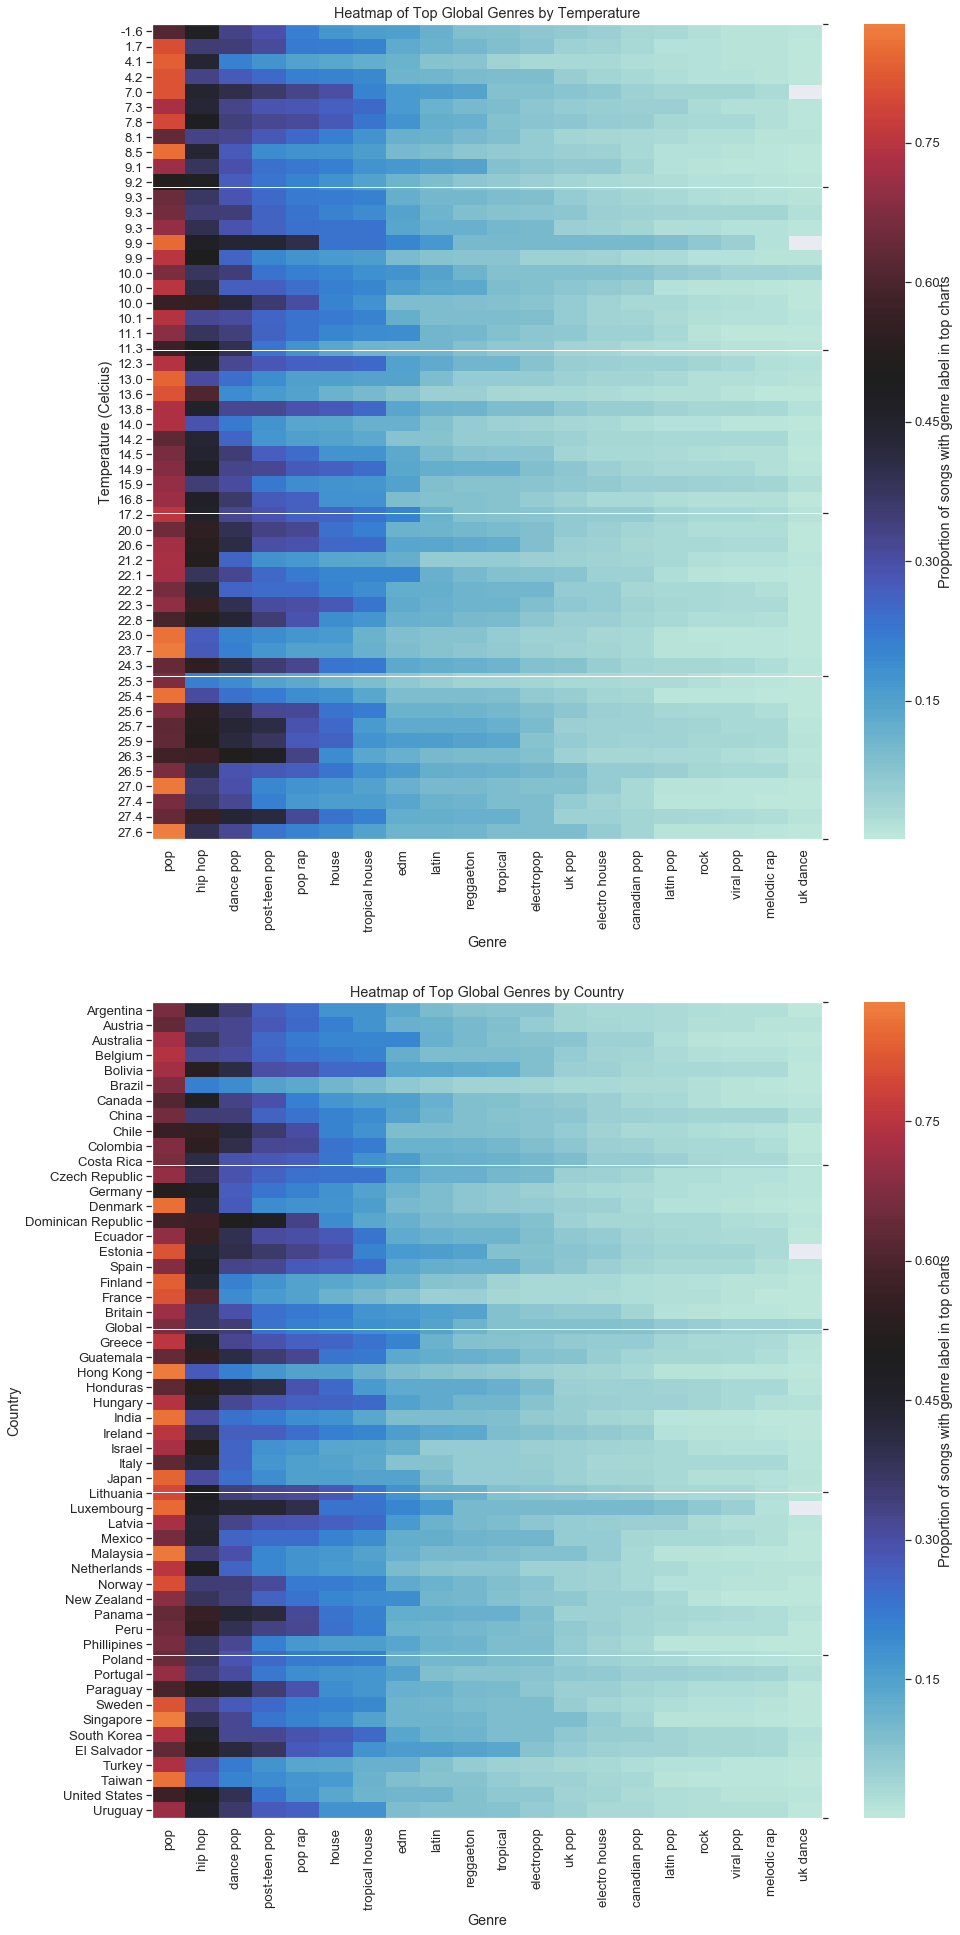

In [517]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
heatmapdfcty = pd.DataFrame.from_dict(hmdict, orient = 'index')
heatmapdfcty.columns = globalgenrenamescut
heatmapdfcty.sort_index(axis = 0)
heatmapdfcty.head()
heatmapdftemp = pd.DataFrame.from_dict(hmdict, orient = 'index')
heatmapdftemp.index = [round(value, 1) for value in tempdict.values()]
heatmapdftemp.columns = globalgenrenamescut
heatmapdftemp.drop(10)
heatmapdftemp.sort_index(axis = 0, inplace = True)
heatmapdftemp.head()
#graphing
sns.set(font_scale = 1.2)
fig, axs = plt.subplots(2, 1, figsize = (15, 33))
axs[0].set_title('Heatmap of Top Global Genres by Temperature')
axs[1].set_title('Heatmap of Top Global Genres by Country')
tempmap = sns.heatmap(heatmapdftemp, center = .5, ax = axs[0])
countrymap = sns.heatmap(heatmapdfcty, center = .5, ax = axs[1])
axs[0].set_ylabel('Temperature (Celcius)')
axs[1].set_ylabel('Country')
axs[0].set_xlabel('Genre')
axs[1].set_xlabel('Genre')
secaxy = axs[0].twinx()
secaxy.set_ylabel('\n\n\n\n\n\n\nProportion of songs with genre label in top charts')
secaxy.tick_params(labelright='off')
secaxy1 = axs[1].twinx()
secaxy1.set_ylabel('\n\n\n\n\n\n\nProportion of songs with genre label in top charts')
secaxy1.tick_params(labelright='off')

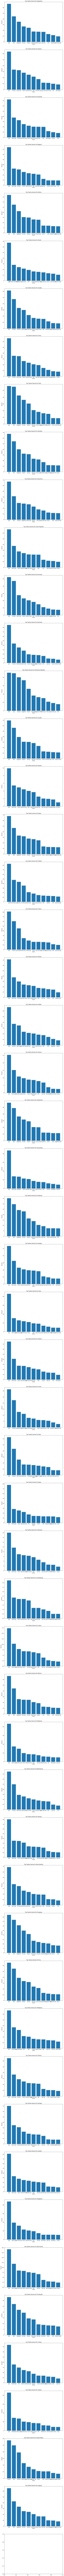

In [162]:
#graph top 10 for every country
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, axs = plt.subplots(len(countrylist), 1, figsize = [12, (10 * len(countrylist))])
graphcount = 0
for k, v in toptwelvedict.items():
    names = [rank[0] for rank in v]
    values = [rank[1] for rank in v]
    axs[graphcount].bar(names, values)
    axs[graphcount].set_ylabel('Percent')
    axs[graphcount].set_xlabel('Genre')
    axs[graphcount].set_title('Top Twelve Genres for %s' % k)
    graphcount += 1

In [222]:
#import tempdict from another file
tempdict = {'Argentina': 14.457124999999998, 'Austria': 8.055125, 'Australia': 22.142874999999997, 'Belgium': 10.060125, 'Bolivia': 20.640874999999998, 'Brazil': 25.348125, 'Canada': -1.6406666666666676, 'China': 9.295, 'Colombia': 25.579500000000003, 'Costa Rica': 26.457555555555555, 'Czech Republic': 9.281, 'Germany': 9.23525, 'Denmark': 8.516375, 'Dominican Republic': 26.290333333333333, 'Ecuador': 22.264125, 'Estonia': 6.961749999999999, 'Spain': 14.858875000000001, 'Finland': 4.064125, 'France': 13.584625, 'Britain': 9.10825, 'Greece': 17.1535, 'Guatemala': 24.291333333333334, 'Hong Kong': 23.690375000000003, 'Honduras': 25.732333333333333, 'Hungary': 12.3015, 'India': 25.413249999999998, 'Ireland': 9.97475, 'Israel': 21.222375, 'Italy': 14.165, 'Japan': 12.964749999999999, 'Lithuania': 7.803999999999999, 'Luxembourg': 9.90025, 'Latvia': 7.322375000000001, 'Mexico': 22.219222222222225, 'Malaysia': 26.9735, 'Netherlands': 9.8565, 'Norway': 1.7353750000000001, 'New Zealand': 11.0885, 'Paraguay': 22.817749999999997, 'Peru': 19.97625, 'Philippines': 27.416750000000004, 'Poland': 9.257875, 'Portugal': 15.88925, 'Sweden': 4.199750000000001, 'Singapore': 27.602874999999997, 'South Korea': 13.7605, 'El Salvador': 25.91077777777778, 'Turkey': 14.026625, 'Taiwan': 23.015, 'United States': 11.297111111111112, 'Uruguay': 16.754375}
#fix names in top 12 dict
#toptwelvedict['Philippines'] = toptwelvedict.pop('Phillipines') fixed but removed bc key is right now
print(genrecountdict.keys())
print(tempdict.keys())
#create tempgenredict
genrepercentdictnoglobal = dict(genrepercentdict)
genrepercentdictnoglobal.pop('Global')
tempgenredict = dict(zip(tempdict.values(), genrepercentdictnoglobal.values()))
print(tempgenredict)



dict_keys(['ar', 'at', 'au', 'be', 'bo', 'br', 'ca', 'ch', 'cl', 'co', 'cr', 'cz', 'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi', 'fr', 'gb', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'is', 'it', 'jp', 'lt', 'lu', 'lv', 'mx', 'my', 'nl', 'no', 'nz', 'pa', 'pe', 'ph', 'pl', 'pt', 'py', 'se', 'sg', 'sk', 'sv', 'tr', 'tw', 'us', 'uy'])
dict_keys(['Argentina', 'Austria', 'Australia', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Czech Republic', 'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Estonia', 'Spain', 'Finland', 'France', 'Britain', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Latvia', 'Mexico', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Sweden', 'Singapore', 'South Korea', 'El Salvador', 'Turkey', 'Taiwan', 'United States', 'Uruguay'])
{14.457124999999998: [('pop', 66.417), ('latin', 44.5),

In [250]:
globalgenres = genrepercentdict['Global']
globalgenrescut = globalgenres[0:51] #get genres to be in heatmap
print(globalgenrescut)
#we have our genrelist to make for each country
#make sure tuples are right for each country
topgenres = [item[0] for item in globalgenrescut]
genrepercentdictformap = dict() #copy
#iterate through percdnt dict, each genre, check if in top genres and delete if not
for key, value in genrepercentdict.items():
    countrygenres = [item[0] for item in value]
    countrypercents = [item[1] for item in value]
    for genre, genre2 in zip(topgenres, countrygenres):
        if genre in countrygenres:
            genrepercentdictformap[genre] = 
    for value2 in value:
        if value2[0] not in topgenres:
            value.remove(value2)
for genre in topgenres:
    for key, value in genrepercentdictformap.items():
        countrygenres = [item[0] for item in value]
        if genre not in countrygenres:
            value.append((genre, 0))
print(len(topgenres))
print(len(genrepercentdictformap['France']))
print(len(genrepercentdict['France']))

[('pop', 25.25), ('dance pop', 15.167), ('post-teen pop', 10.833), ('hip hop', 9.75), ('house', 8.833), ('tropical house', 8.5), ('edm', 7.833), ('pop rap', 6.833), ('electropop', 3.75), ('electro house', 2.667), ('uk pop', 2.583), ('canadian pop', 2.5), ('rock', 2.167), ('uk dance', 2.0), ('viral pop', 1.917), ('big room', 1.583), ('latin', 1.333), ('progressive house', 1.25), ('modern rock', 1.25), ('urban contemporary', 1.167), ('melodic rap', 1.083), ('pop rock', 1.083), ('latin pop', 1.083), ('canadian contemporary r&b', 1.0), ('indie poptimism', 1.0), ('tropical', 0.917), ('west coast rap', 0.917), ('toronto rap', 0.833), ('pop edm', 0.833), ('dirty south rap', 0.75), ('uk funky', 0.667), ('indietronica', 0.667), ('puerto rican pop', 0.583), ('dfw rap', 0.583), ('talent show', 0.5), ('aussietronica', 0.417), ('neo mellow', 0.417), ('complextro', 0.417), ('german techno', 0.417), ('social media pop', 0.417), ('art pop', 0.417), ('philly rap', 0.417), ('indie pop', 0.417), ('reggae

In [218]:
#create 3-d dataset with temp, genre, proportion
for key, value in tempgenredict.items():
    value = dict(value)
    tempgenredict[key] = value
print(tempgenredict)
templist = []
genrelist = []
proportionlist = []
for key, value in tempgenredict.items():
    songcount = np.sum(value.values())
    for key2, value2 in value.items():
        templist.append(key)
        genrelist.append(key2)
        proportionlist.append(value2 / songcount)



{14.457124999999998: {'colombian pop': 78, 'dance pop': 211, 'latin': 534, 'latin pop': 207, 'pop': 797, 'mexican pop': 51, 'puerto rican pop': 72, 'boy band': 23, 'reggaeton': 421, 'tropical': 295, 'hip hop': 322, 'cumbia pop': 216, 'reggaeton flow': 112, 'champeta': 23, 'vallenato': 14, 'trap latino': 139, 'electro latino': 20, 'pop reggaeton': 25, 'dancehall': 7, 'soca': 7, 'edm': 89, 'electronic trap': 6, 'pop rap': 48, 'house': 94, 'post-teen pop': 114, 'tropical house': 88, 'uk dance': 24, 'uk funky': 8, 'argentine telepop': 25, 'pop argentino': 24, 'cubaton': 16, 'canadian pop': 33, 'toronto rap': 4, 'electro house': 35, 'progressive house': 22, 'moombahton': 9, 'canadian contemporary r&b': 11, 'perreo': 32, 'pop rock': 15, 'rock': 161, 'cumbia': 3, 'rock en espanol': 108, 'big room': 16, 'cumbia paraguaya': 6, 'latin arena pop': 24, 'panamanian pop': 5, 'barbadian pop': 2, 'r&b': 2, 'urban contemporary': 15, 'electropop': 27, 'cumbia villera': 61, 'viral pop': 22, 'aussietronic

TypeError: unsupported operand type(s) for /: 'int' and 'dict_values'

In [212]:
#generate heatmap with popularity of genres globally and 'temperature' of top genres
topgenres = genrecountdict['global']
#we want to cut this down to relevant genres for this heatmap, let's filter out those w/ less than 5 counts on global chart
#topgenresfiltered = dict()
#for key, value in dict(topgenres).items():
    #if value >= 5:
        #topgenresfiltered[key] = value
#print(topgenresfiltered)
#print(len(topgenresfiltered))
#topgenrenames = list(topgenresfiltered.keys())
#topgenresdf = pd.Series(topgenresfiltered)
sns.heatmap(tempgenredict)

KeyError: 'global'

In [219]:
print(templist)

[14.457124999999998]


In [116]:
percentdf = pd.DataFrame(genrepercentdict)

ValueError: arrays must all be same length

In [65]:
print(len(datedf[datedf['Region'] == 'ec']))
print(len(datedf[datedf['Region'] == 'us']))

1200
1200


In [26]:
fulldf
fulldf.to_csv('Spotify_Data.csv')

In [ ]:
regionlist = list(np.unique(fulldf['Region']))
print(regionlist)

['ar', 'at', 'au', 'be', 'bo', 'br', 'ca', 'ch', 'cl', 'co', 'cr', 'cz', 'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi', 'fr', 'gb', 'global', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'is', 'it', 'jp', 'lt', 'lu', 'lv', 'mx', 'my', 'nl', 'no', 'nz', 'pa', 'pe', 'ph', 'pl', 'pt', 'py', 'se', 'sg', 'sk', 'sv', 'tr', 'tw', 'us', 'uy']


In [ ]:
import pandas as pd
import numpy as np
fulldf = pd.read_csv('Spotify_Data.csv')

In [ ]:
fulldf.head()

In [ ]:
genredfencoded = fulldf.iloc[:,9:]
genredfencoded.head()


In [ ]:
for (columnname, columnvalues) in fulldf[10:].iteritems():
    if sum(columnvalues) == 0:
        fulldf.drop(labels = columnname, axis = 1)
fulldf.head()

In [ ]:
from collections import Counter
uniquetracks = np.unique(datedf['URL'])
uniqueartists = []
artistlist = []
genrelist = list()
namelist = list()
fullgenrelist = list()
artistdict = dict()

url = 'https://open.spotify.com/track/15E2P2ToSLNnZvcOEQra6a?si=JWElgL2NS4KuOIMWjXmD2g'

track = sp.track(url)
album = track['artists'][0]['external_urls']['spotify']# get album link
print(track['name'])
genres = sp.artist(album)['genres']
print(genres)

trackcount = 0

for j in tqdm(list(range(100))):
    for track in uniquetracks:
        if trackcount % 4000 == 0:
            if SCOPE == 'user-follow-read':
                SCOPE = 'user-library-read'
            if SCOPE == 'user-library-read':
                SCOPE = 'user-follow-read'
        if trackcount % 400 == 0:
            token = oauth2.SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
            cache_token = token.get_access_token()
            sp = spotipy.Spotify(cache_token)
        trackcount += 1
        song = sp.track(track)
        name = song['name'] #get song name
        namelist.append(name)
        artist = song['artists'][0]['external_urls']['spotify'] # get artist link
        if artist in artistdict.keys():
            genrelist.append(artistdict.get(artist)) #makes process shorter
        else:
            genres = sp.artist(artist)['genres']
            genrelist.append(genres)
            artistdict[artist] = genres
        for genre in genres:
            if genre not in fullgenrelist:
                fullgenrelist.append(genre)
    